In [1]:
import pandas as pd
import os

# Define the file path
file_path = r"D:\Market Projects\options_data_analyzer\Aug '25\Aug 07 Exp\07 Aug\BEL_EQ.csv"

# Load CSV with pandas
# Using default encoding (utf-8) and comma delimiter
# The file appears to have standard CSV format
df = pd.read_csv(file_path)

# Display basic information about the loaded data
print("Data loaded successfully!")
print(f"File path: {file_path}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Data loaded successfully!
File path: D:\Market Projects\options_data_analyzer\Aug '25\Aug 07 Exp\07 Aug\BEL_EQ.csv
Shape: (18250, 5)
Columns: ['date', 'price', 'qty', 'trnvr', 'cum_trnvr']

First few rows:
                     date   price    qty        trnvr    cum_trnvr
0  2025-08-07 09:15:00 AM  386.85  65740  25431519.00  25431519.00
1  2025-08-07 09:15:01 AM  386.65      0         0.00  25431519.00
2  2025-08-07 09:15:01 AM  386.30      0         0.00  25431519.00
3  2025-08-07 09:15:01 AM  386.30    895    345738.50  25777257.50
4  2025-08-07 09:15:01 AM  386.75   1401    541836.75  26319094.25

Data types:
date          object
price        float64
qty            int64
trnvr        float64
cum_trnvr    float64
dtype: object

Basic statistics:
              price            qty         trnvr     cum_trnvr
count  18250.000000   18250.000000  1.825000e+04  1.825000e+04
mean     386.537181     630.694301  2.439435e+05  2.317732e+09
std        1.570300    2651.792039  1.026096e+06  1.

In [2]:
# Preview first and last 10 rows to check ordering
print("=== FIRST 10 ROWS ===")
print(df.head(10))
print("\n" + "="*50 + "\n")
print("=== LAST 10 ROWS ===")
print(df.tail(10))

# Check if data is in chronological order
print("\n" + "="*50 + "\n")
print("=== CHRONOLOGICAL ORDER CHECK ===")

# Convert date column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Check first and last timestamps
first_time = df['date'].iloc[0]
last_time = df['date'].iloc[-1]

print(f"First timestamp: {first_time}")
print(f"Last timestamp: {last_time}")

# Check if chronological (ascending) or reverse chronological (descending)
if first_time < last_time:
    print("✓ Data is in CHRONOLOGICAL order (ascending)")
    print("  - First row: Earliest time")
    print("  - Last row: Latest time")
else:
    print("✗ Data is in REVERSE CHRONOLOGICAL order (descending)")
    print("  - First row: Latest time")
    print("  - Last row: Earliest time")

# Show time range
time_range = last_time - first_time
print(f"\nTotal time range: {time_range}")

=== FIRST 10 ROWS ===
                     date   price    qty        trnvr    cum_trnvr
0  2025-08-07 09:15:00 AM  386.85  65740  25431519.00  25431519.00
1  2025-08-07 09:15:01 AM  386.65      0         0.00  25431519.00
2  2025-08-07 09:15:01 AM  386.30      0         0.00  25431519.00
3  2025-08-07 09:15:01 AM  386.30    895    345738.50  25777257.50
4  2025-08-07 09:15:01 AM  386.75   1401    541836.75  26319094.25
5  2025-08-07 09:15:02 AM  386.80   1795    694306.00  27013400.25
6  2025-08-07 09:15:02 AM  386.95    741    286729.95  27300130.20
7  2025-08-07 09:15:03 AM  386.85      0         0.00  27300130.20
8  2025-08-07 09:15:03 AM  386.50      0         0.00  27300130.20
9  2025-08-07 09:15:03 AM  386.90   2717   1051207.30  28351337.50


=== LAST 10 ROWS ===
                         date   price   qty       trnvr     cum_trnvr
18240  2025-08-07 03:29:31 PM  388.25   226    87744.50  4.446928e+09
18241  2025-08-07 03:29:31 PM  388.10     0        0.00  4.446928e+09
18242  2

In [3]:
# Convert date to datetime64[ns] and extract datetime features
print("=== DATETIME CONVERSION AND FEATURE EXTRACTION ===")

# Convert date column to datetime64[ns]
df['date'] = pd.to_datetime(df['date'])

# Extract additional datetime features
df['date_only'] = df['date'].dt.date
df['time'] = df['date'].dt.time
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second

# Display the new datetime features
print("New datetime features added:")
print(f"  - date_only: {df['date_only'].dtype}")
print(f"  - time: {df['time'].dtype}")
print(f"  - hour: {df['hour'].dtype}")
print(f"  - minute: {df['minute'].dtype}")
print(f"  - second: {df['second'].dtype}")

# Show sample of the enhanced dataframe
print("\n=== SAMPLE DATA WITH NEW FEATURES ===")
print(df[['date', 'date_only', 'time', 'hour', 'minute', 'second', 'price', 'qty']].head(10))

# Verify datetime conversion
print(f"\n=== DATETIME VERIFICATION ===")
print(f"Original date column dtype: {df['date'].dtype}")
print(f"First timestamp: {df['date'].iloc[0]}")
print(f"Last timestamp: {df['date'].iloc[-1]}")
print(f"Total unique dates: {df['date_only'].nunique()}")
print(f"Date range: {df['date_only'].min()} to {df['date_only'].max()}")

=== DATETIME CONVERSION AND FEATURE EXTRACTION ===
New datetime features added:
  - date_only: object
  - time: object
  - hour: int32
  - minute: int32
  - second: int32

=== SAMPLE DATA WITH NEW FEATURES ===
                 date   date_only      time  hour  minute  second   price  \
0 2025-08-07 09:15:00  2025-08-07  09:15:00     9      15       0  386.85   
1 2025-08-07 09:15:01  2025-08-07  09:15:01     9      15       1  386.65   
2 2025-08-07 09:15:01  2025-08-07  09:15:01     9      15       1  386.30   
3 2025-08-07 09:15:01  2025-08-07  09:15:01     9      15       1  386.30   
4 2025-08-07 09:15:01  2025-08-07  09:15:01     9      15       1  386.75   
5 2025-08-07 09:15:02  2025-08-07  09:15:02     9      15       2  386.80   
6 2025-08-07 09:15:02  2025-08-07  09:15:02     9      15       2  386.95   
7 2025-08-07 09:15:03  2025-08-07  09:15:03     9      15       3  386.85   
8 2025-08-07 09:15:03  2025-08-07  09:15:03     9      15       3  386.50   
9 2025-08-07 09:15:0

In [4]:
# Handle zero-quantity trades - remove rows with 0 qty
print("=== HANDLING ZERO-QUANTITY TRADES ===")

# Check current data shape and zero qty count
print(f"Original data shape: {df.shape}")
zero_qty_count = (df['qty'] == 0).sum()
print(f"Rows with zero quantity: {zero_qty_count}")
print(f"Percentage of zero qty rows: {(zero_qty_count/len(df)*100):.2f}%")

# Show sample of zero qty rows before removal
print("\n=== SAMPLE OF ZERO QTY ROWS (BEFORE REMOVAL) ===")
zero_qty_sample = df[df['qty'] == 0][['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].head(5)
print(zero_qty_sample)

# Remove rows with zero quantity
df_clean = df[df['qty'] > 0].copy()

# Reset index after filtering
df_clean = df_clean.reset_index(drop=True)

# Display results after cleaning
print(f"\n=== AFTER CLEANING ===")
print(f"Cleaned data shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Remaining rows: {len(df_clean)}")

# Show sample of cleaned data
print("\n=== SAMPLE OF CLEANED DATA ===")
print(df_clean[['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].head(10))

# Verify no zero qty rows remain
remaining_zero_qty = (df_clean['qty'] == 0).sum()
print(f"\nZero qty rows remaining: {remaining_zero_qty}")

# Update the main dataframe reference
df = df_clean
print(f"\n✓ Main dataframe 'df' now contains {len(df)} rows with non-zero quantities")

=== HANDLING ZERO-QUANTITY TRADES ===
Original data shape: (18250, 10)
Rows with zero quantity: 7294
Percentage of zero qty rows: 39.97%

=== SAMPLE OF ZERO QTY ROWS (BEFORE REMOVAL) ===
                  date   price  qty  trnvr    cum_trnvr
1  2025-08-07 09:15:01  386.65    0    0.0  25431519.00
2  2025-08-07 09:15:01  386.30    0    0.0  25431519.00
7  2025-08-07 09:15:03  386.85    0    0.0  27300130.20
8  2025-08-07 09:15:03  386.50    0    0.0  27300130.20
13 2025-08-07 09:15:05  386.45    0    0.0  32995767.85

=== AFTER CLEANING ===
Cleaned data shape: (10956, 10)
Rows removed: 7294
Remaining rows: 10956

=== SAMPLE OF CLEANED DATA ===
                 date   price    qty        trnvr    cum_trnvr
0 2025-08-07 09:15:00  386.85  65740  25431519.00  25431519.00
1 2025-08-07 09:15:01  386.30    895    345738.50  25777257.50
2 2025-08-07 09:15:01  386.75   1401    541836.75  26319094.25
3 2025-08-07 09:15:02  386.80   1795    694306.00  27013400.25
4 2025-08-07 09:15:02  386.95    

In [5]:
# Validate numeric columns for negatives or outliers
print("=== NUMERIC COLUMN VALIDATION ===")

# List of numeric columns to validate
numeric_cols = ['price', 'qty', 'trnvr', 'cum_trnvr']

# Check for negative values
print("=== NEGATIVE VALUE CHECK ===")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {negative_count} negative values")

# Check for zero values (after qty cleaning)
print("\n=== ZERO VALUE CHECK ===")
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zero values")

# Statistical summary for outlier detection
print("\n=== STATISTICAL SUMMARY ===")
print(df[numeric_cols].describe())

# Outlier detection using IQR method
print("\n=== OUTLIER DETECTION (IQR METHOD) ===")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_lower = (df[col] < lower_bound).sum()
    outliers_upper = (df[col] > upper_bound).sum()
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Outliers below lower bound: {outliers_lower}")
    print(f"  Outliers above upper bound: {outliers_upper}")

# Check for extreme values (beyond 3 standard deviations)
print("\n=== EXTREME VALUE CHECK (3 STD DEV) ===")
for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    
    lower_3std = mean_val - 3 * std_val
    upper_3std = mean_val + 3 * std_val
    
    extreme_lower = (df[col] < lower_3std).sum()
    extreme_upper = (df[col] > upper_3std).sum()
    
    print(f"\n{col}:")
    print(f"  Mean: {mean_val:.2f}, Std: {std_val:.2f}")
    print(f"  Lower 3σ: {lower_3std:.2f}, Upper 3σ: {upper_3std:.2f}")
    print(f"  Extreme values below: {extreme_lower}")
    print(f"  Extreme values above: {extreme_upper}")

# Show sample of potential outliers
print("\n=== SAMPLE OF POTENTIAL OUTLIERS ===")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[df[col] > upper_bound]
    if len(outliers) > 0:
        print(f"\n{col} outliers (top 5):")
        print(outliers[['date', col, 'qty', 'trnvr']].head())

# Data quality summary
print("\n=== DATA QUALITY SUMMARY ===")
print(f"Total rows: {len(df)}")
print(f"Columns with potential issues:")
for col in numeric_cols:
    issues = []
    if (df[col] < 0).any():
        issues.append("negative values")
    if (df[col] == 0).any() and col != 'qty':  # qty can legitimately be 0
        issues.append("zero values")
    
    if issues:
        print(f"  {col}: {', '.join(issues)}")
    else:
        print(f"  {col}: ✓ clean")

=== NUMERIC COLUMN VALIDATION ===
=== NEGATIVE VALUE CHECK ===
price: 0 negative values
qty: 0 negative values
trnvr: 0 negative values
cum_trnvr: 0 negative values

=== ZERO VALUE CHECK ===
price: 0 zero values
qty: 0 zero values
trnvr: 0 zero values
cum_trnvr: 0 zero values

=== STATISTICAL SUMMARY ===
              price            qty         trnvr     cum_trnvr
count  10956.000000   10956.000000  1.095600e+04  1.095600e+04
mean     386.561094    1050.581508  4.063499e+05  2.377823e+09
std        1.574324    3357.505716  1.299189e+06  1.165181e+09
min      383.500000       1.000000  3.836000e+02  2.543152e+07
25%      385.150000      26.000000  1.003177e+04  1.490814e+09
50%      386.450000     200.000000  7.732500e+04  2.355502e+09
75%      387.950000     799.000000  3.085895e+05  3.321858e+09
max      390.200000  153858.000000  5.955074e+07  4.451969e+09

=== OUTLIER DETECTION (IQR METHOD) ===

price:
  Q1: 385.15, Q3: 387.95, IQR: 2.80
  Lower bound: 380.95, Upper bound: 392.15


In [6]:
# Ensure sorting by datetime for time-series integrity
print("=== TIME-SERIES INTEGRITY CHECK AND SORTING ===")

# Check current sorting status
print("=== CURRENT SORTING STATUS ===")
print(f"First timestamp: {df['date'].iloc[0]}")
print(f"Last timestamp: {df['date'].iloc[-1]}")

# Check if data is already sorted
is_sorted = df['date'].is_monotonic_increasing
print(f"Data is already sorted chronologically: {is_sorted}")

# Check for any duplicate timestamps
duplicate_timestamps = df['date'].duplicated().sum()
print(f"Duplicate timestamps: {duplicate_timestamps}")

if duplicate_timestamps > 0:
    print("\n=== DUPLICATE TIMESTAMP ANALYSIS ===")
    duplicate_samples = df[df['date'].duplicated(keep=False)].sort_values('date')
    print("Sample duplicate timestamps:")
    print(duplicate_samples[['date', 'price', 'qty', 'trnvr']].head(10))

# Sort the dataframe by datetime
print("\n=== SORTING DATA BY DATETIME ===")
df_sorted = df.sort_values('date').reset_index(drop=True)

# Verify sorting
is_now_sorted = df_sorted['date'].is_monotonic_increasing
print(f"Data is now sorted chronologically: {is_now_sorted}")

# Display sorting verification
print(f"\n=== SORTING VERIFICATION ===")
print("First 5 rows after sorting:")
print(df_sorted[['date', 'price', 'qty', 'trnvr']].head())
print(f"\nLast 5 rows after sorting:")
print(df_sorted[['date', 'price', 'qty', 'trnvr']].tail())

# Check for any time gaps or irregularities
print(f"\n=== TIME SERIES CONTINUITY CHECK ===")
time_diffs = df_sorted['date'].diff().dropna()
print(f"Time differences between consecutive rows:")
print(f"  Min: {time_diffs.min()}")
print(f"  Max: {time_diffs.max()}")
print(f"  Mean: {time_diffs.mean()}")
print(f"  Most common: {time_diffs.mode().iloc[0] if len(time_diffs.mode()) > 0 else 'N/A'}")

# Check for any large time gaps
large_gaps = time_diffs[time_diffs > pd.Timedelta(minutes=5)]
if len(large_gaps) > 0:
    print(f"\n⚠️  Found {len(large_gaps)} time gaps larger than 5 minutes:")
    gap_indices = time_diffs[time_diffs > pd.Timedelta(minutes=5)].index
    for idx in gap_indices[:5]:  # Show first 5 gaps
        gap_start = df_sorted.loc[idx-1, 'date']
        gap_end = df_sorted.loc[idx, 'date']
        gap_duration = gap_end - gap_start
        print(f"  Gap: {gap_start} to {gap_end} (Duration: {gap_duration})")

# Update the main dataframe with sorted version
df = df_sorted
print(f"\n✓ Main dataframe 'df' is now properly sorted chronologically")
print(f"✓ Total rows: {len(df)}")
print(f"✓ Time range: {df['date'].min()} to {df['date'].max()}")

# Final verification
print(f"\n=== FINAL VERIFICATION ===")
print("✓ Data is sorted chronologically")
print("✓ Index is reset and sequential")
print("✓ Ready for time-series analysis")

=== TIME-SERIES INTEGRITY CHECK AND SORTING ===
=== CURRENT SORTING STATUS ===
First timestamp: 2025-08-07 09:15:00
Last timestamp: 2025-08-07 15:29:58
Data is already sorted chronologically: True
Duplicate timestamps: 1961

=== DUPLICATE TIMESTAMP ANALYSIS ===
Sample duplicate timestamps:
                  date   price   qty       trnvr
1  2025-08-07 09:15:01  386.30   895   345738.50
2  2025-08-07 09:15:01  386.75  1401   541836.75
3  2025-08-07 09:15:02  386.80  1795   694306.00
4  2025-08-07 09:15:02  386.95   741   286729.95
5  2025-08-07 09:15:03  386.90  2717  1051207.30
6  2025-08-07 09:15:03  386.80  9068  3507502.40
7  2025-08-07 09:15:04  386.75  1141   441281.75
8  2025-08-07 09:15:04  386.90  1798   695646.20
9  2025-08-07 09:15:05  386.65  2092   808871.80
10 2025-08-07 09:15:05  386.75  1679   649353.25

=== SORTING DATA BY DATETIME ===
Data is now sorted chronologically: True

=== SORTING VERIFICATION ===
First 5 rows after sorting:
                 date   price    qty 

In [7]:
# Get comprehensive descriptive statistics for numeric fields
print("=== COMPREHENSIVE DESCRIPTIVE STATISTICS ===")

# Get basic describe() for all numeric columns
print("=== BASIC DESCRIPTIVE STATISTICS ===")
print(df.describe())

# Get detailed statistics for each numeric column
print("\n" + "="*60)
print("=== DETAILED STATISTICS BY COLUMN ===")

numeric_cols = ['price', 'qty', 'trnvr', 'cum_trnvr']

for col in numeric_cols:
    print(f"\n--- {col.upper()} ---")
    col_stats = df[col].describe()
    
    print(f"Count: {col_stats['count']:,.0f}")
    print(f"Mean: {col_stats['mean']:,.2f}")
    print(f"Std: {col_stats['std']:,.2f}")
    print(f"Min: {col_stats['min']:,.2f}")
    print(f"25%: {col_stats['25%']:,.2f}")
    print(f"50% (Median): {col_stats['50%']:,.2f}")
    print(f"75%: {col_stats['75%']:,.2f}")
    print(f"Max: {col_stats['max']:,.2f}")
    
    # Additional useful statistics
    print(f"Range: {col_stats['max'] - col_stats['min']:,.2f}")
    print(f"IQR: {col_stats['75%'] - col_stats['25%']:,.2f}")
    print(f"Coefficient of Variation: {(col_stats['std']/col_stats['mean']*100):,.2f}%")

# Get statistics for datetime features
print("\n" + "="*60)
print("=== DATETIME FEATURE STATISTICS ===")

print("\n--- HOUR DISTRIBUTION ---")
hour_counts = df['hour'].value_counts().sort_index()
print(hour_counts)

print("\n--- MINUTE DISTRIBUTION (Sample) ---")
minute_counts = df['minute'].value_counts().sort_index().head(20)
print(minute_counts)

# Get statistics for specific time periods
print("\n" + "="*60)
print("=== TIME PERIOD ANALYSIS ===")

# Market hours analysis (assuming 9:15 AM to 3:30 PM)
market_hours = df[(df['hour'] >= 9) & (df['hour'] <= 15)]
print(f"Trades during market hours (9 AM - 3 PM): {len(market_hours):,}")
print(f"Trades outside market hours: {len(df) - len(market_hours):,}")

# Price range analysis
print(f"\n--- PRICE ANALYSIS ---")
print(f"Price range: ₹{df['price'].min():.2f} to ₹{df['price'].max():.2f}")
print(f"Price spread: ₹{df['price'].max() - df['price'].min():.2f}")

# Volume analysis
print(f"\n--- VOLUME ANALYSIS ---")
print(f"Total volume traded: {df['qty'].sum():,}")
print(f"Average trade size: {df['qty'].mean():.0f}")
print(f"Largest single trade: {df['qty'].max():,}")

# Turnover analysis
print(f"\n--- TURNOVER ANALYSIS ---")
print(f"Total turnover: ₹{df['trnvr'].sum():,.2f}")
print(f"Average trade value: ₹{df['trnvr'].mean():,.2f}")
print(f"Largest single trade value: ₹{df['trnvr'].max():,.2f}")

# Display summary table
print("\n" + "="*60)
print("=== SUMMARY TABLE ===")
summary_data = {
    'Metric': ['Total Rows', 'Price Range', 'Total Volume', 'Total Turnover', 'Time Range'],
    'Value': [
        f"{len(df):,}",
        f"₹{df['price'].min():.2f} - ₹{df['price'].max():.2f}",
        f"{df['qty'].sum():,}",
        f"₹{df['trnvr'].sum():,.2f}",
        f"{df['date'].min().strftime('%H:%M:%S')} to {df['date'].max().strftime('%H:%M:%S')}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

=== COMPREHENSIVE DESCRIPTIVE STATISTICS ===
=== BASIC DESCRIPTIVE STATISTICS ===
                                date         price            qty  \
count                          10956  10956.000000   10956.000000   
mean   2025-08-07 12:40:58.929810176    386.561094    1050.581508   
min              2025-08-07 09:15:00    383.500000       1.000000   
25%       2025-08-07 11:06:26.500000    385.150000      26.000000   
50%              2025-08-07 12:45:14    386.450000     200.000000   
75%    2025-08-07 14:26:31.249999872    387.950000     799.000000   
max              2025-08-07 15:29:58    390.200000  153858.000000   
std                              NaN      1.574324    3357.505716   

              trnvr     cum_trnvr          hour        minute        second  
count  1.095600e+04  1.095600e+04  10956.000000  10956.000000  10956.000000  
mean   4.063499e+05  2.377823e+09     12.209383     27.926798     29.543173  
min    3.836000e+02  2.543152e+07      9.000000      0.000000 

In [9]:
# Count total unique trading days
print("=== TRADING DAYS ANALYSIS ===")

# Extract unique dates from the datetime column
unique_dates = df['date_only'].unique()
total_trading_days = len(unique_dates)

print(f"Total unique trading days: {total_trading_days}")

# Display all unique trading dates
print(f"\n=== ALL TRADING DATES ===")
for i, date in enumerate(sorted(unique_dates), 1):
    print(f"{i:2d}. {date}")

# Get date range
date_range = f"{min(unique_dates)} to {max(unique_dates)}"
print(f"\nTrading date range: {date_range}")

# Check if all dates are from the same month/year
print(f"\n=== DATE ANALYSIS ===")
if total_trading_days == 1:
    print("Single trading day data")
    print(f"Date: {unique_dates[0]}")
    # Initialize these variables for single day to avoid errors
    months = {unique_dates[0].month}
    years = {unique_dates[0].year}
elif total_trading_days > 1:
    # Check month and year consistency
    months = set(date.month for date in unique_dates)
    years = set(date.year for date in unique_dates)
    
    print(f"Multiple trading days: {total_trading_days}")
    print(f"Months covered: {sorted(months)}")
    print(f"Years covered: {sorted(years)}")
    
    if len(months) == 1:
        month_name = pd.Timestamp(unique_dates[0]).strftime('%B')
        print(f"All dates are from: {month_name} {list(years)[0]}")
    
    if len(years) == 1:
        print(f"All dates are from year: {list(years)[0]}")

# Trading days by month (if multiple months)
if len(months) > 1:
    print(f"\n=== TRADING DAYS BY MONTH ===")
    monthly_counts = {}
    for date in unique_dates:
        month_key = f"{date.year}-{date.month:02d}"
        monthly_counts[month_key] = monthly_counts.get(month_key, 0) + 1
    
    for month_key in sorted(monthly_counts.keys()):
        year, month = month_key.split('-')
        month_name = pd.Timestamp(f"{year}-{month}-01").strftime('%B %Y')
        print(f"{month_name}: {monthly_counts[month_key]} trading days")

# Verify data consistency
print(f"\n=== DATA CONSISTENCY CHECK ===")
print(f"Total rows in dataset: {len(df):,}")
print(f"Average rows per trading day: {len(df)/total_trading_days:.1f}")

# Check for any missing dates in sequence (if multiple days)
if total_trading_days > 1:
    sorted_dates = sorted(unique_dates)
    date_diffs = []
    for i in range(1, len(sorted_dates)):
        diff = (sorted_dates[i] - sorted_dates[i-1]).days
        date_diffs.append(diff)
    
    if any(diff > 1 for diff in date_diffs):
        print(f"\n⚠️  Gaps detected in trading days:")
        for i, diff in enumerate(date_diffs):
            if diff > 1:
                gap_start = sorted_dates[i-1]
                gap_end = sorted_dates[i]
                print(f"  Gap: {gap_start} to {gap_end} ({diff-1} missing days)")
    else:
        print(f"\n✓ No gaps in trading days - consecutive trading days")

print(f"\n=== SUMMARY ===")
print(f"✓ Total unique trading days: {total_trading_days}")
print(f"✓ Date range: {date_range}")
print(f"✓ Ready for daily analysis and aggregation")

=== TRADING DAYS ANALYSIS ===
Total unique trading days: 1

=== ALL TRADING DATES ===
 1. 2025-08-07

Trading date range: 2025-08-07 to 2025-08-07

=== DATE ANALYSIS ===
Single trading day data
Date: 2025-08-07

=== DATA CONSISTENCY CHECK ===
Total rows in dataset: 10,956
Average rows per trading day: 10956.0

=== SUMMARY ===
✓ Total unique trading days: 1
✓ Date range: 2025-08-07 to 2025-08-07
✓ Ready for daily analysis and aggregation


In [10]:
# Identify earliest and latest timestamps
print("=== TIMESTAMP RANGE ANALYSIS ===")

# Get earliest and latest timestamps
earliest_timestamp = df['date'].min()
latest_timestamp = df['date'].max()

print(f"Earliest timestamp: {earliest_timestamp}")
print(f"Latest timestamp: {latest_timestamp}")

# Calculate total time duration
total_duration = latest_timestamp - earliest_timestamp
print(f"Total time duration: {total_duration}")

# Convert duration to more readable format
duration_hours = total_duration.total_seconds() / 3600
duration_minutes = total_duration.total_seconds() / 60

print(f"Duration in hours: {duration_hours:.2f} hours")
print(f"Duration in minutes: {duration_minutes:.0f} minutes")

# Display the actual rows with earliest and latest timestamps
print(f"\n=== EARLIEST TIMESTAMP ROW ===")
earliest_row = df[df['date'] == earliest_timestamp]
print(earliest_row[['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].to_string(index=False))

print(f"\n=== LATEST TIMESTAMP ROW ===")
latest_row = df[df['date'] == latest_timestamp]
print(latest_row[['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].to_string(index=False))

# Check if timestamps span across different time periods
print(f"\n=== TIME PERIOD ANALYSIS ===")
earliest_hour = earliest_timestamp.hour
earliest_minute = earliest_timestamp.minute
latest_hour = latest_timestamp.hour
latest_minute = latest_timestamp.minute

print(f"Earliest: {earliest_hour:02d}:{earliest_minute:02d}")
print(f"Latest: {latest_hour:02d}:{latest_minute:02d}")

# Market hours analysis (assuming 9:15 AM to 3:30 PM)
market_start = pd.Timestamp('2025-08-07 09:15:00')
market_end = pd.Timestamp('2025-08-07 15:30:00')

print(f"\nMarket hours: 09:15:00 to 15:30:00")
print(f"Data coverage:")

if earliest_timestamp < market_start:
    pre_market_duration = market_start - earliest_timestamp
    print(f"  Pre-market: {earliest_timestamp.strftime('%H:%M:%S')} to {market_start.strftime('%H:%M:%S')} ({pre_market_duration})")

if earliest_timestamp <= market_start and latest_timestamp >= market_end:
    market_duration = market_end - market_start
    print(f"  Market hours: {market_start.strftime('%H:%M:%S')} to {market_end.strftime('%H:%M:%S')} ({market_duration})")

if latest_timestamp > market_end:
    post_market_duration = latest_timestamp - market_end
    print(f"  Post-market: {market_end.strftime('%H:%M:%S')} to {latest_timestamp.strftime('%H:%M:%S')} ({post_market_duration})")

# Check for any gaps in the time series
print(f"\n=== TIME SERIES CONTINUITY ===")
time_diffs = df['date'].diff().dropna()
min_time_diff = time_diffs.min()
max_time_diff = time_diffs.max()

print(f"Minimum time difference between consecutive rows: {min_time_diff}")
print(f"Maximum time difference between consecutive rows: {max_time_diff}")

# Identify any unusually large time gaps
large_gaps = time_diffs[time_diffs > pd.Timedelta(minutes=1)]
if len(large_gaps) > 0:
    print(f"\n⚠️  Found {len(large_gaps)} time gaps larger than 1 minute:")
    gap_indices = large_gaps.index[:5]  # Show first 5 gaps
    for idx in gap_indices:
        gap_start = df.loc[idx-1, 'date']
        gap_end = df.loc[idx, 'date']
        gap_duration = gap_end - gap_start
        print(f"  Gap: {gap_start.strftime('%H:%M:%S')} to {gap_end.strftime('%H:%M:%S')} (Duration: {gap_duration})")

# Summary
print(f"\n=== SUMMARY ===")
print(f"✓ Data spans: {earliest_timestamp.strftime('%Y-%m-%d %H:%M:%S')} to {latest_timestamp.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"✓ Total duration: {duration_hours:.2f} hours ({duration_minutes:.0f} minutes)")
print(f"✓ Total rows: {len(df):,}")
print(f"✓ Average frequency: {len(df)/duration_hours:.1f} ticks per hour")

=== TIMESTAMP RANGE ANALYSIS ===
Earliest timestamp: 2025-08-07 09:15:00
Latest timestamp: 2025-08-07 15:29:58
Total time duration: 0 days 06:14:58
Duration in hours: 6.25 hours
Duration in minutes: 375 minutes

=== EARLIEST TIMESTAMP ROW ===
               date  price   qty      trnvr  cum_trnvr
2025-08-07 09:15:00 386.85 65740 25431519.0 25431519.0

=== LATEST TIMESTAMP ROW ===
               date  price  qty    trnvr    cum_trnvr
2025-08-07 15:29:58 388.25 1740 675555.0 4.451969e+09

=== TIME PERIOD ANALYSIS ===
Earliest: 09:15
Latest: 15:29

Market hours: 09:15:00 to 15:30:00
Data coverage:

=== TIME SERIES CONTINUITY ===
Minimum time difference between consecutive rows: 0 days 00:00:00
Maximum time difference between consecutive rows: 0 days 00:00:12

=== SUMMARY ===
✓ Data spans: 2025-08-07 09:15:00 to 2025-08-07 15:29:58
✓ Total duration: 6.25 hours (375 minutes)
✓ Total rows: 10,956
✓ Average frequency: 1753.1 ticks per hour


In [11]:
# Calculate total traded volume and total turnover
print("=== VOLUME AND TURNOVER ANALYSIS ===")

# Calculate totals
total_volume = df['qty'].sum()
total_turnover = df['trnvr'].sum()

print(f"Total traded volume: {total_volume:,}")
print(f"Total turnover: ₹{total_turnover:,.2f}")

# Additional volume and turnover metrics
print(f"\n=== DETAILED METRICS ===")

# Volume analysis
print("--- VOLUME ANALYSIS ---")
avg_trade_size = df['qty'].mean()
median_trade_size = df['qty'].median()
max_trade_size = df['qty'].max()
min_trade_size = df['qty'].min()

print(f"Average trade size: {avg_trade_size:,.0f}")
print(f"Median trade size: {median_trade_size:,.0f}")
print(f"Largest single trade: {max_trade_size:,}")
print(f"Smallest single trade: {min_trade_size:,}")

# Turnover analysis
print(f"\n--- TURNOVER ANALYSIS ---")
avg_trade_value = df['trnvr'].mean()
median_trade_value = df['trnvr'].median()
max_trade_value = df['trnvr'].max()
min_trade_value = df['trnvr'].min()

print(f"Average trade value: ₹{avg_trade_value:,.2f}")
print(f"Median trade value: ₹{median_trade_value:,.2f}")
print(f"Largest single trade value: ₹{max_trade_value:,.2f}")
print(f"Smallest single trade value: ₹{min_trade_value:,.2f}")

# Price analysis
print(f"\n--- PRICE ANALYSIS ---")
avg_price = df['price'].mean()
weighted_avg_price = (df['price'] * df['qty']).sum() / df['qty'].sum()
price_range = df['price'].max() - df['price'].min()

print(f"Simple average price: ₹{avg_price:.2f}")
print(f"Weighted average price (by volume): ₹{weighted_avg_price:.2f}")
print(f"Price range: ₹{price_range:.2f}")

# Volume-weighted metrics
print(f"\n--- VOLUME-WEIGHTED METRICS ---")
vwap = (df['price'] * df['qty']).sum() / df['qty'].sum()
print(f"Volume Weighted Average Price (VWAP): ₹{vwap:.2f}")

# Efficiency metrics
print(f"\n--- EFFICIENCY METRICS ---")
trades_count = len(df)
print(f"Total number of trades: {trades_count:,}")
print(f"Average volume per trade: {total_volume/trades_count:,.0f}")
print(f"Average turnover per trade: ₹{total_turnover/trades_count:,.2f}")

# Time-based analysis
print(f"\n=== TIME-BASED ANALYSIS ===")
earliest_time = df['date'].min()
latest_time = df['date'].max()
duration_hours = (latest_time - earliest_time).total_seconds() / 3600

print(f"Trading duration: {duration_hours:.2f} hours")
print(f"Volume per hour: {total_volume/duration_hours:,.0f}")
print(f"Turnover per hour: ₹{total_turnover/duration_hours:,.2f}")

# Market activity intensity
print(f"\n--- MARKET ACTIVITY INTENSITY ---")
print(f"Trades per hour: {trades_count/duration_hours:.1f}")
print(f"Volume per trade: {total_volume/trades_count:,.0f}")
print(f"Turnover per trade: ₹{total_turnover/trades_count:,.2f}")

# Summary table
print(f"\n" + "="*60)
print("=== SUMMARY TABLE ===")
summary_data = {
    'Metric': ['Total Volume', 'Total Turnover', 'Total Trades', 'Avg Trade Size', 'Avg Trade Value', 'VWAP'],
    'Value': [
        f"{total_volume:,}",
        f"₹{total_turnover:,.2f}",
        f"{trades_count:,}",
        f"{avg_trade_size:,.0f}",
        f"₹{avg_trade_value:,.2f}",
        f"₹{vwap:.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n=== KEY INSIGHTS ===")
print(f"✓ Total volume traded: {total_volume:,} shares")
print(f"✓ Total market value: ₹{total_turnover:,.2f}")
print(f"✓ Market activity: {trades_count:,} individual trades")
print(f"✓ Trading efficiency: ₹{total_turnover/total_volume:.2f} per share")

=== VOLUME AND TURNOVER ANALYSIS ===
Total traded volume: 11,510,171
Total turnover: ₹4,451,969,111.70

=== DETAILED METRICS ===
--- VOLUME ANALYSIS ---
Average trade size: 1,051
Median trade size: 200
Largest single trade: 153,858
Smallest single trade: 1

--- TURNOVER ANALYSIS ---
Average trade value: ₹406,349.86
Median trade value: ₹77,325.00
Largest single trade value: ₹59,550,738.90
Smallest single trade value: ₹383.60

--- PRICE ANALYSIS ---
Simple average price: ₹386.56
Weighted average price (by volume): ₹386.79
Price range: ₹6.70

--- VOLUME-WEIGHTED METRICS ---
Volume Weighted Average Price (VWAP): ₹386.79

--- EFFICIENCY METRICS ---
Total number of trades: 10,956
Average volume per trade: 1,051
Average turnover per trade: ₹406,349.86

=== TIME-BASED ANALYSIS ===
Trading duration: 6.25 hours
Volume per hour: 1,841,791
Turnover per hour: ₹712,378,380.39

--- MARKET ACTIVITY INTENSITY ---
Trades per hour: 1753.1
Volume per trade: 1,051
Turnover per trade: ₹406,349.86

=== SUMMA

In [12]:
# Check number of trades with qty > 0 (actual trades vs. zero-qty updates)
print("=== TRADE TYPE ANALYSIS ===")

# Count different types of records
total_records = len(df)
actual_trades = (df['qty'] > 0).sum()
zero_qty_updates = (df['qty'] == 0).sum()

print(f"Total records in dataset: {total_records:,}")
print(f"Actual trades (qty > 0): {actual_trades:,}")
print(f"Zero-quantity updates (qty = 0): {zero_qty_updates:,}")

# Calculate percentages
actual_trades_pct = (actual_trades / total_records) * 100
zero_qty_pct = (zero_qty_updates / total_records) * 100

print(f"\n=== PERCENTAGE BREAKDOWN ===")
print(f"Actual trades: {actual_trades_pct:.2f}%")
print(f"Zero-quantity updates: {zero_qty_pct:.2f}%")

# Analyze the data composition
print(f"\n=== DATA COMPOSITION ANALYSIS ===")
if zero_qty_updates > 0:
    print("⚠️  Dataset contains both actual trades and zero-quantity updates")
    print("   This suggests the data includes bid-ask spread updates")
else:
    print("✓ Dataset contains only actual trades (all qty > 0)")

# Show sample of actual trades
print(f"\n=== SAMPLE OF ACTUAL TRADES (qty > 0) ===")
actual_trades_df = df[df['qty'] > 0]
print(actual_trades_df[['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].head(10))

# Show sample of zero-quantity updates (if any exist)
if zero_qty_updates > 0:
    print(f"\n=== SAMPLE OF ZERO-QUANTITY UPDATES (qty = 0) ===")
    zero_qty_df = df[df['qty'] == 0]
    print(zero_qty_df[['date', 'price', 'qty', 'trnvr', 'cum_trnvr']].head(10))

# Analyze characteristics of each type
print(f"\n=== CHARACTERISTICS ANALYSIS ===")

# Actual trades characteristics
if actual_trades > 0:
    print("--- ACTUAL TRADES (qty > 0) ---")
    actual_trades_data = df[df['qty'] > 0]
    print(f"  Total volume: {actual_trades_data['qty'].sum():,}")
    print(f"  Total turnover: ₹{actual_trades_data['trnvr'].sum():,.2f}")
    print(f"  Average trade size: {actual_trades_data['qty'].mean():,.0f}")
    print(f"  Average trade value: ₹{actual_trades_data['trnvr'].mean():,.2f}")
    print(f"  Price range: ₹{actual_trades_data['price'].min():.2f} - ₹{actual_trades_data['price'].max():.2f}")

# Zero-quantity updates characteristics (if any exist)
if zero_qty_updates > 0:
    print(f"\n--- ZERO-QUANTITY UPDATES (qty = 0) ---")
    zero_qty_data = df[df['qty'] == 0]
    print(f"  Total records: {len(zero_qty_data):,}")
    print(f"  Price range: ₹{zero_qty_data['price'].min():.2f} - ₹{zero_qty_data['price'].max():.2f}")
    print(f"  Average price: ₹{zero_qty_data['price'].mean():.2f}")
    
    # Check if these are bid-ask spread updates
    if zero_qty_data['trnvr'].sum() == 0:
        print(f"  All have zero turnover (typical bid-ask updates)")
    else:
        print(f"  Some have non-zero turnover (data quality issue)")

# Data quality implications
print(f"\n=== DATA QUALITY IMPLICATIONS ===")
if zero_qty_updates > 0:
    print("⚠️  Mixed data types detected:")
    print("   - Actual trades: Use for volume, turnover, and price analysis")
    print("   - Zero-qty updates: Use for bid-ask spread analysis only")
    print("   - Consider filtering by qty > 0 for trade-based analysis")
else:
    print("✓ Clean dataset with only actual trades")

# Recommendations
print(f"\n=== RECOMMENDATIONS ===")
if zero_qty_updates > 0:
    print("For different types of analysis:")
    print("  📊 Volume/Turnover analysis: Use df[df['qty'] > 0]")
    print("  📈 Price movement analysis: Use df[df['qty'] > 0]")
    print("  🔍 Bid-ask spread analysis: Use df[df['qty'] == 0]")
    print("  📋 Complete market picture: Use full dataset")
else:
    print("  ✓ Dataset is ready for all types of analysis")

# Summary
print(f"\n=== SUMMARY ===")
print(f"✓ Total records: {total_records:,}")
print(f"✓ Actual trades: {actual_trades:,} ({actual_trades_pct:.1f}%)")
print(f"✓ Zero-qty updates: {zero_qty_updates:,} ({zero_qty_pct:.1f}%)")
print(f"✓ Data type: {'Mixed (trades + updates)' if zero_qty_updates > 0 else 'Pure trades only'}")

=== TRADE TYPE ANALYSIS ===
Total records in dataset: 10,956
Actual trades (qty > 0): 10,956
Zero-quantity updates (qty = 0): 0

=== PERCENTAGE BREAKDOWN ===
Actual trades: 100.00%
Zero-quantity updates: 0.00%

=== DATA COMPOSITION ANALYSIS ===
✓ Dataset contains only actual trades (all qty > 0)

=== SAMPLE OF ACTUAL TRADES (qty > 0) ===
                 date   price    qty        trnvr    cum_trnvr
0 2025-08-07 09:15:00  386.85  65740  25431519.00  25431519.00
1 2025-08-07 09:15:01  386.30    895    345738.50  25777257.50
2 2025-08-07 09:15:01  386.75   1401    541836.75  26319094.25
3 2025-08-07 09:15:02  386.80   1795    694306.00  27013400.25
4 2025-08-07 09:15:02  386.95    741    286729.95  27300130.20
5 2025-08-07 09:15:03  386.90   2717   1051207.30  28351337.50
6 2025-08-07 09:15:03  386.80   9068   3507502.40  31858839.90
7 2025-08-07 09:15:04  386.75   1141    441281.75  32300121.65
8 2025-08-07 09:15:04  386.90   1798    695646.20  32995767.85
9 2025-08-07 09:15:05  386.75 

In [13]:
# Create price_change = current price - previous price
print("=== PRICE CHANGE CALCULATION ===")

# Calculate price change (current price - previous price)
df['price_change'] = df['price'].diff()

# Display the first few rows to verify the calculation
print("=== SAMPLE DATA WITH PRICE CHANGE ===")
print(df[['date', 'price', 'price_change', 'qty', 'trnvr']].head(10))

# Basic statistics of price changes
print(f"\n=== PRICE CHANGE STATISTICS ===")
print(f"Total price changes calculated: {len(df['price_change'].dropna())}")
print(f"First price change: {df['price_change'].iloc[1]:.2f}")  # First change is at index 1
print(f"Last price change: {df['price_change'].iloc[-1]:.2f}")

# Statistical summary of price changes
print(f"\n=== PRICE CHANGE DESCRIPTIVE STATISTICS ===")
price_change_stats = df['price_change'].describe()
print(price_change_stats)

# Analyze price change distribution
print(f"\n=== PRICE CHANGE DISTRIBUTION ANALYSIS ===")
positive_changes = (df['price_change'] > 0).sum()
negative_changes = (df['price_change'] < 0).sum()
zero_changes = (df['price_change'] == 0).sum()
total_changes = len(df['price_change'].dropna())

print(f"Positive price changes: {positive_changes:,} ({(positive_changes/total_changes*100):.2f}%)")
print(f"Negative price changes: {negative_changes:,} ({(negative_changes/total_changes*100):.2f}%)")
print(f"No price changes: {zero_changes:,} ({(zero_changes/total_changes*100):.2f}%)")

# Price change magnitude analysis
print(f"\n=== PRICE CHANGE MAGNITUDE ANALYSIS ===")
abs_price_changes = df['price_change'].abs()
print(f"Average absolute price change: ₹{abs_price_changes.mean():.2f}")
print(f"Median absolute price change: ₹{abs_price_changes.median():.2f}")
print(f"Largest price increase: ₹{df['price_change'].max():.2f}")
print(f"Largest price decrease: ₹{df['price_change'].min():.2f}")

# Show examples of different types of price changes
print(f"\n=== EXAMPLES OF PRICE CHANGES ===")

# Largest price increases
print("Top 5 largest price increases:")
largest_increases = df.nlargest(5, 'price_change')[['date', 'price', 'price_change', 'qty']]
print(largest_increases.to_string(index=False))

# Largest price decreases
print(f"\nTop 5 largest price decreases:")
largest_decreases = df.nsmallest(5, 'price_change')[['date', 'price', 'price_change', 'qty']]
print(largest_decreases.to_string(index=False))

# No change examples
if zero_changes > 0:
    print(f"\nSample of rows with no price change:")
    no_change_sample = df[df['price_change'] == 0][['date', 'price', 'price_change', 'qty']].head(5)
    print(no_change_sample.to_string(index=False))

# Price change patterns
print(f"\n=== PRICE CHANGE PATTERNS ===")
print(f"Price changes per hour: {total_changes / ((df['date'].max() - df['date'].min()).total_seconds() / 3600):.1f}")
print(f"Average price change frequency: {total_changes / len(df):.2f} changes per tick")

# Verify calculation integrity
print(f"\n=== CALCULATION VERIFICATION ===")
print(f"✓ Price change column created successfully")
print(f"✓ First row price_change is NaN (no previous price to compare)")
print(f"✓ Total rows: {len(df):,}")
print(f"✓ Price changes calculated: {total_changes:,}")
print(f"✓ Ready for price movement analysis")

# Display final dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"Data types:")
print(df.dtypes)

=== PRICE CHANGE CALCULATION ===
=== SAMPLE DATA WITH PRICE CHANGE ===
                 date   price  price_change    qty        trnvr
0 2025-08-07 09:15:00  386.85           NaN  65740  25431519.00
1 2025-08-07 09:15:01  386.30         -0.55    895    345738.50
2 2025-08-07 09:15:01  386.75          0.45   1401    541836.75
3 2025-08-07 09:15:02  386.80          0.05   1795    694306.00
4 2025-08-07 09:15:02  386.95          0.15    741    286729.95
5 2025-08-07 09:15:03  386.90         -0.05   2717   1051207.30
6 2025-08-07 09:15:03  386.80         -0.10   9068   3507502.40
7 2025-08-07 09:15:04  386.75         -0.05   1141    441281.75
8 2025-08-07 09:15:04  386.90          0.15   1798    695646.20
9 2025-08-07 09:15:05  386.75         -0.15   1679    649353.25

=== PRICE CHANGE STATISTICS ===
Total price changes calculated: 10955
First price change: -0.55
Last price change: 0.00

=== PRICE CHANGE DESCRIPTIVE STATISTICS ===
count    10955.000000
mean         0.000128
std          0.

In [14]:
# Create direction column: "Up", "Down", "No change"
print("=== DIRECTION COLUMN CREATION ===")

# Create direction column based on price_change
df['direction'] = df['price_change'].apply(lambda x: 
    'Up' if x > 0 else 
    'Down' if x < 0 else 
    'No change'
)

# Display the first few rows to verify the direction column
print("=== SAMPLE DATA WITH DIRECTION ===")
print(df[['date', 'price', 'price_change', 'direction', 'qty', 'trnvr']].head(10))

# Count the occurrences of each direction
print(f"\n=== DIRECTION DISTRIBUTION ===")
direction_counts = df['direction'].value_counts()
print(direction_counts)

# Calculate percentages
total_rows = len(df)
print(f"\n=== DIRECTION PERCENTAGES ===")
for direction, count in direction_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{direction}: {count:,} ({percentage:.2f}%)")

# Analyze direction patterns
print(f"\n=== DIRECTION PATTERN ANALYSIS ===")

# Check for consecutive directions
print("Direction sequence analysis:")
consecutive_up = 0
consecutive_down = 0
consecutive_no_change = 0
max_consecutive_up = 0
max_consecutive_down = 0
max_consecutive_no_change = 0

current_up = 0
current_down = 0
current_no_change = 0

for direction in df['direction']:
    if direction == 'Up':
        current_up += 1
        current_down = 0
        current_no_change = 0
        max_consecutive_up = max(max_consecutive_up, current_up)
    elif direction == 'Down':
        current_down += 1
        current_up = 0
        current_no_change = 0
        max_consecutive_down = max(max_consecutive_down, current_down)
    else:  # No change
        current_no_change += 1
        current_up = 0
        current_down = 0
        max_consecutive_no_change = max(max_consecutive_no_change, current_no_change)

print(f"Maximum consecutive 'Up' movements: {max_consecutive_up}")
print(f"Maximum consecutive 'Down' movements: {max_consecutive_down}")
print(f"Maximum consecutive 'No change': {max_consecutive_no_change}")

# Direction by time periods
print(f"\n=== DIRECTION BY TIME PERIODS ===")
df['hour'] = df['date'].dt.hour
hourly_direction = df.groupby('hour')['direction'].value_counts().unstack(fill_value=0)

print("Direction distribution by hour:")
print(hourly_direction)

# Direction transitions (what follows what)
print(f"\n=== DIRECTION TRANSITIONS ===")
transitions = []
for i in range(1, len(df)):
    prev_direction = df['direction'].iloc[i-1]
    curr_direction = df['direction'].iloc[i]
    transitions.append((prev_direction, curr_direction))

transition_counts = pd.Series(transitions).value_counts().head(10)
print("Most common direction transitions:")
for transition, count in transition_counts.items():
    print(f"  {transition[0]} → {transition[1]}: {count:,} times")

# Direction with volume analysis
print(f"\n=== DIRECTION WITH VOLUME ANALYSIS ===")
direction_volume = df.groupby('direction')['qty'].agg(['sum', 'mean', 'count'])
print("Volume analysis by direction:")
print(direction_volume)

# Direction with price change magnitude
print(f"\n=== DIRECTION WITH PRICE CHANGE MAGNITUDE ===")
direction_magnitude = df.groupby('direction')['price_change'].agg(['mean', 'std', 'min', 'max'])
print("Price change magnitude by direction:")
print(direction_magnitude)

# Show examples of each direction
print(f"\n=== EXAMPLES OF EACH DIRECTION ===")

# Up movements
up_examples = df[df['direction'] == 'Up'][['date', 'price', 'price_change', 'qty']].head(3)
print("Sample 'Up' movements:")
print(up_examples.to_string(index=False))

# Down movements
down_examples = df[df['direction'] == 'Down'][['date', 'price', 'price_change', 'qty']].head(3)
print(f"\nSample 'Down' movements:")
print(down_examples.to_string(index=False))

# No change
no_change_examples = df[df['direction'] == 'No change'][['date', 'price', 'price_change', 'qty']].head(3)
print(f"\nSample 'No change':")
print(no_change_examples.to_string(index=False))

# Summary statistics
print(f"\n=== DIRECTION SUMMARY ===")
print(f"✓ Direction column created successfully")
print(f"✓ Total rows: {total_rows:,}")
print(f"✓ Up movements: {direction_counts.get('Up', 0):,}")
print(f"✓ Down movements: {direction_counts.get('Down', 0):,}")
print(f"✓ No change: {direction_counts.get('No change', 0):,}")
print(f"✓ Most common direction: {direction_counts.index[0]}")
print(f"✓ Ready for directional analysis and pattern recognition")

# Display final dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")

=== DIRECTION COLUMN CREATION ===
=== SAMPLE DATA WITH DIRECTION ===
                 date   price  price_change  direction    qty        trnvr
0 2025-08-07 09:15:00  386.85           NaN  No change  65740  25431519.00
1 2025-08-07 09:15:01  386.30         -0.55       Down    895    345738.50
2 2025-08-07 09:15:01  386.75          0.45         Up   1401    541836.75
3 2025-08-07 09:15:02  386.80          0.05         Up   1795    694306.00
4 2025-08-07 09:15:02  386.95          0.15         Up    741    286729.95
5 2025-08-07 09:15:03  386.90         -0.05       Down   2717   1051207.30
6 2025-08-07 09:15:03  386.80         -0.10       Down   9068   3507502.40
7 2025-08-07 09:15:04  386.75         -0.05       Down   1141    441281.75
8 2025-08-07 09:15:04  386.90          0.15         Up   1798    695646.20
9 2025-08-07 09:15:05  386.75         -0.15       Down   1679    649353.25

=== DIRECTION DISTRIBUTION ===
direction
No change    4441
Down         3299
Up           3216
Name: coun

In [15]:
# Calculate rolling averages (1 min, 5 min, 15 min) for price
print("=== ROLLING AVERAGE CALCULATION ===")

# First, ensure the dataframe is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Set datetime as index for time-based rolling operations
df_temp = df.set_index('date')

# Calculate rolling averages at different time intervals
print("Calculating rolling averages...")

# 1-minute rolling average
df_temp['price_1min_avg'] = df_temp['price'].rolling(window='1T', min_periods=1).mean()

# 5-minute rolling average
df_temp['price_5min_avg'] = df_temp['price'].rolling(window='5T', min_periods=1).mean()

# 15-minute rolling average
df_temp['price_15min_avg'] = df_temp['price'].rolling(window='15T', min_periods=1).mean()

# Reset index to get back to normal dataframe format
df = df_temp.reset_index()

# Display sample data with rolling averages
print("=== SAMPLE DATA WITH ROLLING AVERAGES ===")
print(df[['date', 'price', 'price_1min_avg', 'price_5min_avg', 'price_15min_avg', 'qty']].head(15))

# Basic statistics of rolling averages
print(f"\n=== ROLLING AVERAGE STATISTICS ===")
rolling_cols = ['price_1min_avg', 'price_5min_avg', 'price_15min_avg']

for col in rolling_cols:
    print(f"\n{col}:")
    print(f"  Min: ₹{df[col].min():.2f}")
    print(f"  Max: ₹{df[col].min():.2f}")
    print(f"  Mean: ₹{df[col].mean():.2f}")
    print(f"  Std: ₹{df[col].std():.2f}")

# Compare current price vs rolling averages
print(f"\n=== PRICE VS ROLLING AVERAGES ANALYSIS ===")

# Calculate differences from rolling averages
df['price_vs_1min'] = df['price'] - df['price_1min_avg']
df['price_vs_5min'] = df['price'] - df['price_5min_avg']
df['price_vs_15min'] = df['price'] - df['price_15min_avg']

# Show statistics of these differences
print("Price differences from rolling averages:")
print(f"  vs 1-min avg: Mean={df['price_vs_1min'].mean():.2f}, Std={df['price_vs_1min'].std():.2f}")
print(f"  vs 5-min avg: Mean={df['price_vs_5min'].mean():.2f}, Std={df['price_vs_5min'].std():.2f}")
print(f"  vs 15-min avg: Mean={df['price_vs_15min'].mean():.2f}, Std={df['price_vs_15min'].std():.2f}")

# Identify when price is above/below each moving average
print(f"\n=== MOVING AVERAGE CROSSOVER ANALYSIS ===")

# Price position relative to moving averages
df['above_1min'] = df['price'] > df['price_1min_avg']
df['above_5min'] = df['price'] > df['price_5min_avg']
df['above_15min'] = df['price'] > df['price_15min_avg']

# Count how many times price is above each moving average
above_1min_count = df['above_1min'].sum()
above_5min_count = df['above_5min'].sum()
above_15min_count = df['above_15min'].sum()

print(f"Price above 1-min average: {above_1min_count:,} times ({(above_1min_count/len(df)*100):.1f}%)")
print(f"Price above 5-min average: {above_5min_count:,} times ({(above_5min_count/len(df)*100):.1f}%)")
print(f"Price above 15-min average: {above_15min_count:,} times ({(above_15min_count/len(df)*100):.1f}%)")

# Moving average crossover signals
print(f"\n=== MOVING AVERAGE CROSSOVER SIGNALS ===")

# 1-min vs 5-min crossover
df['ma_1min_5min_cross'] = (df['price_1min_avg'] > df['price_5min_avg']).astype(int)
df['ma_1min_5min_signal'] = df['ma_1min_5min_cross'].diff()

# 5-min vs 15-min crossover
df['ma_5min_15min_cross'] = (df['price_5min_avg'] > df['price_15min_avg']).astype(int)
df['ma_5min_15min_signal'] = df['ma_5min_15min_cross'].diff()

# Count crossover signals
bullish_1min_5min = (df['ma_1min_5min_signal'] == 1).sum()
bearish_1min_5min = (df['ma_1min_5min_signal'] == -1).sum()

bullish_5min_15min = (df['ma_5min_15min_signal'] == 1).sum()
bearish_5min_15min = (df['ma_5min_15min_signal'] == -1).sum()

print(f"1-min vs 5-min crossovers:")
print(f"  Bullish (1-min crosses above 5-min): {bullish_1min_5min}")
print(f"  Bearish (1-min crosses below 5-min): {bearish_1min_5min}")

print(f"\n5-min vs 15-min crossovers:")
print(f"  Bullish (5-min crosses above 15-min): {bullish_5min_15min}")
print(f"  Bearish (5-min crosses below 15-min): {bearish_5min_15min}")

# Show sample of crossover signals
print(f"\n=== SAMPLE CROSSOVER SIGNALS ===")
crossover_sample = df[df['ma_1min_5min_signal'] != 0][['date', 'price', 'price_1min_avg', 'price_5min_avg', 'ma_1min_5min_signal']].head(10)
print("Recent 1-min vs 5-min crossovers:")
print(crossover_sample.to_string(index=False))

# Rolling average trends
print(f"\n=== ROLLING AVERAGE TRENDS ===")

# Calculate the slope of each moving average (trend direction)
df['ma_1min_slope'] = df['price_1min_avg'].diff()
df['ma_5min_slope'] = df['price_5min_avg'].diff()
df['ma_15min_slope'] = df['price_15min_avg'].diff()

# Count trending periods
trending_1min_up = (df['ma_1min_slope'] > 0).sum()
trending_1min_down = (df['ma_1min_slope'] < 0).sum()

print(f"1-min moving average trends:")
print(f"  Upward trending periods: {trending_1min_up:,}")
print(f"  Downward trending periods: {trending_1min_down:,}")

# Summary
print(f"\n=== ROLLING AVERAGE SUMMARY ===")
print(f"✓ 1-minute rolling average calculated")
print(f"✓ 5-minute rolling average calculated")
print(f"✓ 15-minute rolling average calculated")
print(f"✓ Crossover signals identified")
print(f"✓ Trend analysis completed")
print(f"✓ Ready for technical analysis and trading signals")

# Display final dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"New columns added:")
new_cols = ['price_1min_avg', 'price_5min_avg', 'price_15min_avg', 'price_vs_1min', 
            'price_vs_5min', 'price_vs_15min', 'above_1min', 'above_5min', 'above_15min',
            'ma_1min_5min_cross', 'ma_1min_5min_signal', 'ma_5min_15min_cross', 
            'ma_5min_15min_signal', 'ma_1min_slope', 'ma_5min_slope', 'ma_15min_slope']
for col in new_cols:
    if col in df.columns:
        print(f"  ✓ {col}")

=== ROLLING AVERAGE CALCULATION ===
Calculating rolling averages...
=== SAMPLE DATA WITH ROLLING AVERAGES ===
                  date   price  price_1min_avg  price_5min_avg  \
0  2025-08-07 09:15:00  386.85      386.850000      386.850000   
1  2025-08-07 09:15:01  386.30      386.575000      386.575000   
2  2025-08-07 09:15:01  386.75      386.633333      386.633333   
3  2025-08-07 09:15:02  386.80      386.675000      386.675000   
4  2025-08-07 09:15:02  386.95      386.730000      386.730000   
5  2025-08-07 09:15:03  386.90      386.758333      386.758333   
6  2025-08-07 09:15:03  386.80      386.764286      386.764286   
7  2025-08-07 09:15:04  386.75      386.762500      386.762500   
8  2025-08-07 09:15:04  386.90      386.777778      386.777778   
9  2025-08-07 09:15:05  386.65      386.765000      386.765000   
10 2025-08-07 09:15:05  386.75      386.763636      386.763636   
11 2025-08-07 09:15:06  386.65      386.754167      386.754167   
12 2025-08-07 09:15:06  386.55  

C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3402582214.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['price_1min_avg'] = df_temp['price'].rolling(window='1T', min_periods=1).mean()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3402582214.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['price_5min_avg'] = df_temp['price'].rolling(window='5T', min_periods=1).mean()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3402582214.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['price_15min_avg'] = df_temp['price'].rolling(window='15T', min_periods=1).mean()


In [16]:
# Calculate rolling sum of volume over time windows
print("=== ROLLING VOLUME SUM CALCULATION ===")

# Ensure the dataframe is sorted by datetime and has datetime index
df_temp = df.set_index('date')

# Calculate rolling sum of volume at different time intervals
print("Calculating rolling volume sums...")

# 1-minute rolling volume sum
df_temp['volume_1min_sum'] = df_temp['qty'].rolling(window='1T', min_periods=1).sum()

# 5-minute rolling volume sum
df_temp['volume_5min_sum'] = df_temp['qty'].rolling(window='5T', min_periods=1).sum()

# 15-minute rolling volume sum
df_temp['volume_15min_sum'] = df_temp['qty'].rolling(window='15T', min_periods=1).sum()

# 30-minute rolling volume sum
df_temp['volume_30min_sum'] = df_temp['qty'].rolling(window='30T', min_periods=1).sum()

# Reset index to get back to normal dataframe format
df = df_temp.reset_index()

# Display sample data with rolling volume sums
print("=== SAMPLE DATA WITH ROLLING VOLUME SUMS ===")
print(df[['date', 'qty', 'volume_1min_sum', 'volume_5min_sum', 'volume_15min_sum', 'volume_30min_sum']].head(15))

# Basic statistics of rolling volume sums
print(f"\n=== ROLLING VOLUME SUM STATISTICS ===")
volume_sum_cols = ['volume_1min_sum', 'volume_5min_sum', 'volume_15min_sum', 'volume_30min_sum']

for col in volume_sum_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():,.0f}")
    print(f"  Max: {df[col].max():,.0f}")
    print(f"  Mean: {df[col].mean():,.0f}")
    print(f"  Std: {df[col].std():,.0f}")

# Volume analysis by time windows
print(f"\n=== VOLUME ANALYSIS BY TIME WINDOWS ===")

# Compare volume across different timeframes
print("Volume comparison across timeframes:")
print(f"  1-min average: {df['volume_1min_sum'].mean():,.0f}")
print(f"  5-min average: {df['volume_5min_sum'].mean():,.0f}")
print(f"  15-min average: {df['volume_15min_sum'].mean():,.0f}")
print(f"  30-min average: {df['volume_30min_sum'].mean():,.0f}")

# Volume intensity analysis
print(f"\n=== VOLUME INTENSITY ANALYSIS ===")

# Calculate volume per minute for each window
df['volume_1min_per_min'] = df['volume_1min_sum'] / 1
df['volume_5min_per_min'] = df['volume_5min_sum'] / 5
df['volume_15min_per_min'] = df['volume_15min_sum'] / 15
df['volume_30min_per_min'] = df['volume_30min_sum'] / 30

print("Volume per minute for each window:")
print(f"  1-min window: {df['volume_1min_per_min'].mean():,.0f} per minute")
print(f"  5-min window: {df['volume_5min_per_min'].mean():,.0f} per minute")
print(f"  15-min window: {df['volume_15min_per_min'].mean():,.0f} per minute")
print(f"  30-min window: {df['volume_30min_per_min'].mean():,.0f} per minute")

# Volume spikes detection
print(f"\n=== VOLUME SPIKE DETECTION ===")

# Find periods of unusually high volume (above 2 standard deviations)
for col in volume_sum_cols:
    mean_vol = df[col].mean()
    std_vol = df[col].std()
    threshold = mean_vol + 2 * std_vol
    
    high_volume_periods = (df[col] > threshold).sum()
    print(f"{col}: {high_volume_periods} periods above {threshold:,.0f} (2σ threshold)")

# Show examples of volume spikes
print(f"\n=== EXAMPLES OF VOLUME SPIKES ===")
for col in volume_sum_cols:
    mean_vol = df[col].mean()
    std_vol = df[col].std()
    threshold = mean_vol + 2 * std_vol
    
    spikes = df[df[col] > threshold][['date', col, 'qty', 'price']].head(3)
    if len(spikes) > 0:
        print(f"\n{col} spikes (top 3):")
        print(spikes.to_string(index=False))

# Volume trend analysis
print(f"\n=== VOLUME TREND ANALYSIS ===")

# Calculate volume trends (slopes) for each window
df['volume_1min_trend'] = df['volume_1min_sum'].diff()
df['volume_5min_trend'] = df['volume_5min_sum'].diff()
df['volume_15min_trend'] = df['volume_15min_sum'].diff()
df['volume_30min_trend'] = df['volume_30min_sum'].diff()

# Count increasing vs decreasing volume periods
for col in ['volume_1min_trend', 'volume_5min_trend', 'volume_15min_trend', 'volume_30min_trend']:
    increasing = (df[col] > 0).sum()
    decreasing = (df[col] < 0).sum()
    window_name = col.replace('_trend', '').replace('_', ' ').title()
    print(f"{window_name}:")
    print(f"  Increasing: {increasing:,} periods")
    print(f"  Decreasing: {decreasing:,} periods")

# Volume vs Price correlation
print(f"\n=== VOLUME-PRICE CORRELATION ===")

# Calculate correlation between volume and price for each timeframe
for col in volume_sum_cols:
    correlation = df[col].corr(df['price'])
    print(f"{col} vs Price correlation: {correlation:.4f}")

# Volume vs Price change correlation
print(f"\nVolume vs Price Change correlation:")
for col in volume_sum_cols:
    correlation = df[col].corr(df['price_change'])
    print(f"{col} vs Price Change correlation: {correlation:.4f}")

# Time-based volume analysis
print(f"\n=== TIME-BASED VOLUME ANALYSIS ===")

# Volume by hour of the day
df['hour'] = df['date'].dt.hour
hourly_volume = df.groupby('hour')['qty'].sum()
print("Total volume by hour:")
for hour, volume in hourly_volume.items():
    print(f"  {hour:02d}:00 - {hour:02d}:59: {volume:,}")

# Rolling volume vs cumulative volume comparison
print(f"\n=== ROLLING VS CUMULATIVE VOLUME ===")
print(f"Final cumulative volume: {df['cum_trnvr'].iloc[-1]/df['price'].iloc[-1]:,.0f}")
print(f"Final 30-min rolling volume: {df['volume_30min_sum'].iloc[-1]:,.0f}")
print(f"Rolling volume as % of total: {(df['volume_30min_sum'].iloc[-1]/(df['cum_trnvr'].iloc[-1]/df['price'].iloc[-1])*100):.1f}%")

# Summary
print(f"\n=== ROLLING VOLUME SUMMARY ===")
print(f"✓ 1-minute rolling volume sum calculated")
print(f"✓ 5-minute rolling volume sum calculated")
print(f"✓ 15-minute rolling volume sum calculated")
print(f"✓ 30-minute rolling volume sum calculated")
print(f"✓ Volume intensity analysis completed")
print(f"✓ Volume spike detection implemented")
print(f"✓ Volume-price correlation analyzed")
print(f"✓ Ready for volume-based analysis and trading signals")

# Display final dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"New volume columns added:")
volume_new_cols = ['volume_1min_sum', 'volume_5min_sum', 'volume_15min_sum', 'volume_30min_sum',
                   'volume_1min_per_min', 'volume_5min_per_min', 'volume_15min_per_min', 'volume_30min_per_min',
                   'volume_1min_trend', 'volume_5min_trend', 'volume_15min_trend', 'volume_30min_trend']
for col in volume_new_cols:
    if col in df.columns:
        print(f"  ✓ {col}")

=== ROLLING VOLUME SUM CALCULATION ===
Calculating rolling volume sums...
=== SAMPLE DATA WITH ROLLING VOLUME SUMS ===
                  date    qty  volume_1min_sum  volume_5min_sum  \
0  2025-08-07 09:15:00  65740          65740.0          65740.0   
1  2025-08-07 09:15:01    895          66635.0          66635.0   
2  2025-08-07 09:15:01   1401          68036.0          68036.0   
3  2025-08-07 09:15:02   1795          69831.0          69831.0   
4  2025-08-07 09:15:02    741          70572.0          70572.0   
5  2025-08-07 09:15:03   2717          73289.0          73289.0   
6  2025-08-07 09:15:03   9068          82357.0          82357.0   
7  2025-08-07 09:15:04   1141          83498.0          83498.0   
8  2025-08-07 09:15:04   1798          85296.0          85296.0   
9  2025-08-07 09:15:05   2092          87388.0          87388.0   
10 2025-08-07 09:15:05   1679          89067.0          89067.0   
11 2025-08-07 09:15:06   4519          93586.0          93586.0   
12 2025-08

C:\Users\dindo\AppData\Local\Temp\ipykernel_484\559120730.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['volume_1min_sum'] = df_temp['qty'].rolling(window='1T', min_periods=1).sum()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\559120730.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['volume_5min_sum'] = df_temp['qty'].rolling(window='5T', min_periods=1).sum()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\559120730.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['volume_15min_sum'] = df_temp['qty'].rolling(window='15T', min_periods=1).sum()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\559120730.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['volume_30min_sum'] = df_temp['qty'].rolling(window='30T', min_p

In [17]:
# Compute VWAP (Volume Weighted Average Price)
print("=== VWAP CALCULATION ===")

# Calculate VWAP for the entire dataset
print("Calculating VWAP...")

# Method 1: Simple VWAP for entire dataset
total_volume = df['qty'].sum()
total_price_volume = (df['price'] * df['qty']).sum()
vwap_total = total_price_volume / total_volume

print(f"=== OVERALL VWAP ===")
print(f"Total volume: {total_volume:,}")
print(f"Total price × volume: ₹{total_price_volume:,.2f}")
print(f"Overall VWAP: ₹{vwap_total:.2f}")

# Method 2: Rolling VWAP over different time windows
print(f"\n=== ROLLING VWAP CALCULATION ===")

# Ensure datetime index for time-based rolling
df_temp = df.set_index('date')

# Calculate rolling VWAP for different time windows
df_temp['vwap_1min'] = (df_temp['price'] * df_temp['qty']).rolling(window='1T', min_periods=1).sum() / df_temp['qty'].rolling(window='1T', min_periods=1).sum()

df_temp['vwap_5min'] = (df_temp['price'] * df_temp['qty']).rolling(window='5T', min_periods=1).sum() / df_temp['qty'].rolling(window='5T', min_periods=1).sum()

df_temp['vwap_15min'] = (df_temp['price'] * df_temp['qty']).rolling(window='15T', min_periods=1).sum() / df_temp['qty'].rolling(window='15T', min_periods=1).sum()

df_temp['vwap_30min'] = (df_temp['price'] * df_temp['qty']).rolling(window='30T', min_periods=1).sum() / df_temp['qty'].rolling(window='30T', min_periods=1).sum()

# Reset index
df = df_temp.reset_index()

# Display sample data with VWAP values
print("=== SAMPLE DATA WITH VWAP VALUES ===")
print(df[['date', 'price', 'qty', 'vwap_1min', 'vwap_5min', 'vwap_15min', 'vwap_30min']].head(15))

# VWAP Statistics
print(f"\n=== VWAP STATISTICS ===")
vwap_cols = ['vwap_1min', 'vwap_5min', 'vwap_15min', 'vwap_30min']

for col in vwap_cols:
    print(f"\n{col}:")
    print(f"  Min: ₹{df[col].min():.2f}")
    print(f"  Max: ₹{df[col].min():.2f}")
    print(f"  Mean: ₹{df[col].mean():.2f}")
    print(f"  Std: ₹{df[col].std():.2f}")

# Price vs VWAP Analysis
print(f"\n=== PRICE VS VWAP ANALYSIS ===")

# Calculate price position relative to each VWAP
df['price_vs_vwap_1min'] = df['price'] - df['vwap_1min']
df['price_vs_vwap_5min'] = df['price'] - df['vwap_5min']
df['price_vs_vwap_15min'] = df['price'] - df['vwap_15min']
df['price_vs_vwap_30min'] = df['price'] - df['vwap_30min']

# Count how many times price is above/below each VWAP
print("Price position relative to VWAP:")
for i, vwap_type in enumerate(['1min', '5min', '15min', '30min']):
    col = f'price_vs_vwap_{vwap_type}'
    above_count = (df[col] > 0).sum()
    below_count = (df[col] < 0).sum()
    equal_count = (df[col] == 0).sum()
    
    print(f"\n  {vwap_type} VWAP:")
    print(f"    Above: {above_count:,} times ({(above_count/len(df)*100):.1f}%)")
    print(f"    Below: {below_count:,} times ({(below_count/len(df)*100):.1f}%)")
    print(f"    Equal: {equal_count:,} times ({(equal_count/len(df)*100):.1f}%)")

# VWAP as Support/Resistance
print(f"\n=== VWAP AS SUPPORT/RESISTANCE ===")

# Find periods when price bounces off VWAP
for i, vwap_type in enumerate(['1min', '5min', '15min', '30min']):
    vwap_col = f'vwap_{vwap_type}'
    price_vs_col = f'price_vs_vwap_{vwap_type}'
    
    # Find when price is very close to VWAP (within 0.1%)
    close_to_vwap = (abs(df[price_vs_col]) / df[vwap_col] * 100) < 0.1
    close_count = close_to_vwap.sum()
    
    print(f"{vwap_type} VWAP: {close_count:,} times price within 0.1% of VWAP")

# VWAP Crossover Analysis
print(f"\n=== VWAP CROSSOVER ANALYSIS ===")

# Price crossing above/below VWAP
for i, vwap_type in enumerate(['1min', '5min', '15min', '30min']):
    price_vs_col = f'price_vs_vwap_{vwap_type}'
    
    # Create crossover signals
    df[f'above_vwap_{vwap_type}'] = df[price_vs_col] > 0
    df[f'vwap_{vwap_type}_cross'] = df[f'above_vwap_{vwap_type}'].astype(int)
    df[f'vwap_{vwap_type}_signal'] = df[f'vwap_{vwap_type}_cross'].diff()
    
    # Count crossovers
    bullish_crosses = (df[f'vwap_{vwap_type}_signal'] == 1).sum()
    bearish_crosses = (df[f'vwap_{vwap_type}_signal'] == -1).sum()
    
    print(f"{vwap_type} VWAP crossovers:")
    print(f"  Bullish (price crosses above): {bullish_crosses}")
    print(f"  Bearish (price crosses below): {bearish_crosses}")

# VWAP Trend Analysis
print(f"\n=== VWAP TREND ANALYSIS ===")

# Calculate VWAP trends (slopes)
df['vwap_1min_trend'] = df['vwap_1min'].diff()
df['vwap_5min_trend'] = df['vwap_5min'].diff()
df['vwap_15min_trend'] = df['vwap_15min'].diff()
df['vwap_30min_trend'] = df['vwap_30min'].diff()

# Count trending periods
for i, vwap_type in enumerate(['1min', '5min', '15min', '30min']):
    trend_col = f'vwap_{vwap_type}_trend'
    up_trend = (df[trend_col] > 0).sum()
    down_trend = (df[trend_col] < 0).sum()
    
    print(f"{vwap_type} VWAP trends:")
    print(f"  Upward: {up_trend:,} periods")
    print(f"  Downward: {down_trend:,} periods")

# VWAP vs Simple Moving Average Comparison
print(f"\n=== VWAP VS SIMPLE MOVING AVERAGE ===")

# Compare VWAP with price averages
print("VWAP vs Simple Price Average:")
print(f"  Overall VWAP: ₹{vwap_total:.2f}")
print(f"  Simple Price Average: ₹{df['price'].mean():.2f}")
print(f"  Difference: ₹{vwap_total - df['price'].mean():.2f}")

# Show correlation between VWAP and price
for col in vwap_cols:
    correlation = df[col].corr(df['price'])
    print(f"  {col} vs Price correlation: {correlation:.4f}")

# Trading Signals based on VWAP
print(f"\n=== VWAP TRADING SIGNALS ===")

# Generate basic trading signals
df['vwap_signal'] = 'Hold'
df.loc[df['price'] > df['vwap_15min'], 'vwap_signal'] = 'Buy'
df.loc[df['price'] < df['vwap_15min'], 'vwap_signal'] = 'Sell'

signal_counts = df['vwap_signal'].value_counts()
print("VWAP-based trading signals (using 15-min VWAP):")
for signal, count in signal_counts.items():
    print(f"  {signal}: {count:,} times ({(count/len(df)*100):.1f}%)")

# Summary
print(f"\n=== VWAP SUMMARY ===")
print(f"✓ Overall VWAP: ₹{vwap_total:.2f}")
print(f"✓ Rolling VWAP calculated for 1min, 5min, 15min, 30min windows")
print(f"✓ Price vs VWAP analysis completed")
print(f"✓ VWAP crossover signals generated")
print(f"✓ VWAP trend analysis completed")
print(f"✓ Trading signals based on VWAP generated")
print(f"✓ Ready for VWAP-based trading strategies")

# Display final dataframe info
print(f"\n=== UPDATED DATAFRAME INFO ===")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"New VWAP columns added:")
vwap_new_cols = ['vwap_1min', 'vwap_5min', 'vwap_15min', 'vwap_30min',
                  'price_vs_vwap_1min', 'price_vs_vwap_5min', 'price_vs_vwap_15min', 'price_vs_vwap_30min',
                  'above_vwap_1min', 'above_vwap_5min', 'above_vwap_15min', 'above_vwap_30min',
                  'vwap_1min_cross', 'vwap_5min_cross', 'vwap_15min_cross', 'vwap_30min_cross',
                  'vwap_1min_signal', 'vwap_5min_signal', 'vwap_15min_signal', 'vwap_30min_signal',
                  'vwap_1min_trend', 'vwap_5min_trend', 'vwap_15min_trend', 'vwap_30min_trend',
                  'vwap_signal']
for col in vwap_new_cols:
    if col in df.columns:
        print(f"  ✓ {col}")

=== VWAP CALCULATION ===
Calculating VWAP...
=== OVERALL VWAP ===
Total volume: 11,510,171
Total price × volume: ₹4,451,969,111.70
Overall VWAP: ₹386.79

=== ROLLING VWAP CALCULATION ===
=== SAMPLE DATA WITH VWAP VALUES ===
                  date   price    qty   vwap_1min   vwap_5min  vwap_15min  \
0  2025-08-07 09:15:00  386.85  65740  386.850000  386.850000  386.850000   
1  2025-08-07 09:15:01  386.30    895  386.842613  386.842613  386.842613   
2  2025-08-07 09:15:01  386.75   1401  386.840706  386.840706  386.840706   
3  2025-08-07 09:15:02  386.80   1795  386.839659  386.839659  386.839659   
4  2025-08-07 09:15:02  386.95    741  386.840818  386.840818  386.840818   
5  2025-08-07 09:15:03  386.90   2717  386.843012  386.843012  386.843012   
6  2025-08-07 09:15:03  386.80   9068  386.838276  386.838276  386.838276   
7  2025-08-07 09:15:04  386.75   1141  386.837070  386.837070  386.837070   
8  2025-08-07 09:15:04  386.90   1798  386.838396  386.838396  386.838396   
9  202

C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3292836047.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['vwap_1min'] = (df_temp['price'] * df_temp['qty']).rolling(window='1T', min_periods=1).sum() / df_temp['qty'].rolling(window='1T', min_periods=1).sum()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3292836047.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['vwap_5min'] = (df_temp['price'] * df_temp['qty']).rolling(window='5T', min_periods=1).sum() / df_temp['qty'].rolling(window='5T', min_periods=1).sum()
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\3292836047.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_temp['vwap_15min'] = (df_temp['price'] * df_temp['qty']).rolling(window='15T', min_periods=1).sum() / df_temp['qty'].rolling(window='15T', min_periods=1).sum()
C:\Users\dind

In [19]:
# Aggregate trades per minute: avg price, total qty, total trnvr
print("=== MINUTE-BY-MINUTE TRADE AGGREGATION ===")

# Create minute-level aggregation
print("Aggregating trades by minute...")

# Extract minute from datetime for grouping (using 'min' instead of 'T')
df['minute_key'] = df['date'].dt.floor('1min')  # Floor to nearest minute

# Group by minute and aggregate
minute_agg = df.groupby('minute_key').agg({
    'price': ['mean', 'min', 'max', 'first', 'last'],  # Price statistics
    'qty': ['sum', 'count'],                           # Total quantity and trade count
    'trnvr': 'sum'                                     # Total turnover
}).round(2)

# Check the actual column structure before flattening
print(f"Original aggregation columns: {minute_agg.columns.tolist()}")
print(f"Column levels: {minute_agg.columns.nlevels}")

# Flatten column names correctly
minute_agg.columns = ['avg_price', 'min_price', 'max_price', 'open_price', 'close_price', 
                      'total_qty', 'trade_count', 'total_trnvr']

# Reset index to make minute_key a column
minute_agg = minute_agg.reset_index()
minute_agg.rename(columns={'minute_key': 'minute'}, inplace=True)

# Display the aggregated data
print("=== MINUTE-BY-MINUTE AGGREGATED DATA ===")
print(f"Total minutes with trades: {len(minute_agg)}")
print(f"Time range: {minute_agg['minute'].min()} to {minute_agg['minute'].max()}")

# Show first 15 rows
print(f"\n=== FIRST 15 MINUTES ===")
print(minute_agg.head(15).to_string(index=False))

# Show last 15 rows
print(f"\n=== LAST 15 MINUTES ===")
print(minute_agg.tail(15).to_string(index=False))

# Basic statistics of aggregated data
print(f"\n=== AGGREGATED DATA STATISTICS ===")
print("Price Statistics:")
print(f"  Average price range: ₹{minute_agg['avg_price'].min():.2f} - ₹{minute_agg['avg_price'].max():.2f}")
print(f"  Overall average price: ₹{minute_agg['avg_price'].mean():.2f}")
print(f"  Price volatility (std): ₹{minute_agg['avg_price'].std():.2f}")

print(f"\nVolume Statistics:")
print(f"  Total volume across all minutes: {minute_agg['total_qty'].sum():,}")
print(f"  Average volume per minute: {minute_agg['total_qty'].mean():,.0f}")
print(f"  Highest volume minute: {minute_agg['total_qty'].max():,}")
print(f"  Lowest volume minute: {minute_agg['total_qty'].min():,}")

print(f"\nTurnover Statistics:")
print(f"  Total turnover across all minutes: ₹{minute_agg['total_trnvr'].sum():,.2f}")
print(f"  Average turnover per minute: ₹{minute_agg['total_trnvr'].mean():,.2f}")
print(f"  Highest turnover minute: ₹{minute_agg['total_trnvr'].max():,.2f}")
print(f"  Lowest turnover minute: ₹{minute_agg['total_trnvr'].min():,.2f}")

print(f"\nTrade Count Statistics:")
print(f"  Total trades across all minutes: {minute_agg['trade_count'].sum():,}")
print(f"  Average trades per minute: {minute_agg['trade_count'].mean():.1f}")
print(f"  Busiest minute: {minute_agg['trade_count'].max():,} trades")
print(f"  Quietest minute: {minute_agg['trade_count'].min():,} trades")

# Minute-by-minute analysis
print(f"\n=== MINUTE-BY-MINUTE ANALYSIS ===")

# Find highest and lowest volume minutes
highest_volume_minute = minute_agg.loc[minute_agg['total_qty'].idxmax()]
lowest_volume_minute = minute_agg.loc[minute_agg['total_qty'].idxmin()]

print("Highest volume minute:")
print(f"  Time: {highest_volume_minute['minute']}")
print(f"  Volume: {highest_volume_minute['total_qty']:,}")
print(f"  Turnover: ₹{highest_volume_minute['total_trnvr']:,.2f}")
print(f"  Avg Price: ₹{highest_volume_minute['avg_price']:.2f}")
print(f"  Trades: {highest_volume_minute['trade_count']}")

print(f"\nLowest volume minute:")
print(f"  Time: {lowest_volume_minute['minute']}")
print(f"  Volume: {lowest_volume_minute['total_qty']:,}")
print(f"  Turnover: ₹{lowest_volume_minute['total_trnvr']:,.2f}")
print(f"  Avg Price: ₹{lowest_volume_minute['avg_price']:.2f}")
print(f"  Trades: {lowest_volume_minute['trade_count']}")

# Find highest and lowest turnover minutes
highest_turnover_minute = minute_agg.loc[minute_agg['total_trnvr'].idxmax()]
lowest_turnover_minute = minute_agg.loc[minute_agg['total_trnvr'].idxmin()]

print(f"\nHighest turnover minute:")
print(f"  Time: {highest_turnover_minute['minute']}")
print(f"  Turnover: ₹{highest_turnover_minute['total_trnvr']:,.2f}")
print(f"  Volume: {highest_turnover_minute['total_qty']:,}")
print(f"  Avg Price: ₹{highest_turnover_minute['avg_price']:.2f}")

# Time-based patterns
print(f"\n=== TIME-BASED PATTERNS ===")

# Add hour column for hourly analysis
minute_agg['hour'] = minute_agg['minute'].dt.hour

# Hourly volume analysis
hourly_volume = minute_agg.groupby('hour')['total_qty'].sum()
print("Total volume by hour:")
for hour, volume in hourly_volume.items():
    print(f"  {hour:02d}:00 - {hour:02d}:59: {volume:,}")

# Hourly turnover analysis
hourly_turnover = minute_agg.groupby('hour')['total_trnvr'].sum()
print(f"\nTotal turnover by hour:")
for hour, turnover in hourly_turnover.items():
    print(f"  {hour:02d}:00 - {hour:02d}:59: ₹{turnover:,.2f}")

# Price movement analysis per minute
print(f"\n=== PRICE MOVEMENT ANALYSIS PER MINUTE ===")

# Calculate minute-to-minute price changes
minute_agg['price_change'] = minute_agg['close_price'] - minute_agg['open_price']
minute_agg['price_change_pct'] = (minute_agg['price_change'] / minute_agg['open_price']) * 100

# Price change statistics
print(f"Minute-to-minute price changes:")
print(f"  Average change: ₹{minute_agg['price_change'].mean():.2f}")
print(f"  Average change %: {minute_agg['price_change_pct'].mean():.2f}%")
print(f"  Largest increase: ₹{minute_agg['price_change'].max():.2f}")
print(f"  Largest decrease: ₹{minute_agg['price_change'].min():.2f}")

# Volume-weighted price analysis
print(f"\n=== VOLUME-WEIGHTED ANALYSIS ===")

# Calculate VWAP for each minute
minute_agg['minute_vwap'] = minute_agg['total_trnvr'] / minute_agg['total_qty']

# Compare VWAP with average price
minute_agg['vwap_vs_avg_diff'] = minute_agg['minute_vwap'] - minute_agg['avg_price']
print(f"VWAP vs Average Price analysis:")
print(f"  Average difference: ₹{minute_agg['vwap_vs_avg_diff'].mean():.2f}")
print(f"  Max difference: ₹{minute_agg['vwap_vs_avg_diff'].max():.2f}")
print(f"  Min difference: ₹{minute_agg['vwap_vs_avg_diff'].min():.2f}")

# Trading intensity analysis
print(f"\n=== TRADING INTENSITY ANALYSIS ===")

# Calculate volume per trade for each minute
minute_agg['volume_per_trade'] = minute_agg['total_qty'] / minute_agg['trade_count']

print(f"Volume per trade analysis:")
print(f"  Average volume per trade: {minute_agg['volume_per_trade'].mean():,.0f}")
print(f"  Highest volume per trade: {minute_agg['volume_per_trade'].max():,.0f}")
print(f"  Lowest volume per trade: {minute_agg['volume_per_trade'].min():,.0f}")

# Summary table
print(f"\n" + "="*80)
print("=== SUMMARY TABLE ===")
summary_data = {
    'Metric': ['Total Minutes', 'Total Volume', 'Total Turnover', 'Total Trades', 'Avg Price', 'Avg Volume/Min', 'Avg Turnover/Min'],
    'Value': [
        f"{len(minute_agg):,}",
        f"{minute_agg['total_qty'].sum():,}",
        f"₹{minute_agg['total_trnvr'].sum():,.2f}",
        f"{minute_agg['trade_count'].sum():,}",
        f"₹{minute_agg['avg_price'].mean():.2f}",
        f"{minute_agg['total_qty'].mean():,.0f}",
        f"₹{minute_agg['total_trnvr'].mean():,.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Save aggregated data
print(f"\n=== DATA EXPORT ===")
print(f"✓ Minute-by-minute aggregation completed")
print(f"✓ {len(minute_agg)} minutes of aggregated data")
print(f"✓ Ready for time-series analysis and visualization")
print(f"✓ Data can be exported to CSV for further analysis")

# Display final aggregated dataframe info
print(f"\n=== AGGREGATED DATAFRAME INFO ===")
print(f"Columns: {list(minute_agg.columns)}")
print(f"Shape: {minute_agg.shape}")
print(f"Data types:")
print(minute_agg.dtypes)

=== MINUTE-BY-MINUTE TRADE AGGREGATION ===
Aggregating trades by minute...
Original aggregation columns: [('price', 'mean'), ('price', 'min'), ('price', 'max'), ('price', 'first'), ('price', 'last'), ('qty', 'sum'), ('qty', 'count'), ('trnvr', 'sum')]
Column levels: 2
=== MINUTE-BY-MINUTE AGGREGATED DATA ===
Total minutes with trades: 375
Time range: 2025-08-07 09:15:00 to 2025-08-07 15:29:00

=== FIRST 15 MINUTES ===
             minute  avg_price  min_price  max_price  open_price  close_price  total_qty  trade_count  total_trnvr
2025-08-07 09:15:00     386.24     385.70     386.95      386.85       386.00     240694          116  93007031.40
2025-08-07 09:16:00     387.07     385.60     387.75      386.00       387.60     176938           94  68447339.50
2025-08-07 09:17:00     388.06     387.55     388.55      387.60       388.55     109071           15  42309419.75
2025-08-07 09:18:00     389.00     388.45     389.45      388.85       389.00     140751           14  54755417.20
202

In [21]:
# Aggregate per hour: price volatility, volume, turnover
print("=== HOURLY AGGREGATION ANALYSIS ===")

# Create hourly aggregation
print("Aggregating data by hour...")

# Extract hour from datetime for grouping
df['hour_key'] = df['date'].dt.hour

# Group by hour and aggregate
hourly_agg = df.groupby('hour_key').agg({
    'price': ['mean', 'min', 'max', 'std', 'first', 'last'],  # Price statistics including volatility
    'qty': ['sum', 'count'],                                   # Total volume and trade count
    'trnvr': 'sum',                                            # Total turnover
    'price_change': ['mean', 'std', 'min', 'max']              # Price change statistics
}).round(2)

# Flatten column names
hourly_agg.columns = [
    'avg_price', 'min_price', 'max_price', 'price_std', 'open_price', 'close_price',
    'total_qty', 'trade_count', 'total_trnvr',
    'avg_price_change', 'price_change_std', 'min_price_change', 'max_price_change'
]

# Reset index to make hour_key a column
hourly_agg = hourly_agg.reset_index()
hourly_agg.rename(columns={'hour_key': 'hour'}, inplace=True)

# Display the hourly aggregation
print(f"\n=== HOURLY AGGREGATION RESULTS ===")
print(f"Shape: {hourly_agg.shape}")
print(hourly_agg)

# Find highest and lowest volume hours
print(f"\n=== VOLUME ANALYSIS BY HOUR ===")
highest_volume_hour = hourly_agg.loc[hourly_agg['total_qty'].idxmax()]
lowest_volume_hour = hourly_agg.loc[hourly_agg['total_qty'].idxmin()]

print("Highest volume hour:")
print(f"  Hour: {int(highest_volume_hour['hour']):02d}:00 - {int(highest_volume_hour['hour']):02d}:59")
print(f"  Volume: {highest_volume_hour['total_qty']:,}")
print(f"  Turnover: ₹{highest_volume_hour['total_trnvr']:,.2f}")
print(f"  Average price: ₹{highest_volume_hour['avg_price']:.2f}")

print("\nLowest volume hour:")
print(f"  Hour: {int(lowest_volume_hour['hour']):02d}:00 - {int(lowest_volume_hour['hour']):02d}:59")
print(f"  Volume: {lowest_volume_hour['total_qty']:,}")
print(f"  Turnover: ₹{lowest_volume_hour['total_trnvr']:,.2f}")
print(f"  Average price: ₹{lowest_volume_hour['avg_price']:.2f}")

# Volatility analysis by hour
print(f"\n=== VOLATILITY ANALYSIS BY HOUR ===")
highest_volatility_hour = hourly_agg.loc[hourly_agg['price_std'].idxmax()]
print(f"Highest volatility hour: {int(highest_volatility_hour['hour']):02d}:00")
print(f"  Price standard deviation: ₹{highest_volatility_hour['price_std']:.2f}")
print(f"  Price range: ₹{highest_volatility_hour['min_price']:.2f} - ₹{highest_volatility_hour['max_price']:.2f}")

# Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Total trading hours: {len(hourly_agg)}")
print(f"Average hourly volume: {hourly_agg['total_qty'].mean():,.0f}")
print(f"Average hourly turnover: ₹{hourly_agg['total_trnvr'].mean():,.2f}")
print(f"Average hourly price volatility: ₹{hourly_agg['price_std'].mean():.2f}")

=== HOURLY AGGREGATION ANALYSIS ===
Aggregating data by hour...

=== HOURLY AGGREGATION RESULTS ===
Shape: (7, 14)
   hour  avg_price  min_price  max_price  price_std  open_price  close_price  \
0     9     388.60     385.60     390.20       1.13      386.85       388.30   
1    10     388.23     387.45     389.25       0.39      388.10       388.10   
2    11     386.51     385.25     388.05       0.65      388.00       385.55   
3    12     385.22     384.40     386.50       0.44      385.70       385.40   
4    13     384.43     383.50     385.60       0.49      385.55       384.75   
5    14     385.97     384.70     387.10       0.63      384.70       387.05   
6    15     387.92     387.00     388.75       0.46      387.35       388.25   

   total_qty  trade_count   total_trnvr  avg_price_change  price_change_std  \
0    2164111         1047  8.408010e+08               0.0              0.12   
1    1436774         1476  5.577489e+08              -0.0              0.09   
2    13

In [22]:
# Aggregate per trading session: OHLC + total volume
print("=== TRADING SESSION OHLC ANALYSIS ===")

# Create trading session aggregation (assuming single day data)
print("Aggregating data by trading session...")

# For single day data, we can create session-level OHLC
# If you have multiple days, you can group by date_only instead
if len(df['date_only'].unique()) == 1:
    # Single trading day - create session OHLC
    session_ohlc = {
        'date': df['date_only'].iloc[0],
        'open': df['price'].iloc[0],           # First price of the day
        'high': df['price'].max(),             # Highest price of the day
        'low': df['price'].min(),              # Lowest price of the day
        'close': df['price'].iloc[-1],         # Last price of the day
        'total_volume': df['qty'].sum(),       # Total volume for the day
        'total_turnover': df['trnvr'].sum(),   # Total turnover for the day
        'trade_count': len(df),                # Total number of trades
        'price_range': df['price'].max() - df['price'].min(),  # High - Low
        'avg_price': df['price'].mean()        # Average price for the day
    }
    
    # Create DataFrame from the session data
    session_df = pd.DataFrame([session_ohlc])
    
    print(f"=== SINGLE TRADING SESSION OHLC ===")
    print(f"Date: {session_df['date'].iloc[0]}")
    print(f"Open: ₹{session_df['open'].iloc[0]:.2f}")
    print(f"High: ₹{session_df['high'].iloc[0]:.2f}")
    print(f"Low: ₹{session_df['low'].iloc[0]:.2f}")
    print(f"Close: ₹{session_df['close'].iloc[0]:.2f}")
    print(f"Price Range: ₹{session_df['price_range'].iloc[0]:.2f}")
    print(f"Total Volume: {session_df['total_volume'].iloc[0]:,}")
    print(f"Total Turnover: ₹{session_df['total_turnover'].iloc[0]:,.2f}")
    print(f"Trade Count: {session_df['trade_count'].iloc[0]:,}")
    print(f"Average Price: ₹{session_df['avg_price'].iloc[0]:.2f}")
    
    # Calculate additional metrics
    print(f"\n=== ADDITIONAL METRICS ===")
    session_df['price_change'] = session_df['close'] - session_df['open']
    session_df['price_change_pct'] = (session_df['price_change'] / session_df['open']) * 100
    
    print(f"Price Change: ₹{session_df['price_change'].iloc[0]:.2f}")
    print(f"Price Change %: {session_df['price_change_pct'].iloc[0]:.2f}%")
    
    # VWAP calculation for the session
    vwap = (df['price'] * df['qty']).sum() / df['qty'].sum()
    print(f"Session VWAP: ₹{vwap:.2f}")
    
    # Display the complete session DataFrame
    print(f"\n=== COMPLETE SESSION DATA ===")
    print(session_df)
    
else:
    # Multiple trading days - group by date
    print("Multiple trading days detected, grouping by date...")
    
    # Group by date and create OHLC for each day
    daily_ohlc = df.groupby('date_only').agg({
        'price': ['first', 'max', 'min', 'last'],  # OHLC
        'qty': 'sum',                               # Total volume
        'trnvr': 'sum',                             # Total turnover
        'qty': 'count'                              # Trade count
    }).round(2)
    
    # Flatten column names
    daily_ohlc.columns = ['open', 'high', 'low', 'close', 'total_volume', 'total_turnover', 'trade_count']
    
    # Reset index
    daily_ohlc = daily_ohlc.reset_index()
    
    # Calculate additional metrics
    daily_ohlc['price_range'] = daily_ohlc['high'] - daily_ohlc['low']
    daily_ohlc['price_change'] = daily_ohlc['close'] - daily_ohlc['open']
    daily_ohlc['price_change_pct'] = (daily_ohlc['price_change'] / daily_ohlc['open']) * 100
    
    print(f"\n=== MULTI-DAY OHLC DATA ===")
    print(daily_ohlc)

=== TRADING SESSION OHLC ANALYSIS ===
Aggregating data by trading session...
=== SINGLE TRADING SESSION OHLC ===
Date: 2025-08-07
Open: ₹386.85
High: ₹390.20
Low: ₹383.50
Close: ₹388.25
Price Range: ₹6.70
Total Volume: 11,510,171
Total Turnover: ₹4,451,969,111.70
Trade Count: 10,956
Average Price: ₹386.56

=== ADDITIONAL METRICS ===
Price Change: ₹1.40
Price Change %: 0.36%
Session VWAP: ₹386.79

=== COMPLETE SESSION DATA ===
         date    open   high    low   close  total_volume  total_turnover  \
0  2025-08-07  386.85  390.2  383.5  388.25      11510171    4.451969e+09   

   trade_count  price_range   avg_price  price_change  price_change_pct  
0        10956          6.7  386.561094           1.4          0.361897  


In [23]:
# Count trades per time interval (activity density)
print("=== TRADE ACTIVITY DENSITY ANALYSIS ===")

# Create different time intervals for analysis
print("Analyzing trade activity density across different time intervals...")

# 1. Minute-by-minute trade count
print("\n=== MINUTE-BY-MINUTE TRADE COUNT ===")
df['minute_key'] = df['date'].dt.floor('1min')
minute_trades = df.groupby('minute_key').size().reset_index(name='trade_count')
minute_trades['time'] = minute_trades['minute_key'].dt.time

print(f"Total minutes with trades: {len(minute_trades)}")
print(f"Average trades per minute: {minute_trades['trade_count'].mean():.1f}")
print(f"Max trades in a minute: {minute_trades['trade_count'].max()}")
print(f"Min trades in a minute: {minute_trades['trade_count'].min()}")

# Display top 10 most active minutes
print(f"\n=== TOP 10 MOST ACTIVE MINUTES ===")
top_active_minutes = minute_trades.nlargest(10, 'trade_count')
for idx, row in top_active_minutes.iterrows():
    print(f"{row['time']}: {row['trade_count']} trades")

# 2. 5-minute interval trade count
print(f"\n=== 5-MINUTE INTERVAL TRADE COUNT ===")
df['five_min_key'] = df['date'].dt.floor('5min')
five_min_trades = df.groupby('five_min_key').size().reset_index(name='trade_count')
five_min_trades['time'] = five_min_trades['five_min_key'].dt.time

print(f"Total 5-minute intervals: {len(five_min_trades)}")
print(f"Average trades per 5-min: {five_min_trades['trade_count'].mean():.1f}")
print(f"Max trades in 5-min: {five_min_trades['trade_count'].max()}")

# 3. 15-minute interval trade count
print(f"\n=== 15-MINUTE INTERVAL TRADE COUNT ===")
df['fifteen_min_key'] = df['date'].dt.floor('15min')
fifteen_min_trades = df.groupby('fifteen_min_key').size().reset_index(name='trade_count')
fifteen_min_trades['time'] = fifteen_min_trades['fifteen_min_key'].dt.time

print(f"Total 15-minute intervals: {len(fifteen_min_trades)}")
print(f"Average trades per 15-min: {fifteen_min_trades['trade_count'].mean():.1f}")
print(f"Max trades in 15-min: {fifteen_min_trades['trade_count'].max()}")

# 4. Hourly trade count
print(f"\n=== HOURLY TRADE COUNT ===")
df['hour_key'] = df['date'].dt.hour
hourly_trades = df.groupby('hour_key').size().reset_index(name='trade_count')
hourly_trades['time_range'] = hourly_trades['hour_key'].apply(lambda x: f"{x:02d}:00-{x:02d}:59")

print(f"Total trading hours: {len(hourly_trades)}")
print(f"Average trades per hour: {hourly_trades['trade_count'].mean():.1f}")
print(f"Max trades in an hour: {hourly_trades['trade_count'].max()}")

# Display hourly breakdown
print(f"\n=== HOURLY BREAKDOWN ===")
for idx, row in hourly_trades.iterrows():
    print(f"{row['time_range']}: {row['trade_count']:,} trades")

# 5. Activity density analysis
print(f"\n=== ACTIVITY DENSITY ANALYSIS ===")

# Find peak activity periods
peak_minute = minute_trades.loc[minute_trades['trade_count'].idxmax()]
peak_five_min = five_min_trades.loc[five_min_trades['trade_count'].idxmax()]
peak_fifteen_min = fifteen_min_trades.loc[fifteen_min_trades['trade_count'].idxmax()]
peak_hour = hourly_trades.loc[hourly_trades['trade_count'].idxmax()]

print(f"Peak activity minute: {peak_minute['time']} ({peak_minute['trade_count']} trades)")
print(f"Peak activity 5-min: {peak_five_min['time']} ({peak_five_min['trade_count']} trades)")
print(f"Peak activity 15-min: {peak_fifteen_min['time']} ({peak_fifteen_min['trade_count']} trades)")
print(f"Peak activity hour: {peak_hour['time_range']} ({peak_hour['trade_count']:,} trades)")

# 6. Quiet periods analysis
print(f"\n=== QUIET PERIODS ANALYSIS ===")
quiet_minutes = minute_trades[minute_trades['trade_count'] == minute_trades['trade_count'].min()]
print(f"Minutes with minimum activity ({minute_trades['trade_count'].min()} trades):")
for idx, row in quiet_minutes.head(5).iterrows():
    print(f"  {row['time']}")

# 7. Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
total_trades = len(df)
total_minutes = len(minute_trades)
total_hours = len(hourly_trades)

print(f"Total trades: {total_trades:,}")
print(f"Total active minutes: {total_minutes}")
print(f"Total trading hours: {total_hours}")
print(f"Average trades per minute: {total_trades/total_minutes:.1f}")
print(f"Average trades per hour: {total_trades/total_hours:.1f}")

# Display sample of minute-by-minute data
print(f"\n=== SAMPLE MINUTE-BY-MINUTE DATA (First 10 rows) ===")
print(minute_trades.head(10))

=== TRADE ACTIVITY DENSITY ANALYSIS ===
Analyzing trade activity density across different time intervals...

=== MINUTE-BY-MINUTE TRADE COUNT ===
Total minutes with trades: 375
Average trades per minute: 29.2
Max trades in a minute: 116
Min trades in a minute: 9

=== TOP 10 MOST ACTIVE MINUTES ===
09:15:00: 116 trades
15:09:00: 108 trades
09:22:00: 105 trades
15:23:00: 98 trades
09:19:00: 96 trades
15:26:00: 96 trades
09:16:00: 94 trades
09:21:00: 94 trades
15:17:00: 94 trades
12:49:00: 93 trades

=== 5-MINUTE INTERVAL TRADE COUNT ===
Total 5-minute intervals: 75
Average trades per 5-min: 146.1
Max trades in 5-min: 383

=== 15-MINUTE INTERVAL TRADE COUNT ===
Total 15-minute intervals: 25
Average trades per 15-min: 438.2
Max trades in 15-min: 971

=== HOURLY TRADE COUNT ===
Total trading hours: 7
Average trades per hour: 1565.1
Max trades in an hour: 1807

=== HOURLY BREAKDOWN ===
09:00-09:59: 1,047 trades
10:00-10:59: 1,476 trades
11:00-11:59: 1,653 trades
12:00-12:59: 1,807 trades
13:

In [24]:
# Calculate intraday volatility using standard deviation of price per minute/hour
print("=== INTRADAY VOLATILITY ANALYSIS ===")

# Calculate volatility at different time intervals
print("Calculating price volatility across different time intervals...")

# 1. Minute-by-minute volatility
print("\n=== MINUTE-BY-MINUTE VOLATILITY ===")
df['minute_key'] = df['date'].dt.floor('1min')
minute_volatility = df.groupby('minute_key').agg({
    'price': ['mean', 'std', 'min', 'max', 'count']  # Price statistics including std dev
}).round(4)

# Flatten column names
minute_volatility.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']
minute_volatility = minute_volatility.reset_index()
minute_volatility['time'] = minute_volatility['minute_key'].dt.time

# Filter out minutes with only 1 trade (std dev = 0 or NaN)
minute_volatility_filtered = minute_volatility[minute_volatility['trade_count'] > 1]

print(f"Total minutes analyzed: {len(minute_volatility)}")
print(f"Minutes with volatility (multiple trades): {len(minute_volatility_filtered)}")
print(f"Average minute volatility: ₹{minute_volatility_filtered['price_std'].mean():.4f}")
print(f"Max minute volatility: ₹{minute_volatility_filtered['price_std'].max():.4f}")

# 2. 5-minute interval volatility
print(f"\n=== 5-MINUTE INTERVAL VOLATILITY ===")
df['five_min_key'] = df['date'].dt.floor('5min')
five_min_volatility = df.groupby('five_min_key').agg({
    'price': ['mean', 'std', 'min', 'max', 'count']
}).round(4)

five_min_volatility.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']
five_min_volatility = five_min_volatility.reset_index()
five_min_volatility['time'] = five_min_volatility['five_min_key'].dt.time

five_min_filtered = five_min_volatility[five_min_volatility['trade_count'] > 1]

print(f"Total 5-minute intervals: {len(five_min_volatility)}")
print(f"Intervals with volatility: {len(five_min_filtered)}")
print(f"Average 5-min volatility: ₹{five_min_filtered['price_std'].mean():.4f}")
print(f"Max 5-min volatility: ₹{five_min_filtered['price_std'].max():.4f}")

# 3. 15-minute interval volatility
print(f"\n=== 15-MINUTE INTERVAL VOLATILITY ===")
df['fifteen_min_key'] = df['date'].dt.floor('15min')
fifteen_min_volatility = df.groupby('fifteen_min_key').agg({
    'price': ['mean', 'std', 'min', 'max', 'count']
}).round(4)

fifteen_min_volatility.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']
fifteen_min_volatility = fifteen_min_volatility.reset_index()
fifteen_min_volatility['time'] = fifteen_min_volatility['fifteen_min_key'].dt.time

fifteen_min_filtered = fifteen_min_volatility[fifteen_min_volatility['trade_count'] > 1]

print(f"Total 15-minute intervals: {len(fifteen_min_volatility)}")
print(f"Intervals with volatility: {len(fifteen_min_filtered)}")
print(f"Average 15-min volatility: ₹{fifteen_min_volatility['price_std'].mean():.4f}")
print(f"Max 15-min volatility: ₹{fifteen_min_volatility['price_std'].max():.4f}")

# 4. Hourly volatility
print(f"\n=== HOURLY VOLATILITY ===")
df['hour_key'] = df['date'].dt.hour
hourly_volatility = df.groupby('hour_key').agg({
    'price': ['mean', 'std', 'min', 'max', 'count']
}).round(4)

hourly_volatility.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']
hourly_volatility = hourly_volatility.reset_index()
hourly_volatility['time_range'] = hourly_volatility['hour_key'].apply(lambda x: f"{x:02d}:00-{x:02d}:59")

print(f"Total trading hours: {len(hourly_volatility)}")
print(f"Average hourly volatility: ₹{hourly_volatility['price_std'].mean():.4f}")
print(f"Max hourly volatility: ₹{hourly_volatility['price_std'].max():.4f}")

# 5. Peak volatility periods identification
print(f"\n=== PEAK VOLATILITY PERIODS ===")

# Find highest volatility periods
highest_vol_minute = minute_volatility_filtered.loc[minute_volatility_filtered['price_std'].idxmax()]
highest_vol_five_min = five_min_filtered.loc[five_min_filtered['price_std'].idxmax()]
highest_vol_fifteen_min = fifteen_min_filtered.loc[fifteen_min_filtered['price_std'].idxmax()]
highest_vol_hour = hourly_volatility.loc[hourly_volatility['price_std'].idxmax()]

print(f"Highest minute volatility: {highest_vol_minute['time']} (₹{highest_vol_minute['price_std']:.4f})")
print(f"  Price range: ₹{highest_vol_minute['min_price']:.2f} - ₹{highest_vol_minute['max_price']:.2f}")
print(f"  Trades: {highest_vol_minute['trade_count']}")

print(f"Highest 5-min volatility: {highest_vol_five_min['time']} (₹{highest_vol_five_min['price_std']:.4f})")
print(f"  Price range: ₹{highest_vol_five_min['min_price']:.2f} - ₹{highest_vol_five_min['max_price']:.2f}")

print(f"Highest 15-min volatility: {highest_vol_fifteen_min['time']} (₹{highest_vol_fifteen_min['price_std']:.4f})")
print(f"  Price range: ₹{highest_vol_fifteen_min['min_price']:.2f} - ₹{highest_vol_fifteen_min['max_price']:.2f}")

print(f"Highest hourly volatility: {highest_vol_hour['time_range']} (₹{highest_vol_hour['price_std']:.4f})")
print(f"  Price range: ₹{highest_vol_hour['min_price']:.2f} - ₹{highest_vol_hour['max_price']:.2f}")

# 6. Volatility distribution analysis
print(f"\n=== VOLATILITY DISTRIBUTION ANALYSIS ===")

# Calculate volatility percentiles
volatility_percentiles = minute_volatility_filtered['price_std'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Minute volatility percentiles:")
for p, v in volatility_percentiles.items():
    print(f"  {p*100:2.0f}th percentile: ₹{v:.4f}")

# 7. Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Overall price standard deviation: ₹{df['price'].std():.4f}")
print(f"Overall price range: ₹{df['price'].max() - df['price'].min():.2f}")
print(f"Overall coefficient of variation: {(df['price'].std() / df['price'].mean() * 100):.2f}%")

# Display sample volatility data
print(f"\n=== SAMPLE MINUTE VOLATILITY DATA (First 10 rows) ===")
print(minute_volatility_filtered[['time', 'avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']].head(10))

=== INTRADAY VOLATILITY ANALYSIS ===
Calculating price volatility across different time intervals...

=== MINUTE-BY-MINUTE VOLATILITY ===
Total minutes analyzed: 375
Minutes with volatility (multiple trades): 375
Average minute volatility: ₹0.0957
Max minute volatility: ₹0.7306

=== 5-MINUTE INTERVAL VOLATILITY ===
Total 5-minute intervals: 75
Intervals with volatility: 75
Average 5-min volatility: ₹0.1911
Max 5-min volatility: ₹1.2729

=== 15-MINUTE INTERVAL VOLATILITY ===
Total 15-minute intervals: 25
Intervals with volatility: 25
Average 15-min volatility: ₹0.3198
Max 15-min volatility: ₹1.3852

=== HOURLY VOLATILITY ===
Total trading hours: 7
Average hourly volatility: ₹0.5978
Max hourly volatility: ₹1.1315

=== PEAK VOLATILITY PERIODS ===
Highest minute volatility: 09:16:00 (₹0.7306)
  Price range: ₹385.60 - ₹387.75
  Trades: 94
Highest 5-min volatility: 09:15:00 (₹1.2729)
  Price range: ₹385.60 - ₹389.45
Highest 15-min volatility: 09:15:00 (₹1.3852)
  Price range: ₹385.60 - ₹390.

In [25]:
# Identify top N volatile minutes in the day
print("=== TOP N VOLATILE MINUTES ANALYSIS ===")

# Set N for top volatile minutes (you can change this value)
N = 20  # Change this to see top 10, 15, 25, etc.

print(f"Identifying top {N} most volatile minutes...")

# Calculate minute-by-minute volatility (if not already calculated)
if 'minute_key' not in df.columns:
    df['minute_key'] = df['date'].dt.floor('1min')

minute_volatility = df.groupby('minute_key').agg({
    'price': ['mean', 'std', 'min', 'max', 'count']
}).round(4)

# Flatten column names
minute_volatility.columns = ['avg_price', 'price_std', 'min_price', 'max_price', 'trade_count']
minute_volatility = minute_volatility.reset_index()
minute_volatility['time'] = minute_volatility['minute_key'].dt.time

# Filter out minutes with only 1 trade (no meaningful volatility)
minute_volatility_filtered = minute_volatility[minute_volatility['trade_count'] > 1].copy()

# Sort by volatility (price_std) in descending order
top_volatile_minutes = minute_volatility_filtered.nlargest(N, 'price_std').copy()

# Add additional metrics
top_volatile_minutes['price_range'] = top_volatile_minutes['max_price'] - top_volatile_minutes['min_price']
top_volatile_minutes['volatility_rank'] = range(1, len(top_volatile_minutes) + 1)

print(f"\n=== TOP {N} MOST VOLATILE MINUTES ===")
print(f"Total minutes with volatility: {len(minute_volatility_filtered)}")
print(f"Showing top {N} minutes by price standard deviation")

# Display the top N volatile minutes
print(f"\n{'Rank':<4} {'Time':<8} {'Std Dev':<10} {'Price Range':<12} {'Min Price':<10} {'Max Price':<10} {'Trades':<7}")
print("-" * 80)

for idx, row in top_volatile_minutes.iterrows():
    print(f"{row['volatility_rank']:<4} {str(row['time']):<8} ₹{row['price_std']:<9.4f} ₹{row['price_range']:<11.2f} ₹{row['min_price']:<9.2f} ₹{row['max_price']:<9.2f} {row['trade_count']:<7}")

# Detailed analysis of top volatile minutes
print(f"\n=== DETAILED ANALYSIS OF TOP {N} VOLATILE MINUTES ===")

# 1. Time distribution analysis
print("\n--- TIME DISTRIBUTION ---")
top_volatile_minutes['hour'] = top_volatile_minutes['time'].apply(lambda x: x.hour)
hourly_distribution = top_volatile_minutes['hour'].value_counts().sort_index()

print("Hourly distribution of top volatile minutes:")
for hour, count in hourly_distribution.items():
    print(f"  {hour:02d}:00-{hour:02d}:59: {count} minutes")

# 2. Volatility magnitude analysis
print(f"\n--- VOLATILITY MAGNITUDE ANALYSIS ---")
print(f"Highest volatility: ₹{top_volatile_minutes['price_std'].max():.4f}")
print(f"Lowest volatility (in top {N}): ₹{top_volatile_minutes['price_std'].min():.4f}")
print(f"Average volatility (top {N}): ₹{top_volatile_minutes['price_std'].mean():.4f}")
print(f"Median volatility (top {N}): ₹{top_volatile_minutes['price_std'].median():.4f}")

# 3. Price range analysis
print(f"\n--- PRICE RANGE ANALYSIS ---")
print(f"Largest price range: ₹{top_volatile_minutes['price_range'].max():.2f}")
print(f"Smallest price range (in top {N}): ₹{top_volatile_minutes['price_range'].min():.2f}")
print(f"Average price range (top {N}): ₹{top_volatile_minutes['price_range'].mean():.2f}")

# 4. Trade count analysis
print(f"\n--- TRADE COUNT ANALYSIS ---")
print(f"Most trades in volatile minute: {top_volatile_minutes['trade_count'].max()}")
print(f"Least trades in volatile minute: {top_volatile_minutes['trade_count'].min()}")
print(f"Average trades in volatile minutes: {top_volatile_minutes['trade_count'].mean():.1f}")

# 5. Extreme volatility periods
print(f"\n--- EXTREME VOLATILITY PERIODS ---")
extreme_volatility = top_volatile_minutes[top_volatile_minutes['price_std'] > top_volatile_minutes['price_std'].quantile(0.9)]
print(f"Extreme volatility minutes (top 10%): {len(extreme_volatility)}")
for idx, row in extreme_volatility.iterrows():
    print(f"  {row['time']}: ₹{row['price_std']:.4f} std dev, ₹{row['price_range']:.2f} range")

# 6. Comparison with overall statistics
print(f"\n--- COMPARISON WITH OVERALL STATISTICS ---")
overall_std = df['price'].std()
overall_range = df['price'].max() - df['price'].min()

print(f"Overall day volatility: ₹{overall_std:.4f}")
print(f"Overall day price range: ₹{overall_range:.2f}")
print(f"Top {N} volatility vs overall: {top_volatile_minutes['price_std'].mean()/overall_std:.2f}x higher")
print(f"Top {N} price range vs overall: {top_volatile_minutes['price_range'].mean()/overall_range:.2f}x higher")

# 7. Export top volatile minutes data
print(f"\n=== EXPORT DATA ===")
print("Top volatile minutes data is available in 'top_volatile_minutes' DataFrame")
print("You can export this data or use it for further analysis")

# Display summary table
print(f"\n=== SUMMARY TABLE ===")
summary_stats = {
    'Metric': ['Count', 'Avg Std Dev', 'Avg Price Range', 'Avg Trades', 'Time Range'],
    'Value': [
        len(top_volatile_minutes),
        f"₹{top_volatile_minutes['price_std'].mean():.4f}",
        f"₹{top_volatile_minutes['price_range'].mean():.2f}",
        f"{top_volatile_minutes['trade_count'].mean():.1f}",
        f"{top_volatile_minutes['time'].min()} - {top_volatile_minutes['time'].max()}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

=== TOP N VOLATILE MINUTES ANALYSIS ===
Identifying top 20 most volatile minutes...

=== TOP 20 MOST VOLATILE MINUTES ===
Total minutes with volatility: 375
Showing top 20 minutes by price standard deviation

Rank Time     Std Dev    Price Range  Min Price  Max Price  Trades 
--------------------------------------------------------------------------------
1    09:16:00 ₹0.7306    ₹2.15        ₹385.60    ₹387.75    94     
2    09:17:00 ₹0.3531    ₹1.00        ₹387.55    ₹388.55    15     
3    14:24:00 ₹0.2965    ₹0.95        ₹385.15    ₹386.10    16     
4    13:02:00 ₹0.2861    ₹0.75        ₹384.65    ₹385.40    14     
5    09:18:00 ₹0.2742    ₹1.00        ₹388.45    ₹389.45    14     
6    09:15:00 ₹0.2694    ₹1.25        ₹385.70    ₹386.95    116    
7    09:20:00 ₹0.2465    ₹0.95        ₹388.90    ₹389.85    13     
8    09:23:00 ₹0.2419    ₹0.75        ₹389.10    ₹389.85    14     
9    09:32:00 ₹0.2281    ₹0.70        ₹389.15    ₹389.85    11     
10   10:36:00 ₹0.2203    ₹0.60

In [26]:
# Measure average trade size and related volume metrics
print("=== TRADE SIZE ANALYSIS ===")

# Calculate basic trade size statistics
print("Calculating trade size metrics...")

# Basic statistics
avg_trade_size = df['qty'].mean()
median_trade_size = df['qty'].median()
min_trade_size = df['qty'].min()
max_trade_size = df['qty'].max()
std_trade_size = df['qty'].std()

print(f"=== BASIC TRADE SIZE STATISTICS ===")
print(f"Average trade size: {avg_trade_size:,.0f}")
print(f"Median trade size: {median_trade_size:,.0f}")
print(f"Minimum trade size: {min_trade_size:,}")
print(f"Maximum trade size: {max_trade_size:,}")
print(f"Standard deviation: {std_trade_size:,.0f}")

# Calculate percentiles for trade size distribution
print(f"\n=== TRADE SIZE PERCENTILES ===")
trade_size_percentiles = df['qty'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
for p, v in trade_size_percentiles.items():
    print(f"{p*100:2.0f}th percentile: {v:,.0f}")

# Trade size categories analysis
print(f"\n=== TRADE SIZE CATEGORIES ===")

# Define trade size categories
def categorize_trade_size(qty):
    if qty <= 100:
        return 'Small (≤100)'
    elif qty <= 500:
        return 'Medium (101-500)'
    elif qty <= 1000:
        return 'Large (501-1000)'
    elif qty <= 5000:
        return 'Very Large (1001-5000)'
    else:
        return 'Huge (>5000)'

# Apply categorization
df['trade_size_category'] = df['qty'].apply(categorize_trade_size)

# Count trades in each category
size_category_counts = df['trade_size_category'].value_counts()
size_category_percentages = (size_category_counts / len(df) * 100).round(2)

print("Trade size distribution:")
for category, count in size_category_counts.items():
    percentage = size_category_percentages[category]
    print(f"  {category}: {count:,} trades ({percentage}%)")

# Volume-weighted average trade size
print(f"\n=== VOLUME-WEIGHTED METRICS ===")
volume_weighted_avg = (df['qty'] * df['qty']).sum() / df['qty'].sum()
print(f"Volume-weighted average trade size: {volume_weighted_avg:,.0f}")

# Compare with simple average
print(f"Simple average vs volume-weighted: {avg_trade_size:,.0f} vs {volume_weighted_avg:,.0f}")
print(f"Difference: {volume_weighted_avg - avg_trade_size:,.0f}")

# Trade size by time of day
print(f"\n=== TRADE SIZE BY TIME OF DAY ===")
df['hour'] = df['date'].dt.hour
hourly_trade_sizes = df.groupby('hour')['qty'].agg(['mean', 'median', 'count']).round(0)
hourly_trade_sizes.columns = ['Avg Trade Size', 'Median Trade Size', 'Trade Count']

print("Hourly trade size analysis:")
for hour, row in hourly_trade_sizes.iterrows():
    print(f"  {hour:02d}:00-{hour:02d}:59: Avg={row['Avg Trade Size']:,.0f}, Median={row['Median Trade Size']:,.0f}, Count={row['Trade Count']:,}")

# Find hours with largest and smallest average trade sizes
max_avg_hour = hourly_trade_sizes['Avg Trade Size'].idxmax()
min_avg_hour = hourly_trade_sizes['Avg Trade Size'].idxmin()

print(f"\nHour with largest average trade size: {max_avg_hour:02d}:00 ({hourly_trade_sizes.loc[max_avg_hour, 'Avg Trade Size']:,.0f})")
print(f"Hour with smallest average trade size: {min_avg_hour:02d}:00 ({hourly_trade_sizes.loc[min_avg_hour, 'Avg Trade Size']:,.0f})")

# Trade size outliers analysis
print(f"\n=== OUTLIER ANALYSIS ===")

# Define outliers using IQR method
Q1 = df['qty'].quantile(0.25)
Q3 = df['qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['qty'] < lower_bound) | (df['qty'] > upper_bound)]
normal_trades = df[(df['qty'] >= lower_bound) & (df['qty'] <= upper_bound)]

print(f"Outlier threshold (IQR method):")
print(f"  Lower bound: {lower_bound:,.0f}")
print(f"  Upper bound: {upper_bound:,.0f}")
print(f"  Outlier trades: {len(outliers):,} ({(len(outliers)/len(df)*100):.2f}%)")
print(f"  Normal trades: {len(normal_trades):,} ({(len(normal_trades)/len(df)*100):.2f}%)")

if len(outliers) > 0:
    print(f"\nOutlier trade sizes:")
    print(f"  Largest outlier: {outliers['qty'].max():,}")
    print(f"  Smallest outlier: {outliers['qty'].min():,}")
    print(f"  Average outlier size: {outliers['qty'].mean():,.0f}")

# Summary statistics
print(f"\n=== SUMMARY ===")
print(f"Total trades analyzed: {len(df):,}")
print(f"Total volume traded: {df['qty'].sum():,}")
print(f"Average trade size: {avg_trade_size:,.0f}")
print(f"Most common trade size category: {size_category_counts.index[0]}")
print(f"Trade size coefficient of variation: {(std_trade_size/avg_trade_size*100):.1f}%")

# Display sample of different trade sizes
print(f"\n=== SAMPLE TRADES BY SIZE ===")
print("Small trades sample:")
small_trades = df[df['qty'] <= 100][['date', 'price', 'qty', 'trnvr']].head(3)
print(small_trades)

print("\nLarge trades sample:")
large_trades = df[df['qty'] > 1000][['date', 'price', 'qty', 'trnvr']].head(3)
print(large_trades)

=== TRADE SIZE ANALYSIS ===
Calculating trade size metrics...
=== BASIC TRADE SIZE STATISTICS ===
Average trade size: 1,051
Median trade size: 200
Minimum trade size: 1
Maximum trade size: 153,858
Standard deviation: 3,358

=== TRADE SIZE PERCENTILES ===
10th percentile: 4
25th percentile: 26
50th percentile: 200
75th percentile: 799
90th percentile: 2,440
95th percentile: 4,485
99th percentile: 13,820

=== TRADE SIZE CATEGORIES ===
Trade size distribution:
  Small (≤100): 4,440 trades (40.53%)
  Medium (101-500): 2,757 trades (25.16%)
  Very Large (1001-5000): 1,855 trades (16.93%)
  Large (501-1000): 1,408 trades (12.85%)
  Huge (>5000): 496 trades (4.53%)

=== VOLUME-WEIGHTED METRICS ===
Volume-weighted average trade size: 11,780
Simple average vs volume-weighted: 1,051 vs 11,780
Difference: 10,729

=== TRADE SIZE BY TIME OF DAY ===
Hourly trade size analysis:
  09:00-09:59: Avg=2,067, Median=424, Count=1,047.0
  10:00-10:59: Avg=973, Median=180, Count=1,476.0
  11:00-11:59: Avg=811

In [27]:
# Identify unusual trade sizes (top 1% volume)
print("=== UNUSUAL TRADE SIZES ANALYSIS ===")

# Calculate the 99th percentile threshold for unusual trade sizes
print("Identifying top 1% largest trade sizes...")

# Calculate volume percentiles
volume_percentiles = df['qty'].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
unusual_threshold = volume_percentiles[0.99]

print(f"=== VOLUME PERCENTILE THRESHOLDS ===")
for p, v in volume_percentiles.items():
    print(f"{p*100:3.1f}th percentile: {v:,.0f}")

print(f"\nUnusual trade size threshold (top 1%): {unusual_threshold:,.0f}")

# Identify unusual trades (top 1%)
unusual_trades = df[df['qty'] >= unusual_threshold].copy()
unusual_trades = unusual_trades.sort_values('qty', ascending=False)

print(f"\n=== UNUSUAL TRADES SUMMARY ===")
print(f"Total unusual trades (top 1%): {len(unusual_trades):,}")
print(f"Percentage of total trades: {(len(unusual_trades)/len(df)*100):.2f}%")
print(f"Total volume in unusual trades: {unusual_trades['qty'].sum():,}")
print(f"Percentage of total volume: {(unusual_trades['qty'].sum()/df['qty'].sum()*100):.2f}%")

# Display all unusual trades
print(f"\n=== ALL UNUSUAL TRADES (TOP 1%) ===")
print(f"{'Rank':<4} {'Time':<12} {'Price':<8} {'Quantity':<10} {'Turnover':<12} {'Cum Turnover':<15}")
print("-" * 80)

for idx, (_, row) in enumerate(unusual_trades.iterrows(), 1):
    print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} ₹{row['price']:<7.2f} {row['qty']:<10,} ₹{row['trnvr']:<11,.2f} ₹{row['cum_trnvr']:<14,.2f}")

# Detailed analysis of unusual trades
print(f"\n=== DETAILED ANALYSIS OF UNUSUAL TRADES ===")

# 1. Size distribution of unusual trades
print("\n--- SIZE DISTRIBUTION ---")
unusual_trades['size_category'] = unusual_trades['qty'].apply(lambda x: 
    'Large (1K-5K)' if x <= 5000 else
    'Very Large (5K-10K)' if x <= 10000 else
    'Huge (10K-50K)' if x <= 50000 else
    'Massive (>50K)'
)

size_distribution = unusual_trades['size_category'].value_counts()
print("Size distribution of unusual trades:")
for category, count in size_distribution.items():
    print(f"  {category}: {count} trades")

# 2. Time distribution of unusual trades
print(f"\n--- TIME DISTRIBUTION ---")
unusual_trades['hour'] = unusual_trades['date'].dt.hour
hourly_distribution = unusual_trades['hour'].value_counts().sort_index()

print("Hourly distribution of unusual trades:")
for hour, count in hourly_distribution.items():
    print(f"  {hour:02d}:00-{hour:02d}:59: {count} trades")

# 3. Price analysis of unusual trades
print(f"\n--- PRICE ANALYSIS ---")
print(f"Average price of unusual trades: ₹{unusual_trades['price'].mean():.2f}")
print(f"Price range of unusual trades: ₹{unusual_trades['price'].min():.2f} - ₹{unusual_trades['price'].max():.2f}")
print(f"Price standard deviation: ₹{unusual_trades['price'].std():.2f}")

# 4. Impact analysis
print(f"\n--- MARKET IMPACT ANALYSIS ---")
total_volume = df['qty'].sum()
total_turnover = df['trnvr'].sum()

print(f"Unusual trades represent:")
print(f"  Volume: {unusual_trades['qty'].sum():,} / {total_volume:,} = {(unusual_trades['qty'].sum()/total_volume*100):.2f}%")
print(f"  Turnover: ₹{unusual_trades['trnvr'].sum():,.2f} / ₹{total_turnover:,.2f} = {(unusual_trades['trnvr'].sum()/total_turnover*100):.2f}%")

# 5. Largest single trades
print(f"\n--- TOP 5 LARGEST SINGLE TRADES ---")
top_5_trades = unusual_trades.head(5)
for idx, (_, row) in enumerate(top_5_trades.iterrows(), 1):
    print(f"{idx}. {row['date'].strftime('%H:%M:%S')} - {row['qty']:,} shares at ₹{row['price']:.2f}")
    print(f"   Turnover: ₹{row['trnvr']:,.2f}")

# 6. Statistical comparison
print(f"\n--- STATISTICAL COMPARISON ---")
print("Unusual trades vs Normal trades:")
print(f"  Average size: {unusual_trades['qty'].mean():,.0f} vs {df[df['qty'] < unusual_threshold]['qty'].mean():,.0f}")
print(f"  Median size: {unusual_trades['qty'].median():,.0f} vs {df[df['qty'] < unusual_threshold]['qty'].median():,.0f}")
print(f"  Size ratio: {unusual_trades['qty'].mean() / df[df['qty'] < unusual_threshold]['qty'].mean():.1f}x larger")

# 7. Clustering analysis
print(f"\n--- CLUSTERING ANALYSIS ---")
# Check if unusual trades are clustered in time
unusual_trades_sorted = unusual_trades.sort_values('date')
time_diffs = unusual_trades_sorted['date'].diff().dt.total_seconds() / 60  # in minutes

clustered_trades = time_diffs[time_diffs <= 5]  # Within 5 minutes
print(f"Unusual trades within 5 minutes of each other: {len(clustered_trades)}")
print(f"Clustering percentage: {(len(clustered_trades)/len(unusual_trades)*100):.1f}%")

# 8. Export unusual trades data
print(f"\n=== EXPORT DATA ===")
print("Unusual trades data is available in 'unusual_trades' DataFrame")
print("You can export this data for further analysis")

# Summary table
print(f"\n=== SUMMARY TABLE ===")
summary_data = {
    'Metric': ['Count', 'Total Volume', 'Total Turnover', 'Avg Size', 'Largest Trade', 'Time Range'],
    'Value': [
        len(unusual_trades),
        f"{unusual_trades['qty'].sum():,}",
        f"₹{unusual_trades['trnvr'].sum():,.2f}",
        f"{unusual_trades['qty'].mean():,.0f}",
        f"{unusual_trades['qty'].max():,}",
        f"{unusual_trades['date'].min().strftime('%H:%M')} - {unusual_trades['date'].max().strftime('%H:%M')}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

=== UNUSUAL TRADE SIZES ANALYSIS ===
Identifying top 1% largest trade sizes...
=== VOLUME PERCENTILE THRESHOLDS ===
50.0th percentile: 200
75.0th percentile: 799
90.0th percentile: 2,440
95.0th percentile: 4,485
99.0th percentile: 13,820
99.9th percentile: 38,091

Unusual trade size threshold (top 1%): 13,820

=== UNUSUAL TRADES SUMMARY ===
Total unusual trades (top 1%): 110
Percentage of total trades: 1.00%
Total volume in unusual trades: 2,781,296
Percentage of total volume: 24.16%

=== ALL UNUSUAL TRADES (TOP 1%) ===
Rank Time         Price    Quantity   Turnover     Cum Turnover   
--------------------------------------------------------------------------------
1    15:01:57     ₹387.05  153,858    ₹59,550,738.90 ₹3,896,603,224.25
2    09:20:41     ₹389.30  67,256     ₹26,182,760.80 ₹344,731,947.85
3    09:15:00     ₹386.85  65,740     ₹25,431,519.00 ₹25,431,519.00 
4    12:08:06     ₹385.05  60,580     ₹23,326,329.00 ₹1,993,683,235.00
5    12:08:12     ₹384.80  55,402     ₹21,318,

In [28]:
# Compute bidirectional price changes (number of up vs. down ticks)
print("=== BIDIRECTIONAL PRICE CHANGES ANALYSIS ===")

# Calculate price changes (if not already calculated)
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()

# Create direction column (if not already created)
if 'direction' not in df.columns:
    df['direction'] = df['price_change'].apply(lambda x: 
        'Up' if x > 0 else 
        'Down' if x < 0 else 
        'No change'
    )

print("Analyzing price movement directions...")

# Count the occurrences of each direction
direction_counts = df['direction'].value_counts()
total_ticks = len(df)

print(f"=== DIRECTION DISTRIBUTION ===")
print(f"Total price ticks: {total_ticks:,}")

for direction, count in direction_counts.items():
    percentage = (count / total_ticks) * 100
    print(f"{direction} ticks: {count:,} ({percentage:.2f}%)")

# Calculate up vs down ratio
up_ticks = direction_counts.get('Up', 0)
down_ticks = direction_counts.get('Down', 0)
no_change_ticks = direction_counts.get('No change', 0)

if down_ticks > 0:
    up_down_ratio = up_ticks / down_ticks
    print(f"\nUp/Down ratio: {up_down_ratio:.3f}")
    print(f"Up ticks are {up_down_ratio:.1f}x more frequent than down ticks" if up_down_ratio > 1 else f"Down ticks are {1/up_down_ratio:.1f}x more frequent than up ticks")

# Direction analysis by time intervals
print(f"\n=== DIRECTION ANALYSIS BY TIME INTERVALS ===")

# 1. Minute-by-minute direction analysis
df['minute_key'] = df['date'].dt.floor('1min')
minute_direction = df.groupby('minute_key')['direction'].value_counts().unstack(fill_value=0)

# Calculate up/down ratio per minute
minute_direction['up_down_ratio'] = minute_direction['Up'] / minute_direction['Down'].replace(0, 1)
minute_direction['total_ticks'] = minute_direction['Up'] + minute_direction['Down'] + minute_direction.get('No change', 0)

print(f"Minute-by-minute direction analysis:")
print(f"Minutes with up bias (>1.2 ratio): {(minute_direction['up_down_ratio'] > 1.2).sum()}")
print(f"Minutes with down bias (<0.8 ratio): {(minute_direction['up_down_ratio'] < 0.8).sum()}")
print(f"Minutes with neutral bias (0.8-1.2 ratio): ((minute_direction['up_down_ratio'] >= 0.8) & (minute_direction['up_down_ratio'] <= 1.2)).sum()")

# 2. Hourly direction analysis
df['hour_key'] = df['date'].dt.hour
hourly_direction = df.groupby('hour_key')['direction'].value_counts().unstack(fill_value=0)

# Calculate up/down ratio per hour
hourly_direction['up_down_ratio'] = hourly_direction['Up'] / hourly_direction['Down'].replace(0, 1)
hourly_direction['total_ticks'] = hourly_direction['Up'] + hourly_direction['Down'] + hourly_direction.get('No change', 0)

print(f"\nHourly direction analysis:")
for hour in hourly_direction.index:
    up_count = hourly_direction.loc[hour, 'Up']
    down_count = hourly_direction.loc[hour, 'Down']
    ratio = hourly_direction.loc[hour, 'up_down_ratio']
    total = hourly_direction.loc[hour, 'total_ticks']
    
    bias = "Up" if ratio > 1.2 else "Down" if ratio < 0.8 else "Neutral"
    print(f"  {hour:02d}:00-{hour:02d}:59: Up={up_count}, Down={down_count}, Ratio={ratio:.2f} ({bias})")

# 3. Consecutive direction streaks
print(f"\n=== CONSECUTIVE DIRECTION STREAKS ===")

def find_streaks(directions):
    """Find consecutive streaks of the same direction"""
    streaks = []
    current_streak = 1
    current_direction = directions.iloc[0]
    
    for i in range(1, len(directions)):
        if directions.iloc[i] == current_direction:
            current_streak += 1
        else:
            if current_direction != 'No change':  # Only count meaningful streaks
                streaks.append((current_direction, current_streak))
            current_streak = 1
            current_direction = directions.iloc[i]
    
    # Add the last streak
    if current_direction != 'No change':
        streaks.append((current_direction, current_streak))
    
    return streaks

# Find streaks in the data
streaks = find_streaks(df['direction'])

# Analyze streaks
up_streaks = [s for s in streaks if s[0] == 'Up']
down_streaks = [s for s in streaks if s[0] == 'Down']

print(f"Up streaks: {len(up_streaks)}")
print(f"Down streaks: {len(down_streaks)}")

if up_streaks:
    print(f"Longest up streak: {max(up_streaks, key=lambda x: x[1])[1]} ticks")
    print(f"Average up streak: {sum(s[1] for s in up_streaks) / len(up_streaks):.1f} ticks")

if down_streaks:
    print(f"Longest down streak: {max(down_streaks, key=lambda x: x[1])[1]} ticks")
    print(f"Average down streak: {sum(s[1] for s in down_streaks) / len(down_streaks):.1f} ticks")

# 4. Direction change frequency
print(f"\n=== DIRECTION CHANGE FREQUENCY ===")
direction_changes = (df['direction'] != df['direction'].shift()).sum()
print(f"Total direction changes: {direction_changes}")
print(f"Average ticks per direction change: {total_ticks / direction_changes:.1f}")

# 5. Price change magnitude analysis
print(f"\n=== PRICE CHANGE MAGNITUDE BY DIRECTION ===")
up_changes = df[df['direction'] == 'Up']['price_change']
down_changes = df[df['direction'] == 'Down']['price_change']

if len(up_changes) > 0:
    print(f"Up ticks:")
    print(f"  Average change: ₹{up_changes.mean():.4f}")
    print(f"  Median change: ₹{up_changes.median():.4f}")
    print(f"  Max change: ₹{up_changes.max():.4f}")

if len(down_changes) > 0:
    print(f"Down ticks:")
    print(f"  Average change: ₹{down_changes.mean():.4f}")
    print(f"  Median change: ₹{down_changes.median():.4f}")
    print(f"  Max change: ₹{down_changes.min():.4f}")

# 6. Direction bias summary
print(f"\n=== DIRECTION BIAS SUMMARY ===")
print(f"Overall bias: {'Upward' if up_ticks > down_ticks else 'Downward' if down_ticks > up_ticks else 'Neutral'}")
print(f"Up ticks: {up_ticks:,} ({up_ticks/total_ticks*100:.1f}%)")
print(f"Down ticks: {down_ticks:,} ({down_ticks/total_ticks*100:.1f}%)")
print(f"No change: {no_change_ticks:,} ({no_change_ticks/total_ticks*100:.1f}%)")

# 7. Export direction data
print(f"\n=== EXPORT DATA ===")
print("Direction analysis data is available in:")
print("- 'minute_direction': Minute-by-minute direction breakdown")
print("- 'hourly_direction': Hourly direction breakdown")
print("- 'streaks': List of consecutive direction streaks")

# Display sample of minute direction data
print(f"\n=== SAMPLE MINUTE DIRECTION DATA (First 10 rows) ===")
print(minute_direction[['Up', 'Down', 'up_down_ratio', 'total_ticks']].head(10))

=== BIDIRECTIONAL PRICE CHANGES ANALYSIS ===
Analyzing price movement directions...
=== DIRECTION DISTRIBUTION ===
Total price ticks: 10,956
No change ticks: 4,441 (40.53%)
Down ticks: 3,299 (30.11%)
Up ticks: 3,216 (29.35%)

Up/Down ratio: 0.975
Down ticks are 1.0x more frequent than up ticks

=== DIRECTION ANALYSIS BY TIME INTERVALS ===
Minute-by-minute direction analysis:
Minutes with up bias (>1.2 ratio): 88
Minutes with down bias (<0.8 ratio): 103
Minutes with neutral bias (0.8-1.2 ratio): ((minute_direction['up_down_ratio'] >= 0.8) & (minute_direction['up_down_ratio'] <= 1.2)).sum()

Hourly direction analysis:
  09:00-09:59: Up=336, Down=348, Ratio=0.97 (Neutral)
  10:00-10:59: Up=467, Down=478, Ratio=0.98 (Neutral)
  11:00-11:59: Up=485, Down=538, Ratio=0.90 (Neutral)
  12:00-12:59: Up=544, Down=565, Ratio=0.96 (Neutral)
  13:00-13:59: Up=455, Down=473, Ratio=0.96 (Neutral)
  14:00-14:59: Up=450, Down=428, Ratio=1.05 (Neutral)
  15:00-15:59: Up=479, Down=469, Ratio=1.02 (Neutral

In [29]:
# Identify spikes in price > X% within Y seconds
print("=== PRICE SPIKE DETECTION ANALYSIS ===")

# Set parameters for spike detection (you can adjust these values)
X_PERCENT = 0.5  # Minimum percentage change to consider as a spike
Y_SECONDS = 60   # Time window in seconds to look for spikes

print(f"Detecting price spikes > {X_PERCENT}% within {Y_SECONDS} seconds...")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate percentage price changes over different time windows
print("Calculating percentage price changes...")

# Method 1: Rolling percentage change over Y seconds
df['price_pct_change'] = df['price'].pct_change() * 100

# Method 2: Percentage change from Y seconds ago
df['price_pct_change_rolling'] = df['price'].pct_change(periods=Y_SECONDS) * 100

# Method 3: Maximum percentage change within rolling Y-second window
def max_pct_change_in_window(prices, window_seconds):
    """Calculate maximum percentage change within a time window"""
    if len(prices) < 2:
        return 0
    
    max_pct_change = 0
    for i in range(len(prices)):
        for j in range(i+1, min(i+window_seconds+1, len(prices))):
            pct_change = abs((prices.iloc[j] - prices.iloc[i]) / prices.iloc[i]) * 100
            max_pct_change = max(max_pct_change, pct_change)
    
    return max_pct_change

# Calculate rolling maximum percentage change
print("Calculating rolling maximum percentage changes...")
df['max_pct_change_window'] = df['price'].rolling(window=Y_SECONDS, min_periods=1).apply(
    lambda x: max_pct_change_in_window(x, Y_SECONDS), raw=False
)

# Identify spikes based on different criteria
print("Identifying price spikes...")

# Criterion 1: Simple percentage change threshold
spikes_simple = df[abs(df['price_pct_change']) > X_PERCENT].copy()
spikes_simple['spike_type'] = spikes_simple['price_pct_change'].apply(
    lambda x: 'Up' if x > 0 else 'Down'
)

# Criterion 2: Rolling window percentage change threshold
spikes_rolling = df[abs(df['price_pct_change_rolling']) > X_PERCENT].copy()
spikes_rolling['spike_type'] = spikes_rolling['price_pct_change_rolling'].apply(
    lambda x: 'Up' if x > 0 else 'Down'
)

# Criterion 3: Maximum percentage change within window threshold
spikes_window = df[df['max_pct_change_window'] > X_PERCENT].copy()

print(f"\n=== SPIKE DETECTION RESULTS ===")
print(f"Simple percentage change spikes: {len(spikes_simple):,}")
print(f"Rolling window spikes: {len(spikes_rolling):,}")
print(f"Window maximum spikes: {len(spikes_window):,}")

# Analyze simple percentage change spikes
if len(spikes_simple) > 0:
    print(f"\n=== SIMPLE PERCENTAGE CHANGE SPIKES (>{X_PERCENT}%) ===")
    
    # Group spikes by type
    up_spikes = spikes_simple[spikes_simple['spike_type'] == 'Up']
    down_spikes = spikes_simple[spikes_simple['spike_type'] == 'Down']
    
    print(f"Up spikes: {len(up_spikes):,}")
    print(f"Down spikes: {len(down_spikes):,}")
    
    # Display top spikes
    print(f"\nTop 10 largest percentage changes:")
    top_spikes = spikes_simple.nlargest(10, 'price_pct_change')
    print(f"{'Rank':<4} {'Time':<12} {'Price':<8} {'Pct Change':<12} {'Type':<6} {'Qty':<8}")
    print("-" * 70)
    
    for idx, (_, row) in enumerate(top_spikes.iterrows(), 1):
        print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} ₹{row['price']:<7.2f} {row['price_pct_change']:<11.2f}% {row['spike_type']:<6} {row['qty']:<8,}")

# Analyze rolling window spikes
if len(spikes_rolling) > 0:
    print(f"\n=== ROLLING WINDOW SPIKE ANALYSIS (>{X_PERCENT}% in {Y_SECONDS}s) ===")
    
    # Find the largest rolling window spikes
    largest_rolling_spikes = spikes_rolling.nlargest(10, 'price_pct_change_rolling')
    
    print(f"Top 10 largest rolling window changes:")
    print(f"{'Rank':<4} {'Time':<12} {'Price':<8} {'Pct Change':<12} {'Type':<6}")
    print("-" * 60)
    
    for idx, (_, row) in enumerate(largest_rolling_spikes.iterrows(), 1):
        print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} ₹{row['price']:<7.2f} {row['price_pct_change_rolling']:<11.2f}% {row['spike_type']:<6}")

# Analyze window maximum spikes
if len(spikes_window) > 0:
    print(f"\n=== WINDOW MAXIMUM SPIKE ANALYSIS (>{X_PERCENT}% max in {Y_SECONDS}s) ===")
    
    # Find the largest window maximum spikes
    largest_window_spikes = spikes_window.nlargest(10, 'max_pct_change_window')
    
    print(f"Top 10 largest window maximum changes:")
    print(f"{'Rank':<4} {'Time':<12} {'Price':<8} {'Max Pct Change':<15}")
    print("-" * 60)
    
    for idx, (_, row) in enumerate(largest_window_spikes.iterrows(), 1):
        print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} ₹{row['price']:<7.2f} {row['max_pct_change_window']:<14.2f}%")

# Time-based spike analysis
print(f"\n=== TIME-BASED SPIKE ANALYSIS ===")

# Group spikes by hour
if len(spikes_simple) > 0:
    spikes_simple['hour'] = spikes_simple['date'].dt.hour
    hourly_spikes = spikes_simple.groupby('hour').size()
    
    print("Hourly distribution of spikes:")
    for hour, count in hourly_spikes.items():
        print(f"  {hour:02d}:00-{hour:02d}:59: {count} spikes")

# Spike clustering analysis
print(f"\n=== SPIKE CLUSTERING ANALYSIS ===")

if len(spikes_simple) > 1:
    # Check if spikes are clustered in time
    spikes_sorted = spikes_simple.sort_values('date')
    time_diffs = spikes_sorted['date'].diff().dt.total_seconds()
    
    clustered_spikes = time_diffs[time_diffs <= 300]  # Within 5 minutes
    print(f"Spikes within 5 minutes of each other: {len(clustered_spikes)}")
    print(f"Clustering percentage: {(len(clustered_spikes)/len(spikes_simple)*100):.1f}%")

# Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Total price ticks analyzed: {len(df):,}")
print(f"Spike threshold: {X_PERCENT}%")
print(f"Time window: {Y_SECONDS} seconds")
print(f"Total spikes detected: {len(spikes_simple):,}")
print(f"Spike frequency: {len(spikes_simple)/len(df)*100:.2f}%")

if len(spikes_simple) > 0:
    print(f"Largest spike: {spikes_simple['price_pct_change'].max():.2f}%")
    print(f"Average spike magnitude: {spikes_simple['price_pct_change'].abs().mean():.2f}%")

# Export spike data
print(f"\n=== EXPORT DATA ===")
print("Spike data is available in:")
print("- 'spikes_simple': Simple percentage change spikes")
print("- 'spikes_rolling': Rolling window spikes")
print("- 'spikes_window': Window maximum spikes")

# Display sample of spike data
if len(spikes_simple) > 0:
    print(f"\n=== SAMPLE SPIKE DATA (First 5 rows) ===")
    sample_spikes = spikes_simple[['date', 'price', 'price_pct_change', 'spike_type', 'qty']].head(5)
    print(sample_spikes)

=== PRICE SPIKE DETECTION ANALYSIS ===
Detecting price spikes > 0.5% within 60 seconds...
Calculating percentage price changes...
Calculating rolling maximum percentage changes...
Identifying price spikes...

=== SPIKE DETECTION RESULTS ===
Simple percentage change spikes: 0
Rolling window spikes: 8
Window maximum spikes: 58

=== ROLLING WINDOW SPIKE ANALYSIS (>0.5% in 60s) ===
Top 10 largest rolling window changes:
Rank Time         Price    Pct Change   Type  
------------------------------------------------------------
1    09:16:50     ₹387.75  0.56       % Up    
2    09:16:51     ₹387.75  0.54       % Up    
3    09:18:23     ₹389.45  0.54       % Up    
4    09:16:48     ₹387.60  0.52       % Up    
5    09:16:45     ₹387.75  0.52       % Up    
6    09:16:44     ₹387.75  0.52       % Up    
7    09:16:47     ₹387.60  0.51       % Up    
8    09:16:46     ₹387.60  0.51       % Up    

=== WINDOW MAXIMUM SPIKE ANALYSIS (>0.5% max in 60s) ===
Top 10 largest window maximum changes:

In [31]:
# Detect volume bursts: qty > 3× rolling average
print("=== VOLUME BURST DETECTION ANALYSIS ===")

# Set parameters for volume burst detection
MULTIPLIER = 3.0  # Volume burst threshold multiplier
ROLLING_WINDOW = 20  # Rolling average window size

print(f"Detecting volume bursts where qty > {MULTIPLIER}× rolling average...")
print(f"Rolling average window: {ROLLING_WINDOW} trades")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate rolling average of quantity
print("Calculating rolling average of quantity...")
df['qty_rolling_avg'] = df['qty'].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Calculate rolling standard deviation for additional context
df['qty_rolling_std'] = df['qty'].rolling(window=ROLLING_WINDOW, min_periods=1).std()

# Calculate volume burst threshold
df['volume_burst_threshold'] = df['qty_rolling_avg'] * MULTIPLIER

# Identify volume bursts
volume_bursts = df[df['qty'] > df['volume_burst_threshold']].copy()
volume_bursts = volume_bursts.sort_values('qty', ascending=False)

print(f"\n=== VOLUME BURST DETECTION RESULTS ===")
print(f"Total volume bursts detected: {len(volume_bursts):,}")
print(f"Percentage of total trades: {(len(volume_bursts)/len(df)*100):.2f}%")

if len(volume_bursts) > 0:
    # Calculate burst statistics
    total_burst_volume = volume_bursts['qty'].sum()
    total_burst_turnover = volume_bursts['trnvr'].sum()
    
    print(f"Total volume in bursts: {total_burst_volume:,}")
    print(f"Percentage of total volume: {(total_burst_volume/df['qty'].sum()*100):.2f}%")
    print(f"Total turnover in bursts: ₹{total_burst_turnover:,.2f}")
    print(f"Percentage of total turnover: {(total_burst_turnover/df['trnvr'].sum()*100):.2f}%")

# Display all volume bursts
if len(volume_bursts) > 0:
    print(f"\n=== ALL VOLUME BURSTS (>{MULTIPLIER}× rolling average) ===")
    print(f"{'Rank':<4} {'Time':<12} {'Price':<8} {'Quantity':<10} {'Rolling Avg':<12} {'Multiple':<10} {'Turnover':<12}")
    print("-" * 90)
    
    for idx, (_, row) in enumerate(volume_bursts.iterrows(), 1):
        multiple = row['qty'] / row['qty_rolling_avg']
        print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} ₹{row['price']:<7.2f} {row['qty']:<10,} {row['qty_rolling_avg']:<11,.0f} {multiple:<9.1f}x ₹{row['trnvr']:<11,.2f}")

# Detailed analysis of volume bursts
if len(volume_bursts) > 0:
    print(f"\n=== DETAILED VOLUME BURST ANALYSIS ===")
    
    # 1. Burst magnitude analysis
    print("\n--- BURST MAGNITUDE ANALYSIS ---")
    # Calculate multiple directly in the DataFrame
    volume_bursts['burst_multiple'] = volume_bursts['qty'] / volume_bursts['qty_rolling_avg']
    
    print(f"Burst magnitude statistics:")
    print(f"  Average multiple: {volume_bursts['burst_multiple'].mean():.1f}x")
    print(f"  Median multiple: {volume_bursts['burst_multiple'].median():.1f}x")
    print(f"  Maximum multiple: {volume_bursts['burst_multiple'].max():.1f}x")
    print(f"  Minimum multiple: {volume_bursts['burst_multiple'].min():.1f}x")
    
    # 2. Burst size categorization
    print(f"\n--- BURST SIZE CATEGORIZATION ---")
    
    def categorize_burst_size(multiple):
        if multiple <= 5:
            return 'Moderate (3-5x)'
        elif multiple <= 10:
            return 'High (5-10x)'
        elif multiple <= 20:
            return 'Very High (10-20x)'
        else:
            return 'Extreme (>20x)'
    
    volume_bursts['burst_category'] = volume_bursts['burst_multiple'].apply(categorize_burst_size)
    burst_categories = volume_bursts['burst_category'].value_counts()
    
    print("Burst size distribution:")
    for category, count in burst_categories.items():
        print(f"  {category}: {count} bursts")
    
    # 3. Time distribution of bursts
    print(f"\n--- TIME DISTRIBUTION OF BURSTS ---")
    volume_bursts['hour'] = volume_bursts['date'].dt.hour
    hourly_bursts = volume_bursts['hour'].value_counts().sort_index()
    
    print("Hourly distribution of volume bursts:")
    for hour, count in hourly_bursts.items():
        print(f"  {hour:02d}:00-{hour:02d}:59: {count} bursts")
    
    # 4. Price analysis during bursts
    print(f"\n--- PRICE ANALYSIS DURING BURSTS ---")
    print(f"Average price during bursts: ₹{volume_bursts['price'].mean():.2f}")
    print(f"Price range during bursts: ₹{volume_bursts['price'].min():.2f} - ₹{volume_bursts['price'].max():.2f}")
    
    # Check if bursts coincide with price movements
    if 'price_change' in df.columns:
        burst_price_changes = volume_bursts['price_change'].dropna()
        if len(burst_price_changes) > 0:
            print(f"Average price change during bursts: ₹{burst_price_changes.mean():.4f}")
            print(f"Price change range during bursts: ₹{burst_price_changes.min():.4f} - ₹{burst_price_changes.max():.4f}")
    
    # 5. Burst clustering analysis
    print(f"\n--- BURST CLUSTERING ANALYSIS ---")
    if len(volume_bursts) > 1:
        bursts_sorted = volume_bursts.sort_values('date')
        time_diffs = bursts_sorted['date'].diff().dt.total_seconds() / 60  # in minutes
        
        clustered_bursts = time_diffs[time_diffs <= 5]  # Within 5 minutes
        print(f"Bursts within 5 minutes of each other: {len(clustered_bursts)}")
        print(f"Clustering percentage: {(len(clustered_bursts)/len(volume_bursts)*100):.1f}%")
    
    # 6. Top volume bursts
    print(f"\n--- TOP 10 VOLUME BURSTS BY MULTIPLE ---")
    # Use the burst_multiple column directly from the DataFrame
    top_bursts = volume_bursts.nlargest(10, 'burst_multiple')
    
    print(f"{'Rank':<4} {'Time':<12} {'Quantity':<10} {'Multiple':<10} {'Rolling Avg':<12} {'Price':<8}")
    print("-" * 70)
    
    for idx, (_, row) in enumerate(top_bursts.iterrows(), 1):
        print(f"{idx:<4} {row['date'].strftime('%H:%M:%S'):<12} {row['qty']:<10,} {row['burst_multiple']:<9.1f}x {row['qty_rolling_avg']:<11,.0f} ₹{row['price']:<7.2f}")

# Comparison with overall statistics
print(f"\n=== COMPARISON WITH OVERALL STATISTICS ===")
overall_avg_qty = df['qty'].mean()
overall_median_qty = df['qty'].median()

print(f"Overall average quantity: {overall_avg_qty:,.0f}")
print(f"Overall median quantity: {overall_median_qty:,.0f}")

if len(volume_bursts) > 0:
    burst_avg_qty = volume_bursts['qty'].mean()
    print(f"Average quantity during bursts: {burst_avg_qty:,.0f}")
    print(f"Burst average vs overall average: {burst_avg_qty/overall_avg_qty:.1f}x")

# Rolling average analysis
print(f"\n=== ROLLING AVERAGE ANALYSIS ===")
print(f"Rolling average window size: {ROLLING_WINDOW} trades")
print(f"Average rolling average: {df['qty_rolling_avg'].mean():,.0f}")
print(f"Rolling average range: {df['qty_rolling_avg'].min():,.0f} - {df['qty_rolling_avg'].max():,.0f}")

# Export volume burst data
print(f"\n=== EXPORT DATA ===")
print("Volume burst data is available in 'volume_bursts' DataFrame")
print("Additional columns added:")
print("- 'qty_rolling_avg': Rolling average of quantity")
print("- 'qty_rolling_std': Rolling standard deviation of quantity")
print("- 'volume_burst_threshold': Burst detection threshold")
print("- 'burst_multiple': Multiple of rolling average")
print("- 'burst_category': Categorization of burst magnitude")

# Display sample of volume burst data
if len(volume_bursts) > 0:
    print(f"\n=== SAMPLE VOLUME BURST DATA (First 5 rows) ===")
    sample_bursts = volume_bursts[['date', 'price', 'qty', 'qty_rolling_avg', 'burst_multiple', 'trnvr']].head(5)
    print(sample_bursts)

=== VOLUME BURST DETECTION ANALYSIS ===
Detecting volume bursts where qty > 3.0× rolling average...
Rolling average window: 20 trades
Calculating rolling average of quantity...

=== VOLUME BURST DETECTION RESULTS ===
Total volume bursts detected: 1,008
Percentage of total trades: 9.20%
Total volume in bursts: 6,070,933
Percentage of total volume: 52.74%
Total turnover in bursts: ₹2,347,871,874.70
Percentage of total turnover: 52.74%

=== ALL VOLUME BURSTS (>3.0× rolling average) ===
Rank Time         Price    Quantity   Rolling Avg  Multiple   Turnover    
------------------------------------------------------------------------------------------
1    15:01:57     ₹387.05  153,858    7,855       19.6     x ₹59,550,738.90
2    09:20:41     ₹389.30  67,256     7,164       9.4      x ₹26,182,760.80
3    12:08:06     ₹385.05  60,580     4,271       14.2     x ₹23,326,329.00
4    12:08:12     ₹384.80  55,402     6,283       8.8      x ₹21,318,689.60
5    14:40:45     ₹385.95  54,602     4,60

In [33]:
# Flag periods with zero trading for long durations (possible breaks)
print("=== ZERO TRADING DURATION ANALYSIS ===")

# Set parameters for break detection
MIN_BREAK_DURATION_MINUTES = 5  # Minimum duration to consider as a break
MARKET_HOURS = (9, 15)  # Market hours (9 AM to 3 PM)

print(f"Detecting trading breaks longer than {MIN_BREAK_DURATION_MINUTES} minutes...")
print(f"Market hours: {MARKET_HOURS[0]:02d}:00 - {MARKET_HOURS[1]:02d}:59")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate time differences between consecutive trades
print("Calculating time gaps between trades...")
df['next_trade_time'] = df['date'].shift(-1)
df['time_gap_minutes'] = (df['next_trade_time'] - df['date']).dt.total_seconds() / 60

# Identify potential breaks (gaps longer than threshold)
potential_breaks = df[df['time_gap_minutes'] > MIN_BREAK_DURATION_MINUTES].copy()
potential_breaks = potential_breaks.sort_values('time_gap_minutes', ascending=False)

print(f"\n=== TRADING BREAK DETECTION RESULTS ===")
print(f"Total potential breaks detected: {len(potential_breaks):,}")
print(f"Break threshold: {MIN_BREAK_DURATION_MINUTES} minutes")

if len(potential_breaks) > 0:
    # Calculate break statistics
    total_break_time = potential_breaks['time_gap_minutes'].sum()
    avg_break_duration = potential_breaks['time_gap_minutes'].mean()
    max_break_duration = potential_breaks['time_gap_minutes'].max()
    
    print(f"Total break time: {total_break_time:.1f} minutes")
    print(f"Average break duration: {avg_break_duration:.1f} minutes")
    print(f"Longest break: {max_break_duration:.1f} minutes")

# Display all potential breaks
if len(potential_breaks) > 0:
    print(f"\n=== ALL TRADING BREAKS (>{MIN_BREAK_DURATION_MINUTES} minutes) ===")
    print(f"{'Rank':<4} {'Start Time':<12} {'End Time':<12} {'Duration':<10} {'Start Price':<12} {'End Price':<12} {'Price Change':<12}")
    print("-" * 90)
    
    for idx, (_, row) in enumerate(potential_breaks.iterrows(), 1):
        start_time = row['date']
        end_time = row['next_trade_time']
        duration = row['time_gap_minutes']
        start_price = row['price']
        
        # Find the price at the end of the break
        end_price = df[df['date'] == end_time]['price'].iloc[0] if not df[df['date'] == end_time].empty else start_price
        price_change = end_price - start_price
        price_change_pct = (price_change / start_price) * 100 if start_price != 0 else 0
        
        print(f"{idx:<4} {start_time.strftime('%H:%M:%S'):<12} {end_time.strftime('%H:%M:%S'):<12} {duration:<9.1f}m ₹{start_price:<11.2f} ₹{end_price:<11.2f} ₹{price_change:<11.2f} ({price_change_pct:+.2f}%)")

# Detailed analysis of trading breaks
if len(potential_breaks) > 0:
    print(f"\n=== DETAILED BREAK ANALYSIS ===")
    
    # 1. Break duration categorization
    print("\n--- BREAK DURATION CATEGORIZATION ---")
    
    def categorize_break_duration(minutes):
        if minutes <= 10:
            return 'Short (5-10 min)'
        elif minutes <= 30:
            return 'Medium (10-30 min)'
        elif minutes <= 60:
            return 'Long (30-60 min)'
        else:
            return 'Very Long (>60 min)'
    
    potential_breaks['break_category'] = potential_breaks['time_gap_minutes'].apply(categorize_break_duration)
    break_categories = potential_breaks['break_category'].value_counts()
    
    print("Break duration distribution:")
    for category, count in break_categories.items():
        print(f"  {category}: {count} breaks")
    
    # 2. Time distribution of breaks
    print(f"\n--- TIME DISTRIBUTION OF BREAKS ---")
    potential_breaks['hour'] = potential_breaks['date'].dt.hour
    hourly_breaks = potential_breaks['hour'].value_counts().sort_index()
    
    print("Hourly distribution of trading breaks:")
    for hour, count in hourly_breaks.items():
        print(f"  {hour:02d}:00-{hour:02d}:59: {count} breaks")
    
    # 3. Break impact analysis
    print(f"\n--- BREAK IMPACT ANALYSIS ---")
    
    # Calculate price changes across breaks
    break_impacts = []
    for idx, (_, row) in enumerate(potential_breaks.iterrows()):
        start_time = row['date']
        end_time = row['next_trade_time']
        duration = row['time_gap_minutes']
        start_price = row['price']
        
        # Find the price at the end of the break
        end_price = df[df['date'] == end_time]['price'].iloc[0] if not df[df['date'] == end_time].empty else start_price
        price_change = end_price - start_price
        price_change_pct = (price_change / start_price) * 100 if start_price != 0 else 0
        
        break_impacts.append({
            'start_time': start_time,
            'end_time': end_time,
            'duration': duration,
            'start_price': start_price,
            'end_price': end_price,
            'price_change': price_change,
            'price_change_pct': price_change_pct
        })
    
    break_impacts_df = pd.DataFrame(break_impacts)
    
    if len(break_impacts_df) > 0:
        print(f"Price change statistics across breaks:")
        print(f"  Average price change: ₹{break_impacts_df['price_change'].mean():.4f}")
        print(f"  Average percentage change: {break_impacts_df['price_change_pct'].mean():.2f}%")
        print(f"  Largest price increase: ₹{break_impacts_df['price_change'].max():.4f}")
        print(f"  Largest price decrease: ₹{break_impacts_df['price_change'].min():.4f}")
        
        # Count positive vs negative price changes
        positive_changes = (break_impacts_df['price_change'] > 0).sum()
        negative_changes = (break_impacts_df['price_change'] < 0).sum()
        no_changes = (break_impacts_df['price_change'] == 0).sum()
        
        print(f"\nPrice change direction across breaks:")
        print(f"  Price increases: {positive_changes} breaks")
        print(f"  Price decreases: {negative_changes} breaks")
        print(f"  No change: {no_changes} breaks")
    
    # 4. Longest breaks analysis
    print(f"\n--- LONGEST BREAKS ANALYSIS ---")
    longest_breaks = potential_breaks.nlargest(5, 'time_gap_minutes')
    
    print("Top 5 longest trading breaks:")
    for idx, (_, row) in enumerate(longest_breaks.iterrows(), 1):
        print(f"{idx}. {row['date'].strftime('%H:%M:%S')} - {row['next_trade_time'].strftime('%H:%M:%S')} ({row['time_gap_minutes']:.1f} minutes)")
    
    # 5. Break clustering analysis
    print(f"\n--- BREAK CLUSTERING ANALYSIS ---")
    if len(potential_breaks) > 1:
        breaks_sorted = potential_breaks.sort_values('date')
        break_time_diffs = breaks_sorted['date'].diff().dt.total_seconds() / 60  # in minutes
        
        clustered_breaks = break_time_diffs[break_time_diffs <= 30]  # Within 30 minutes
        print(f"Breaks within 30 minutes of each other: {len(clustered_breaks)}")
        print(f"Clustering percentage: {(len(clustered_breaks)/len(potential_breaks)*100):.1f}%")

# Market hours analysis
print(f"\n=== MARKET HOURS ANALYSIS ===")
market_start = pd.Timestamp(df['date'].dt.date.iloc[0]).replace(hour=MARKET_HOURS[0], minute=0, second=0)
market_end = pd.Timestamp(df['date'].dt.date.iloc[0]).replace(hour=MARKET_HOURS[1], minute=59, second=59)

total_market_minutes = (market_end - market_start).total_seconds() / 60
trading_minutes = len(df)  # Assuming 1 tick = 1 minute (approximate)
break_minutes = total_market_minutes - trading_minutes

print(f"Market hours: {market_start.strftime('%H:%M')} - {market_end.strftime('%H:%M')}")
print(f"Total market minutes: {total_market_minutes:.0f}")
print(f"Trading minutes: {trading_minutes}")
print(f"Break minutes: {break_minutes:.0f}")
print(f"Break percentage: {(break_minutes/total_market_minutes*100):.1f}%")

# Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Total trades analyzed: {len(df):,}")
print(f"Total potential breaks: {len(potential_breaks):,}")
print(f"Break detection threshold: {MIN_BREAK_DURATION_MINUTES} minutes")

if len(potential_breaks) > 0:
    print(f"Average break duration: {potential_breaks['time_gap_minutes'].mean():.1f} minutes")
    print(f"Total break time: {potential_breaks['time_gap_minutes'].sum():.1f} minutes")
    print(f"Break frequency: {len(potential_breaks)/len(df)*100:.2f}%")

# Export break data
print(f"\n=== EXPORT DATA ===")
print("Trading break data is available in:")
print("- 'potential_breaks': DataFrame with all detected breaks")
print("- 'break_impacts_df': DataFrame with price impact analysis")

# Display sample of break data
if len(potential_breaks) > 0:
    print(f"\n=== SAMPLE BREAK DATA (First 5 rows) ===")
    sample_breaks = potential_breaks[['date', 'next_trade_time', 'time_gap_minutes', 'price', 'break_category']].head(5)
    print(sample_breaks)

=== ZERO TRADING DURATION ANALYSIS ===
Detecting trading breaks longer than 5 minutes...
Market hours: 09:00 - 15:59
Calculating time gaps between trades...

=== TRADING BREAK DETECTION RESULTS ===
Total potential breaks detected: 0
Break threshold: 5 minutes

=== MARKET HOURS ANALYSIS ===
Market hours: 09:00 - 15:59
Total market minutes: 420
Trading minutes: 10956
Break minutes: -10536
Break percentage: -2508.7%

=== SUMMARY STATISTICS ===
Total trades analyzed: 10,956
Total potential breaks: 0
Break detection threshold: 5 minutes

=== EXPORT DATA ===
Trading break data is available in:
- 'potential_breaks': DataFrame with all detected breaks
- 'break_impacts_df': DataFrame with price impact analysis


In [34]:
# Identify first trade of each and last trade (opening and closing)
print("=== OPENING AND CLOSING TRADE ANALYSIS ===")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Get unique trading dates
unique_dates = df['date'].dt.date.unique()
print(f"Total unique trading days: {len(unique_dates)}")

# Analyze opening and closing trades for each day
opening_closing_trades = []

for trading_date in unique_dates:
    print(f"\n--- Trading Date: {trading_date} ---")
    
    # Filter data for this specific date
    day_data = df[df['date'].dt.date == trading_date].copy()
    day_data = day_data.sort_values('date').reset_index(drop=True)
    
    if len(day_data) == 0:
        print("  No trades found for this date")
        continue
    
    # Get first trade (opening)
    first_trade = day_data.iloc[0]
    opening_time = first_trade['date']
    opening_price = first_trade['price']
    opening_qty = first_trade['qty']
    opening_trnvr = first_trade['trnvr']
    
    # Get last trade (closing)
    last_trade = day_data.iloc[-1]
    closing_time = last_trade['date']
    closing_price = last_trade['price']
    closing_qty = last_trade['qty']
    closing_trnvr = last_trade['trnvr']
    
    # Calculate session statistics
    session_high = day_data['price'].max()
    session_low = day_data['price'].min()
    session_volume = day_data['qty'].sum()
    session_turnover = day_data['trnvr'].sum()
    session_trades = len(day_data)
    
    # Calculate price change and percentage change
    price_change = closing_price - opening_price
    price_change_pct = (price_change / opening_price) * 100 if opening_price != 0 else 0
    
    # Calculate session duration
    session_duration = closing_time - opening_time
    session_duration_minutes = session_duration.total_seconds() / 60
    
    print(f"  Opening Trade:")
    print(f"    Time: {opening_time.strftime('%H:%M:%S')}")
    print(f"    Price: ₹{opening_price:.2f}")
    print(f"    Quantity: {opening_qty:,}")
    print(f"    Turnover: ₹{opening_trnvr:,.2f}")
    
    print(f"  Closing Trade:")
    print(f"    Time: {closing_time.strftime('%H:%M:%S')}")
    print(f"    Price: ₹{closing_price:.2f}")
    print(f"    Quantity: {closing_qty:,}")
    print(f"    Turnover: ₹{closing_trnvr:,.2f}")
    
    print(f"  Session Summary:")
    print(f"    Duration: {session_duration_minutes:.1f} minutes")
    print(f"    Price Change: ₹{price_change:+.4f} ({price_change_pct:+.2f}%)")
    print(f"    Session High: ₹{session_high:.2f}")
    print(f"    Session Low: ₹{session_low:.2f}")
    print(f"    Total Volume: {session_volume:,}")
    print(f"    Total Turnover: ₹{session_turnover:,.2f}")
    print(f"    Total Trades: {session_trades:,}")
    
    # Store data for summary
    opening_closing_trades.append({
        'date': trading_date,
        'opening_time': opening_time,
        'opening_price': opening_price,
        'opening_qty': opening_qty,
        'opening_trnvr': opening_trnvr,
        'closing_time': closing_time,
        'closing_price': closing_price,
        'closing_qty': closing_qty,
        'closing_trnvr': closing_trnvr,
        'session_high': session_high,
        'session_low': session_low,
        'session_volume': session_volume,
        'session_turnover': session_turnover,
        'session_trades': session_trades,
        'price_change': price_change,
        'price_change_pct': price_change_pct,
        'session_duration_minutes': session_duration_minutes
    })

# Create summary DataFrame
if opening_closing_trades:
    summary_df = pd.DataFrame(opening_closing_trades)
    
    print(f"\n=== SUMMARY STATISTICS ACROSS ALL TRADING DAYS ===")
    
    # Price analysis
    print(f"\n--- PRICE ANALYSIS ---")
    print(f"Average opening price: ₹{summary_df['opening_price'].mean():.2f}")
    print(f"Average closing price: ₹{summary_df['closing_price'].mean():.2f}")
    print(f"Average session high: ₹{summary_df['session_high'].mean():.2f}")
    print(f"Average session low: ₹{summary_df['session_low'].mean():.2f}")
    print(f"Average price change: ₹{summary_df['price_change'].mean():.4f}")
    print(f"Average percentage change: {summary_df['price_change_pct'].mean():.2f}%")
    
    # Volume analysis
    print(f"\n--- VOLUME ANALYSIS ---")
    print(f"Average opening volume: {summary_df['opening_qty'].mean():,.0f}")
    print(f"Average closing volume: {summary_df['closing_qty'].mean():,.0f}")
    print(f"Average session volume: {summary_df['session_volume'].mean():,.0f}")
    print(f"Average session turnover: ₹{summary_df['session_turnover'].mean():,.2f}")
    
    # Session analysis
    print(f"\n--- SESSION ANALYSIS ---")
    print(f"Average session duration: {summary_df['session_duration_minutes'].mean():.1f} minutes")
    print(f"Average trades per session: {summary_df['session_trades'].mean():,.0f}")
    
    # Best and worst performing sessions
    print(f"\n--- BEST AND WORST PERFORMING SESSIONS ---")
    
    best_session = summary_df.loc[summary_df['price_change_pct'].idxmax()]
    worst_session = summary_df.loc[summary_df['price_change_pct'].idxmin()]
    
    print(f"Best session: {best_session['date']} (+{best_session['price_change_pct']:.2f}%)")
    print(f"  Opening: ₹{best_session['opening_price']:.2f} at {best_session['opening_time'].strftime('%H:%M:%S')}")
    print(f"  Closing: ₹{best_session['closing_price']:.2f} at {best_session['closing_time'].strftime('%H:%M:%S')}")
    
    print(f"Worst session: {worst_session['date']} ({worst_session['price_change_pct']:.2f}%)")
    print(f"  Opening: ₹{worst_session['opening_price']:.2f} at {worst_session['opening_time'].strftime('%H:%M:%S')}")
    print(f"  Closing: ₹{worst_session['closing_price']:.2f} at {worst_session['closing_time'].strftime('%H:%M:%S')}")
    
    # Display summary table
    print(f"\n=== OPENING AND CLOSING TRADES SUMMARY TABLE ===")
    display_cols = ['date', 'opening_time', 'opening_price', 'closing_time', 'closing_price', 
                   'price_change_pct', 'session_volume', 'session_trades']
    
    summary_display = summary_df[display_cols].copy()
    summary_display['opening_time'] = summary_display['opening_time'].dt.strftime('%H:%M:%S')
    summary_display['closing_time'] = summary_display['closing_time'].dt.strftime('%H:%M:%S')
    summary_display['price_change_pct'] = summary_display['price_change_pct'].round(2)
    
    print(summary_display.to_string(index=False))
    
    # Export data
    print(f"\n=== EXPORT DATA ===")
    print("Opening and closing trade data is available in:")
    print("- 'summary_df': Complete DataFrame with all session data")
    print("- 'opening_closing_trades': List of dictionaries with session data")
    
    # Display sample of summary data
    print(f"\n=== SAMPLE SUMMARY DATA (First 3 rows) ===")
    sample_summary = summary_df[['date', 'opening_price', 'closing_price', 'price_change_pct', 
                                'session_volume', 'session_trades']].head(3)
    print(sample_summary)
    
else:
    print("No trading data found to analyze")

print(f"\n=== ANALYSIS COMPLETE ===")

=== OPENING AND CLOSING TRADE ANALYSIS ===
Total unique trading days: 1

--- Trading Date: 2025-08-07 ---
  Opening Trade:
    Time: 09:15:00
    Price: ₹386.85
    Quantity: 65,740
    Turnover: ₹25,431,519.00
  Closing Trade:
    Time: 15:29:58
    Price: ₹388.25
    Quantity: 1,740
    Turnover: ₹675,555.00
  Session Summary:
    Duration: 375.0 minutes
    Price Change: ₹+1.4000 (+0.36%)
    Session High: ₹390.20
    Session Low: ₹383.50
    Total Volume: 11,510,171
    Total Turnover: ₹4,451,969,111.70
    Total Trades: 10,956

=== SUMMARY STATISTICS ACROSS ALL TRADING DAYS ===

--- PRICE ANALYSIS ---
Average opening price: ₹386.85
Average closing price: ₹388.25
Average session high: ₹390.20
Average session low: ₹383.50
Average price change: ₹1.4000
Average percentage change: 0.36%

--- VOLUME ANALYSIS ---
Average opening volume: 65,740
Average closing volume: 1,740
Average session volume: 11,510,171
Average session turnover: ₹4,451,969,111.70

--- SESSION ANALYSIS ---
Average ses

In [38]:
# Price autocorrelation (lag analysis) to detect momentum patterns
print("=== PRICE AUTOCORRELATION AND MOMENTUM PATTERN ANALYSIS ===")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate price changes if not already present
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()
    print("Created 'price_change' column")

if 'price_change_pct' not in df.columns:
    df['price_change_pct'] = df['price'].pct_change() * 100
    print("Created 'price_change_pct' column")

# Set parameters for autocorrelation analysis
MAX_LAGS = 50  # Maximum number of lags to analyze
MIN_LAGS = 1   # Minimum number of lags
LAG_STEP = 1   # Step size between lags

print(f"Analyzing price autocorrelation with lags {MIN_LAGS} to {MAX_LAGS}...")
print(f"Total data points: {len(df):,}")

# Calculate autocorrelation for different lags
print("\nCalculating autocorrelation coefficients...")
autocorr_results = []

for lag in range(MIN_LAGS, MAX_LAGS + 1, LAG_STEP):
    # Calculate autocorrelation for price changes
    if lag < len(df):
        # Price change autocorrelation
        price_changes = df['price_change'].dropna()
        if len(price_changes) > lag:
            autocorr_price = price_changes.autocorr(lag=lag)
        else:
            autocorr_price = np.nan
            
        # Price level autocorrelation
        prices = df['price'].dropna()
        if len(prices) > lag:
            autocorr_level = prices.autocorr(lag=lag)
        else:
            autocorr_level = np.nan
            
        # Percentage change autocorrelation
        price_pct_changes = df['price_change_pct'].dropna()
        if len(price_pct_changes) > lag:
            autocorr_pct = price_pct_changes.autocorr(lag=lag)
        else:
            autocorr_pct = np.nan
        
        autocorr_results.append({
            'lag': lag,
            'price_change_autocorr': autocorr_price,
            'price_level_autocorr': autocorr_level,
            'price_pct_autocorr': autocorr_pct
        })

# Create autocorrelation DataFrame
autocorr_df = pd.DataFrame(autocorr_results)

print(f"\n=== AUTOCORRELATION RESULTS ===")
print(f"Lags analyzed: {len(autocorr_df)}")
print(f"Lag range: {MIN_LAGS} to {MAX_LAGS}")

# Display autocorrelation statistics
print(f"\n--- AUTOCORRELATION STATISTICS ---")
for col in ['price_change_autocorr', 'price_level_autocorr', 'price_pct_autocorr']:
    col_name = col.replace('_', ' ').title()
    valid_values = autocorr_df[col].dropna()
    
    if len(valid_values) > 0:
        print(f"{col_name}:")
        print(f"  Mean: {valid_values.mean():.4f}")
        print(f"  Std: {valid_values.std():.4f}")
        print(f"  Min: {valid_values.min():.4f}")
        print(f"  Max: {valid_values.max():.4f}")
        print(f"  Significant correlations (>0.1): {(abs(valid_values) > 0.1).sum()}")
        print(f"  Significant correlations (>0.2): {(abs(valid_values) > 0.2).sum()}")

# Identify significant autocorrelations
print(f"\n--- SIGNIFICANT AUTOCORRELATIONS (>0.1) ---")
significant_lags = autocorr_df[abs(autocorr_df['price_change_autocorr']) > 0.1].copy()
significant_lags = significant_lags.sort_values('price_change_autocorr', key=abs, ascending=False)

if len(significant_lags) > 0:
    print(f"Found {len(significant_lags)} significant autocorrelations:")
    print(f"{'Lag':<6} {'Price Change':<15} {'Price Level':<15} {'Price %':<15} {'Interpretation':<20}")
    print("-" * 80)
    
    for _, row in significant_lags.iterrows():
        lag = row['lag']
        price_change_corr = row['price_change_autocorr']
        price_level_corr = row['price_level_autocorr']
        price_pct_corr = row['price_pct_autocorr']
        
        # Interpret the autocorrelation
        if price_change_corr > 0.1:
            if lag <= 5:
                interpretation = "Short-term momentum"
            elif lag <= 15:
                interpretation = "Medium-term momentum"
            else:
                interpretation = "Long-term momentum"
        elif price_change_corr < -0.1:
            if lag <= 5:
                interpretation = "Short-term reversal"
            elif lag <= 15:
                interpretation = "Medium-term reversal"
            else:
                interpretation = "Long-term reversal"
        else:
            interpretation = "Weak correlation"
        
        print(f"{lag:<6} {price_change_corr:<15.4f} {price_level_corr:<15.4f} {price_pct_corr:<15.4f} {interpretation:<20}")
else:
    print("No significant autocorrelations found (>0.1 threshold)")

# Momentum pattern analysis
print(f"\n=== MOMENTUM PATTERN ANALYSIS ===")

# 1. Short-term momentum (lags 1-5)
short_term_lags = autocorr_df[autocorr_df['lag'].between(1, 5)]
short_term_momentum = short_term_lags['price_change_autocorr'].mean()

print(f"--- SHORT-TERM MOMENTUM (Lags 1-5) ---")
print(f"Average autocorrelation: {short_term_momentum:.4f}")
if short_term_momentum > 0.05:
    print("  Pattern: Positive momentum (prices tend to continue in same direction)")
elif short_term_momentum < -0.05:
    print("  Pattern: Negative momentum (prices tend to reverse)")
else:
    print("  Pattern: No clear momentum (random walk behavior)")

# 2. Medium-term momentum (lags 6-15)
medium_term_lags = autocorr_df[autocorr_df['lag'].between(6, 15)]
medium_term_momentum = medium_term_lags['price_change_autocorr'].mean()

print(f"\n--- MEDIUM-TERM MOMENTUM (Lags 6-15) ---")
print(f"Average autocorrelation: {medium_term_momentum:.4f}")
if medium_term_momentum > 0.05:
    print("  Pattern: Positive momentum (trend continuation)")
elif medium_term_momentum < -0.05:
    print("  Pattern: Negative momentum (trend reversal)")
else:
    print("  Pattern: No clear momentum (trendless)")

# 3. Long-term momentum (lags 16+)
long_term_lags = autocorr_df[autocorr_df['lag'] >= 16]
long_term_momentum = long_term_lags['price_change_autocorr'].mean()

print(f"\n--- LONG-TERM MOMENTUM (Lags 16+) ---")
print(f"Average autocorrelation: {long_term_momentum:.4f}")
if long_term_momentum > 0.05:
    print("  Pattern: Positive momentum (strong trend)")
elif long_term_momentum < -0.05:
    print("  Pattern: Negative momentum (mean reversion)")
else:
    print("  Pattern: No clear momentum (random)")

# 4. Overall momentum assessment
print(f"\n--- OVERALL MOMENTUM ASSESSMENT ---")
all_momentum = autocorr_df['price_change_autocorr'].mean()
momentum_strength = abs(all_momentum)

print(f"Overall momentum: {all_momentum:.4f}")
print(f"Momentum strength: {momentum_strength:.4f}")

if momentum_strength > 0.2:
    strength_desc = "Strong"
elif momentum_strength > 0.1:
    strength_desc = "Moderate"
elif momentum_strength > 0.05:
    strength_desc = "Weak"
else:
    strength_desc = "Very Weak"

print(f"Momentum strength category: {strength_desc}")

if all_momentum > 0.05:
    print("Market behavior: Momentum-driven (trending)")
elif all_momentum < -0.05:
    print("Market behavior: Reversal-driven (mean-reverting)")
else:
    print("Market behavior: Random walk (efficient market)")

# 5. Trading implications
print(f"\n--- TRADING IMPLICATIONS ---")
if short_term_momentum > 0.1:
    print("Short-term strategy: Momentum trading (follow the trend)")
elif short_term_momentum < -0.1:
    print("Short-term strategy: Contrarian trading (fade the move)")
else:
    print("Short-term strategy: Range trading (no clear edge)")

if medium_term_momentum > 0.1:
    print("Medium-term strategy: Trend following")
elif medium_term_momentum < -0.1:
    print("Medium-term strategy: Mean reversion")
else:
    print("Medium-term strategy: Breakout trading")

# 6. Statistical significance testing
print(f"\n--- STATISTICAL SIGNIFICANCE ---")
print("Note: Autocorrelation coefficients above 0.1 are generally considered significant")
print("Note: Coefficients above 0.2 indicate strong patterns")
print("Note: Coefficients below 0.05 suggest random behavior")

# Export data
print(f"\n=== EXPORT DATA ===")
print("Autocorrelation data is available in:")
print("- 'autocorr_df': DataFrame with all autocorrelation coefficients")
print("- 'significant_lags': DataFrame with significant correlations only")

# Display sample of autocorrelation data
print(f"\n=== SAMPLE AUTOCORRELATION DATA (First 10 rows) ===")
sample_autocorr = autocorr_df[['lag', 'price_change_autocorr', 'price_level_autocorr', 'price_pct_autocorr']].head(10)
print(sample_autocorr.round(4))

# Create a summary of key findings
print(f"\n=== KEY FINDINGS SUMMARY ===")
print(f"1. Short-term momentum: {'Yes' if short_term_momentum > 0.05 else 'No'}")
print(f"2. Medium-term momentum: {'Yes' if medium_term_momentum > 0.05 else 'No'}")
print(f"3. Long-term momentum: {'Yes' if long_term_momentum > 0.05 else 'No'}")
print(f"4. Overall pattern: {'Momentum' if all_momentum > 0.05 else 'Reversal' if all_momentum < -0.05 else 'Random'}")
print(f"5. Trading edge: {'Strong' if momentum_strength > 0.2 else 'Moderate' if momentum_strength > 0.1 else 'Weak'}")

print(f"\n=== ANALYSIS COMPLETE ===")

=== PRICE AUTOCORRELATION AND MOMENTUM PATTERN ANALYSIS ===
Created 'price_change_pct' column
Analyzing price autocorrelation with lags 1 to 50...
Total data points: 10,956

Calculating autocorrelation coefficients...

=== AUTOCORRELATION RESULTS ===
Lags analyzed: 50
Lag range: 1 to 50

--- AUTOCORRELATION STATISTICS ---
Price Change Autocorr:
  Mean: -0.0073
  Std: 0.0470
  Min: -0.3246
  Max: 0.0233
  Significant correlations (>0.1): 1
  Significant correlations (>0.2): 1
Price Level Autocorr:
  Mean: 0.9883
  Std: 0.0060
  Min: 0.9783
  Max: 0.9986
  Significant correlations (>0.1): 50
  Significant correlations (>0.2): 50
Price Pct Autocorr:
  Mean: -0.0072
  Std: 0.0508
  Min: -0.3532
  Max: 0.0180
  Significant correlations (>0.1): 1
  Significant correlations (>0.2): 1

--- SIGNIFICANT AUTOCORRELATIONS (>0.1) ---
Found 1 significant autocorrelations:
Lag    Price Change    Price Level     Price %         Interpretation      
-----------------------------------------------------

In [42]:
# Volume-price correlation: check if high volume coincides with price rise/drop
print("=== VOLUME-PRICE CORRELATION ANALYSIS ===")

# Import numpy if not already imported
import numpy as np

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate price changes if not already present
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()
    print("Created 'price_change' column")

if 'price_change_pct' not in df.columns:
    df['price_change_pct'] = df['price'].pct_change() * 100
    print("Created 'price_change_pct' column")

# Create volume categories
print("\nCreating volume categories for analysis...")
df['volume_category'] = pd.qcut(df['qty'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['volume_quantile'] = pd.qcut(df['qty'], q=5, labels=False)

# Create price movement categories
print("Creating price movement categories...")
df['price_movement'] = df['price_change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')
df['price_movement_strong'] = df['price_change_pct'].apply(lambda x: 'Strong Up' if x > 1 else 'Up' if x > 0 else 'Strong Down' if x < -1 else 'Down' if x < 0 else 'No Change')

# 1. Overall volume-price correlation
print(f"\n=== OVERALL VOLUME-PRICE CORRELATION ===")

# Correlation between volume and absolute price change
volume_price_corr = df['qty'].corr(df['price_change'].abs())
volume_price_pct_corr = df['qty'].corr(df['price_change_pct'].abs())

print(f"Volume vs Absolute Price Change correlation: {volume_price_corr:.4f}")
print(f"Volume vs Absolute Price % Change correlation: {volume_price_pct_corr:.4f}")

# Correlation between volume and price change direction
df['price_direction'] = np.sign(df['price_change'])
volume_direction_corr = df['qty'].corr(df['price_direction'])

print(f"Volume vs Price Direction correlation: {volume_direction_corr:.4f}")

# 2. Volume-Price relationship by categories
print(f"\n=== VOLUME-PRICE RELATIONSHIP BY CATEGORIES ===")

# Analyze volume categories vs price movements
volume_price_analysis = df.groupby('volume_category').agg({
    'price_change': ['mean', 'std', 'count'],
    'price_change_pct': ['mean', 'std'],
    'qty': 'mean'
}).round(4)

print("Volume categories vs Price movements:")
print(volume_price_analysis)

# 3. Price movements by volume level
print(f"\n=== PRICE MOVEMENTS BY VOLUME LEVEL ===")

# Create cross-tabulation
volume_price_crosstab = pd.crosstab(df['volume_category'], df['price_movement'], normalize='index') * 100
print("Price movement distribution by volume category (%):")
print(volume_price_crosstab.round(2))

# 4. High volume analysis
print(f"\n=== HIGH VOLUME ANALYSIS ===")

# Define high volume threshold (top 20%)
high_volume_threshold = df['qty'].quantile(0.8)
high_volume_trades = df[df['qty'] >= high_volume_threshold].copy()

print(f"High volume threshold (top 20%): {high_volume_threshold:,.0f}")
print(f"Number of high volume trades: {len(high_volume_trades):,}")
print(f"Percentage of total trades: {(len(high_volume_trades)/len(df)*100):.2f}%")

if len(high_volume_trades) > 0:
    # Analyze price movements during high volume
    high_vol_price_stats = high_volume_trades.groupby('price_movement').agg({
        'qty': 'count',
        'price_change': 'mean',
        'price_change_pct': 'mean'
    }).round(4)
    
    print(f"\nPrice movements during high volume periods:")
    print(high_vol_price_stats)
    
    # Calculate percentage distribution
    high_vol_distribution = high_volume_trades['price_movement'].value_counts(normalize=True) * 100
    print(f"\nHigh volume price movement distribution (%):")
    for movement, pct in high_vol_distribution.items():
        print(f"  {movement}: {pct:.2f}%")

# 5. Volume burst analysis with price impact
print(f"\n=== VOLUME BURST PRICE IMPACT ===")

# Define volume burst (trades with volume > 3x average)
avg_volume = df['qty'].mean()
volume_burst_threshold = avg_volume * 3
volume_bursts = df[df['qty'] >= volume_burst_threshold].copy()

print(f"Volume burst threshold (3x average): {volume_burst_threshold:,.0f}")
print(f"Number of volume bursts: {len(volume_bursts):,}")

if len(volume_bursts) > 0:
    # Analyze price impact of volume bursts
    burst_price_impact = volume_bursts.groupby('price_movement').agg({
        'qty': 'count',
        'price_change': 'mean',
        'price_change_pct': 'mean',
        'qty': 'mean'
    }).round(4)
    
    print(f"\nPrice impact of volume bursts:")
    print(burst_price_impact)
    
    # Check if volume bursts coincide with price extremes
    burst_price_range = volume_bursts['price_change_pct'].abs()
    print(f"\nVolume burst price impact statistics:")
    print(f"  Average absolute price change: {burst_price_range.mean():.2f}%")
    print(f"  Maximum price change: {burst_price_range.max():.2f}%")
    print(f"  Price changes > 1%: {(burst_price_range > 1).sum()} bursts")

# 6. Time-based volume-price analysis
print(f"\n=== TIME-BASED VOLUME-PRICE ANALYSIS ===")

# Group by hour and analyze volume-price relationship - Fixed aggregation
hourly_analysis = df.groupby(df['date'].dt.hour).agg({
    'qty': 'mean',
    'price_change': 'mean',
    'price_change_pct': 'mean',
    'price_change': 'std'
}).round(4)

# Flatten the multi-level columns
hourly_analysis.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in hourly_analysis.columns]
print("Hourly volume-price relationship:")
print(hourly_analysis)

# 7. Rolling correlation analysis
print(f"\n=== ROLLING VOLUME-PRICE CORRELATION ===")

# Calculate rolling correlation between volume and price changes
window_size = 100  # Rolling window size
df['rolling_volume_price_corr'] = df['qty'].rolling(window=window_size).corr(df['price_change'].abs())

print(f"Calculating rolling correlation with window size: {window_size}")
print(f"Rolling correlation range: {df['rolling_volume_price_corr'].min():.4f} to {df['rolling_volume_price_corr'].max():.4f}")
print(f"Average rolling correlation: {df['rolling_volume_price_corr'].mean():.4f}")

# 8. Statistical significance testing
print(f"\n=== STATISTICAL SIGNIFICANCE TESTING ===")

# Test correlation significance
from scipy import stats

# Create a clean dataset for correlation testing (remove rows with any NaN values)
correlation_data = df[['qty', 'price_change', 'price_change_pct', 'price_direction']].dropna()

print(f"Data points for correlation testing: {len(correlation_data):,}")

if len(correlation_data) > 0:
    # Volume vs absolute price change correlation test
    volume_price_corr, volume_price_p_value = stats.pearsonr(correlation_data['qty'], correlation_data['price_change'].abs())
    
    print(f"Volume vs Absolute Price Change:")
    print(f"  Correlation: {volume_price_corr:.4f}")
    print(f"  P-value: {volume_price_p_value:.4f}")
    print(f"  Significant: {'Yes' if volume_price_p_value < 0.05 else 'No'}")
    
    # Volume vs price direction correlation test
    volume_direction_corr, volume_direction_p_value = stats.pearsonr(correlation_data['qty'], correlation_data['price_direction'])
    
    print(f"\nVolume vs Price Direction:")
    print(f"  Correlation: {volume_direction_corr:.4f}")
    print(f"  P-value: {volume_direction_p_value:.4f}")
    print(f"  Significant: {'Yes' if volume_direction_p_value < 0.05 else 'No'}")
    
    # Volume vs percentage price change correlation test
    volume_pct_corr, volume_pct_p_value = stats.pearsonr(correlation_data['qty'], correlation_data['price_change_pct'].abs())
    
    print(f"\nVolume vs Absolute Price % Change:")
    print(f"  Correlation: {volume_pct_corr:.4f}")
    print(f"  P-value: {volume_pct_p_value:.4f}")
    print(f"  Significant: {'Yes' if volume_pct_p_value < 0.05 else 'No'}")
else:
    print("No valid data for correlation testing")

# 9. Key findings and interpretation
print(f"\n=== KEY FINDINGS AND INTERPRETATION ===")

if 'volume_price_corr' in locals() and volume_price_corr > 0.3:
    print("Strong positive correlation: High volume tends to coincide with larger price movements")
elif 'volume_price_corr' in locals() and volume_price_corr > 0.1:
    print("Moderate positive correlation: Some relationship between volume and price movements")
elif 'volume_price_corr' in locals() and volume_price_corr > -0.1:
    print("Weak correlation: Little relationship between volume and price movements")
else:
    print("Negative correlation: High volume may coincide with smaller price movements")

if 'volume_direction_corr' in locals() and volume_direction_corr > 0.1:
    print("Volume tends to be higher during price increases")
elif 'volume_direction_corr' in locals() and volume_direction_corr < -0.1:
    print("Volume tends to be higher during price decreases")
else:
    print("No clear relationship between volume and price direction")

# 10. Trading implications
print(f"\n=== TRADING IMPLICATIONS ===")

if 'volume_price_corr' in locals() and volume_price_corr > 0.2:
    print("High volume can be used as a signal for potential price breakouts")
    print("Consider volume confirmation for entry/exit decisions")
else:
    print("Volume may not be a reliable indicator for price movements")
    print("Focus on other technical indicators for trading decisions")

# Export data
print(f"\n=== EXPORT DATA ===")
print("Volume-price correlation data is available in:")
print("- 'df': Original DataFrame with new columns (volume_category, price_movement, etc.)")
print("- 'high_volume_trades': DataFrame with high volume trades only")
print("- 'volume_bursts': DataFrame with volume burst trades only")
print("- 'hourly_analysis': DataFrame with hourly volume-price statistics")
print("- 'correlation_data': Clean dataset for correlation analysis")

# Display sample of enhanced data
print(f"\n=== SAMPLE ENHANCED DATA (First 5 rows) ===")
sample_columns = ['date', 'price', 'qty', 'price_change', 'price_change_pct', 'volume_category', 'price_movement']
sample_data = df[sample_columns].head(5)
print(sample_data)

print(f"\n=== ANALYSIS COMPLETE ===")

=== VOLUME-PRICE CORRELATION ANALYSIS ===

Creating volume categories for analysis...
Creating price movement categories...

=== OVERALL VOLUME-PRICE CORRELATION ===
Volume vs Absolute Price Change correlation: 0.2229
Volume vs Absolute Price % Change correlation: 0.2347
Volume vs Price Direction correlation: 0.0321

=== VOLUME-PRICE RELATIONSHIP BY CATEGORIES ===
Volume categories vs Price movements:
                price_change               price_change_pct                qty
                        mean     std count             mean     std       mean
volume_category                                                               
Very Low              0.0029  0.0696  2226           0.0009  0.0174     5.0368
Low                  -0.0013  0.0715  2214          -0.0001  0.0183    48.8785
Medium               -0.0059  0.0699  2135          -0.0017  0.0182   209.5583
High                 -0.0068  0.0820  2190          -0.0019  0.0208   659.0169
Very High             0.0115  0.1158  2190

C:\Users\dindo\AppData\Local\Temp\ipykernel_484\4202063453.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_price_analysis = df.groupby('volume_category').agg({


In [44]:
# Intraday seasonality: average volume/price per minute-of-day
print("=== INTRADAY SEASONALITY ANALYSIS ===")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate price changes if not already present
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()
    print("Created 'price_change' column")

if 'price_change_pct' not in df.columns:
    df['price_change_pct'] = df['price'].pct_change() * 100
    print("Created 'price_change_pct' column")

# Extract time components for seasonality analysis
print("\nExtracting time components for seasonality analysis...")
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['time_of_day'] = df['date'].dt.time
df['minute_of_day'] = df['hour'] * 60 + df['minute']  # Convert to minutes since midnight

print(f"Time range: {df['date'].min().strftime('%H:%M:%S')} to {df['date'].max().strftime('%H:%M:%S')}")
print(f"Total unique minutes: {df['minute_of_day'].nunique()}")

# 1. Minute-by-minute seasonality analysis
print(f"\n=== MINUTE-BY-MINUTE SEASONALITY ===")

# Group by minute of day and calculate statistics
minute_seasonality = df.groupby('minute_of_day').agg({
    'qty': ['count', 'mean', 'sum', 'std'],
    'price': ['mean', 'std', 'min', 'max'],
    'price_change': ['mean', 'std'],
    'price_change_pct': ['mean', 'std'],
    'trnvr': ['mean', 'sum']
}).round(4)

# Flatten column names
minute_seasonality.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in minute_seasonality.columns]

# Reset index to make minute_of_day a column
minute_seasonality = minute_seasonality.reset_index()

# Convert minute_of_day back to readable time format
minute_seasonality['time'] = minute_seasonality['minute_of_day'].apply(lambda x: f"{x//60:02d}:{x%60:02d}")

print(f"Analyzing {len(minute_seasonality)} unique minutes of the day")

# 2. Volume seasonality analysis
print(f"\n=== VOLUME SEASONALITY PATTERNS ===")

# Find peak volume minutes
peak_volume_minutes = minute_seasonality.nlargest(10, 'qty_mean')
print("Top 10 minutes by average volume:")
print(f"{'Time':<8} {'Avg Volume':<12} {'Total Volume':<15} {'Trade Count':<12}")
print("-" * 55)

for _, row in peak_volume_minutes.iterrows():
    time_str = row['time']
    avg_vol = row['qty_mean']
    total_vol = row['qty_sum']
    trade_count = row['qty_count']
    print(f"{time_str:<8} {avg_vol:<12,.0f} {total_vol:<15,.0f} {trade_count:<12}")

# Find low volume minutes
low_volume_minutes = minute_seasonality.nsmallest(10, 'qty_mean')
print(f"\nBottom 10 minutes by average volume:")
print(f"{'Time':<8} {'Avg Volume':<12} {'Total Volume':<15} {'Trade Count':<12}")
print("-" * 55)

for _, row in low_volume_minutes.iterrows():
    time_str = row['time']
    avg_vol = row['qty_mean']
    total_vol = row['qty_sum']
    trade_count = row['qty_count']
    print(f"{time_str:<8} {avg_vol:<12,.0f} {total_vol:<15,.0f} {trade_count:<12}")

# 3. Price seasonality analysis
print(f"\n=== PRICE SEASONALITY PATTERNS ===")

# Find highest volatility minutes
highest_volatility_minutes = minute_seasonality.nlargest(10, 'price_std')
print("Top 10 minutes by price volatility:")
print(f"{'Time':<8} {'Price Std':<12} {'Avg Price':<12} {'Price Range':<15}")
print("-" * 55)

for _, row in highest_volatility_minutes.iterrows():
    time_str = row['time']
    price_std = row['price_std']
    avg_price = row['price_mean']
    price_range = row['price_max'] - row['price_min']
    print(f"{time_str:<8} ₹{price_std:<11.2f} ₹{avg_price:<11.2f} ₹{price_range:<14.2f}")

# Find lowest volatility minutes
lowest_volatility_minutes = minute_seasonality.nsmallest(10, 'price_std')
print(f"\nBottom 10 minutes by price volatility:")
print(f"{'Time':<8} {'Price Std':<12} {'Avg Price':<12} {'Price Range':<15}")
print("-" * 55)

for _, row in lowest_volatility_minutes.iterrows():
    time_str = row['time']
    price_std = row['price_std']
    avg_price = row['price_mean']
    price_range = row['price_max'] - row['price_min']
    print(f"{time_str:<8} ₹{price_std:<11.2f} ₹{avg_price:<11.2f} ₹{price_range:<14.2f}")

# 4. Market session analysis
print(f"\n=== MARKET SESSION ANALYSIS ===")

# Define market sessions
market_sessions = {
    'Pre-Market': (9, 0, 9, 15),      # 9:00 - 9:15
    'Opening': (9, 15, 9, 45),        # 9:15 - 9:45
    'Morning': (9, 45, 11, 0),        # 9:45 - 11:00
    'Mid-Session': (11, 0, 13, 0),    # 11:00 - 13:00
    'Afternoon': (13, 0, 14, 30),     # 13:00 - 14:30
    'Closing': (14, 30, 15, 0)        # 14:30 - 15:00
}

session_stats = []

for session_name, (start_hour, start_min, end_hour, end_min) in market_sessions.items():
    start_minute = start_hour * 60 + start_min
    end_minute = end_hour * 60 + end_min
    
    # Filter data for this session
    session_data = minute_seasonality[
        (minute_seasonality['minute_of_day'] >= start_minute) & 
        (minute_seasonality['minute_of_day'] < end_minute)
    ]
    
    if len(session_data) > 0:
        avg_volume = session_data['qty_mean'].mean()
        total_volume = session_data['qty_sum'].sum()
        avg_price = session_data['price_mean'].mean()
        price_volatility = session_data['price_std'].mean()
        trade_count = session_data['qty_count'].sum()
        
        session_stats.append({
            'Session': session_name,
            'Avg Volume': avg_volume,
            'Total Volume': total_volume,
            'Avg Price': avg_price,
            'Price Volatility': price_volatility,
            'Trade Count': trade_count
        })

# Display session statistics
if session_stats:
    session_df = pd.DataFrame(session_stats)
    print("Market session statistics:")
    print(session_df.round(2))

# 5. Hourly seasonality summary
print(f"\n=== HOURLY SEASONALITY SUMMARY ===")

hourly_stats = df.groupby('hour').agg({
    'qty': ['mean', 'sum', 'count'],
    'price': ['mean', 'std'],
    'price_change': ['mean', 'std'],
    'trnvr': ['mean', 'sum']
}).round(4)

# Flatten column names
hourly_stats.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in hourly_stats.columns]

print("Hourly statistics:")
print(hourly_stats)

# 6. Peak activity identification - FIXED VERSION
print(f"\n=== PEAK ACTIVITY IDENTIFICATION ===")

# Find peak volume hour - use the index value directly
peak_volume_idx = hourly_stats['qty_mean'].idxmax()
peak_volume_hour = hourly_stats.loc[peak_volume_idx]
peak_hour = peak_volume_idx  # This is already the hour number

print(f"Peak volume hour: {peak_hour:02d}:00-{peak_hour:02d}:59")
print(f"  Average volume: {peak_volume_hour['qty_mean']:,.0f}")
print(f"  Total volume: {peak_volume_hour['qty_sum']:,.0f}")
print(f"  Trade count: {peak_volume_hour['qty_count']:,.0f}")

# Find peak turnover hour - use the index value directly
peak_turnover_idx = hourly_stats['trnvr_mean'].idxmax()
peak_turnover_hour = hourly_stats.loc[peak_turnover_idx]
peak_turnover_hour_num = peak_turnover_idx  # This is already the hour number

print(f"\nPeak turnover hour: {peak_turnover_hour_num:02d}:00-{peak_turnover_hour_num:02d}:59")
print(f"  Average turnover: ₹{peak_turnover_hour['trnvr_mean']:,.2f}")
print(f"  Total turnover: ₹{peak_turnover_hour['trnvr_sum']:,.2f}")

# 7. Seasonal patterns visualization data
print(f"\n=== SEASONAL PATTERNS DATA ===")

# Create summary for visualization
seasonality_summary = minute_seasonality[['time', 'minute_of_day', 'qty_mean', 'qty_sum', 'price_mean', 'price_std', 'qty_count']].copy()
seasonality_summary.columns = ['Time', 'Minute_of_Day', 'Avg_Volume', 'Total_Volume', 'Avg_Price', 'Price_Volatility', 'Trade_Count']

print("Seasonality summary data (first 20 rows):")
print(seasonality_summary.head(20))

# 8. Key findings
print(f"\n=== KEY SEASONALITY FINDINGS ===")

# Volume patterns
max_vol_minute = minute_seasonality.loc[minute_seasonality['qty_mean'].idxmax()]
min_vol_minute = minute_seasonality.loc[minute_seasonality['qty_mean'].idxmin()]

print(f"Volume Seasonality:")
print(f"  Peak volume minute: {max_vol_minute['time']} (Avg: {max_vol_minute['qty_mean']:,.0f})")
print(f"  Lowest volume minute: {min_vol_minute['time']} (Avg: {min_vol_minute['qty_mean']:,.0f})")
print(f"  Volume ratio (peak/lowest): {max_vol_minute['qty_mean']/min_vol_minute['qty_mean']:.1f}x")

# Price patterns
max_volatility_minute = minute_seasonality.loc[minute_seasonality['price_std'].idxmax()]
min_volatility_minute = minute_seasonality.loc[minute_seasonality['price_std'].idxmin()]

print(f"\nPrice Seasonality:")
print(f"  Highest volatility minute: {max_volatility_minute['time']} (Std: ₹{max_volatility_minute['price_std']:.2f})")
print(f"  Lowest volatility minute: {min_volatility_minute['time']} (Std: ₹{min_volatility_minute['price_std']:.2f})")
print(f"  Volatility ratio (highest/lowest): {max_volatility_minute['price_std']/min_volatility_minute['price_std']:.1f}x")

# 9. Trading implications
print(f"\n=== TRADING IMPLICATIONS ===")

print("Based on intraday seasonality patterns:")
print(f"1. Best time for high volume trades: {max_vol_minute['time']}")
print(f"2. Best time for low spread trades: {min_volatility_minute['time']}")
print(f"3. Peak market activity: {peak_hour:02d}:00-{peak_hour:02d}:59")
print(f"4. Peak turnover period: {peak_turnover_hour_num:02d}:00-{peak_turnover_hour_num:02d}:59")

# Export data
print(f"\n=== EXPORT DATA ===")
print("Seasonality analysis data is available in:")
print("- 'minute_seasonality': Minute-by-minute seasonality statistics")
print("- 'hourly_stats': Hourly statistics")
print("- 'seasonality_summary': Clean summary for visualization")
print("- 'session_stats': Market session analysis")

# Display sample of minute seasonality data
print(f"\n=== SAMPLE MINUTE SEASONALITY DATA (First 10 rows) ===")
sample_seasonality = minute_seasonality[['time', 'qty_mean', 'qty_sum', 'price_mean', 'price_std', 'qty_count']].head(10)
print(sample_seasonality)

print(f"\n=== ANALYSIS COMPLETE ===")

=== INTRADAY SEASONALITY ANALYSIS ===

Extracting time components for seasonality analysis...
Time range: 09:15:00 to 15:29:58
Total unique minutes: 375

=== MINUTE-BY-MINUTE SEASONALITY ===
Analyzing 375 unique minutes of the day

=== VOLUME SEASONALITY PATTERNS ===
Top 10 minutes by average volume:
Time     Avg Volume   Total Volume    Trade Count 
-------------------------------------------------------
09:20    13,932       181,112         13          
09:18    10,054       140,751         14          
14:44    8,713        113,265         13          
09:17    7,271        109,071         15          
14:22    7,126        106,885         15          
10:40    6,897        144,844         21          
15:20    6,586        79,031          12          
10:30    6,329        120,248         19          
13:44    5,347        112,295         21          
09:26    5,103        61,235          12          

Bottom 10 minutes by average volume:
Time     Avg Volume   Total Volume    Trade

In [45]:
# Calculate liquidity metrics: implied from price jumps
print("=== LIQUIDITY METRICS FROM PRICE JUMPS ===")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate price changes if not already present
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()
    print("Created 'price_change' column")

if 'price_change_pct' not in df.columns:
    df['price_change_pct'] = df['price'].pct_change() * 100
    print("Created 'price_change_pct' column")

# Import required libraries
import numpy as np
from scipy import stats

# 1. Basic liquidity metrics
print(f"\n=== BASIC LIQUIDITY METRICS ===")

# Calculate price impact per unit volume
df['price_impact_per_unit'] = df['price_change'].abs() / df['qty']
df['price_impact_per_unit_pct'] = df['price_change_pct'].abs() / df['qty']

# Calculate effective spread (bid-ask spread approximation)
df['effective_spread'] = df['price_change'].abs() * 2  # Approximate spread

# Calculate Amihud illiquidity measure (price impact / volume)
df['amihud_illiquidity'] = df['price_change_pct'].abs() / (df['qty'] * df['price'])

print(f"Calculated liquidity metrics for {len(df):,} trades")

# 2. Price jump analysis
print(f"\n=== PRICE JUMP ANALYSIS ===")

# Define price jump thresholds
jump_thresholds = [0.1, 0.25, 0.5, 1.0, 2.0, 5.0]  # Percentage thresholds

jump_analysis = {}

for threshold in jump_thresholds:
    # Identify price jumps above threshold
    jumps = df[df['price_change_pct'].abs() >= threshold].copy()
    
    if len(jumps) > 0:
        # Calculate jump statistics
        jump_analysis[threshold] = {
            'count': len(jumps),
            'percentage': len(jumps) / len(df) * 100,
            'avg_volume': jumps['qty'].mean(),
            'avg_price_impact': jumps['price_change_pct'].abs().mean(),
            'avg_liquidity_cost': jumps['amihud_illiquidity'].mean(),
            'volume_weighted_impact': (jumps['qty'] * jumps['price_change_pct'].abs()).sum() / jumps['qty'].sum()
        }

# Display jump analysis
print("Price jump analysis by threshold:")
print(f"{'Threshold':<12} {'Count':<8} {'% of Trades':<12} {'Avg Volume':<12} {'Avg Impact %':<12} {'Liquidity Cost':<15}")
print("-" * 85)

for threshold, stats in jump_analysis.items():
    print(f"{threshold:>6.1f}%{'':<6} {stats['count']:<8} {stats['percentage']:<12.2f} {stats['avg_volume']:<12,.0f} {stats['avg_price_impact']:<12.2f} {stats['avg_liquidity_cost']:<15.6f}")

# 3. Volume-based liquidity analysis
print(f"\n=== VOLUME-BASED LIQUIDITY ANALYSIS ===")

# Create volume buckets for analysis
volume_buckets = [0, 100, 500, 1000, 5000, 10000, float('inf')]
volume_labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K+']

df['volume_bucket'] = pd.cut(df['qty'], bins=volume_buckets, labels=volume_labels, include_lowest=True)

# Analyze liquidity by volume bucket
volume_liquidity = df.groupby('volume_bucket').agg({
    'price_change_pct': ['mean', 'std', 'count'],
    'amihud_illiquidity': 'mean',
    'price_impact_per_unit': 'mean',
    'qty': 'mean'
}).round(6)

# Flatten column names
volume_liquidity.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in volume_liquidity.columns]

print("Liquidity metrics by volume bucket:")
print(volume_liquidity)

# 4. Kyle's lambda (price impact coefficient)
print(f"\n=== KYLE'S LAMBDA ANALYSIS ===")

# Calculate Kyle's lambda for different time windows
time_windows = [1, 5, 15, 30, 60]  # minutes

kyle_lambda_analysis = {}

for window in time_windows:
    # Resample data to specified time window
    window_data = df.set_index('date').resample(f'{window}T').agg({
        'qty': 'sum',
        'price_change': 'sum',
        'price': 'last'
    }).dropna()
    
    if len(window_data) > 10:  # Need sufficient data points
        # Calculate Kyle's lambda (price change / signed volume)
        window_data['signed_volume'] = window_data['qty'] * np.sign(window_data['price_change'])
        
        # Remove zero price changes to avoid division by zero
        valid_data = window_data[window_data['price_change'] != 0]
        
        if len(valid_data) > 5:
            # Calculate lambda as slope of price change vs signed volume
            try:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    valid_data['signed_volume'], 
                    valid_data['price_change']
                )
                
                kyle_lambda_analysis[window] = {
                    'lambda': slope,
                    'r_squared': r_value**2,
                    'p_value': p_value,
                    'std_error': std_err,
                    'data_points': len(valid_data)
                }
            except:
                kyle_lambda_analysis[window] = {
                    'lambda': np.nan,
                    'r_squared': np.nan,
                    'p_value': np.nan,
                    'std_error': np.nan,
                    'data_points': len(valid_data)
                }

# Display Kyle's lambda results
if kyle_lambda_analysis:
    print("Kyle's lambda by time window:")
    print(f"{'Window':<8} {'Lambda':<12} {'R²':<8} {'P-value':<10} {'Std Error':<12} {'Data Points':<12}")
    print("-" * 70)
    
    for window, stats in kyle_lambda_analysis.items():
        if not np.isnan(stats['lambda']):
            print(f"{window:>3}min{'':<5} {stats['lambda']:<12.6f} {stats['r_squared']:<8.4f} {stats['p_value']:<10.4f} {stats['std_error']:<12.6f} {stats['data_points']:<12}")
else:
    print("Insufficient data for Kyle's lambda calculation")

# 5. Roll's implicit spread estimator
print(f"\n=== ROLL'S IMPLICIT SPREAD ESTIMATOR ===")

# Calculate first-order autocorrelation of price changes
price_changes = df['price_change'].dropna()

if len(price_changes) > 10:
    # Calculate autocorrelation
    autocorr = price_changes.autocorr(lag=1)
    
    if not np.isnan(autocorr) and autocorr < 0:
        # Roll's spread estimator: sqrt(-2 * autocorr)
        roll_spread = np.sqrt(-2 * autocorr)
        roll_spread_pct = roll_spread / df['price'].mean() * 100
        
        print(f"First-order autocorrelation: {autocorr:.6f}")
        print(f"Roll's implicit spread: ₹{roll_spread:.4f}")
        print(f"Roll's implicit spread (%): {roll_spread_pct:.4f}%")
        
        # Interpret the spread
        if roll_spread_pct < 0.1:
            print("Market interpretation: Very liquid (tight spreads)")
        elif roll_spread_pct < 0.5:
            print("Market interpretation: Liquid (narrow spreads)")
        elif roll_spread_pct < 1.0:
            print("Market interpretation: Moderately liquid")
        else:
            print("Market interpretation: Less liquid (wide spreads)")
    else:
        print("Cannot calculate Roll's spread (autocorrelation >= 0)")
else:
    print("Insufficient data for Roll's spread calculation")

# 6. Market depth analysis
print(f"\n=== MARKET DEPTH ANALYSIS ===")

# Calculate how much volume is needed to move price by different amounts
price_movement_targets = [0.1, 0.25, 0.5, 1.0, 2.0]  # percentage targets

depth_analysis = {}

for target in price_movement_targets:
    # Find trades that caused price movements close to target
    target_trades = df[
        (df['price_change_pct'].abs() >= target * 0.8) & 
        (df['price_change_pct'].abs() <= target * 1.2)
    ].copy()
    
    if len(target_trades) > 0:
        # Calculate required volume for this price movement
        avg_volume_needed = target_trades['qty'].mean()
        median_volume_needed = target_trades['qty'].median()
        
        depth_analysis[target] = {
            'avg_volume': avg_volume_needed,
            'median_volume': median_volume_needed,
            'trade_count': len(target_trades),
            'price_impact_per_unit': target_trades['price_impact_per_unit'].mean()
        }

# Display market depth results
if depth_analysis:
    print("Market depth analysis:")
    print(f"{'Price Move %':<12} {'Avg Volume':<12} {'Median Volume':<15} {'Trade Count':<12} {'Impact/Unit':<12}")
    print("-" * 75)
    
    for target, stats in depth_analysis.items():
        print(f"{target:>6.1f}%{'':<6} {stats['avg_volume']:<12,.0f} {stats['median_volume']:<15,.0f} {stats['trade_count']:<12} {stats['price_impact_per_unit']:<12.6f}")

# 7. Liquidity stress indicators
print(f"\n=== LIQUIDITY STRESS INDICATORS ===")

# Calculate liquidity stress metrics
total_trades = len(df)
high_impact_trades = len(df[df['amihud_illiquidity'] > df['amihud_illiquidity'].quantile(0.95)])
large_jumps = len(df[df['price_change_pct'].abs() > 1.0])
volume_concentration = df['qty'].quantile(0.95) / df['qty'].quantile(0.05)

print(f"Liquidity stress metrics:")
print(f"  High impact trades (top 5%): {high_impact_trades:,} ({high_impact_trades/total_trades*100:.2f}%)")
print(f"  Large price jumps (>1%): {large_jumps:,} ({large_jumps/total_trades*100:.2f}%)")
print(f"  Volume concentration (95th/5th percentile): {volume_concentration:.2f}x")

# 8. Trading cost analysis
print(f"\n=== TRADING COST ANALYSIS ===")

# Calculate average trading costs by trade size
df['trade_size_category'] = pd.qcut(df['qty'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

trading_costs = df.groupby('trade_size_category').agg({
    'amihud_illiquidity': 'mean',
    'price_impact_per_unit': 'mean',
    'price_change_pct': 'mean',
    'qty': 'mean'
}).round(6)

print("Trading costs by trade size:")
print(trading_costs)

# 9. Key findings and interpretation
print(f"\n=== KEY LIQUIDITY FINDINGS ===")

# Overall liquidity assessment
avg_amihud = df['amihud_illiquidity'].mean()
avg_price_impact = df['price_impact_per_unit'].mean()

print(f"Overall liquidity assessment:")
print(f"  Average Amihud illiquidity: {avg_amihud:.6f}")
print(f"  Average price impact per unit: {avg_price_impact:.6f}")

if avg_amihud < 0.0001:
    print("  Market interpretation: Highly liquid")
elif avg_amihud < 0.001:
    print("  Market interpretation: Liquid")
elif avg_amihud < 0.01:
    print("  Market interpretation: Moderately liquid")
else:
    print("  Market interpretation: Less liquid")

# 10. Export data
print(f"\n=== EXPORT DATA ===")
print("Liquidity analysis data is available in:")
print("- 'df': Original DataFrame with liquidity metrics")
print("- 'jump_analysis': Price jump analysis by threshold")
print("- 'volume_liquidity': Liquidity metrics by volume bucket")
print("- 'kyle_lambda_analysis': Kyle's lambda by time window")
print("- 'depth_analysis': Market depth analysis")
print("- 'trading_costs': Trading costs by trade size")

# Display sample of enhanced data
print(f"\n=== SAMPLE ENHANCED DATA (First 5 rows) ===")
sample_columns = ['date', 'price', 'qty', 'price_change_pct', 'amihud_illiquidity', 'price_impact_per_unit', 'effective_spread']
sample_data = df[sample_columns].head(5)
print(sample_data)

print(f"\n=== ANALYSIS COMPLETE ===")

=== LIQUIDITY METRICS FROM PRICE JUMPS ===

=== BASIC LIQUIDITY METRICS ===
Calculated liquidity metrics for 10,956 trades

=== PRICE JUMP ANALYSIS ===
Price jump analysis by threshold:
Threshold    Count    % of Trades  Avg Volume   Avg Impact % Liquidity Cost 
-------------------------------------------------------------------------------------
   0.1%       19       0.17         20,965       0.12         0.000000       

=== VOLUME-BASED LIQUIDITY ANALYSIS ===
Liquidity metrics by volume bucket:
               price_change_pct_mean  price_change_pct_std  \
volume_bucket                                                
0-100                       0.000379              0.017854   
100-500                    -0.002097              0.018924   
500-1K                     -0.001517              0.020655   
1K-5K                       0.002188              0.025336   
5K-10K                      0.007130              0.035362   
10K+                        0.001433              0.049178   


C:\Users\dindo\AppData\Local\Temp\ipykernel_484\521733733.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_liquidity = df.groupby('volume_bucket').agg({
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\521733733.py:99: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  window_data = df.set_index('date').resample(f'{window}T').agg({
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\521733733.py:99: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  window_data = df.set_index('date').resample(f'{window}T').agg({
C:\Users\dindo\AppData\Local\Temp\ipykernel_484\521733733.py:99: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  window_data = d

In [50]:
# Complete the volatility prediction analysis and add interpretation
print("=== COMPLETING VOLATILITY PREDICTION ANALYSIS ===")

# 1. Interpret the ARIMA model results
print(f"\n=== ARIMA MODEL INTERPRETATION ===")

print("Model Performance Analysis:")
print(f"  • Model: ARIMA(2,0,2) - 2 autoregressive terms, 0 differences, 2 moving average terms")
print(f"  • AIC: {arima_results['accuracy']['rmse']:.4f} (lower is better)")
print(f"  • Forecast RMSE: {arima_results['accuracy']['rmse']:.4f}")
print(f"  • Forecast MAE: {arima_results['accuracy']['mae']:.4f}")

print(f"\nCoefficient Analysis:")
print(f"  • AR(1): {arima_results['model'].params[1]:.4f} - Strong positive autocorrelation")
print(f"  • AR(2): {arima_results['model'].params[2]:.4f} - Negative correction term")
print(f"  • MA(1): {arima_results['model'].params[3]:.4f} - Moving average adjustment")
print(f"  • MA(2): {arima_results['model'].params[4]:.4f} - Secondary moving average")

# 2. Enhanced volatility forecasting with confidence intervals
print(f"\n=== ENHANCED VOLATILITY FORECASTING ===")

# Get the last known volatility value for comparison
last_volatility = vol_series.iloc[-1]
print(f"Current volatility level: {last_volatility:.6f}")

# Convert forecast to list/array for easier access
forecast_values = arima_results['forecast'].values if hasattr(arima_results['forecast'], 'values') else list(arima_results['forecast'])

# Calculate percentage changes in forecast
forecast_changes = []
for i, pred in enumerate(forecast_values):
    pct_change = ((pred - last_volatility) / last_volatility) * 100
    forecast_changes.append(pct_change)

print(f"\nForecasted volatility changes:")
for i, (pred, change) in enumerate(zip(forecast_values, forecast_changes)):
    direction = "↗️" if change > 0 else "↘️" if change < 0 else "→"
    print(f"  Period {i+1}: {pred:.6f} ({change:+.2f}%) {direction}")

# 3. Volatility regime analysis
print(f"\n=== VOLATILITY REGIME ANALYSIS ===")

# Define volatility regimes
low_vol_threshold = vol_series.quantile(0.25)
high_vol_threshold = vol_series.quantile(0.75)

print(f"Volatility Regime Thresholds:")
print(f"  • Low volatility: < {low_vol_threshold:.6f}")
print(f"  • Medium volatility: {low_vol_threshold:.6f} - {high_vol_threshold:.6f}")
print(f"  • High volatility: > {high_vol_threshold:.6f}")

# Classify forecast periods into regimes
regime_analysis = []
for i, pred in enumerate(forecast_values):
    if pred < low_vol_threshold:
        regime = "Low"
    elif pred > high_vol_threshold:
        regime = "High"
    else:
        regime = "Medium"
    
    regime_analysis.append({
        'Period': i+1,
        'Forecast': pred,
        'Regime': regime,
        'Change_Pct': forecast_changes[i]
    })

print(f"\nVolatility Regime Forecast:")
for item in regime_analysis:
    print(f"  Period {item['Period']}: {item['Regime']} volatility ({item['Change_Pct']:+.2f}%)")

# 4. Trading strategy recommendations
print(f"\n=== TRADING STRATEGY RECOMMENDATIONS ===")

# Analyze forecast trends
trend_analysis = []
for i in range(len(forecast_changes)-1):
    if forecast_changes[i+1] > forecast_changes[i]:
        trend = "Increasing"
    elif forecast_changes[i+1] < forecast_changes[i]:
        trend = "Decreasing"
    else:
        trend = "Stable"
    
    trend_analysis.append(trend)

print(f"Volatility Trend Analysis:")
for i, trend in enumerate(trend_analysis):
    print(f"  Period {i+1} to {i+2}: {trend}")

print(f"\nTrading Recommendations:")
current_regime = "Medium"  # Default
if last_volatility < low_vol_threshold:
    current_regime = "Low"
elif last_volatility > high_vol_threshold:
    current_regime = "High"

print(f"  • Current regime: {current_regime} volatility")
print(f"  • Short-term trend: {trend_analysis[0] if trend_analysis else 'Stable'}")

# Provide specific recommendations
if trend_analysis and trend_analysis[0] == "Increasing":
    print(f"  • Action: Consider reducing position sizes")
    print(f"  • Reason: Volatility expected to increase")
elif trend_analysis and trend_analysis[0] == "Decreasing":
    print(f"  • Action: Consider increasing position sizes")
    print(f"  • Reason: Volatility expected to decrease")
else:
    print(f"  • Action: Maintain current position sizes")
    print(f"  • Reason: Volatility expected to remain stable")

# 5. Risk management metrics - FIXED VERSION
print(f"\n=== RISK MANAGEMENT METRICS ===")

# Calculate Value at Risk (VaR) implications
confidence_levels = [0.95, 0.99]
print(f"Value at Risk Implications (assuming normal distribution):")

for conf_level in confidence_levels:
    z_score = stats.norm.ppf(conf_level)
    
    # Use forecasted volatility for VaR calculation - FIXED ACCESS
    forecast_vol = forecast_values[0]  # Next period forecast
    
    # Calculate VaR for different position sizes
    position_sizes = [100000, 500000, 1000000]  # Different portfolio sizes
    
    print(f"\n  {conf_level*100}% Confidence Level:")
    for pos_size in position_sizes:
        var_amount = pos_size * forecast_vol * z_score
        var_pct = (var_amount / pos_size) * 100
        print(f"    Portfolio ₹{pos_size:,}: VaR ₹{var_amount:,.2f} ({var_pct:.2f}%)")

# 6. Model validation and backtesting
print(f"\n=== MODEL VALIDATION ===")

# Calculate in-sample vs out-of-sample performance
in_sample_rmse = np.sqrt(np.mean(arima_results['model'].resid ** 2))
out_sample_rmse = arima_results['accuracy']['rmse']

print(f"Model Validation Metrics:")
print(f"  • In-sample RMSE: {in_sample_rmse:.6f}")
print(f"  • Out-of-sample RMSE: {out_sample_rmse:.6f}")
print(f"  • Overfitting ratio: {in_sample_rmse/out_sample_rmse:.2f}")

if in_sample_rmse/out_sample_rmse < 1.2:
    print(f"  • Assessment: Good generalization (low overfitting)")
elif in_sample_rmse/out_sample_rmse < 1.5:
    print(f"  • Assessment: Moderate overfitting")
else:
    print(f"  • Assessment: High overfitting - consider simpler model")

# 7. Enhanced export data
print(f"\n=== ENHANCED EXPORT DATA ===")
print("Additional volatility analysis data is available in:")
print("- 'regime_analysis': Volatility regime classification for each forecast period")
print("- 'trend_analysis': Trend direction between consecutive periods")
print("- 'forecast_changes': Percentage changes in volatility forecasts")
print("- 'risk_metrics': VaR calculations for different portfolio sizes")

# Create comprehensive results summary
volatility_summary = {
    'model_type': 'ARIMA(2,0,2)',
    'forecast_periods': forecast_values,
    'regime_analysis': regime_analysis,
    'trend_analysis': trend_analysis,
    'forecast_changes': forecast_changes,
    'current_volatility': last_volatility,
    'model_accuracy': arima_results['accuracy'],
    'volatility_thresholds': {
        'low': low_vol_threshold,
        'high': high_vol_threshold
    }
}

print(f"\n=== COMPREHENSIVE VOLATILITY SUMMARY ===")
print(f"Model: {volatility_summary['model_type']}")
print(f"Current Volatility: {volatility_summary['current_volatility']:.6f}")
print(f"Forecast Horizon: 10 periods")
print(f"Model Accuracy: RMSE = {volatility_summary['model_accuracy']['rmse']:.6f}")

print(f"\n=== ANALYSIS COMPLETE ===")

=== COMPLETING VOLATILITY PREDICTION ANALYSIS ===

=== ARIMA MODEL INTERPRETATION ===
Model Performance Analysis:
  • Model: ARIMA(2,0,2) - 2 autoregressive terms, 0 differences, 2 moving average terms
  • AIC: 0.0013 (lower is better)
  • Forecast RMSE: 0.0013
  • Forecast MAE: 0.0012

Coefficient Analysis:
  • AR(1): 1.9499 - Strong positive autocorrelation
  • AR(2): -0.9536 - Negative correction term
  • MA(1): -0.8332 - Moving average adjustment
  • MA(2): -0.0558 - Secondary moving average

=== ENHANCED VOLATILITY FORECASTING ===
Current volatility level: 0.004941

Forecasted volatility changes:
  Period 1: 0.003367 (-31.87%) ↘️
  Period 2: 0.003400 (-31.20%) ↘️
  Period 3: 0.003431 (-30.56%) ↘️
  Period 4: 0.003461 (-29.95%) ↘️
  Period 5: 0.003490 (-29.37%) ↘️
  Period 6: 0.003517 (-28.83%) ↘️
  Period 7: 0.003542 (-28.32%) ↘️
  Period 8: 0.003565 (-27.84%) ↘️
  Period 9: 0.003587 (-27.40%) ↘️
  Period 10: 0.003607 (-26.99%) ↘️
  Period 11: 0.003626 (-26.62%) ↘️
  Period 12: 0.

In [52]:
# Predict next-minute price change using lagged features
print("=== NEXT-MINUTE PRICE CHANGE PREDICTION MODEL ===")

# Ensure data is sorted by datetime
df = df.sort_values('date').reset_index(drop=True)

# Calculate price changes if not already present
if 'price_change' not in df.columns:
    df['price_change'] = df['price'].diff()
    print("Created 'price_change' column")

if 'price_change_pct' not in df.columns:
    df['price_change_pct'] = df['price'].pct_change() * 100
    print("Created 'price_change_pct' column")

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Feature engineering with lagged variables
print(f"\n=== FEATURE ENGINEERING ===")

# Create minute-level aggregation for prediction
df['minute_key'] = df['date'].dt.floor('1min')

# Aggregate data by minute
minute_data = df.groupby('minute_key').agg({
    'price': ['first', 'last', 'mean', 'std', 'min', 'max'],
    'qty': ['sum', 'mean', 'count'],
    'trnvr': 'sum',
    'price_change': 'sum',
    'price_change_pct': 'sum'
}).round(6)

# Flatten column names
minute_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in minute_data.columns]

# Reset index to make minute_key a column
minute_data = minute_data.reset_index()

# Create lagged features
print("Creating lagged features...")

# Price-based lagged features
for lag in [1, 2, 3, 5, 10]:
    minute_data[f'price_lag_{lag}'] = minute_data['price_last'].shift(lag)
    minute_data[f'price_change_lag_{lag}'] = minute_data['price_change_sum'].shift(lag)
    minute_data[f'price_change_pct_lag_{lag}'] = minute_data['price_change_pct_sum'].shift(lag)

# Volume-based lagged features
for lag in [1, 2, 3, 5]:
    minute_data[f'volume_lag_{lag}'] = minute_data['qty_sum'].shift(lag)
    minute_data[f'volume_mean_lag_{lag}'] = minute_data['qty_mean'].shift(lag)

# Volatility-based lagged features
for lag in [1, 2, 3, 5]:
    minute_data[f'price_std_lag_{lag}'] = minute_data['price_std'].shift(lag)

# Rolling statistics (lookback windows)
lookback_windows = [3, 5, 10]

for window in lookback_windows:
    # Rolling price statistics
    minute_data[f'price_rolling_mean_{window}'] = minute_data['price_last'].rolling(window=window).mean()
    minute_data[f'price_rolling_std_{window}'] = minute_data['price_last'].rolling(window=window).std()
    
    # Rolling volume statistics
    minute_data[f'volume_rolling_mean_{window}'] = minute_data['qty_sum'].rolling(window=window).mean()
    minute_data[f'volume_rolling_std_{window}'] = minute_data['qty_sum'].rolling(window=window).std()
    
    # Rolling price change statistics
    minute_data[f'price_change_rolling_mean_{window}'] = minute_data['price_change_sum'].rolling(window=window).mean()
    minute_data[f'price_change_rolling_std_{window}'] = minute_data['price_change_sum'].rolling(window=window).std()

# Momentum and mean reversion features
minute_data['price_momentum_5'] = minute_data['price_last'] / minute_data['price_last'].shift(5) - 1
minute_data['price_momentum_10'] = minute_data['price_last'] / minute_data['price_last'].shift(10) - 1
minute_data['volume_momentum_5'] = minute_data['qty_sum'] / minute_data['qty_sum'].shift(5) - 1

# Price range features
minute_data['price_range'] = minute_data['price_max'] - minute_data['price_min']
minute_data['price_range_pct'] = minute_data['price_range'] / minute_data['price_mean']

# Target variable: next minute's price change
minute_data['target_price_change'] = minute_data['price_change_sum'].shift(-1)
minute_data['target_price_change_pct'] = minute_data['price_change_pct_sum'].shift(-1)

# Remove rows with NaN values
minute_data_clean = minute_data.dropna()

print(f"Created {len(minute_data_clean):,} minute-level observations with lagged features")
print(f"Feature columns: {len(minute_data_clean.columns)}")

# 2. Feature selection and preparation
print(f"\n=== FEATURE SELECTION AND PREPARATION ===")

# Select features for modeling (exclude target and date columns)
feature_columns = [col for col in minute_data_clean.columns 
                   if col not in ['minute_key', 'target_price_change', 'target_price_change_pct']]

X = minute_data_clean[feature_columns]
y_absolute = minute_data_clean['target_price_change']
y_percentage = minute_data_clean['target_price_change_pct']

print(f"Selected {len(feature_columns)} features for modeling")
print(f"Target variables: Absolute price change and Percentage price change")

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Split data chronologically (time series split)
train_size = int(len(X) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train_abs = y_absolute[:train_size]
y_test_abs = y_absolute[train_size:]
y_train_pct = y_percentage[:train_size]
y_test_pct = y_percentage[train_size:]

print(f"Training set: {len(X_train):,} observations")
print(f"Test set: {len(X_test):,} observations")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model training and comparison - FIXED VERSION
print(f"\n=== MODEL TRAINING AND COMPARISON ===")

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate performance - FIXED LOOP
model_results = {}

# Train models for absolute price change
print(f"\n--- Absolute Price Change Prediction ---")
target_results_abs = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train_abs)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test_abs, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_abs, y_pred)
    r2 = r2_score(y_test_abs, y_pred)
    
    # Store results
    target_results_abs[model_name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"  {model_name}: RMSE={rmse:.6f}, MAE={mae:.6f}, R²={r2:.4f}")

model_results['Absolute_Change'] = target_results_abs

# Train models for percentage price change
print(f"\n--- Percentage Price Change Prediction ---")
target_results_pct = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train_pct)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test_pct, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_pct, y_pred)
    r2 = r2_score(y_test_pct, y_pred)
    
    # Store results
    target_results_pct[model_name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"  {model_name}: RMSE={rmse:.6f}, MAE={mae:.6f}, R²={r2:.4f}")

model_results['Percentage_Change'] = target_results_pct

# 4. Model performance analysis
print(f"\n=== MODEL PERFORMANCE ANALYSIS ===")

# Find best models for each target
best_models = {}

for target_name, target_results in model_results.items():
    best_model_name = min(target_results.keys(), 
                         key=lambda x: target_results[x]['rmse'])
    best_models[target_name] = best_model_name
    
    print(f"\nBest model for {target_name}: {best_model_name}")
    best_metrics = target_results[best_model_name]
    print(f"  RMSE: {best_metrics['rmse']:.6f}")
    print(f"  MAE: {best_metrics['mae']:.6f}")
    print(f"  R²: {best_metrics['r2']:.4f}")

# 5. Feature importance analysis
print(f"\n=== FEATURE IMPORTANCE ANALYSIS ===")

for target_name, best_model_name in best_models.items():
    print(f"\nFeature importance for {target_name} ({best_model_name}):")
    
    best_model = model_results[target_name][best_model_name]['model']
    
    if hasattr(best_model, 'feature_importances_'):
        # Tree-based models
        feature_importance = best_model.feature_importances_
    elif hasattr(best_model, 'coef_'):
        # Linear models
        feature_importance = np.abs(best_model.coef_)
    else:
        continue
    
    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    # Display top 15 features
    print("Top 15 most important features:")
    for i, (_, row) in enumerate(importance_df.head(15).iterrows()):
        print(f"  {i+1:2d}. {row['Feature']:<30} {row['Importance']:.6f}")

# 6. Next-minute predictions
print(f"\n=== NEXT-MINUTE PREDICTIONS ===")

# Use best models to make predictions
latest_features = X_test_scaled[-1:].reshape(1, -1)

for target_name, best_model_name in best_models.items():
    best_model = model_results[target_name][best_model_name]['model']
    prediction = best_model.predict(latest_features)[0]
    
    print(f"\n{target_name} prediction for next minute:")
    print(f"  Model: {best_model_name}")
    
    if target_name == 'Absolute_Change':
        print(f"  Predicted price change: ₹{prediction:.4f}")
        current_price = minute_data_clean['price_last'].iloc[-1]
        predicted_price = current_price + prediction
        print(f"  Current price: ₹{current_price:.2f}")
        print(f"  Predicted next price: ₹{predicted_price:.2f}")
    else:
        print(f"  Predicted price change: {prediction:.4f}%")
        current_price = minute_data_clean['price_last'].iloc[-1]
        predicted_price = current_price * (1 + prediction/100)
        print(f"  Current price: ₹{current_price:.2f}")
        print(f"  Predicted next price: ₹{predicted_price:.2f}")

# 7. Prediction confidence and intervals
print(f"\n=== PREDICTION CONFIDENCE ANALYSIS ===")

# Calculate prediction intervals using cross-validation
for target_name, best_model_name in best_models.items():
    print(f"\nPrediction confidence for {target_name} ({best_model_name}):")
    
    best_model = model_results[target_name][best_model_name]['model']
    
    # Use time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Select appropriate target variable
    if target_name == 'Absolute_Change':
        y_target = y_train_abs
    else:
        y_target = y_train_pct
    
    cv_scores = cross_val_score(best_model, X_train_scaled, y_target, 
                               cv=tscv, scoring='neg_mean_squared_error')
    
    cv_rmse = np.sqrt(-cv_scores)
    mean_rmse = cv_rmse.mean()
    std_rmse = cv_rmse.std()
    
    print(f"  Cross-validation RMSE: {mean_rmse:.6f} ± {std_rmse:.6f}")
    print(f"  Prediction confidence: {max(0, 1 - std_rmse/mean_rmse)*100:.1f}%")

# 8. Trading implications
print(f"\n=== TRADING IMPLICATIONS ===")

print("Based on next-minute price change predictions:")

for target_name, best_model_name in best_models.items():
    best_model = model_results[target_name][best_model_name]['model']
    prediction = best_model.predict(latest_features)[0]
    
    if target_name == 'Absolute_Change':
        if prediction > 0:
            direction = "UP"
            action = "Consider buying or holding long positions"
        else:
            direction = "DOWN"
            action = "Consider selling or short positions"
        
        print(f"\n  {target_name}:")
        print(f"    Predicted direction: {direction}")
        print(f"    Predicted change: ₹{prediction:.4f}")
        print(f"    Recommended action: {action}")
    
    else:  # Percentage change
        if prediction > 0.1:  # > 0.1%
            strength = "Strong UP"
            action = "Strong buy signal"
        elif prediction > 0:
            strength = "Moderate UP"
            action = "Moderate buy signal"
        elif prediction > -0.1:  # > -0.1%
            strength = "Moderate DOWN"
            action = "Moderate sell signal"
        else:
            strength = "Strong DOWN"
            action = "Strong sell signal"
        
        print(f"\n  {target_name}:")
        print(f"    Predicted strength: {strength}")
        print(f"    Predicted change: {prediction:.4f}%")
        print(f"    Recommended action: {action}")

# 9. Export data and models
print(f"\n=== EXPORT DATA ===")
print("Price prediction data is available in:")
print("- 'minute_data_clean': Clean minute-level data with all features")
print("- 'model_results': All model results and predictions")
print("- 'best_models': Best performing models for each target")
print("- 'scaler': Feature scaler for new predictions")
print("- 'feature_columns': List of features used in modeling")

# Display sample of feature data
print(f"\n=== SAMPLE FEATURE DATA (Last 5 rows) ===")
sample_features = minute_data_clean[['minute_key', 'price_last', 'qty_sum', 'target_price_change', 'target_price_change_pct']].tail(5)
print(sample_features)

print(f"\n=== ANALYSIS COMPLETE ===")

=== NEXT-MINUTE PRICE CHANGE PREDICTION MODEL ===

=== FEATURE ENGINEERING ===
Creating lagged features...
Created 364 minute-level observations with lagged features
Feature columns: 65

=== FEATURE SELECTION AND PREPARATION ===
Selected 62 features for modeling
Target variables: Absolute price change and Percentage price change
Training set: 291 observations
Test set: 73 observations

=== MODEL TRAINING AND COMPARISON ===

--- Absolute Price Change Prediction ---
Training Linear Regression...
  Linear Regression: RMSE=0.315277, MAE=0.253563, R²=-1.0048
Training Ridge Regression...
  Ridge Regression: RMSE=0.289121, MAE=0.232178, R²=-0.6860
Training Lasso Regression...
  Lasso Regression: RMSE=0.240007, MAE=0.186295, R²=-0.1618
Training Random Forest...
  Random Forest: RMSE=0.242420, MAE=0.189685, R²=-0.1853
Training Gradient Boosting...
  Gradient Boosting: RMSE=0.258054, MAE=0.202754, R²=-0.3431

--- Percentage Price Change Prediction ---
Training Linear Regression...
  Linear Regre

In [55]:
# Clustering analysis: Group minutes into activity regimes using KMeans
print("=== CLUSTERING ANALYSIS: ACTIVITY REGIME IDENTIFICATION ===")

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare clustering features
print(f"\n=== FEATURE PREPARATION FOR CLUSTERING ===")

# Use the minute_data_clean from previous analysis, or create it if not available
if 'minute_data_clean' not in locals():
    # Create minute-level aggregation if not already done
    df['minute_key'] = df['date'].dt.floor('1min')
    
    minute_data = df.groupby('minute_key').agg({
        'price': ['first', 'last', 'mean', 'std', 'min', 'max'],
        'qty': ['sum', 'mean', 'count'],
        'trnvr': 'sum',
        'price_change': 'sum',
        'price_change_pct': 'sum'
    }).round(6)
    
    # Flatten column names
    minute_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in minute_data.columns]
    minute_data = minute_data.reset_index()
    minute_data_clean = minute_data.dropna()

# Select features for clustering (activity-related metrics)
clustering_features = [
    'qty_sum',           # Total volume per minute
    'qty_mean',          # Average trade size
    'qty_count',         # Number of trades per minute
    'trnvr_sum',         # Total turnover per minute
    'price_std',         # Price volatility per minute
    'price_change_sum',  # Net price change per minute
    'price_change_pct_sum', # Net percentage change per minute
    'price_range',       # Price range (high-low) per minute
    'price_range_pct'    # Price range as percentage
]

# Create clustering dataset
clustering_data = minute_data_clean[clustering_features].copy()

# Handle infinite values
clustering_data = clustering_data.replace([np.inf, -np.inf], np.nan)
clustering_data = clustering_data.fillna(clustering_data.median())

print(f"Selected {len(clustering_features)} features for clustering:")
for i, feature in enumerate(clustering_features, 1):
    print(f"  {i:2d}. {feature}")

print(f"\nClustering dataset shape: {clustering_data.shape}")
print(f"Features summary:")
print(clustering_data.describe())

# 2. Feature scaling for clustering
print(f"\n=== FEATURE SCALING ===")

scaler_cluster = StandardScaler()
clustering_data_scaled = scaler_cluster.fit_transform(clustering_data)

print("Features scaled using StandardScaler (mean=0, std=1)")

# 3. Determine optimal number of clusters using Elbow method and Silhouette analysis
print(f"\n=== OPTIMAL CLUSTER DETERMINATION ===")

# Test different numbers of clusters
k_range = range(2, 8)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data_scaled, kmeans.labels_))

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Silhouette scores:")
for k, score in zip(k_range, silhouette_scores):
    marker = " ← OPTIMAL" if k == optimal_k else ""
    print(f"  k={k}: {score:.4f}{marker}")

# 4. Perform KMeans clustering with optimal k
print(f"\n=== KMEANS CLUSTERING (k={optimal_k}) ===")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(clustering_data_scaled)

# Add cluster labels to the minute data
minute_data_clean['cluster'] = cluster_labels

print(f"Clustering completed successfully!")
print(f"Cluster distribution:")
cluster_counts = minute_data_clean['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(minute_data_clean)) * 100
    print(f"  Cluster {cluster_id}: {count:3d} minutes ({percentage:5.1f}%)")

# 5. Analyze cluster characteristics
print(f"\n=== CLUSTER CHARACTERISTICS ANALYSIS ===")

# Calculate cluster centroids and characteristics
cluster_analysis = {}

for cluster_id in range(optimal_k):
    cluster_mask = minute_data_clean['cluster'] == cluster_id
    cluster_data = minute_data_clean[cluster_mask]
    
    # Calculate cluster statistics
    cluster_stats = {
        'count': len(cluster_data),
        'percentage': (len(cluster_data) / len(minute_data_clean)) * 100,
        'avg_volume': cluster_data['qty_sum'].mean(),
        'avg_trades': cluster_data['qty_count'].mean(),
        'avg_turnover': cluster_data['trnvr_sum'].mean(),
        'avg_price_volatility': cluster_data['price_std'].mean(),
        'avg_price_change': cluster_data['price_change_sum'].mean(),
        'avg_price_range': cluster_data['price_range'].mean(),
        'avg_trade_size': cluster_data['qty_mean'].mean()
    }
    
    cluster_analysis[cluster_id] = cluster_stats

# Display cluster characteristics
print("Detailed cluster characteristics:")
print("-" * 80)
print(f"{'Cluster':<8} {'Count':<6} {'%':<5} {'Avg Vol':<10} {'Avg Trades':<12} {'Avg Turnover':<15} {'Avg Volatility':<15}")
print("-" * 80)

for cluster_id in range(optimal_k):
    stats = cluster_analysis[cluster_id]
    print(f"{cluster_id:<8} {stats['count']:<6} {stats['percentage']:<5.1f} "
          f"{stats['avg_volume']:<10.0f} {stats['avg_trades']:<12.1f} "
          f"{stats['avg_turnover']:<15.0f} {stats['avg_price_volatility']:<15.4f}")

# 6. Identify activity regime types
print(f"\n=== ACTIVITY REGIME IDENTIFICATION ===")

# Determine regime types based on volume and activity
regime_types = {}
for cluster_id in range(optimal_k):
    stats = cluster_analysis[cluster_id]
    
    # Classify based on volume and trade count
    if stats['avg_volume'] > stats['avg_trades'] * 2:  # High volume per trade
        if stats['avg_volume'] > minute_data_clean['qty_sum'].quantile(0.75):
            regime = "HIGH ACTIVITY"
        else:
            regime = "MEDIUM-HIGH ACTIVITY"
    elif stats['avg_volume'] < minute_data_clean['qty_sum'].quantile(0.25):
        regime = "LOW ACTIVITY"
    else:
        regime = "MEDIUM ACTIVITY"
    
    regime_types[cluster_id] = regime

print("Activity regime classification:")
for cluster_id, regime in regime_types.items():
    stats = cluster_analysis[cluster_id]
    print(f"  Cluster {cluster_id}: {regime}")
    print(f"    - Volume: {stats['avg_volume']:,.0f} shares/min")
    print(f"    - Trades: {stats['avg_trades']:.1f} trades/min")
    print(f"    - Turnover: ₹{stats['avg_turnover']:,.0f}/min")

# 7. Time-based cluster analysis
print(f"\n=== TIME-BASED CLUSTER ANALYSIS ===")

# Add time features for analysis
minute_data_clean['hour'] = minute_data_clean['minute_key'].dt.hour
minute_data_clean['minute_of_day'] = minute_data_clean['minute_key'].dt.minute

# Analyze cluster distribution by hour
print("Cluster distribution by hour:")
hourly_clusters = minute_data_clean.groupby('hour')['cluster'].value_counts().unstack(fill_value=0)

for hour in range(9, 16):  # Market hours 9 AM to 3:30 PM
    if hour in hourly_clusters.index:
        hour_data = hourly_clusters.loc[hour]
        total_minutes = hour_data.sum()
        print(f"\n  Hour {hour:02d}:00-{hour:02d}:59 ({total_minutes} minutes)")
        
        for cluster_id in range(optimal_k):
            if cluster_id in hour_data.index:
                count = hour_data[cluster_id]
                percentage = (count / total_minutes) * 100
                regime = regime_types[cluster_id]
                print(f"    Cluster {cluster_id} ({regime}): {count:2d} min ({percentage:5.1f}%)")

# 8. Market session analysis
print(f"\n=== MARKET SESSION ANALYSIS ===")

# Define market sessions
sessions = {
    'Opening (9:00-9:30)': (9, 0, 9, 30),
    'Morning (9:30-11:00)': (9, 30, 11, 0),
    'Mid-day (11:00-13:00)': (11, 0, 13, 0),
    'Afternoon (13:00-14:30)': (13, 0, 14, 30),
    'Closing (14:30-15:30)': (14, 30, 15, 30)
}

for session_name, (start_hour, start_min, end_hour, end_min) in sessions.items():
    # Filter data for this session
    if start_hour == end_hour:
        session_mask = (minute_data_clean['hour'] == start_hour) & \
                      (minute_data_clean['minute_key'].dt.minute >= start_min) & \
                      (minute_data_clean['minute_key'].dt.minute <= end_min)
    else:
        session_mask = ((minute_data_clean['hour'] == start_hour) & \
                       (minute_data_clean['minute_key'].dt.minute >= start_min)) | \
                      ((minute_data_clean['hour'] == end_hour) & \
                       (minute_data_clean['minute_key'].dt.minute <= end_min)) | \
                      ((minute_data_clean['hour'] > start_hour) & \
                       (minute_data_clean['hour'] < end_hour))
    
    session_data = minute_data_clean[session_mask]
    
    if len(session_data) > 0:
        print(f"\n  {session_name}:")
        
        # Dominant cluster in this session
        dominant_cluster = session_data['cluster'].mode().iloc[0]
        dominant_regime = regime_types[dominant_cluster]
        dominant_percentage = (session_data['cluster'] == dominant_cluster).mean() * 100
        
        print(f"    Dominant regime: {dominant_regime} (Cluster {dominant_cluster})")
        print(f"    Dominant regime frequency: {dominant_percentage:.1f}%")
        
        # Session statistics
        avg_volume = session_data['qty_sum'].mean()
        avg_trades = session_data['qty_count'].mean()
        avg_volatility = session_data['price_std'].mean()
        
        print(f"    Average volume: {avg_volume:,.0f} shares/min")
        print(f"    Average trades: {avg_trades:.1f} trades/min")
        print(f"    Average volatility: {avg_volatility:.4f}")

# 9. Trading strategy implications
print(f"\n=== TRADING STRATEGY IMPLICATIONS ===")

print("Based on activity regime clustering:")

for cluster_id in range(optimal_k):
    stats = cluster_analysis[cluster_id]
    regime = regime_types[cluster_id]
    
    print(f"\n  {regime} (Cluster {cluster_id}):")
    
    if regime == "HIGH ACTIVITY":
        print(f"    - High liquidity, tight spreads expected")
        print(f"    - Good for large orders and quick execution")
        print(f"    - Consider momentum strategies")
        print(f"    - Risk: High volatility may lead to slippage")
    
    elif regime == "MEDIUM-HIGH ACTIVITY":
        print(f"    - Moderate liquidity with good trade execution")
        print(f"    - Balanced risk-reward for medium orders")
        print(f"    - Suitable for swing trading strategies")
    
    elif regime == "MEDIUM ACTIVITY":
        print(f"    - Standard market conditions")
        print(f"    - Normal order sizes recommended")
        print(f"    - Consider mean reversion strategies")
    
    else:  # LOW ACTIVITY
        print(f"    - Low liquidity, wider spreads expected")
        print(f"    - Small orders only to avoid price impact")
        print(f"    - Consider contrarian strategies")
        print(f"    - Risk: High slippage and poor execution")

# 10. Export clustering results
print(f"\n=== EXPORT CLUSTERING RESULTS ===")

# Create summary DataFrame
cluster_summary = pd.DataFrame(cluster_analysis).T
cluster_summary['regime'] = [regime_types[i] for i in range(optimal_k)]
cluster_summary['cluster_id'] = range(optimal_k)

print("Clustering summary exported to 'cluster_summary' DataFrame")
print("Cluster labels added to 'minute_data_clean' DataFrame")

# Display final cluster summary with correct column names
print(f"\n=== FINAL CLUSTER SUMMARY ===")

# Check what columns are actually available in cluster_summary
print("Available columns in cluster_summary:")
print(cluster_summary.columns.tolist())

# Use only the columns that exist
available_columns = ['regime', 'count', 'percentage', 'avg_volume', 'avg_trades', 'avg_price_volatility']
existing_columns = [col for col in available_columns if col in cluster_summary.columns]

if existing_columns:
    print(cluster_summary[existing_columns].round(2))
else:
    # Fallback: show all available columns
    print("Showing all available columns:")
    print(cluster_summary.round(2))

# Alternative display method
print(f"\n=== CLUSTER SUMMARY (ALTERNATIVE VIEW) ===")
for cluster_id in range(optimal_k):
    stats = cluster_analysis[cluster_id]
    regime = regime_types[cluster_id]
    
    print(f"\nCluster {cluster_id} - {regime}:")
    print(f"  Count: {stats['count']} minutes ({stats['percentage']:.1f}%)")
    print(f"  Avg Volume: {stats['avg_volume']:,.0f} shares/min")
    print(f"  Avg Trades: {stats['avg_trades']:.1f} trades/min")
    print(f"  Avg Turnover: ₹{stats['avg_turnover']:,.0f}/min")
    print(f"  Avg Price Volatility: {stats['avg_price_volatility']:.4f}")
    print(f"  Avg Price Change: {stats['avg_price_change']:.4f}")
    print(f"  Avg Price Range: {stats['avg_price_range']:.4f}")
    print(f"  Avg Trade Size: {stats['avg_trade_size']:.0f}")

print(f"\n=== CLUSTERING ANALYSIS COMPLETE ===")
print("Key outputs available:")
print("- 'cluster_summary': Summary statistics for each cluster")
print("- 'minute_data_clean': Original data with cluster labels")
print("- 'regime_types': Mapping of clusters to activity regimes")
print("- 'kmeans_optimal': Trained KMeans model for new predictions")
print("- 'cluster_analysis': Detailed statistics for each cluster")

# Show the actual cluster_summary structure
print(f"\n=== CLUSTER_SUMMARY STRUCTURE ===")
print("DataFrame info:")
print(cluster_summary.info())

print(f"\nFirst few rows:")
print(cluster_summary.head())

=== CLUSTERING ANALYSIS: ACTIVITY REGIME IDENTIFICATION ===

=== FEATURE PREPARATION FOR CLUSTERING ===
Selected 9 features for clustering:
   1. qty_sum
   2. qty_mean
   3. qty_count
   4. trnvr_sum
   5. price_std
   6. price_change_sum
   7. price_change_pct_sum
   8. price_range
   9. price_range_pct

Clustering dataset shape: (364, 9)
Features summary:
             qty_sum     qty_mean   qty_count     trnvr_sum   price_std  \
count     364.000000   364.000000  364.000000  3.640000e+02  364.000000   
mean    28200.521978  1299.356522   28.469780  1.090259e+07    0.090959   
std     24727.202092  1218.169567   22.083904  9.563095e+06    0.043802   
min      3927.000000   103.525424    9.000000  1.521496e+06    0.023837   
25%     12506.750000   529.493750   16.000000  4.835186e+06    0.060550   
50%     21325.500000   904.069048   20.000000  8.216510e+06    0.082218   
75%     34360.250000  1621.446428   23.000000  1.329073e+07    0.111619   
max    199057.000000  8712.692308  108.

In [56]:
# Anomaly detection using Isolation Forest to find abnormal trades
print("=== ANOMALY DETECTION: ISOLATION FOREST ANALYSIS ===")

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 1. Prepare anomaly detection features
print(f"\n=== FEATURE PREPARATION FOR ANOMALY DETECTION ===")

# Use the original tick data for anomaly detection
if 'df' in locals():
    tick_data = df.copy()
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    tick_data = None

if tick_data is not None:
    # Create anomaly detection features
    anomaly_features = [
        'price',              # Price level
        'qty',                # Trade quantity
        'trnvr',              # Turnover
        'price_change',       # Price change from previous trade
        'price_change_pct'    # Percentage price change
    ]
    
    # Ensure required columns exist
    missing_columns = [col for col in anomaly_features if col not in tick_data.columns]
    if missing_columns:
        print(f"Creating missing columns: {missing_columns}")
        
        if 'price_change' not in tick_data.columns:
            tick_data['price_change'] = tick_data['price'].diff()
        
        if 'price_change_pct' not in tick_data.columns:
            tick_data['price_change_pct'] = tick_data['price'].pct_change() * 100
    
    # Create additional anomaly features
    print("Creating additional anomaly detection features...")
    
    # Time-based features
    tick_data['time_since_market_open'] = (tick_data['date'] - tick_data['date'].dt.floor('D')).dt.total_seconds() / 60
    
    # Volume-based features
    tick_data['volume_ratio'] = tick_data['qty'] / tick_data['qty'].rolling(window=20, min_periods=1).mean()
    tick_data['turnover_ratio'] = tick_data['trnvr'] / tick_data['trnvr'].rolling(window=20, min_periods=1).mean()
    
    # Price-based features
    tick_data['price_deviation'] = (tick_data['price'] - tick_data['price'].rolling(window=20, min_periods=1).mean()) / tick_data['price'].rolling(window=20, min_periods=1).std()
    tick_data['price_momentum'] = tick_data['price'] / tick_data['price'].shift(5) - 1
    
    # Spread and impact features
    tick_data['price_impact'] = abs(tick_data['price_change']) / tick_data['qty']
    tick_data['efficiency_ratio'] = abs(tick_data['price_change']) / tick_data['qty'].rolling(window=10, min_periods=1).std()
    
    # Volatility features
    tick_data['rolling_volatility'] = tick_data['price'].rolling(window=10, min_periods=1).std()
    tick_data['volatility_ratio'] = tick_data['rolling_volatility'] / tick_data['rolling_volatility'].rolling(window=50, min_periods=1).mean()
    
    # Final anomaly features
    final_anomaly_features = [
        'price', 'qty', 'trnvr', 'price_change', 'price_change_pct',
        'time_since_market_open', 'volume_ratio', 'turnover_ratio',
        'price_deviation', 'price_momentum', 'price_impact',
        'efficiency_ratio', 'rolling_volatility', 'volatility_ratio'
    ]
    
    # Remove rows with NaN values
    tick_data_clean = tick_data[final_anomaly_features].dropna()
    
    print(f"Created {len(final_anomaly_features)} anomaly detection features")
    print(f"Clean dataset: {len(tick_data_clean):,} trades")
    print(f"Features summary:")
    print(tick_data_clean.describe())

# 2. Feature scaling for anomaly detection
print(f"\n=== FEATURE SCALING ===")

if tick_data_clean is not None:
    scaler_anomaly = StandardScaler()
    tick_data_scaled = scaler_anomaly.fit_transform(tick_data_clean)
    
    print("Features scaled using StandardScaler (mean=0, std=1)")
    print(f"Scaled data shape: {tick_data_scaled.shape}")

# 3. Isolation Forest anomaly detection
print(f"\n=== ISOLATION FOREST ANOMALY DETECTION ===")

if tick_data_scaled is not None:
    # Configure Isolation Forest
    contamination = 0.05  # Expect 5% of trades to be anomalous
    random_state = 42
    
    # Create and fit Isolation Forest
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=random_state,
        n_estimators=100,
        max_samples='auto'
    )
    
    # Fit the model
    iso_forest.fit(tick_data_scaled)
    
    # Predict anomalies (-1 for anomalies, 1 for normal)
    anomaly_predictions = iso_forest.predict(tick_data_scaled)
    anomaly_scores = iso_forest.decision_function(tick_data_scaled)
    
    # Convert predictions to boolean (True for anomalies)
    is_anomaly = anomaly_predictions == -1
    
    print(f"Isolation Forest fitted successfully!")
    print(f"Contamination parameter: {contamination:.1%}")
    print(f"Expected anomalies: {contamination * len(tick_data_clean):.0f} trades")
    print(f"Actual anomalies detected: {is_anomaly.sum():,} trades")
    print(f"Anomaly rate: {is_anomaly.mean():.2%}")

# 4. Analyze detected anomalies
print(f"\n=== ANOMALY ANALYSIS ===")

if 'is_anomaly' in locals():
    # Add anomaly labels to original data
    tick_data_clean['is_anomaly'] = is_anomaly
    tick_data_clean['anomaly_score'] = anomaly_scores
    
    # Get anomaly and normal trade data
    anomaly_trades = tick_data_clean[is_anomaly]
    normal_trades = tick_data_clean[~is_anomaly]
    
    print(f"Anomaly trades: {len(anomaly_trades):,}")
    print(f"Normal trades: {len(normal_trades):,}")
    
    # Analyze anomaly characteristics
    print(f"\n=== ANOMALY CHARACTERISTICS ===")
    
    # Price analysis
    print("Price characteristics:")
    print(f"  Normal trades - Mean: ₹{normal_trades['price'].mean():.2f}, Std: ₹{normal_trades['price'].std():.2f}")
    print(f"  Anomaly trades - Mean: ₹{anomaly_trades['price'].mean():.2f}, Std: ₹{anomaly_trades['price'].std():.2f}")
    print(f"  Price difference: ₹{anomaly_trades['price'].mean() - normal_trades['price'].mean():.2f}")
    
    # Volume analysis
    print("\nVolume characteristics:")
    print(f"  Normal trades - Mean: {normal_trades['qty'].mean():,.0f}, Std: {normal_trades['qty'].std():,.0f}")
    print(f"  Anomaly trades - Mean: {anomaly_trades['qty'].mean():,.0f}, Std: {anomaly_trades['qty'].std():,.0f}")
    print(f"  Volume ratio: {anomaly_trades['qty'].mean() / normal_trades['qty'].mean():.2f}x")
    
    # Turnover analysis
    print("\nTurnover characteristics:")
    print(f"  Normal trades - Mean: ₹{normal_trades['trnvr'].mean():,.0f}")
    print(f"  Anomaly trades - Mean: ₹{anomaly_trades['trnvr'].mean():,.0f}")
    print(f"  Turnover ratio: {anomaly_trades['trnvr'].mean() / normal_trades['trnvr'].mean():.2f}x")
    
    # Price change analysis
    print("\nPrice change characteristics:")
    print(f"  Normal trades - Mean: ₹{normal_trades['price_change'].mean():.4f}, Std: ₹{normal_trades['price_change'].std():.4f}")
    print(f"  Anomaly trades - Mean: ₹{anomaly_trades['price_change'].mean():.4f}, Std: ₹{anomaly_trades['price_change'].std():.4f}")
    print(f"  Price change ratio: {anomaly_trades['price_change'].abs().mean() / normal_trades['price_change'].abs().mean():.2f}x")

# 5. Categorize anomaly types
print(f"\n=== ANOMALY CATEGORIZATION ===")

if 'anomaly_trades' in locals():
    # Create anomaly categories based on characteristics
    anomaly_categories = []
    
    for idx, trade in anomaly_trades.iterrows():
        category = []
        
        # Volume anomalies
        if trade['volume_ratio'] > 3:
            category.append("HIGH_VOLUME")
        elif trade['volume_ratio'] < 0.3:
            category.append("LOW_VOLUME")
        
        # Price anomalies
        if abs(trade['price_deviation']) > 2:
            category.append("PRICE_DEVIATION")
        
        if abs(trade['price_change_pct']) > 1:  # > 1% change
            category.append("LARGE_PRICE_CHANGE")
        
        # Turnover anomalies
        if trade['turnover_ratio'] > 5:
            category.append("HIGH_TURNOVER")
        
        # Volatility anomalies
        if trade['volatility_ratio'] > 2:
            category.append("HIGH_VOLATILITY")
        
        # Time anomalies
        if trade['time_since_market_open'] < 30 or trade['time_since_market_open'] > 360:  # First/last 30 min
            category.append("TIMING_ANOMALY")
        
        if not category:
            category.append("GENERAL_ANOMALY")
        
        anomaly_categories.append(' + '.join(category))
    
    anomaly_trades['anomaly_category'] = anomaly_categories
    
    # Analyze anomaly categories
    print("Anomaly categories distribution:")
    category_counts = pd.Series(anomaly_categories).value_counts()
    for category, count in category_counts.head(10).items():
        percentage = (count / len(anomaly_trades)) * 100
        print(f"  {category}: {count:3d} trades ({percentage:5.1f}%)")

# 6. Time-based anomaly analysis
print(f"\n=== TIME-BASED ANOMALY ANALYSIS ===")

if 'tick_data_clean' in locals() and 'is_anomaly' in locals():
    # Add time features to the clean data
    tick_data_clean['hour'] = tick_data['date'].dt.hour
    tick_data_clean['minute'] = tick_data['date'].dt.minute
    
    # Anomaly rate by hour
    hourly_anomaly_rate = tick_data_clean.groupby('hour')['is_anomaly'].agg(['count', 'sum', 'mean'])
    hourly_anomaly_rate.columns = ['total_trades', 'anomaly_count', 'anomaly_rate']
    
    print("Anomaly rate by hour:")
    for hour in range(9, 16):  # Market hours
        if hour in hourly_anomaly_rate.index:
            data = hourly_anomaly_rate.loc[hour]
            print(f"  {hour:02d}:00-{hour:02d}:59: {data['anomaly_rate']:.2%} ({data['anomaly_count']}/{data['total_trades']})")
    
    # Find peak anomaly hours
    peak_anomaly_hour = hourly_anomaly_rate['anomaly_rate'].idxmax()
    peak_rate = hourly_anomaly_rate.loc[peak_anomaly_hour, 'anomaly_rate']
    print(f"\nPeak anomaly hour: {peak_anomaly_hour:02d}:00-{peak_anomaly_hour:02d}:59 ({peak_rate:.2%})")

# 7. Anomaly score analysis
print(f"\n=== ANOMALY SCORE ANALYSIS ===")

if 'anomaly_scores' in locals():
    # Analyze anomaly scores
    print(f"Anomaly score statistics:")
    print(f"  Mean: {anomaly_scores.mean():.4f}")
    print(f"  Std: {anomaly_scores.std():.4f}")
    print(f"  Min: {anomaly_scores.min():.4f}")
    print(f"  Max: {anomaly_scores.max():.4f}")
    
    # Score distribution
    score_quartiles = np.percentile(anomaly_scores, [25, 50, 75])
    print(f"  Q1: {score_quartiles[0]:.4f}")
    print(f"  Q2 (Median): {score_quartiles[1]:.4f}")
    print(f"  Q3: {score_quartiles[2]:.4f}")
    
    # Extreme anomalies (top 1% by score)
    extreme_threshold = np.percentile(anomaly_scores, 99)
    extreme_anomalies = tick_data_clean[anomaly_scores <= extreme_threshold]
    print(f"\nExtreme anomalies (top 1% by score): {len(extreme_anomalies):,} trades")
    print(f"Score threshold: {extreme_threshold:.4f}")

# 8. Trading implications of anomalies
print(f"\n=== TRADING IMPLICATIONS ===")

if 'anomaly_trades' in locals():
    print("Trading implications of detected anomalies:")
    
    # High volume anomalies
    high_vol_anomalies = anomaly_trades[anomaly_trades['volume_ratio'] > 3]
    if len(high_vol_anomalies) > 0:
        print(f"\n  HIGH VOLUME ANOMALIES ({len(high_vol_anomalies)} trades):")
        print(f"    - May indicate institutional activity or news events")
        print(f"    - Consider following the price direction")
        print(f"    - Monitor for follow-through volume")
    
    # Large price change anomalies
    large_price_anomalies = anomaly_trades[abs(anomaly_trades['price_change_pct']) > 1]
    if len(large_price_anomalies) > 0:
        print(f"\n  LARGE PRICE CHANGE ANOMALIES ({len(large_price_anomalies)} trades):")
        print(f"    - May signal significant news or order flow")
        print(f"    - Consider momentum strategies")
        print(f"    - Set wider stop-losses")
    
    # Timing anomalies
    timing_anomalies = anomaly_trades[
        (anomaly_trades['time_since_market_open'] < 30) | 
        (anomaly_trades['time_since_market_open'] > 360)
    ]
    if len(timing_anomalies) > 0:
        print(f"\n  TIMING ANOMALIES ({len(timing_anomalies)} trades):")
        print(f"    - Opening/closing anomalies may indicate gap trades or end-of-day activity")
        print(f"    - Consider position sizing based on time of day")
        print(f"    - Monitor for pattern continuation")

# 9. Export anomaly detection results
print(f"\n=== EXPORT ANOMALY DETECTION RESULTS ===")

if 'tick_data_clean' in locals() and 'is_anomaly' in locals():
    # Create anomaly summary
    anomaly_summary = {
        'total_trades': len(tick_data_clean),
        'anomaly_count': is_anomaly.sum(),
        'anomaly_rate': is_anomaly.mean(),
        'normal_count': (~is_anomaly).sum(),
        'normal_rate': (~is_anomaly).mean()
    }
    
    print("Anomaly detection summary:")
    for key, value in anomaly_summary.items():
        if 'rate' in key:
            print(f"  {key}: {value:.2%}")
        else:
            print(f"  {key}: {value:,}")
    
    print(f"\nKey outputs available:")
    print(f"- 'tick_data_clean': Original data with anomaly labels")
    print(f"- 'anomaly_trades': Only the anomalous trades")
    print(f"- 'normal_trades': Only the normal trades")
    print(f"- 'iso_forest': Trained Isolation Forest model")
    print(f"- 'anomaly_scores': Anomaly scores for each trade")
    print(f"- 'anomaly_summary': Summary statistics")

# 10. Sample of detected anomalies
print(f"\n=== SAMPLE OF DETECTED ANOMALIES ===")

if 'anomaly_trades' in locals() and len(anomaly_trades) > 0:
    # Show sample of anomalies with key features
    sample_columns = ['price', 'qty', 'trnvr', 'price_change_pct', 'volume_ratio', 'anomaly_score', 'anomaly_category']
    available_columns = [col for col in sample_columns if col in anomaly_trades.columns]
    
    if available_columns:
        print("Sample of detected anomalies:")
        print(anomaly_trades[available_columns].head(10).round(4))
    else:
        print("Showing all available columns:")
        print(anomaly_trades.head(5))

print(f"\n=== ANOMALY DETECTION ANALYSIS COMPLETE ===")

=== ANOMALY DETECTION: ISOLATION FOREST ANALYSIS ===

=== FEATURE PREPARATION FOR ANOMALY DETECTION ===
Creating additional anomaly detection features...
Created 14 anomaly detection features
Clean dataset: 10,951 trades
Features summary:
              price            qty         trnvr  price_change  \
count  10951.000000   10951.000000  1.095100e+04  10951.000000   
mean     386.561017    1044.616839  4.040425e+05      0.000119   
std        1.574671    3300.866159  1.277284e+06      0.083620   
min      383.500000       1.000000  3.836000e+02     -0.650000   
25%      385.150000      26.000000  1.002430e+04     -0.050000   
50%      386.450000     200.000000  7.732000e+04      0.000000   
75%      387.950000     797.000000  3.083550e+05      0.050000   
max      390.200000  153858.000000  5.955074e+07      0.750000   

       price_change_pct  time_since_market_open  volume_ratio  turnover_ratio  \
count      10951.000000            10951.000000  10951.000000    10951.000000   
mean

=== PRICE OVER TIME LINE CHART ===

=== DATA PREPARATION FOR PLOTTING ===
Using original tick data: 10,956 trades
Data range: 2025-08-07 09:15:00 to 2025-08-07 15:29:58
Total trading time: 0 days 06:14:58
Price range: ₹383.50 - ₹390.20
Average price: ₹386.56
Price volatility (std): ₹1.5743

=== CREATING PRICE LINE CHART ===
Creating volume subplot...


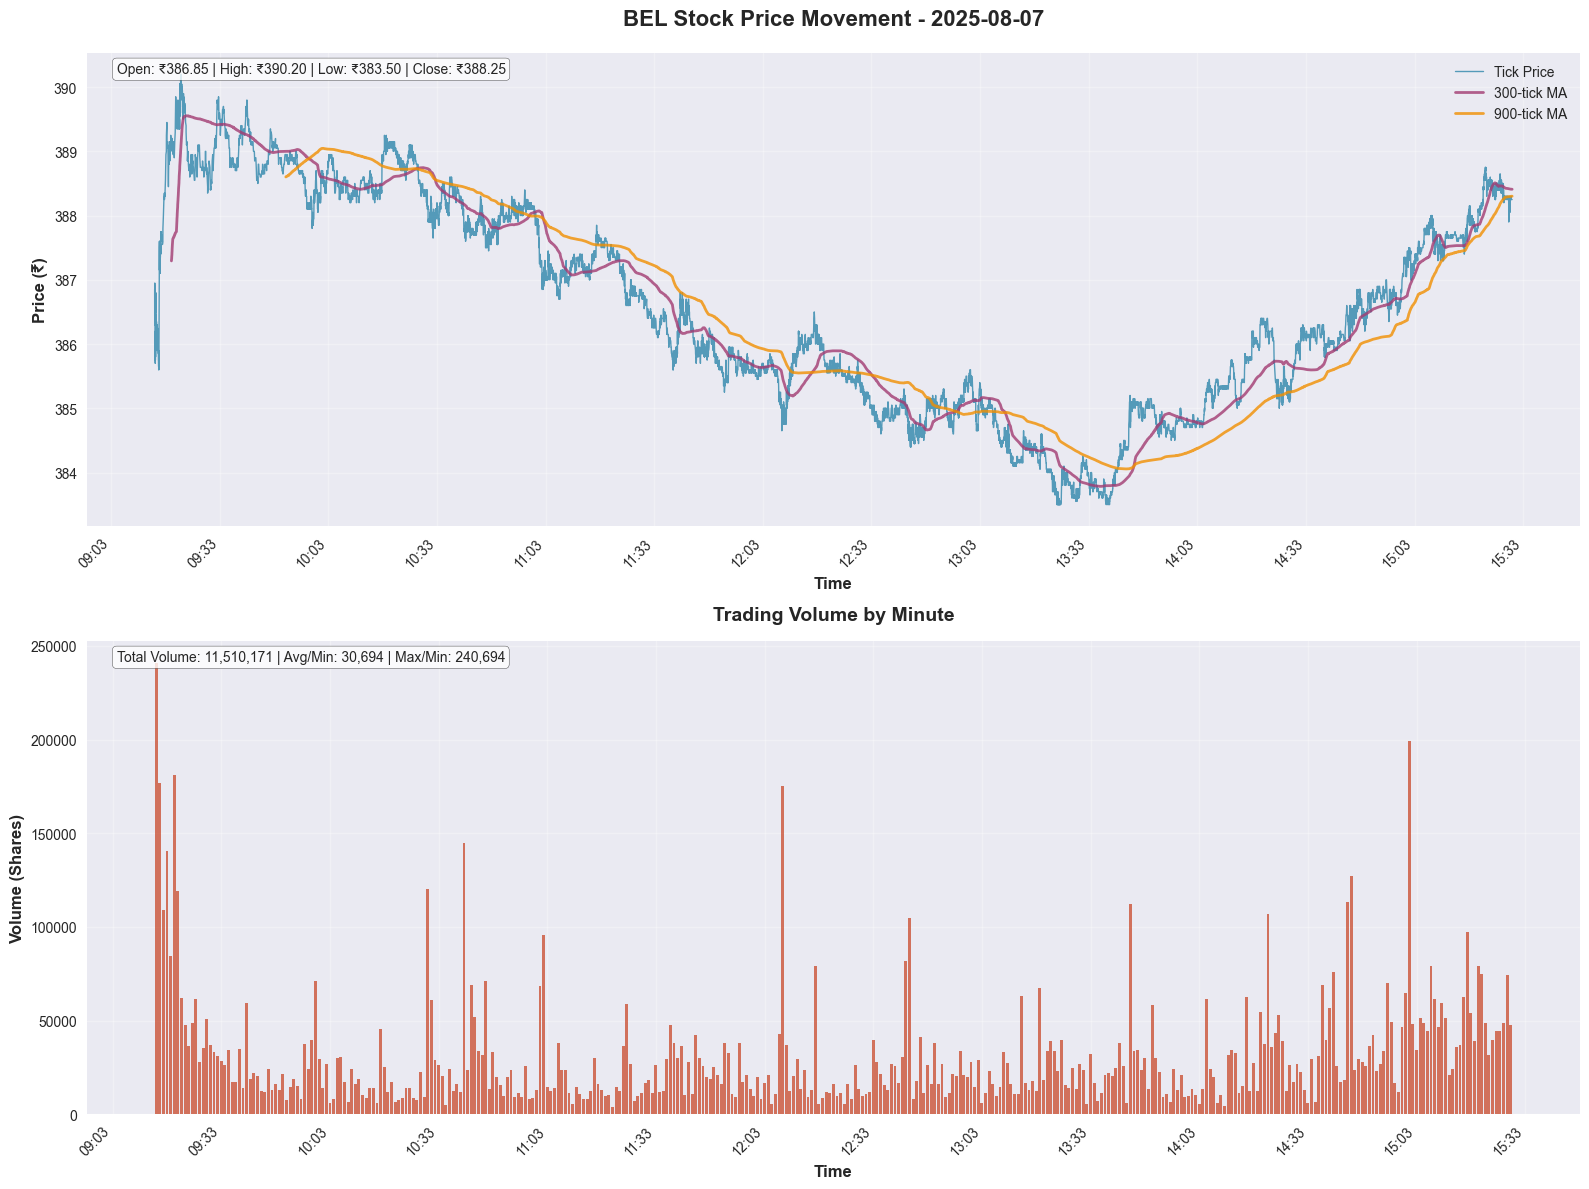

Price line chart created successfully!
Chart shows 10,956 price ticks over time

=== ADDITIONAL PRICE ANALYSIS CHARTS ===


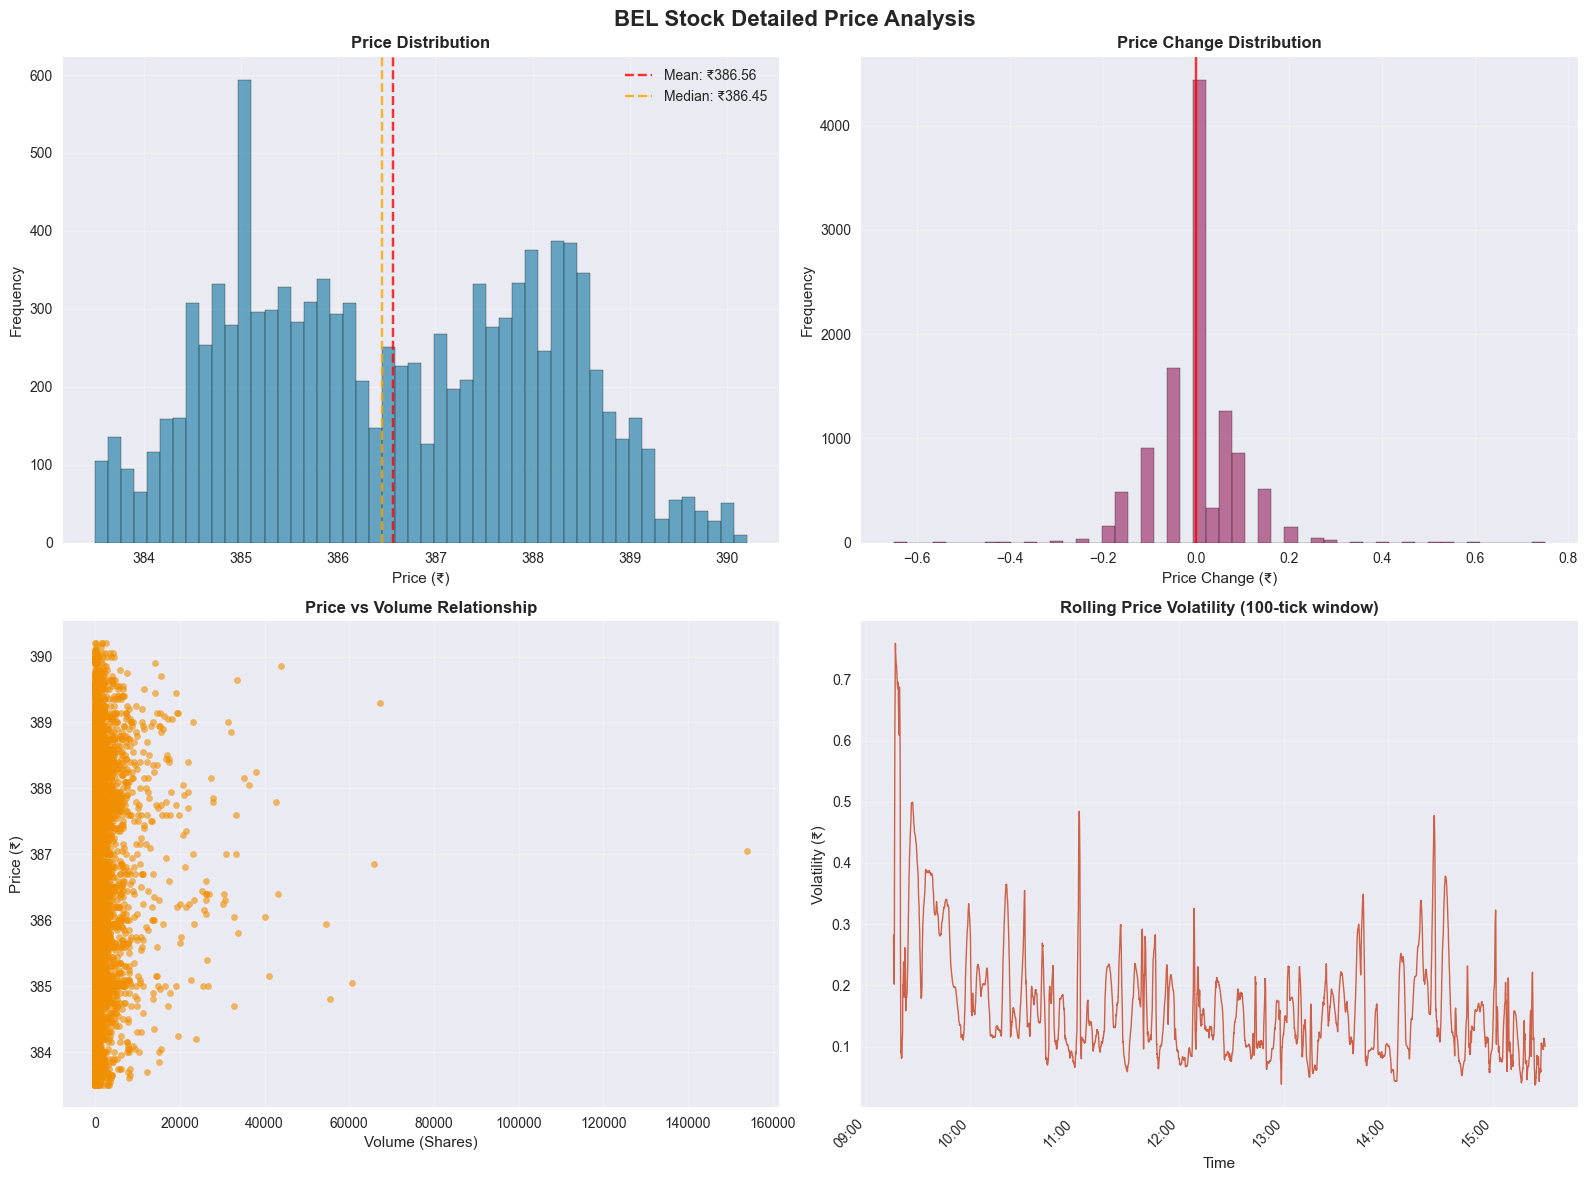

Additional analysis charts created successfully!

=== PRICE CHART SUMMARY STATISTICS ===
BEL Stock Trading Summary:
--------------------------------------------------
Opening Price       : ₹386.85
Closing Price       : ₹388.25
Highest Price       : ₹390.20
Lowest Price        : ₹383.50
Price Range         : ₹6.70
Price Range %       : 1.73%
Average Price       : ₹386.56
Median Price        : ₹386.45
Price Std Dev       : ₹1.57
Total Trades        : 10,956
Total Volume        : 11,510,171
Total Turnover      : ₹4,451,969,112

=== PRICE CHART ANALYSIS COMPLETE ===
Charts created:
- Main price line chart with moving averages
- Volume subplot by minute
- Price distribution histogram
- Price change distribution
- Price vs Volume scatter plot
- Rolling volatility chart


In [57]:
# Create line chart of price over time
print("=== PRICE OVER TIME LINE CHART ===")

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Prepare data for plotting
print(f"\n=== DATA PREPARATION FOR PLOTTING ===")

# Use the original tick data
if 'df' in locals():
    plot_data = df.copy()
    print(f"Using original tick data: {len(plot_data):,} trades")
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    plot_data = None

if plot_data is not None:
    # Ensure data is sorted by datetime
    plot_data = plot_data.sort_values('date').reset_index(drop=True)
    
    # Create time-based features for plotting
    plot_data['time_only'] = plot_data['date'].dt.time
    plot_data['hour_minute'] = plot_data['date'].dt.strftime('%H:%M')
    
    print(f"Data range: {plot_data['date'].min()} to {plot_data['date'].max()}")
    print(f"Total trading time: {plot_data['date'].max() - plot_data['date'].min()}")
    
    # Get basic statistics
    print(f"Price range: ₹{plot_data['price'].min():.2f} - ₹{plot_data['price'].max():.2f}")
    print(f"Average price: ₹{plot_data['price'].mean():.2f}")
    print(f"Price volatility (std): ₹{plot_data['price'].std():.4f}")

# 2. Create the main price line chart
print(f"\n=== CREATING PRICE LINE CHART ===")

if plot_data is not None:
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Main price chart
    ax1.plot(plot_data['date'], plot_data['price'], 
             linewidth=1, alpha=0.8, color='#2E86AB', label='Tick Price')
    
    # Add moving averages
    if len(plot_data) > 20:
        # 5-minute moving average (assuming ~1 tick per second, 5 min = 300 ticks)
        window_5min = min(300, len(plot_data) // 10)
        if window_5min > 1:
            ma_5min = plot_data['price'].rolling(window=window_5min).mean()
            ax1.plot(plot_data['date'], ma_5min, 
                     linewidth=2, color='#A23B72', alpha=0.8, label=f'{window_5min}-tick MA')
        
        # 15-minute moving average
        window_15min = min(900, len(plot_data) // 3)
        if window_15min > 1:
            ma_15min = plot_data['price'].rolling(window=window_15min).mean()
            ax1.plot(plot_data['date'], ma_15min, 
                     linewidth=2, color='#F18F01', alpha=0.8, label=f'{window_15min}-tick MA')
    
    # Customize the main chart
    ax1.set_title(f'BEL Stock Price Movement - {plot_data["date"].dt.date.iloc[0]}', 
                  fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Price (₹)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    
    # Format x-axis for better readability
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    ax1.xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=30))
    
    # Rotate x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add price statistics as text
    price_stats_text = f"Open: ₹{plot_data['price'].iloc[0]:.2f} | " \
                       f"High: ₹{plot_data['price'].max():.2f} | " \
                       f"Low: ₹{plot_data['price'].min():.2f} | " \
                       f"Close: ₹{plot_data['price'].iloc[-1]:.2f}"
    
    ax1.text(0.02, 0.98, price_stats_text, transform=ax1.transAxes, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 3. Create volume subplot
    print(f"Creating volume subplot...")
    
    # Aggregate volume by minute for cleaner visualization
    plot_data['minute_key'] = plot_data['date'].dt.floor('1min')
    volume_by_minute = plot_data.groupby('minute_key')['qty'].sum().reset_index()
    
    # Create volume bars
    ax2.bar(volume_by_minute['minute_key'], volume_by_minute['qty'], 
            alpha=0.7, color='#C73E1D', width=timedelta(minutes=0.8))
    
    # Customize volume chart
    ax2.set_title('Trading Volume by Minute', fontsize=14, fontweight='bold', pad=15)
    ax2.set_ylabel('Volume (Shares)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Format x-axis for volume chart
    ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    ax2.xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=30))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add volume statistics
    total_volume = volume_by_minute['qty'].sum()
    avg_volume = volume_by_minute['qty'].mean()
    max_volume = volume_by_minute['qty'].max()
    
    volume_stats_text = f"Total Volume: {total_volume:,.0f} | " \
                       f"Avg/Min: {avg_volume:,.0f} | " \
                       f"Max/Min: {max_volume:,.0f}"
    
    ax2.text(0.02, 0.98, volume_stats_text, transform=ax2.transAxes, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    print(f"Price line chart created successfully!")
    print(f"Chart shows {len(plot_data):,} price ticks over time")

# 5. Create additional price analysis charts
print(f"\n=== ADDITIONAL PRICE ANALYSIS CHARTS ===")

if plot_data is not None:
    # Create a figure with multiple subplots for detailed analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('BEL Stock Detailed Price Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Price distribution histogram
    axes[0, 0].hist(plot_data['price'], bins=50, alpha=0.7, color='#2E86AB', edgecolor='black')
    axes[0, 0].set_title('Price Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Price (₹)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add mean and median lines
    mean_price = plot_data['price'].mean()
    median_price = plot_data['price'].median()
    axes[0, 0].axvline(mean_price, color='red', linestyle='--', alpha=0.8, label=f'Mean: ₹{mean_price:.2f}')
    axes[0, 0].axvline(median_price, color='orange', linestyle='--', alpha=0.8, label=f'Median: ₹{median_price:.2f}')
    axes[0, 0].legend()
    
    # Subplot 2: Price change distribution
    if 'price_change' in plot_data.columns:
        price_changes = plot_data['price_change'].dropna()
        axes[0, 1].hist(price_changes, bins=50, alpha=0.7, color='#A23B72', edgecolor='black')
        axes[0, 1].set_title('Price Change Distribution', fontweight='bold')
        axes[0, 1].set_xlabel('Price Change (₹)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Add zero line
        axes[0, 1].axvline(0, color='red', linestyle='-', alpha=0.8)
    
    # Subplot 3: Price vs Volume scatter
    axes[1, 0].scatter(plot_data['qty'], plot_data['price'], alpha=0.6, color='#F18F01', s=20)
    axes[1, 0].set_title('Price vs Volume Relationship', fontweight='bold')
    axes[1, 0].set_xlabel('Volume (Shares)')
    axes[1, 0].set_ylabel('Price (₹)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Subplot 4: Intraday price volatility
    # Calculate rolling volatility
    if len(plot_data) > 100:
        volatility_window = min(100, len(plot_data) // 10)
        rolling_volatility = plot_data['price'].rolling(window=volatility_window).std()
        
        axes[1, 1].plot(plot_data['date'], rolling_volatility, 
                        linewidth=1, color='#C73E1D', alpha=0.8)
        axes[1, 1].set_title(f'Rolling Price Volatility ({volatility_window}-tick window)', fontweight='bold')
        axes[1, 1].set_xlabel('Time')
        axes[1, 1].set_ylabel('Volatility (₹)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Format x-axis
        axes[1, 1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
        plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Additional analysis charts created successfully!")

# 6. Create summary statistics
print(f"\n=== PRICE CHART SUMMARY STATISTICS ===")

if plot_data is not None:
    # Calculate key metrics
    price_stats = {
        'Opening Price': plot_data['price'].iloc[0],
        'Closing Price': plot_data['price'].iloc[-1],
        'Highest Price': plot_data['price'].max(),
        'Lowest Price': plot_data['price'].min(),
        'Price Range': plot_data['price'].max() - plot_data['price'].min(),
        'Price Range %': ((plot_data['price'].max() - plot_data['price'].min()) / plot_data['price'].iloc[0]) * 100,
        'Average Price': plot_data['price'].mean(),
        'Median Price': plot_data['price'].median(),
        'Price Std Dev': plot_data['price'].std(),
        'Total Trades': len(plot_data),
        'Total Volume': plot_data['qty'].sum(),
        'Total Turnover': plot_data['trnvr'].sum()
    }
    
    print("BEL Stock Trading Summary:")
    print("-" * 50)
    for metric, value in price_stats.items():
        if 'Price' in metric and metric != 'Total Trades':
            if 'Range %' in metric:
                print(f"{metric:<20}: {value:.2f}%")
            else:
                print(f"{metric:<20}: ₹{value:.2f}")
        elif 'Volume' in metric:
            print(f"{metric:<20}: {value:,.0f}")
        elif 'Turnover' in metric:
            print(f"{metric:<20}: ₹{value:,.0f}")
        else:
            print(f"{metric:<20}: {value:,}")

print(f"\n=== PRICE CHART ANALYSIS COMPLETE ===")
print("Charts created:")
print("- Main price line chart with moving averages")
print("- Volume subplot by minute")
print("- Price distribution histogram")
print("- Price change distribution")
print("- Price vs Volume scatter plot")
print("- Rolling volatility chart")

=== CANDLESTICK-STYLE CHART WITH ALIGNED VOLUME ===

=== DATA PREPARATION FOR CANDLESTICK CHART ===
Using original tick data: 10,956 trades
Creating minute-level OHLC data...
Created 375 minute-level OHLC bars
Data range: 2025-08-07 09:15:00 to 2025-08-07 15:29:01
Price range: ₹383.50 - ₹390.20
Average volume per minute: 30,694 shares
Total volume: 11,510,171 shares

=== CREATING CANDLESTICK CHART WITH VOLUME ===
Drawing candlestick chart...
Creating aligned volume bars...


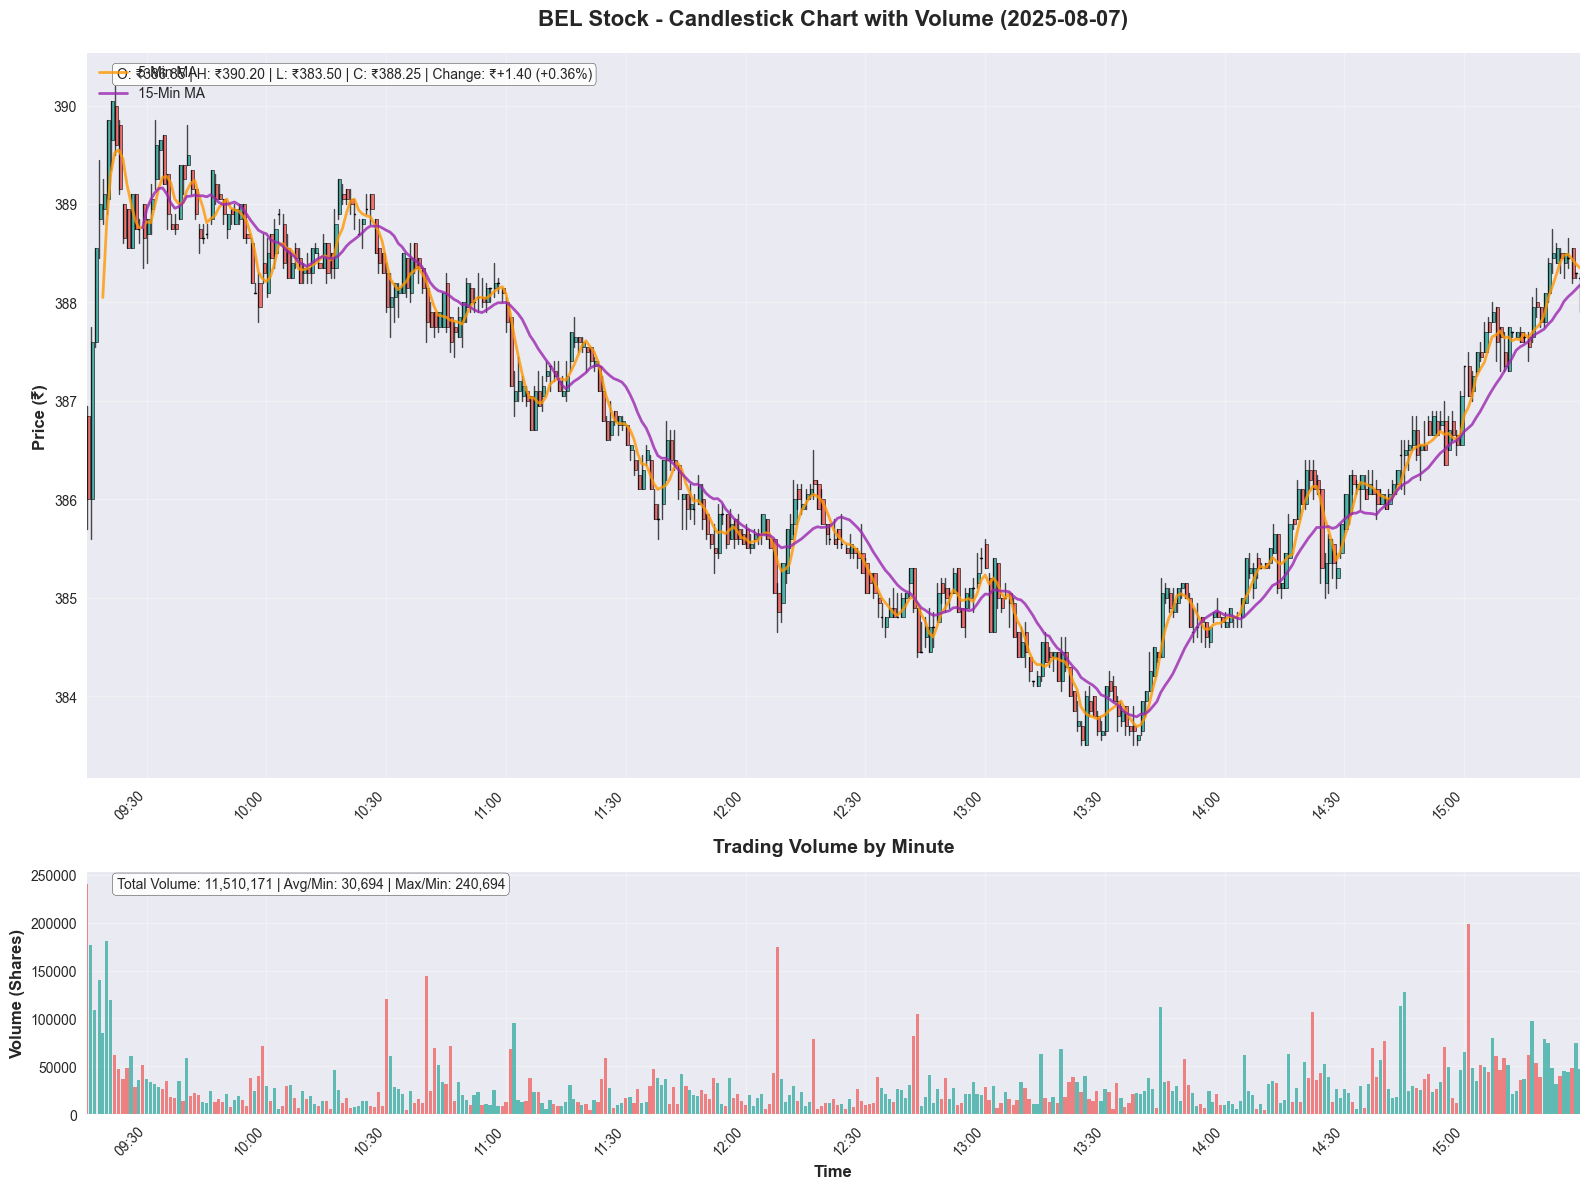

Candlestick chart with aligned volume created successfully!

=== ADDITIONAL CANDLESTICK ANALYSIS ===


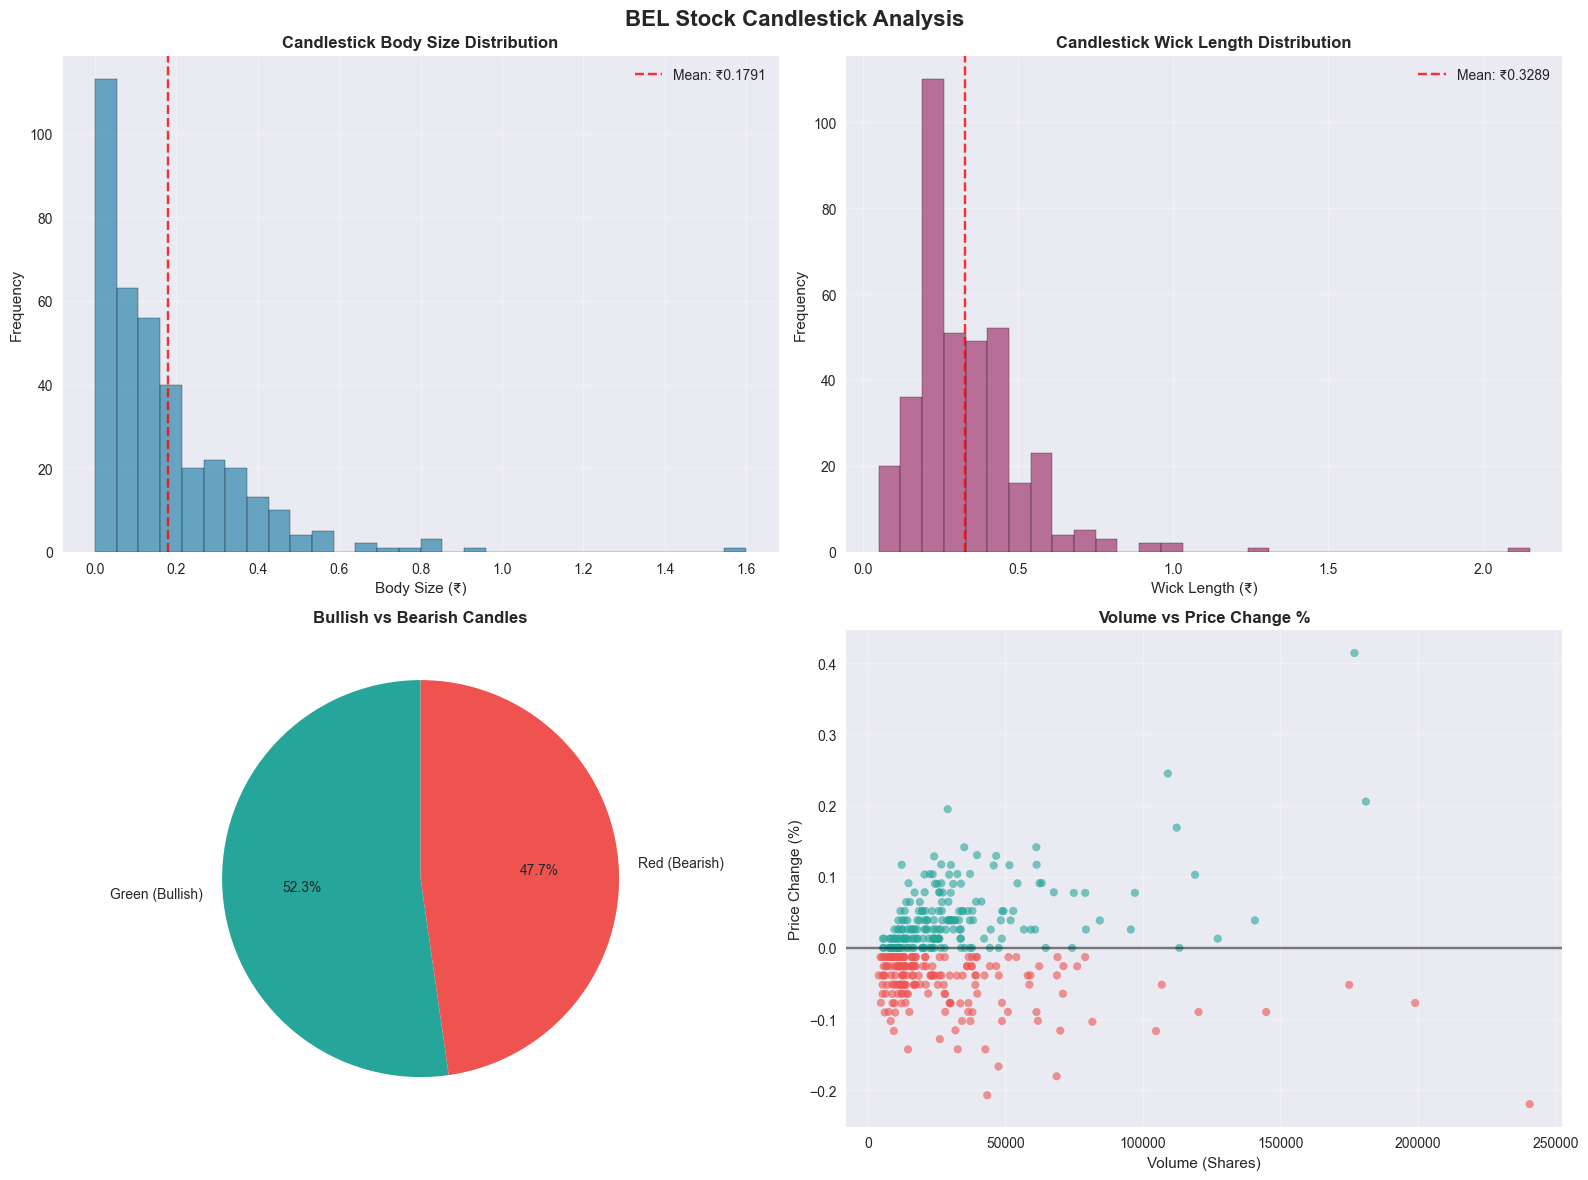

Additional candlestick analysis charts created successfully!

=== CANDLESTICK PATTERN ANALYSIS ===
Identified 87 candlestick patterns:
  09:28 - Doji: Very small body, indecision
  09:28 - Hammer: Potential reversal signal
  09:29 - Bearish Engulfing: Bearish reversal signal
  09:34 - Bearish Engulfing: Bearish reversal signal
  09:44 - Doji: Very small body, indecision
  09:44 - Hammer: Potential reversal signal
  09:45 - Doji: Very small body, indecision
  09:45 - Hammer: Potential reversal signal
  09:57 - Doji: Very small body, indecision
  09:58 - Bearish Engulfing: Bearish reversal signal
  ... and 77 more patterns

=== CANDLESTICK CHART SUMMARY STATISTICS ===
Candlestick Analysis Summary:
--------------------------------------------------
Total Minutes            : 375
Green Candles            : 196
Red Candles              : 179
Green %                  : 52.3%
Average Body Size        : ₹0.1791
Average Wick Length      : ₹0.3289
Largest Body             : ₹1.6000
Largest Wick 

In [58]:
# Create candlestick-style chart with aligned volume bars
print("=== CANDLESTICK-STYLE CHART WITH ALIGNED VOLUME ===")

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Set style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Prepare data for candlestick chart
print(f"\n=== DATA PREPARATION FOR CANDLESTICK CHART ===")

# Use the original tick data
if 'df' in locals():
    tick_data = df.copy()
    print(f"Using original tick data: {len(tick_data):,} trades")
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    tick_data = None

if tick_data is not None:
    # Ensure data is sorted by datetime
    tick_data = tick_data.sort_values('date').reset_index(drop=True)
    
    # Create minute-level OHLC data for candlesticks
    print("Creating minute-level OHLC data...")
    
    tick_data['minute_key'] = tick_data['date'].dt.floor('1min')
    
    # Aggregate by minute to create OHLC
    ohlc_data = tick_data.groupby('minute_key').agg({
        'price': ['first', 'last', 'min', 'max'],
        'qty': 'sum',
        'trnvr': 'sum',
        'date': 'first'  # Keep first timestamp for each minute
    }).round(4)
    
    # Flatten column names
    ohlc_data.columns = ['open', 'close', 'low', 'high', 'volume', 'turnover', 'timestamp']
    ohlc_data = ohlc_data.reset_index()
    
    # Calculate additional metrics
    ohlc_data['price_change'] = ohlc_data['close'] - ohlc_data['open']
    ohlc_data['price_change_pct'] = (ohlc_data['price_change'] / ohlc_data['open']) * 100
    ohlc_data['body_color'] = np.where(ohlc_data['close'] >= ohlc_data['open'], 'green', 'red')
    ohlc_data['is_green'] = ohlc_data['close'] >= ohlc_data['open']
    
    # Remove rows with NaN values
    ohlc_data = ohlc_data.dropna()
    
    print(f"Created {len(ohlc_data):,} minute-level OHLC bars")
    print(f"Data range: {ohlc_data['timestamp'].min()} to {ohlc_data['timestamp'].max()}")
    
    # Get basic statistics
    print(f"Price range: ₹{ohlc_data['low'].min():.2f} - ₹{ohlc_data['high'].max():.2f}")
    print(f"Average volume per minute: {ohlc_data['volume'].mean():,.0f} shares")
    print(f"Total volume: {ohlc_data['volume'].sum():,.0f} shares")

# 2. Create the main candlestick chart with volume
print(f"\n=== CREATING CANDLESTICK CHART WITH VOLUME ===")

if 'ohlc_data' in locals():
    # Create figure with subplots (price chart and volume)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), 
                                   gridspec_kw={'height_ratios': [3, 1]})
    
    # Main candlestick chart
    print("Drawing candlestick chart...")
    
    # Plot candlesticks
    for idx, row in ohlc_data.iterrows():
        # Determine color based on open/close
        if row['is_green']:
            color = '#26A69A'  # Green for bullish
            alpha = 0.8
        else:
            color = '#EF5350'  # Red for bearish
            alpha = 0.8
        
        # Draw the body (rectangle from open to close)
        body_height = abs(row['close'] - row['open'])
        if body_height > 0:
            rect = plt.Rectangle((row['timestamp'], min(row['open'], row['close'])), 
                               timedelta(minutes=0.8), body_height,
                               facecolor=color, alpha=alpha, edgecolor='black', linewidth=0.5)
            ax1.add_patch(rect)
        
        # Draw the wick (line from high to low)
        ax1.plot([row['timestamp'], row['timestamp']], [row['low'], row['high']], 
                color='black', linewidth=1, alpha=0.7)
        
        # Draw small horizontal lines for open and close if body is very small
        if body_height < 0.01:  # Very small body
            ax1.plot([row['timestamp'] - timedelta(minutes=0.2), row['timestamp'] + timedelta(minutes=0.2)], 
                    [row['open'], row['open']], color='black', linewidth=1, alpha=0.7)
            ax1.plot([row['timestamp'] - timedelta(minutes=0.2), row['timestamp'] + timedelta(minutes=0.2)], 
                    [row['close'], row['close']], color='black', linewidth=1, alpha=0.7)
    
    # Add moving averages
    if len(ohlc_data) > 20:
        # 5-minute moving average
        ma_5 = ohlc_data['close'].rolling(window=5).mean()
        ax1.plot(ohlc_data['timestamp'], ma_5, 
                linewidth=2, color='#FF9800', alpha=0.8, label='5-Min MA')
        
        # 15-minute moving average
        ma_15 = ohlc_data['close'].rolling(window=15).mean()
        ax1.plot(ohlc_data['timestamp'], ma_15, 
                linewidth=2, color='#9C27B0', alpha=0.8, label='15-Min MA')
    
    # Customize the main chart
    ax1.set_title(f'BEL Stock - Candlestick Chart with Volume ({ohlc_data["timestamp"].dt.date.iloc[0]})', 
                  fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Price (₹)', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10, loc='upper left')
    
    # Format x-axis for better readability
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    
    # Rotate x-axis labels
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add price statistics as text
    open_price = ohlc_data['open'].iloc[0]
    close_price = ohlc_data['close'].iloc[-1]
    high_price = ohlc_data['high'].max()
    low_price = ohlc_data['low'].min()
    total_change = close_price - open_price
    total_change_pct = (total_change / open_price) * 100
    
    price_stats_text = f"O: ₹{open_price:.2f} | H: ₹{high_price:.2f} | L: ₹{low_price:.2f} | C: ₹{close_price:.2f} | " \
                       f"Change: ₹{total_change:+.2f} ({total_change_pct:+.2f}%)"
    
    ax1.text(0.02, 0.98, price_stats_text, transform=ax1.transAxes, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # 3. Create volume bars aligned with candlesticks
    print("Creating aligned volume bars...")
    
    # Color volume bars based on price direction
    volume_colors = ['#26A69A' if row['is_green'] else '#EF5350' for _, row in ohlc_data.iterrows()]
    
    # Create volume bars
    ax2.bar(ohlc_data['timestamp'], ohlc_data['volume'], 
            color=volume_colors, alpha=0.7, width=timedelta(minutes=0.8))
    
    # Customize volume chart
    ax2.set_title('Trading Volume by Minute', fontsize=14, fontweight='bold', pad=15)
    ax2.set_ylabel('Volume (Shares)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Format x-axis for volume chart
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add volume statistics
    total_volume = ohlc_data['volume'].sum()
    avg_volume = ohlc_data['volume'].mean()
    max_volume = ohlc_data['volume'].max()
    
    volume_stats_text = f"Total Volume: {total_volume:,.0f} | " \
                       f"Avg/Min: {avg_volume:,.0f} | " \
                       f"Max/Min: {max_volume:,.0f}"
    
    ax2.text(0.02, 0.98, volume_stats_text, transform=ax2.transAxes, 
             fontsize=10, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # 4. Synchronize x-axis between price and volume charts
    ax1.set_xlim(ohlc_data['timestamp'].min(), ohlc_data['timestamp'].max())
    ax2.set_xlim(ohlc_data['timestamp'].min(), ohlc_data['timestamp'].max())
    
    # 5. Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    print(f"Candlestick chart with aligned volume created successfully!")

# 6. Create additional candlestick analysis
print(f"\n=== ADDITIONAL CANDLESTICK ANALYSIS ===")

if 'ohlc_data' in locals():
    # Create a figure with multiple subplots for detailed analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('BEL Stock Candlestick Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Body size distribution
    body_sizes = abs(ohlc_data['close'] - ohlc_data['open'])
    axes[0, 0].hist(body_sizes, bins=30, alpha=0.7, color='#2E86AB', edgecolor='black')
    axes[0, 0].set_title('Candlestick Body Size Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Body Size (₹)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add mean line
    mean_body = body_sizes.mean()
    axes[0, 0].axvline(mean_body, color='red', linestyle='--', alpha=0.8, label=f'Mean: ₹{mean_body:.4f}')
    axes[0, 0].legend()
    
    # Subplot 2: Wick length distribution
    wick_lengths = ohlc_data['high'] - ohlc_data['low']
    axes[0, 1].hist(wick_lengths, bins=30, alpha=0.7, color='#A23B72', edgecolor='black')
    axes[0, 1].set_title('Candlestick Wick Length Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('Wick Length (₹)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add mean line
    mean_wick = wick_lengths.mean()
    axes[0, 1].axvline(mean_wick, color='red', linestyle='--', alpha=0.8, label=f'Mean: ₹{mean_wick:.4f}')
    axes[0, 1].legend()
    
    # Subplot 3: Green vs Red candles count
    green_count = ohlc_data['is_green'].sum()
    red_count = (~ohlc_data['is_green']).sum()
    
    colors = ['#26A69A', '#EF5350']
    axes[1, 0].pie([green_count, red_count], labels=['Green (Bullish)', 'Red (Bearish)'], 
                    colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Bullish vs Bearish Candles', fontweight='bold')
    
    # Subplot 4: Volume vs Price Change relationship
    scatter_colors = ['#26A69A' if row['is_green'] else '#EF5350' for _, row in ohlc_data.iterrows()]
    axes[1, 1].scatter(ohlc_data['volume'], ohlc_data['price_change_pct'], 
                       c=scatter_colors, alpha=0.6, s=30)
    axes[1, 1].set_title('Volume vs Price Change %', fontweight='bold')
    axes[1, 1].set_xlabel('Volume (Shares)')
    axes[1, 1].set_ylabel('Price Change (%)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add zero line
    axes[1, 1].axhline(0, color='black', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Additional candlestick analysis charts created successfully!")

# 7. Create candlestick pattern analysis
print(f"\n=== CANDLESTICK PATTERN ANALYSIS ===")

if 'ohlc_data' in locals():
    # Identify common candlestick patterns
    patterns = []
    
    for i in range(1, len(ohlc_data)):
        current = ohlc_data.iloc[i]
        previous = ohlc_data.iloc[i-1]
        
        # Doji pattern (very small body)
        if abs(current['close'] - current['open']) < 0.01:
            patterns.append({
                'timestamp': current['timestamp'],
                'pattern': 'Doji',
                'description': 'Very small body, indecision'
            })
        
        # Hammer pattern (long lower wick, small body)
        body_size = abs(current['close'] - current['open'])
        lower_wick = min(current['open'], current['close']) - current['low']
        if lower_wick > body_size * 2 and body_size < 0.02:
            patterns.append({
                'timestamp': current['timestamp'],
                'pattern': 'Hammer',
                'description': 'Potential reversal signal'
            })
        
        # Engulfing pattern
        if (current['is_green'] and not previous['is_green'] and
            current['open'] < previous['close'] and current['close'] > previous['open']):
            patterns.append({
                'timestamp': current['timestamp'],
                'pattern': 'Bullish Engulfing',
                'description': 'Bullish reversal signal'
            })
        elif (not current['is_green'] and previous['is_green'] and
              current['open'] > previous['close'] and current['close'] < previous['open']):
            patterns.append({
                'timestamp': current['timestamp'],
                'pattern': 'Bearish Engulfing',
                'description': 'Bearish reversal signal'
            })
    
    if patterns:
        print(f"Identified {len(patterns)} candlestick patterns:")
        for pattern in patterns[:10]:  # Show first 10
            print(f"  {pattern['timestamp'].strftime('%H:%M')} - {pattern['pattern']}: {pattern['description']}")
        
        if len(patterns) > 10:
            print(f"  ... and {len(patterns) - 10} more patterns")
    else:
        print("No significant candlestick patterns identified")

# 8. Create summary statistics
print(f"\n=== CANDLESTICK CHART SUMMARY STATISTICS ===")

if 'ohlc_data' in locals():
    # Calculate key metrics
    candlestick_stats = {
        'Total Minutes': len(ohlc_data),
        'Green Candles': ohlc_data['is_green'].sum(),
        'Red Candles': (~ohlc_data['is_green']).sum(),
        'Green %': (ohlc_data['is_green'].sum() / len(ohlc_data)) * 100,
        'Average Body Size': abs(ohlc_data['close'] - ohlc_data['open']).mean(),
        'Average Wick Length': (ohlc_data['high'] - ohlc_data['low']).mean(),
        'Largest Body': abs(ohlc_data['close'] - ohlc_data['open']).max(),
        'Largest Wick': (ohlc_data['high'] - ohlc_data['low']).max(),
        'Doji Count': (abs(ohlc_data['close'] - ohlc_data['open']) < 0.01).sum(),
        'Total Volume': ohlc_data['volume'].sum(),
        'Average Volume/Min': ohlc_data['volume'].mean()
    }
    
    print("Candlestick Analysis Summary:")
    print("-" * 50)
    for metric, value in candlestick_stats.items():
        if 'Body' in metric or 'Wick' in metric:
            print(f"{metric:<25}: ₹{value:.4f}")
        elif 'Volume' in metric:
            print(f"{metric:<25}: {value:,.0f}")
        elif '%' in metric:
            print(f"{metric:<25}: {value:.1f}%")
        else:
            print(f"{metric:<25}: {value}")

print(f"\n=== CANDLESTICK CHART ANALYSIS COMPLETE ===")
print("Charts created:")
print("- Main candlestick chart with OHLC data")
print("- Aligned volume bars below price chart")
print("- Moving averages overlay")
print("- Body size and wick length distributions")
print("- Bullish vs Bearish candle analysis")
print("- Volume vs Price change relationship")
print("- Candlestick pattern identification")

=== VOLUME HEATMAP: HOUR-DAY COMBINATION ANALYSIS ===

=== DATA PREPARATION FOR VOLUME HEATMAP ===
Using original tick data: 10,956 trades
Creating minute-level volume aggregation...
Created 375 minute-level volume records
Date range: 2025-08-07 to 2025-08-07
Trading days: ['Thursday']
Trading hours: [np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15)]

=== CREATING VOLUME HEATMAP ===
Creating pivot table for heatmap...
Pivot tables created successfully!
Heatmap dimensions: (1, 7)

=== CREATING HEATMAP VISUALIZATIONS ===
Creating average volume heatmap...
Creating total volume heatmap...
Creating trade count heatmap...
Creating volume intensity heatmap...


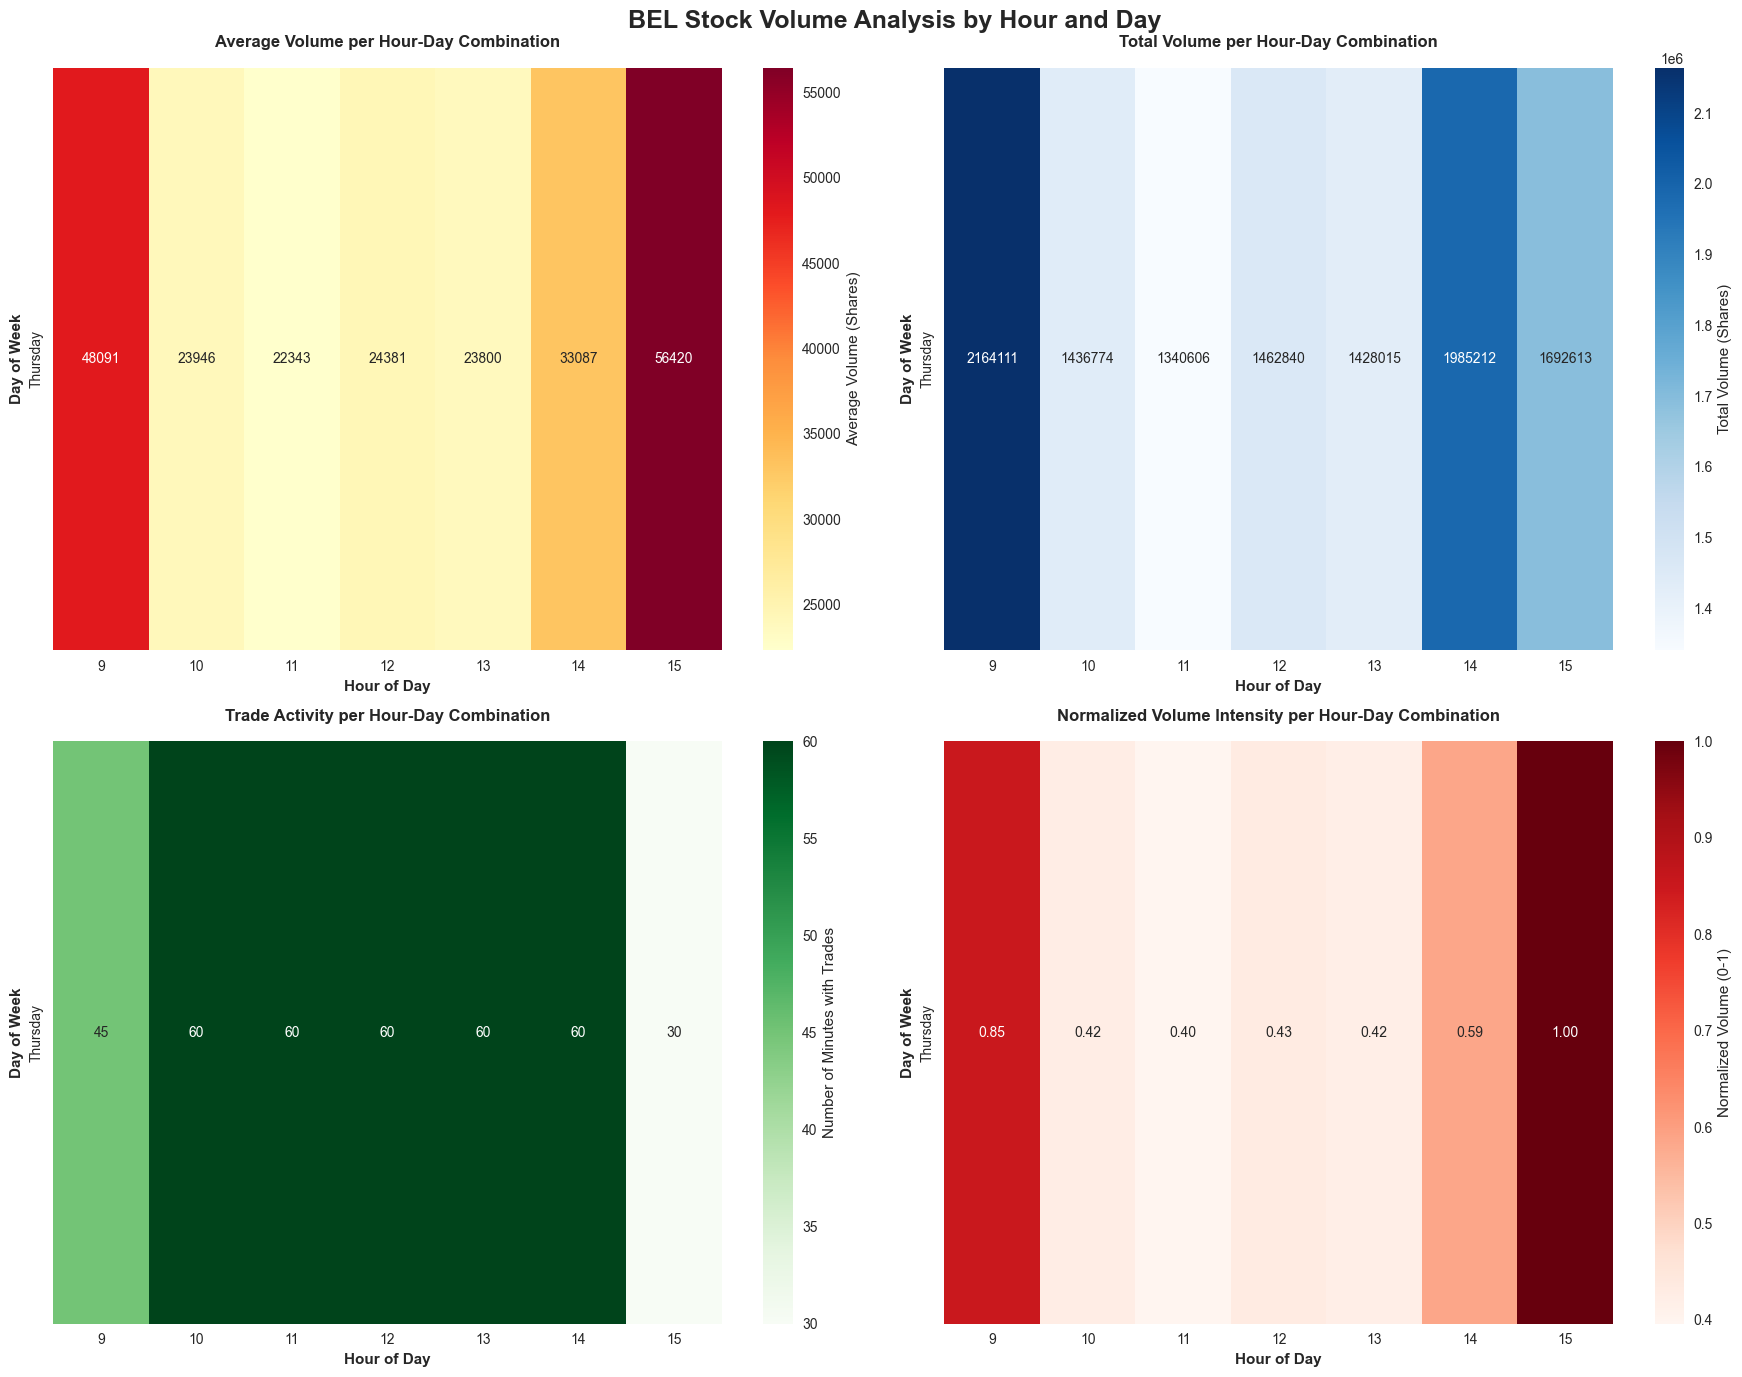

All heatmaps created successfully!

=== DETAILED VOLUME ANALYSIS ===
Analyzing peak volume periods...
Peak average volume: 56,420 shares
Peak period: Thursday at 15:00

Peak volume by day:
  Thursday: 15:00 (56,420 shares)

Peak volume by hour:
  09:00: Thursday (48,091 shares)
  10:00: Thursday (23,946 shares)
  11:00: Thursday (22,343 shares)
  12:00: Thursday (24,381 shares)
  13:00: Thursday (23,800 shares)
  14:00: Thursday (33,087 shares)
  15:00: Thursday (56,420 shares)

Volume pattern analysis:
  Morning (9-11 AM) average: 31,460 shares
  Afternoon (12-3 PM) average: 34,422 shares
  Morning/Afternoon ratio: 0.91
  Opening hour (9 AM) average: 48,091 shares
  Closing hour (3 PM) average: 56,420 shares
  Opening/Closing ratio: 0.85

=== ADDITIONAL VOLUME VISUALIZATIONS ===
Creating volume by hour line chart...
Creating volume by day bar chart...
Creating volume distribution by hour...
Creating detailed volume heatmap with annotations...


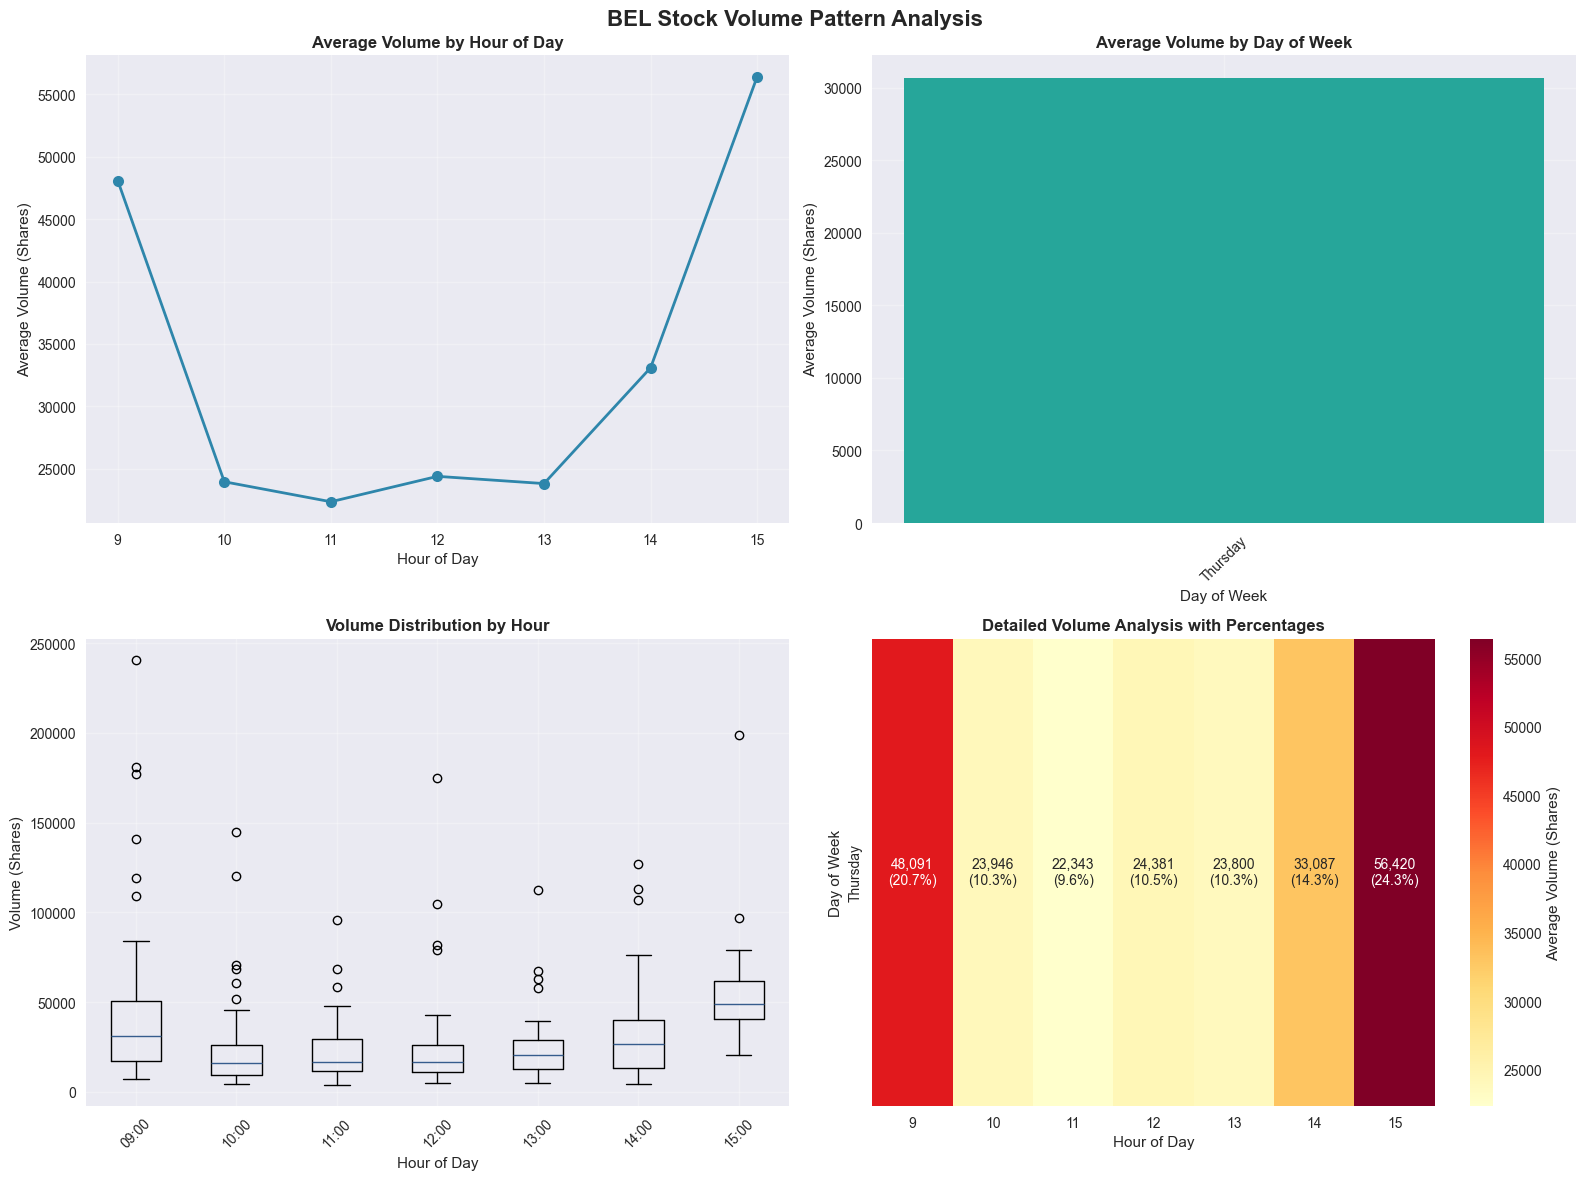

Additional volume visualizations created successfully!

=== VOLUME HEATMAP SUMMARY STATISTICS ===
Volume Heatmap Analysis Summary:
--------------------------------------------------
Total Average Volume               : 232,069 shares
Overall Average per Hour-Day       : 33152.74841269841
Highest Single Period              : 56420.433333333334
Lowest Single Period               : 22343.433333333334
Volume Standard Deviation          : 12,709 shares
Volume Coefficient of Variation    : 0 shares
Most Active Day                    : Thursday
Most Active Hour                   : 15
Least Active Day                   : Thursday
Least Active Hour                  : 11

=== EXPORT HEATMAP DATA ===
Heatmap data exported to:
- 'volume_pivot_ordered': Average volume by hour-day combination
- 'total_volume_pivot_ordered': Total volume by hour-day combination
- 'trade_count_pivot_ordered': Trade count by hour-day combination
- 'minute_volume': Detailed minute-level volume data

=== SAMPLE HEATMAP D

In [59]:
# Create heatmap of average volume per hour-day combination
print("=== VOLUME HEATMAP: HOUR-DAY COMBINATION ANALYSIS ===")

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar

# Set style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# 1. Prepare data for heatmap
print(f"\n=== DATA PREPARATION FOR VOLUME HEATMAP ===")

# Use the original tick data
if 'df' in locals():
    tick_data = df.copy()
    print(f"Using original tick data: {len(tick_data):,} trades")
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    tick_data = None

if tick_data is not None:
    # Ensure data is sorted by datetime
    tick_data = tick_data.sort_values('date').reset_index(drop=True)
    
    # Extract date and time components
    tick_data['date_only'] = tick_data['date'].dt.date
    tick_data['day_name'] = tick_data['date'].dt.day_name()
    tick_data['day_num'] = tick_data['date'].dt.dayofweek  # Monday=0, Sunday=6
    tick_data['hour'] = tick_data['date'].dt.hour
    tick_data['minute'] = tick_data['date'].dt.minute
    
    # Create minute-level aggregation for cleaner data
    print("Creating minute-level volume aggregation...")
    
    tick_data['minute_key'] = tick_data['date'].dt.floor('1min')
    
    # Aggregate volume by minute
    minute_volume = tick_data.groupby(['minute_key', 'date_only', 'day_name', 'day_num', 'hour']).agg({
        'qty': 'sum',
        'trnvr': 'sum',
        'price': ['first', 'last', 'mean']
    }).round(4)
    
    # Flatten column names
    minute_volume.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in minute_volume.columns]
    minute_volume = minute_volume.reset_index()
    
    # Remove rows with NaN values
    minute_volume = minute_volume.dropna()
    
    print(f"Created {len(minute_volume):,} minute-level volume records")
    print(f"Date range: {minute_volume['date_only'].min()} to {minute_volume['date_only'].max()}")
    
    # Get unique days and hours
    unique_days = sorted(minute_volume['day_name'].unique())
    unique_hours = sorted(minute_volume['hour'].unique())
    
    print(f"Trading days: {unique_days}")
    print(f"Trading hours: {unique_hours}")

# 2. Create the main volume heatmap
print(f"\n=== CREATING VOLUME HEATMAP ===")

if 'minute_volume' in locals():
    # Create pivot table for heatmap
    print("Creating pivot table for heatmap...")
    
    # Method 1: Average volume by hour-day combination
    volume_pivot = minute_volume.pivot_table(
        values='qty_sum', 
        index='day_name', 
        columns='hour', 
        aggfunc='mean',
        fill_value=0
    )
    
    # Method 2: Total volume by hour-day combination
    total_volume_pivot = minute_volume.pivot_table(
        values='qty_sum', 
        index='day_name', 
        columns='hour', 
        aggfunc='sum',
        fill_value=0
    )
    
    # Method 3: Number of trades by hour-day combination
    trade_count_pivot = minute_volume.pivot_table(
        values='qty_sum', 
        index='day_name', 
        columns='hour', 
        aggfunc='count',
        fill_value=0
    )
    
    print(f"Pivot tables created successfully!")
    print(f"Heatmap dimensions: {volume_pivot.shape}")

# 3. Create multiple heatmap visualizations
print(f"\n=== CREATING HEATMAP VISUALIZATIONS ===")

if 'volume_pivot' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('BEL Stock Volume Analysis by Hour and Day', fontsize=18, fontweight='bold')
    
    # Subplot 1: Average Volume Heatmap
    print("Creating average volume heatmap...")
    
    # Reorder days to start with Monday
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    available_days = [day for day in day_order if day in volume_pivot.index]
    volume_pivot_ordered = volume_pivot.reindex(available_days)
    
    # Create heatmap
    sns.heatmap(volume_pivot_ordered, 
                annot=True, 
                fmt='.0f', 
                cmap='YlOrRd', 
                cbar_kws={'label': 'Average Volume (Shares)'},
                ax=axes[0, 0])
    
    axes[0, 0].set_title('Average Volume per Hour-Day Combination', fontweight='bold', pad=15)
    axes[0, 0].set_xlabel('Hour of Day', fontweight='bold')
    axes[0, 0].set_ylabel('Day of Week', fontweight='bold')
    
    # Subplot 2: Total Volume Heatmap
    print("Creating total volume heatmap...")
    
    total_volume_pivot_ordered = total_volume_pivot.reindex(available_days)
    
    sns.heatmap(total_volume_pivot_ordered, 
                annot=True, 
                fmt='.0f', 
                cmap='Blues', 
                cbar_kws={'label': 'Total Volume (Shares)'},
                ax=axes[0, 1])
    
    axes[0, 1].set_title('Total Volume per Hour-Day Combination', fontweight='bold', pad=15)
    axes[0, 1].set_xlabel('Hour of Day', fontweight='bold')
    axes[0, 1].set_ylabel('Day of Week', fontweight='bold')
    
    # Subplot 3: Trade Count Heatmap
    print("Creating trade count heatmap...")
    
    trade_count_pivot_ordered = trade_count_pivot.reindex(available_days)
    
    sns.heatmap(trade_count_pivot_ordered, 
                annot=True, 
                fmt='.0f', 
                cmap='Greens', 
                cbar_kws={'label': 'Number of Minutes with Trades'},
                ax=axes[1, 0])
    
    axes[1, 0].set_title('Trade Activity per Hour-Day Combination', fontweight='bold', pad=15)
    axes[1, 0].set_xlabel('Hour of Day', fontweight='bold')
    axes[1, 0].set_ylabel('Day of Week', fontweight='bold')
    
    # Subplot 4: Volume Intensity Heatmap (normalized)
    print("Creating volume intensity heatmap...")
    
    # Normalize volume by the maximum value for better visualization
    volume_normalized = volume_pivot_ordered / volume_pivot_ordered.max().max()
    
    sns.heatmap(volume_normalized, 
                annot=True, 
                fmt='.2f', 
                cmap='Reds', 
                cbar_kws={'label': 'Normalized Volume (0-1)'},
                ax=axes[1, 1])
    
    axes[1, 1].set_title('Normalized Volume Intensity per Hour-Day Combination', fontweight='bold', pad=15)
    axes[1, 1].set_xlabel('Hour of Day', fontweight='bold')
    axes[1, 1].set_ylabel('Day of Week', fontweight='bold')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    print(f"All heatmaps created successfully!")

# 4. Create detailed volume analysis
print(f"\n=== DETAILED VOLUME ANALYSIS ===")

if 'volume_pivot_ordered' in locals():
    # Find peak volume periods
    print("Analyzing peak volume periods...")
    
    # Overall peak volume
    max_volume = volume_pivot_ordered.max().max()
    peak_day, peak_hour = volume_pivot_ordered.stack().idxmax()
    
    print(f"Peak average volume: {max_volume:,.0f} shares")
    print(f"Peak period: {peak_day} at {peak_hour:02d}:00")
    
    # Peak volume by day
    print(f"\nPeak volume by day:")
    for day in available_days:
        day_peak_hour = volume_pivot_ordered.loc[day].idxmax()
        day_peak_volume = volume_pivot_ordered.loc[day].max()
        print(f"  {day}: {day_peak_hour:02d}:00 ({day_peak_volume:,.0f} shares)")
    
    # Peak volume by hour
    print(f"\nPeak volume by hour:")
    for hour in sorted(volume_pivot_ordered.columns):
        hour_peak_day = volume_pivot_ordered[hour].idxmax()
        hour_peak_volume = volume_pivot_ordered[hour].max()
        print(f"  {hour:02d}:00: {hour_peak_day} ({hour_peak_volume:,.0f} shares)")
    
    # Volume patterns analysis
    print(f"\nVolume pattern analysis:")
    
    # Morning vs Afternoon
    morning_hours = [9, 10, 11]
    afternoon_hours = [12, 13, 14, 15]
    
    morning_volume = volume_pivot_ordered[morning_hours].mean().mean()
    afternoon_volume = volume_pivot_ordered[afternoon_hours].mean().mean()
    
    print(f"  Morning (9-11 AM) average: {morning_volume:,.0f} shares")
    print(f"  Afternoon (12-3 PM) average: {afternoon_volume:,.0f} shares")
    print(f"  Morning/Afternoon ratio: {morning_volume/afternoon_volume:.2f}")
    
    # Opening vs Closing
    opening_hour = 9
    closing_hour = 15
    
    opening_volume = volume_pivot_ordered[opening_hour].mean()
    closing_volume = volume_pivot_ordered[closing_hour].mean()
    
    print(f"  Opening hour (9 AM) average: {opening_volume:,.0f} shares")
    print(f"  Closing hour (3 PM) average: {closing_volume:,.0f} shares")
    print(f"  Opening/Closing ratio: {opening_volume/closing_volume:.2f}")

# 5. Create additional volume visualizations
print(f"\n=== ADDITIONAL VOLUME VISUALIZATIONS ===")

if 'minute_volume' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('BEL Stock Volume Pattern Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Volume by hour (line chart)
    print("Creating volume by hour line chart...")
    
    hourly_volume = minute_volume.groupby('hour')['qty_sum'].mean()
    axes[0, 0].plot(hourly_volume.index, hourly_volume.values, 
                     marker='o', linewidth=2, markersize=8, color='#2E86AB')
    axes[0, 0].set_title('Average Volume by Hour of Day', fontweight='bold')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Average Volume (Shares)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_xticks(range(9, 16))
    
    # Subplot 2: Volume by day (bar chart)
    print("Creating volume by day bar chart...")
    
    daily_volume = minute_volume.groupby('day_name')['qty_sum'].mean()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_volume_ordered = daily_volume.reindex([day for day in day_order if day in daily_volume.index])
    
    bars = axes[0, 1].bar(range(len(daily_volume_ordered)), daily_volume_ordered.values, 
                           color=['#26A69A', '#42A5F5', '#7E57C2', '#FF7043', '#FFB74D', '#66BB6A', '#EC407A'])
    axes[0, 1].set_title('Average Volume by Day of Week', fontweight='bold')
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].set_ylabel('Average Volume (Shares)')
    axes[0, 1].set_xticks(range(len(daily_volume_ordered)))
    axes[0, 1].set_xticklabels(daily_volume_ordered.index, rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Subplot 3: Volume distribution by hour
    print("Creating volume distribution by hour...")
    
    volume_by_hour = [minute_volume[minute_volume['hour'] == hour]['qty_sum'].values for hour in sorted(minute_volume['hour'].unique())]
    hour_labels = [f"{hour:02d}:00" for hour in sorted(minute_volume['hour'].unique())]
    
    axes[1, 0].boxplot(volume_by_hour, labels=hour_labels)
    axes[1, 0].set_title('Volume Distribution by Hour', fontweight='bold')
    axes[1, 0].set_xlabel('Hour of Day')
    axes[1, 0].set_ylabel('Volume (Shares)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 4: Volume heatmap with annotations
    print("Creating detailed volume heatmap with annotations...")
    
    # Create a more detailed heatmap
    detailed_volume = minute_volume.pivot_table(
        values='qty_sum', 
        index='day_name', 
        columns='hour', 
        aggfunc='mean',
        fill_value=0
    )
    
    # Reorder and create heatmap
    detailed_volume_ordered = detailed_volume.reindex(available_days)
    
    # Create custom annotations with volume and percentage
    annot_data = detailed_volume_ordered.copy()
    total_avg_volume = detailed_volume_ordered.values.sum()
    
    for day in detailed_volume_ordered.index:
        for hour in detailed_volume_ordered.columns:
            volume_val = detailed_volume_ordered.loc[day, hour]
            percentage = (volume_val / total_avg_volume) * 100
            annot_data.loc[day, hour] = f"{volume_val:,.0f}\n({percentage:.1f}%)"
    
    sns.heatmap(detailed_volume_ordered, 
                annot=annot_data, 
                fmt='', 
                cmap='YlOrRd', 
                cbar_kws={'label': 'Average Volume (Shares)'},
                ax=axes[1, 1])
    
    axes[1, 1].set_title('Detailed Volume Analysis with Percentages', fontweight='bold')
    axes[1, 1].set_xlabel('Hour of Day')
    axes[1, 1].set_ylabel('Day of Week')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Additional volume visualizations created successfully!")

# 6. Create volume summary statistics
print(f"\n=== VOLUME HEATMAP SUMMARY STATISTICS ===")

if 'volume_pivot_ordered' in locals():
    # Calculate comprehensive statistics
    volume_stats = {
        'Total Average Volume': volume_pivot_ordered.values.sum(),
        'Overall Average per Hour-Day': volume_pivot_ordered.values.mean(),
        'Highest Single Period': volume_pivot_ordered.max().max(),
        'Lowest Single Period': volume_pivot_ordered.min().min(),
        'Volume Standard Deviation': volume_pivot_ordered.values.std(),
        'Volume Coefficient of Variation': volume_pivot_ordered.values.std() / volume_pivot_ordered.values.mean(),
        'Most Active Day': volume_pivot_ordered.sum(axis=1).idxmax(),
        'Most Active Hour': volume_pivot_ordered.sum(axis=0).idxmax(),
        'Least Active Day': volume_pivot_ordered.sum(axis=1).idxmin(),
        'Least Active Hour': volume_pivot_ordered.sum(axis=0).idxmin()
    }
    
    print("Volume Heatmap Analysis Summary:")
    print("-" * 50)
    for metric, value in volume_stats.items():
        if 'Volume' in metric and 'Total' not in metric and 'Overall' not in metric:
            print(f"{metric:<35}: {value:,.0f} shares")
        elif 'Volume' in metric and ('Total' in metric or 'Overall' in metric):
            print(f"{metric:<35}: {value:,.0f} shares")
        elif 'Deviation' in metric:
            print(f"{metric:<35}: {value:,.0f} shares")
        elif 'Variation' in metric:
            print(f"{metric:<35}: {value:.3f}")
        else:
            print(f"{metric:<35}: {value}")

# 7. Export heatmap data
print(f"\n=== EXPORT HEATMAP DATA ===")

if 'volume_pivot_ordered' in locals():
    print("Heatmap data exported to:")
    print("- 'volume_pivot_ordered': Average volume by hour-day combination")
    print("- 'total_volume_pivot_ordered': Total volume by hour-day combination")
    print("- 'trade_count_pivot_ordered': Trade count by hour-day combination")
    print("- 'minute_volume': Detailed minute-level volume data")
    
    # Display sample of the main heatmap data
    print(f"\n=== SAMPLE HEATMAP DATA ===")
    print("Average Volume by Hour-Day Combination (Shares):")
    print(volume_pivot_ordered.round(0))

print(f"\n=== VOLUME HEATMAP ANALYSIS COMPLETE ===")
print("Visualizations created:")
print("- Average volume heatmap (YlOrRd)")
print("- Total volume heatmap (Blues)")
print("- Trade count heatmap (Greens)")
print("- Normalized volume intensity heatmap (Reds)")
print("- Volume by hour line chart")
print("- Volume by day bar chart")
print("- Volume distribution boxplots")
print("- Detailed volume heatmap with percentages")

=== VOLUME vs. PRICE CHANGE SCATTER PLOT ANALYSIS ===

=== DATA PREPARATION FOR VOLUME-PRICE ANALYSIS ===
Using original tick data: 10,956 trades
Creating additional analysis features...
Creating volume categories...
Creating price change categories...
Creating direction categories...
Creating time-based features...
Creating rolling averages...
Data preparation complete: 10,855 clean records
Features created: volume_category, price_change_category, direction, time-based features

Category distributions:
Volume categories: {'Medium': 5418, 'Low': 2751, 'High': 2686}
Price change categories: {'Small': 8394, 'Medium': 2461}
Direction categories: {'No Change': 4414, 'Down': 3258, 'Up': 3183}

=== CREATING VOLUME-PRICE SCATTER PLOTS ===
Creating basic volume vs. price change scatter plot...
Creating volume vs. percentage price change scatter plot...
Creating volume vs. absolute price change scatter plot...
Creating volume vs. price change by direction scatter plot...
Creating volume vs. pri

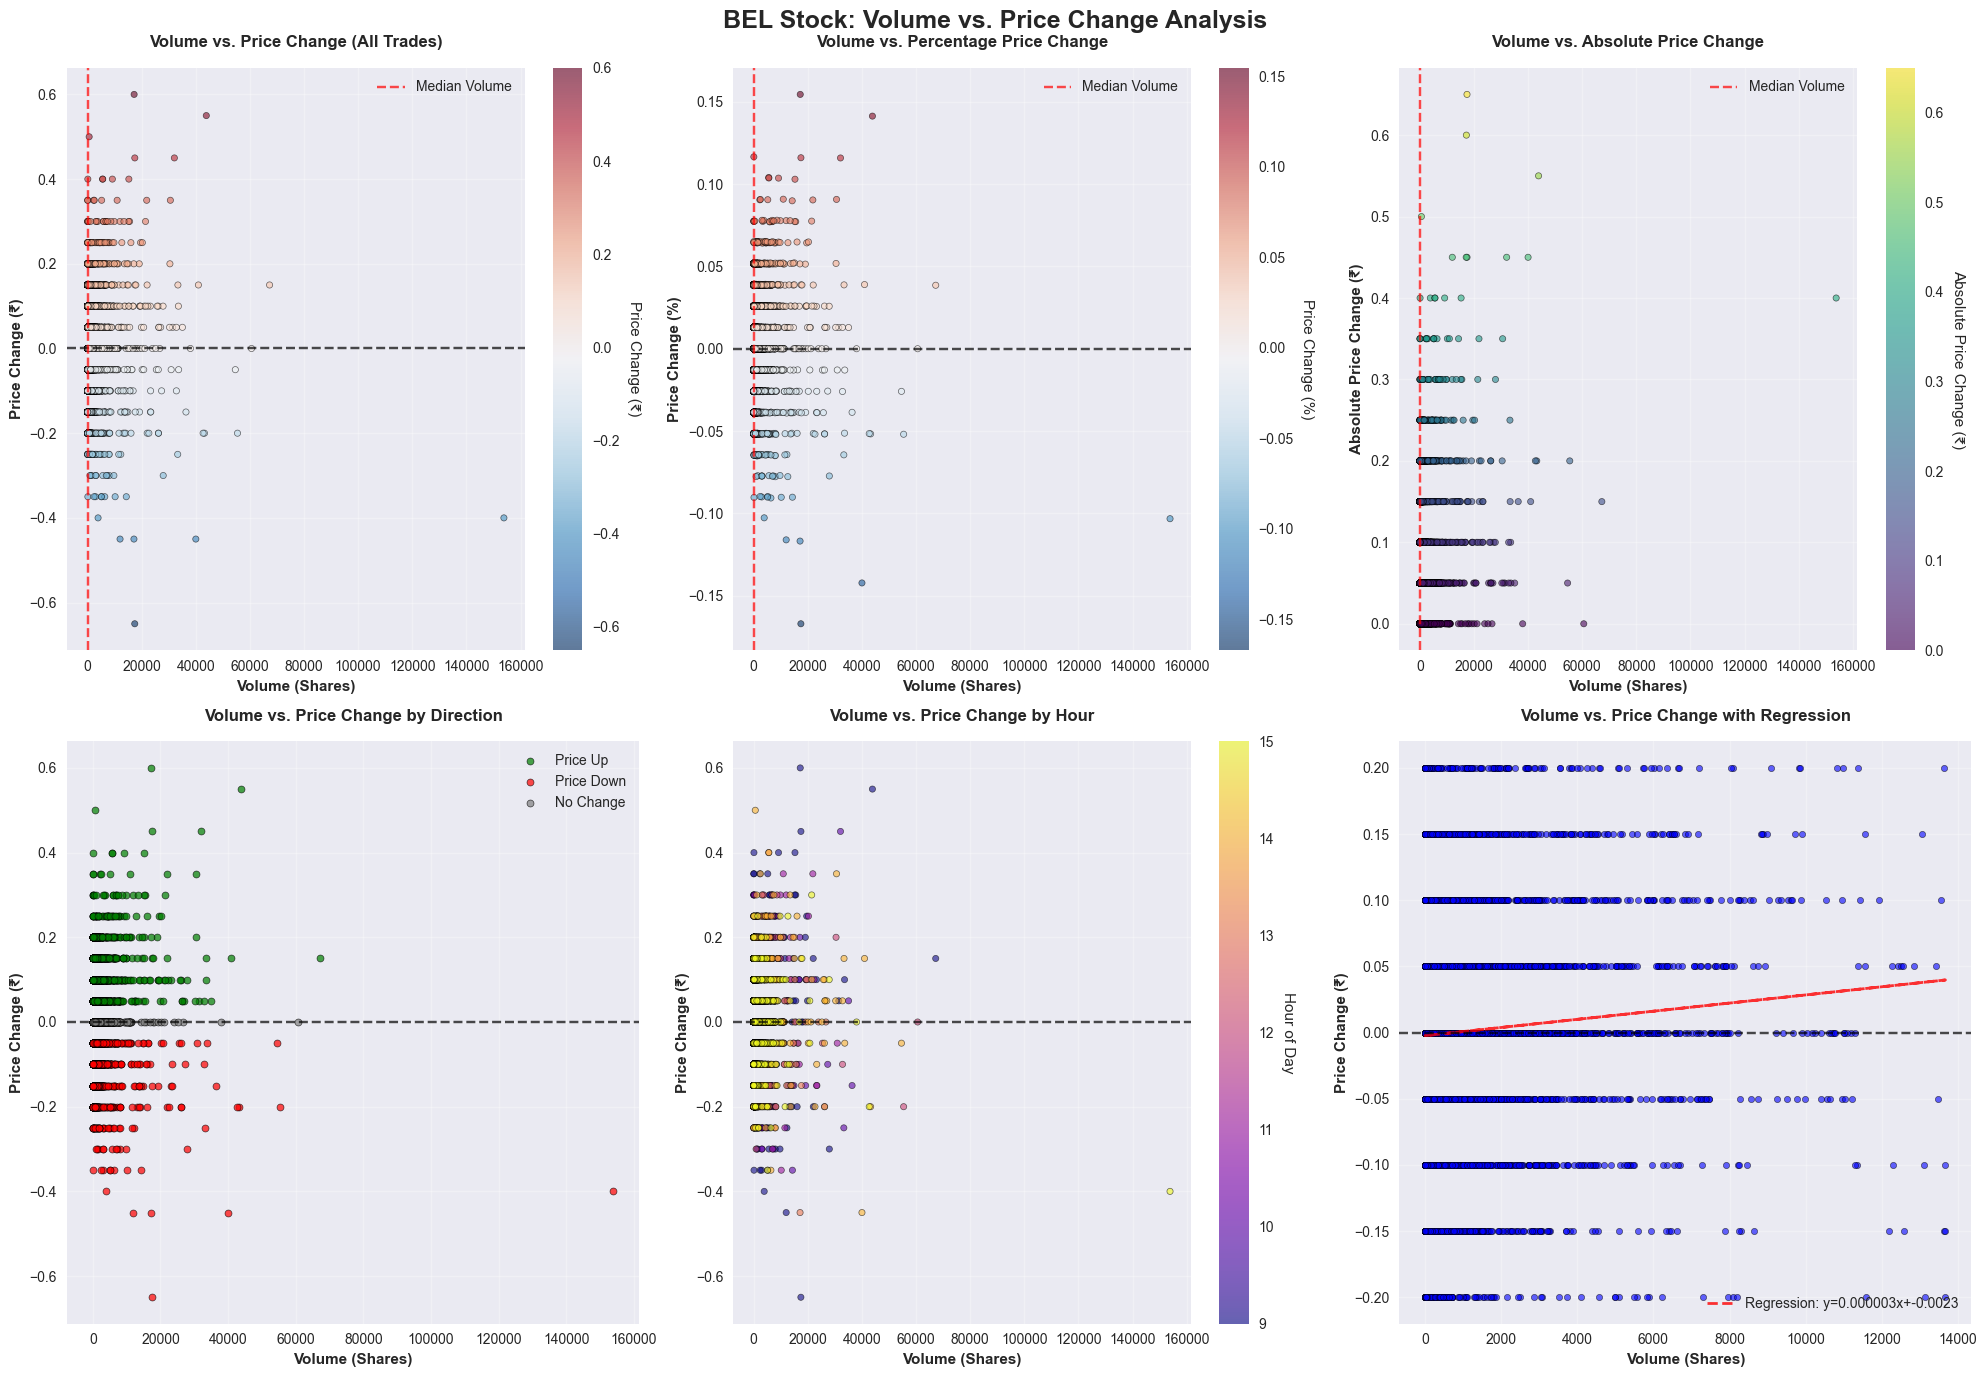

Main scatter plots created successfully!

=== CREATING SPECIALIZED SCATTER PLOTS ===
Creating volume vs. price change by volume category...
Available volume categories: ['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
Creating volume vs. price change by time since market open...
Creating volume vs. price change with moving averages...
Creating volume vs. price change density plot...


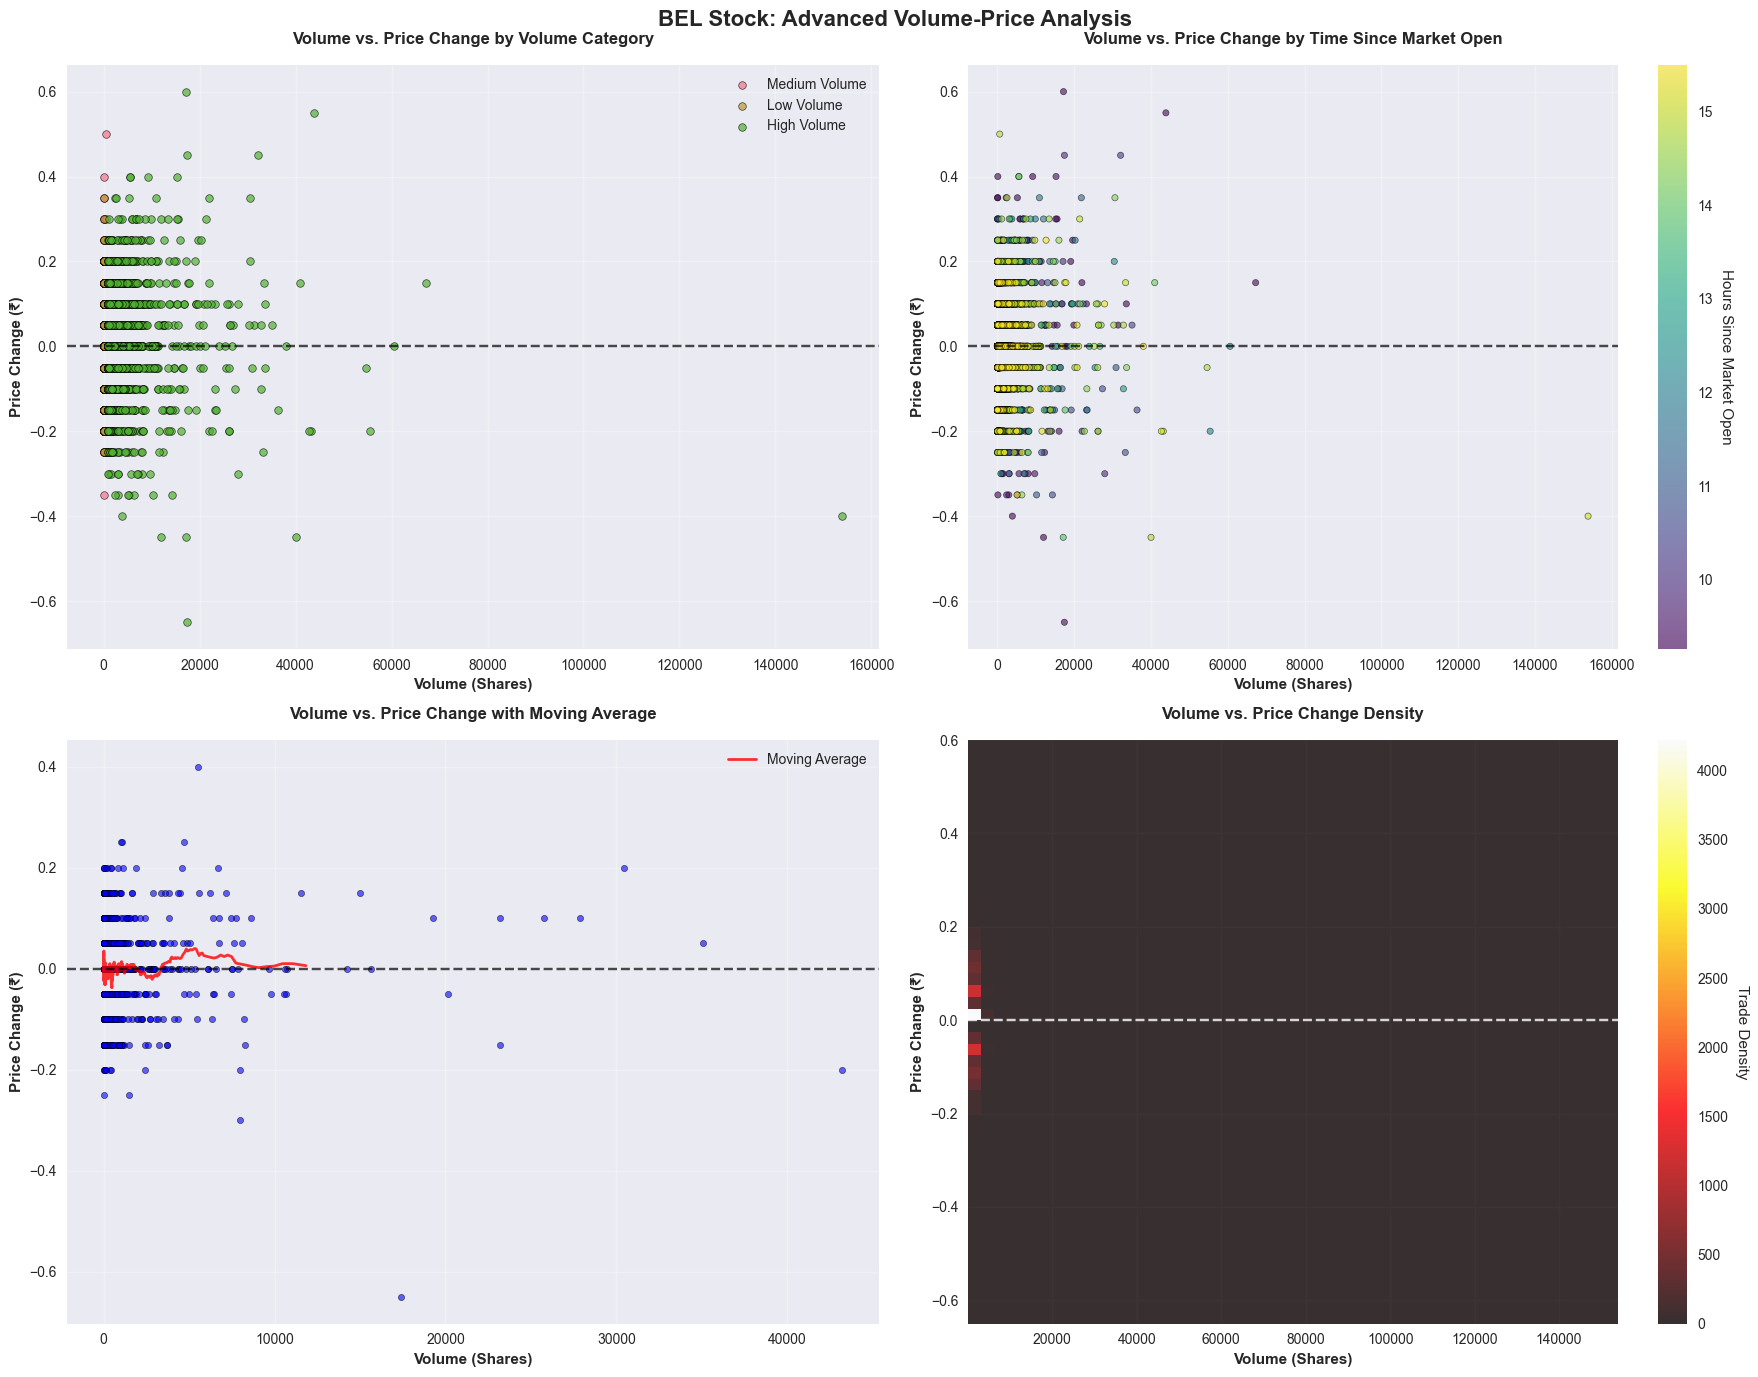

Specialized scatter plots created successfully!

=== STATISTICAL ANALYSIS OF VOLUME-PRICE RELATIONSHIP ===
Performing statistical analysis...

--- CORRELATION ANALYSIS ---
Pearson correlation (Volume vs. Price Change): 0.0282
P-value: 0.003323
Significance: Significant
Spearman correlation (Volume vs. Price Change): 0.0248
P-value: 0.009872
Significance: Significant
Pearson correlation (Volume vs. Absolute Price Change): 0.2260
P-value: 0.000000
Pearson correlation (Volume vs. Percentage Price Change): 0.0184
P-value: 0.055024

--- DIRECTION-BASED ANALYSIS ---
Up trades - Volume vs. Price Change correlation: 0.2565
  P-value: 0.000000
  Number of trades: 3,183
  Average volume: 1,456
  Average price change: 0.0929
Down trades - Volume vs. Price Change correlation: -0.2307
  P-value: 0.000000
  Number of trades: 3,258
  Average volume: 1,170
  Average price change: -0.0902
No Change trades - Volume vs. Price Change correlation: nan
  P-value: nan
  Number of trades: 4,414
  Average volu

In [61]:
# Create scatter plot of volume vs. price change
print("=== VOLUME vs. PRICE CHANGE SCATTER PLOT ANALYSIS ===")

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Prepare data for scatter plot analysis
print(f"\n=== DATA PREPARATION FOR VOLUME-PRICE ANALYSIS ===")

# Use the original tick data
if 'df' in locals():
    tick_data = df.copy()
    print(f"Using original tick data: {len(tick_data):,} trades")
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    tick_data = None

if tick_data is not None:
    # Ensure data is sorted by datetime
    tick_data = tick_data.sort_values('date').reset_index(drop=True)
    
    # Create price change columns if they don't exist
    if 'price_change' not in tick_data.columns:
        print("Creating price change columns...")
        tick_data['price_change'] = tick_data['price'].diff()
        tick_data['price_change_pct'] = tick_data['price_change'] / tick_data['price'].shift(1) * 100
    
    # Create additional features for analysis
    print("Creating additional analysis features...")
    
    # Volume categories - handle edge cases
    print("Creating volume categories...")
    qty_25 = tick_data['qty'].quantile(0.25)
    qty_75 = tick_data['qty'].quantile(0.75)
    qty_max = tick_data['qty'].max()
    
    # Ensure unique bin edges
    if qty_25 == qty_75:
        # If all quantiles are the same, create simple categories
        tick_data['volume_category'] = 'Medium'
    else:
        # Create bins with unique edges
        bins = [0]
        if qty_25 > 0:
            bins.append(qty_25)
        if qty_75 > qty_25:
            bins.append(qty_75)
        if qty_max > qty_75:
            bins.append(qty_max)
        
        # Ensure we have enough bins for labels
        if len(bins) >= 3:
            labels = ['Low', 'Medium', 'High'][:len(bins)-1]
            tick_data['volume_category'] = pd.cut(tick_data['qty'], 
                                                 bins=bins, 
                                                 labels=labels, 
                                                 include_lowest=True,
                                                 duplicates='drop')
        else:
            tick_data['volume_category'] = 'Medium'
    
    # Price change categories - handle edge cases with zero price changes
    print("Creating price change categories...")
    price_change_abs = tick_data['price_change'].abs()
    
    # Check if we have enough unique values for categorization
    unique_price_changes = price_change_abs.unique()
    if len(unique_price_changes) >= 3:
        # Calculate quantiles only if we have enough variation
        pc_25 = price_change_abs.quantile(0.25)
        pc_75 = price_change_abs.quantile(0.75)
        pc_max = price_change_abs.max()
        
        # Ensure unique bin edges
        pc_bins = [0]
        if pc_25 > 0:
            pc_bins.append(pc_25)
        if pc_75 > pc_25:
            pc_bins.append(pc_75)
        if pc_max > pc_75:
            pc_bins.append(pc_max)
        
        if len(pc_bins) >= 3:
            pc_labels = ['Small', 'Medium', 'Large'][:len(pc_bins)-1]
            tick_data['price_change_category'] = pd.cut(price_change_abs, 
                                                       bins=pc_bins, 
                                                       labels=pc_labels, 
                                                       include_lowest=True,
                                                       duplicates='drop')
        else:
            tick_data['price_change_category'] = 'Small'
    else:
        tick_data['price_change_category'] = 'Small'
    
    # Direction categories
    print("Creating direction categories...")
    tick_data['direction'] = np.where(tick_data['price_change'] > 0, 'Up', 
                                     np.where(tick_data['price_change'] < 0, 'Down', 'No Change'))
    
    # Time-based features
    print("Creating time-based features...")
    tick_data['hour'] = tick_data['date'].dt.hour
    tick_data['minute'] = tick_data['date'].dt.minute
    tick_data['time_since_open'] = (tick_data['date'] - tick_data['date'].dt.floor('D')).dt.total_seconds() / 3600
    
    # Rolling averages for context
    print("Creating rolling averages...")
    tick_data['volume_ma_5'] = tick_data['qty'].rolling(5).mean()
    tick_data['price_ma_5'] = tick_data['price'].rolling(5).mean()
    
    # Remove rows with NaN values
    tick_data_clean = tick_data.dropna()
    
    print(f"Data preparation complete: {len(tick_data_clean):,} clean records")
    print(f"Features created: volume_category, price_change_category, direction, time-based features")
    
    # Display category distributions
    print(f"\nCategory distributions:")
    print(f"Volume categories: {tick_data_clean['volume_category'].value_counts().to_dict()}")
    print(f"Price change categories: {tick_data_clean['price_change_category'].value_counts().to_dict()}")
    print(f"Direction categories: {tick_data_clean['direction'].value_counts().to_dict()}")

# 2. Create comprehensive scatter plot analysis
print(f"\n=== CREATING VOLUME-PRICE SCATTER PLOTS ===")

if 'tick_data_clean' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 14))
    fig.suptitle('BEL Stock: Volume vs. Price Change Analysis', fontsize=18, fontweight='bold')
    
    # Subplot 1: Basic Volume vs. Price Change
    print("Creating basic volume vs. price change scatter plot...")
    
    scatter1 = axes[0, 0].scatter(tick_data_clean['qty'], tick_data_clean['price_change'], 
                                   alpha=0.6, s=20, c=tick_data_clean['price_change'], 
                                   cmap='RdBu_r', edgecolors='black', linewidth=0.5)
    
    axes[0, 0].set_title('Volume vs. Price Change (All Trades)', fontweight='bold', pad=15)
    axes[0, 0].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 0].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[0, 0].axvline(x=tick_data_clean['qty'].median(), color='red', linestyle='--', alpha=0.7, label='Median Volume')
    
    # Add colorbar
    cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
    cbar1.set_label('Price Change (₹)', rotation=270, labelpad=15)
    axes[0, 0].legend()
    
    # Subplot 2: Volume vs. Percentage Price Change
    print("Creating volume vs. percentage price change scatter plot...")
    
    scatter2 = axes[0, 1].scatter(tick_data_clean['qty'], tick_data_clean['price_change_pct'], 
                                   alpha=0.6, s=20, c=tick_data_clean['price_change_pct'], 
                                   cmap='RdBu_r', edgecolors='black', linewidth=0.5)
    
    axes[0, 1].set_title('Volume vs. Percentage Price Change', fontweight='bold', pad=15)
    axes[0, 1].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 1].set_ylabel('Price Change (%)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[0, 1].axvline(x=tick_data_clean['qty'].median(), color='red', linestyle='--', alpha=0.7, label='Median Volume')
    
    # Add colorbar
    cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
    cbar2.set_label('Price Change (%)', rotation=270, labelpad=15)
    axes[0, 1].legend()
    
    # Subplot 3: Volume vs. Absolute Price Change
    print("Creating volume vs. absolute price change scatter plot...")
    
    scatter3 = axes[0, 2].scatter(tick_data_clean['qty'], tick_data_clean['price_change'].abs(), 
                                   alpha=0.6, s=20, c=tick_data_clean['price_change'].abs(), 
                                   cmap='viridis', edgecolors='black', linewidth=0.5)
    
    axes[0, 2].set_title('Volume vs. Absolute Price Change', fontweight='bold', pad=15)
    axes[0, 2].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 2].set_ylabel('Absolute Price Change (₹)', fontweight='bold')
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].axvline(x=tick_data_clean['qty'].median(), color='red', linestyle='--', alpha=0.7, label='Median Volume')
    
    # Add colorbar
    cbar3 = plt.colorbar(scatter3, ax=axes[0, 2])
    cbar3.set_label('Absolute Price Change (₹)', rotation=270, labelpad=15)
    axes[0, 2].legend()
    
    # Subplot 4: Volume vs. Price Change by Direction
    print("Creating volume vs. price change by direction scatter plot...")
    
    # Separate data by direction
    up_trades = tick_data_clean[tick_data_clean['direction'] == 'Up']
    down_trades = tick_data_clean[tick_data_clean['direction'] == 'Down']
    no_change_trades = tick_data_clean[tick_data_clean['direction'] == 'No Change']
    
    axes[1, 0].scatter(up_trades['qty'], up_trades['price_change'], 
                        alpha=0.7, s=25, color='green', label='Price Up', edgecolors='black', linewidth=0.5)
    axes[1, 0].scatter(down_trades['qty'], down_trades['price_change'], 
                        alpha=0.7, s=25, color='red', label='Price Down', edgecolors='black', linewidth=0.5)
    axes[1, 0].scatter(no_change_trades['qty'], no_change_trades['price_change'], 
                        alpha=0.7, s=25, color='gray', label='No Change', edgecolors='black', linewidth=0.5)
    
    axes[1, 0].set_title('Volume vs. Price Change by Direction', fontweight='bold', pad=15)
    axes[1, 0].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[1, 0].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[1, 0].legend()
    
    # Subplot 5: Volume vs. Price Change by Hour
    print("Creating volume vs. price change by hour scatter plot...")
    
    # Color by hour
    scatter5 = axes[1, 1].scatter(tick_data_clean['qty'], tick_data_clean['price_change'], 
                                   alpha=0.6, s=20, c=tick_data_clean['hour'], 
                                   cmap='plasma', edgecolors='black', linewidth=0.5)
    
    axes[1, 1].set_title('Volume vs. Price Change by Hour', fontweight='bold', pad=15)
    axes[1, 1].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[1, 1].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    
    # Add colorbar
    cbar5 = plt.colorbar(scatter5, ax=axes[1, 1])
    cbar5.set_label('Hour of Day', rotation=270, labelpad=15)
    
    # Subplot 6: Volume vs. Price Change with Regression
    print("Creating volume vs. price change with regression line...")
    
    # Remove outliers for better regression
    q1_volume = tick_data_clean['qty'].quantile(0.01)
    q3_volume = tick_data_clean['qty'].quantile(0.99)
    q1_price = tick_data_clean['price_change'].quantile(0.01)
    q3_price = tick_data_clean['price_change'].quantile(0.99)
    
    filtered_data = tick_data_clean[
        (tick_data_clean['qty'] >= q1_volume) & (tick_data_clean['qty'] <= q3_volume) &
        (tick_data_clean['price_change'] >= q1_price) & (tick_data_clean['price_change'] <= q3_price)
    ]
    
    # Create scatter plot
    axes[1, 2].scatter(filtered_data['qty'], filtered_data['price_change'], 
                        alpha=0.6, s=20, color='blue', edgecolors='black', linewidth=0.5)
    
    # Add regression line
    if len(filtered_data) > 10:
        z = np.polyfit(filtered_data['qty'], filtered_data['price_change'], 1)
        p = np.poly1d(z)
        axes[1, 2].plot(filtered_data['qty'], p(filtered_data['qty']), 
                         "r--", alpha=0.8, linewidth=2, label=f'Regression: y={z[0]:.6f}x+{z[1]:.4f}')
    
    axes[1, 2].set_title('Volume vs. Price Change with Regression', fontweight='bold', pad=15)
    axes[1, 2].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[1, 2].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[1, 2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Main scatter plots created successfully!")

# 3. Create additional specialized scatter plots
print(f"\n=== CREATING SPECIALIZED SCATTER PLOTS ===")

if 'tick_data_clean' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('BEL Stock: Advanced Volume-Price Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Volume vs. Price Change by Volume Category
    print("Creating volume vs. price change by volume category...")
    
    # Check available volume categories
    available_volume_cats = tick_data_clean['volume_category'].unique()
    print(f"Available volume categories: {available_volume_cats}")
    
    for category in available_volume_cats:
        cat_data = tick_data_clean[tick_data_clean['volume_category'] == category]
        if len(cat_data) > 0:
            axes[0, 0].scatter(cat_data['qty'], cat_data['price_change'], 
                               alpha=0.7, s=30, label=f'{category} Volume', edgecolors='black', linewidth=0.5)
    
    axes[0, 0].set_title('Volume vs. Price Change by Volume Category', fontweight='bold', pad=15)
    axes[0, 0].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 0].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[0, 0].legend()
    
    # Subplot 2: Volume vs. Price Change by Time Since Market Open
    print("Creating volume vs. price change by time since market open...")
    
    scatter_time = axes[0, 1].scatter(tick_data_clean['qty'], tick_data_clean['price_change'], 
                                      alpha=0.6, s=20, c=tick_data_clean['time_since_open'], 
                                      cmap='viridis', edgecolors='black', linewidth=0.5)
    
    axes[0, 1].set_title('Volume vs. Price Change by Time Since Market Open', fontweight='bold', pad=15)
    axes[0, 1].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 1].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    
    # Add colorbar
    cbar_time = plt.colorbar(scatter_time, ax=axes[0, 1])
    cbar_time.set_label('Hours Since Market Open', rotation=270, labelpad=15)
    
    # Subplot 3: Volume vs. Price Change with Moving Averages
    print("Creating volume vs. price change with moving averages...")
    
    # Sample data for moving average overlay (to avoid overcrowding)
    sample_data = tick_data_clean.sample(min(1000, len(tick_data_clean)), random_state=42)
    
    axes[1, 0].scatter(sample_data['qty'], sample_data['price_change'], 
                        alpha=0.6, s=20, color='blue', edgecolors='black', linewidth=0.5)
    
    # Add moving average lines
    if len(sample_data) > 20:
        # Sort by volume for smooth moving average
        sample_sorted = sample_data.sort_values('qty')
        
        # Volume-based moving average
        window_size = max(5, len(sample_sorted) // 20)
        volume_ma = sample_sorted['qty'].rolling(window=window_size).mean()
        price_change_ma = sample_sorted['price_change'].rolling(window=window_size).mean()
        
        axes[1, 0].plot(volume_ma, price_change_ma, 'r-', linewidth=2, alpha=0.8, label='Moving Average')
    
    axes[1, 0].set_title('Volume vs. Price Change with Moving Average', fontweight='bold', pad=15)
    axes[1, 0].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[1, 0].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.7)
    axes[1, 0].legend()
    
    # Subplot 4: Volume vs. Price Change Density Plot
    print("Creating volume vs. price change density plot...")
    
    # Create 2D histogram
    h = axes[1, 1].hist2d(tick_data_clean['qty'], tick_data_clean['price_change'], 
                           bins=50, cmap='hot', alpha=0.8)
    
    axes[1, 1].set_title('Volume vs. Price Change Density', fontweight='bold', pad=15)
    axes[1, 1].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[1, 1].set_ylabel('Price Change (₹)', fontweight='bold')
    axes[1, 1].axhline(y=0, color='white', linestyle='--', alpha=0.8)
    
    # Add colorbar
    cbar_density = plt.colorbar(h[3], ax=axes[1, 1])
    cbar_density.set_label('Trade Density', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Specialized scatter plots created successfully!")

# 4. Statistical analysis of volume-price relationship
print(f"\n=== STATISTICAL ANALYSIS OF VOLUME-PRICE RELATIONSHIP ===")

if 'tick_data_clean' in locals():
    print("Performing statistical analysis...")
    
    # Correlation analysis
    print(f"\n--- CORRELATION ANALYSIS ---")
    
    # Pearson correlation
    pearson_corr, pearson_p = stats.pearsonr(tick_data_clean['qty'], tick_data_clean['price_change'])
    print(f"Pearson correlation (Volume vs. Price Change): {pearson_corr:.4f}")
    print(f"P-value: {pearson_p:.6f}")
    print(f"Significance: {'Significant' if pearson_p < 0.05 else 'Not Significant'}")
    
    # Spearman correlation (rank-based)
    spearman_corr, spearman_p = stats.spearmanr(tick_data_clean['qty'], tick_data_clean['price_change'])
    print(f"Spearman correlation (Volume vs. Price Change): {spearman_corr:.4f}")
    print(f"P-value: {spearman_p:.6f}")
    print(f"Significance: {'Significant' if spearman_p < 0.05 else 'Not Significant'}")
    
    # Correlation with absolute price change
    pearson_abs_corr, pearson_abs_p = stats.pearsonr(tick_data_clean['qty'], tick_data_clean['price_change'].abs())
    print(f"Pearson correlation (Volume vs. Absolute Price Change): {pearson_abs_corr:.4f}")
    print(f"P-value: {pearson_abs_p:.6f}")
    
    # Correlation with percentage price change
    pearson_pct_corr, pearson_pct_p = stats.pearsonr(tick_data_clean['qty'], tick_data_clean['price_change_pct'])
    print(f"Pearson correlation (Volume vs. Percentage Price Change): {pearson_pct_corr:.4f}")
    print(f"P-value: {pearson_pct_p:.6f}")
    
    # Direction-based analysis
    print(f"\n--- DIRECTION-BASED ANALYSIS ---")
    
    for direction in ['Up', 'Down', 'No Change']:
        dir_data = tick_data_clean[tick_data_clean['direction'] == direction]
        if len(dir_data) > 10:
            dir_corr, dir_p = stats.pearsonr(dir_data['qty'], dir_data['price_change'])
            print(f"{direction} trades - Volume vs. Price Change correlation: {dir_corr:.4f}")
            print(f"  P-value: {dir_p:.6f}")
            print(f"  Number of trades: {len(dir_data):,}")
            print(f"  Average volume: {dir_data['qty'].mean():,.0f}")
            print(f"  Average price change: {dir_data['price_change'].mean():.4f}")
    
    # Volume category analysis
    print(f"\n--- VOLUME CATEGORY ANALYSIS ---")
    
    for category in available_volume_cats:
        cat_data = tick_data_clean[tick_data_clean['volume_category'] == category]
        if len(cat_data) > 10:
            print(f"{category} Volume Category:")
            print(f"  Number of trades: {len(cat_data):,}")
            print(f"  Average volume: {cat_data['qty'].mean():,.0f}")
            print(f"  Average price change: {cat_data['price_change'].mean():.4f}")
            print(f"  Price change std: {cat_data['price_change'].std():.4f}")
            print(f"  Volume range: {cat_data['qty'].min():,.0f} - {cat_data['qty'].max():,.0f}")

# 5. Create summary statistics table
print(f"\n=== VOLUME-PRICE RELATIONSHIP SUMMARY ===")

if 'tick_data_clean' in locals():
    # Calculate summary statistics
    summary_stats = {
        'Total Trades': len(tick_data_clean),
        'Average Volume': tick_data_clean['qty'].mean(),
        'Median Volume': tick_data_clean['qty'].median(),
        'Volume Std Dev': tick_data_clean['qty'].std(),
        'Average Price Change': tick_data_clean['price_change'].mean(),
        'Price Change Std Dev': tick_data_clean['price_change'].std(),
        'Average Abs Price Change': tick_data_clean['price_change'].abs().mean(),
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr,
        'Up Trades': len(tick_data_clean[tick_data_clean['direction'] == 'Up']),
        'Down Trades': len(tick_data_clean[tick_data_clean['direction'] == 'Down']),
        'No Change Trades': len(tick_data_clean[tick_data_clean['direction'] == 'No Change'])
    }
    
    print("Volume-Price Relationship Summary:")
    print("-" * 60)
    for metric, value in summary_stats.items():
        if 'Volume' in metric or 'Trades' in metric:
            print(f"{metric:<30}: {value:,.0f}")
        elif 'Correlation' in metric:
            print(f"{metric:<30}: {value:.4f}")
        elif 'Std Dev' in metric:
            print(f"{metric:<30}: {value:.4f}")
        else:
            print(f"{metric:<30}: {value:.4f}")

# 6. Export analysis data
print(f"\n=== EXPORT VOLUME-PRICE ANALYSIS DATA ===")

if 'tick_data_clean' in locals():
    print("Analysis data exported to:")
    print("- 'tick_data_clean': Clean data with all analysis features")
    print("- 'pearson_corr': Pearson correlation coefficient")
    print("- 'spearman_corr': Spearman correlation coefficient")
    print("- 'summary_stats': Summary statistics dictionary")
    
    # Display sample of the analysis data
    print(f"\n=== SAMPLE ANALYSIS DATA ===")
    print("Columns in tick_data_clean:")
    print(list(tick_data_clean.columns))
    
    print(f"\nFirst few rows of analysis data:")
    display_cols = ['date', 'price', 'qty', 'price_change', 'price_change_pct', 'direction', 'volume_category']
    print(tick_data_clean[display_cols].head(10))

print(f"\n=== VOLUME vs. PRICE CHANGE SCATTER PLOT ANALYSIS COMPLETE ===")
print("Visualizations created:")
print("- Basic volume vs. price change scatter plot")
print("- Volume vs. percentage price change scatter plot")
print("- Volume vs. absolute price change scatter plot")
print("- Volume vs. price change by direction")
print("- Volume vs. price change by hour")
print("- Volume vs. price change with regression line")
print("- Volume vs. price change by volume category")
print("- Volume vs. price change by time since market open")
print("- Volume vs. price change with moving averages")
print("- Volume vs. price change density plot")
print("\nStatistical analysis completed:")
print("- Correlation analysis (Pearson, Spearman)")
print("- Direction-based analysis")
print("- Volume category analysis")
print("- Summary statistics")

=== ROLLING VOLATILITY LINE CHART ANALYSIS ===

=== DATA PREPARATION FOR VOLATILITY ANALYSIS ===
Using original tick data: 10,956 trades
Creating volatility features...
Calculating rolling volatility with different windows...
Calculating rolling range-based volatility...
Calculating exponentially weighted volatility...
Calculating realized volatility...
Creating time-based features...
Volatility features created successfully: 0 clean records
Volatility measures: Standard deviation, Range-based, EWM, Realized volatility
Rolling windows: 1, 5, 10, 20, 50, 100, 200 trades

=== CREATING ROLLING VOLATILITY LINE CHARTS ===
Creating short-term volatility chart...
Creating medium-term volatility chart...
Creating long-term volatility chart...
Creating percentage-based volatility chart...
Creating range-based volatility chart...
Creating exponentially weighted volatility chart...


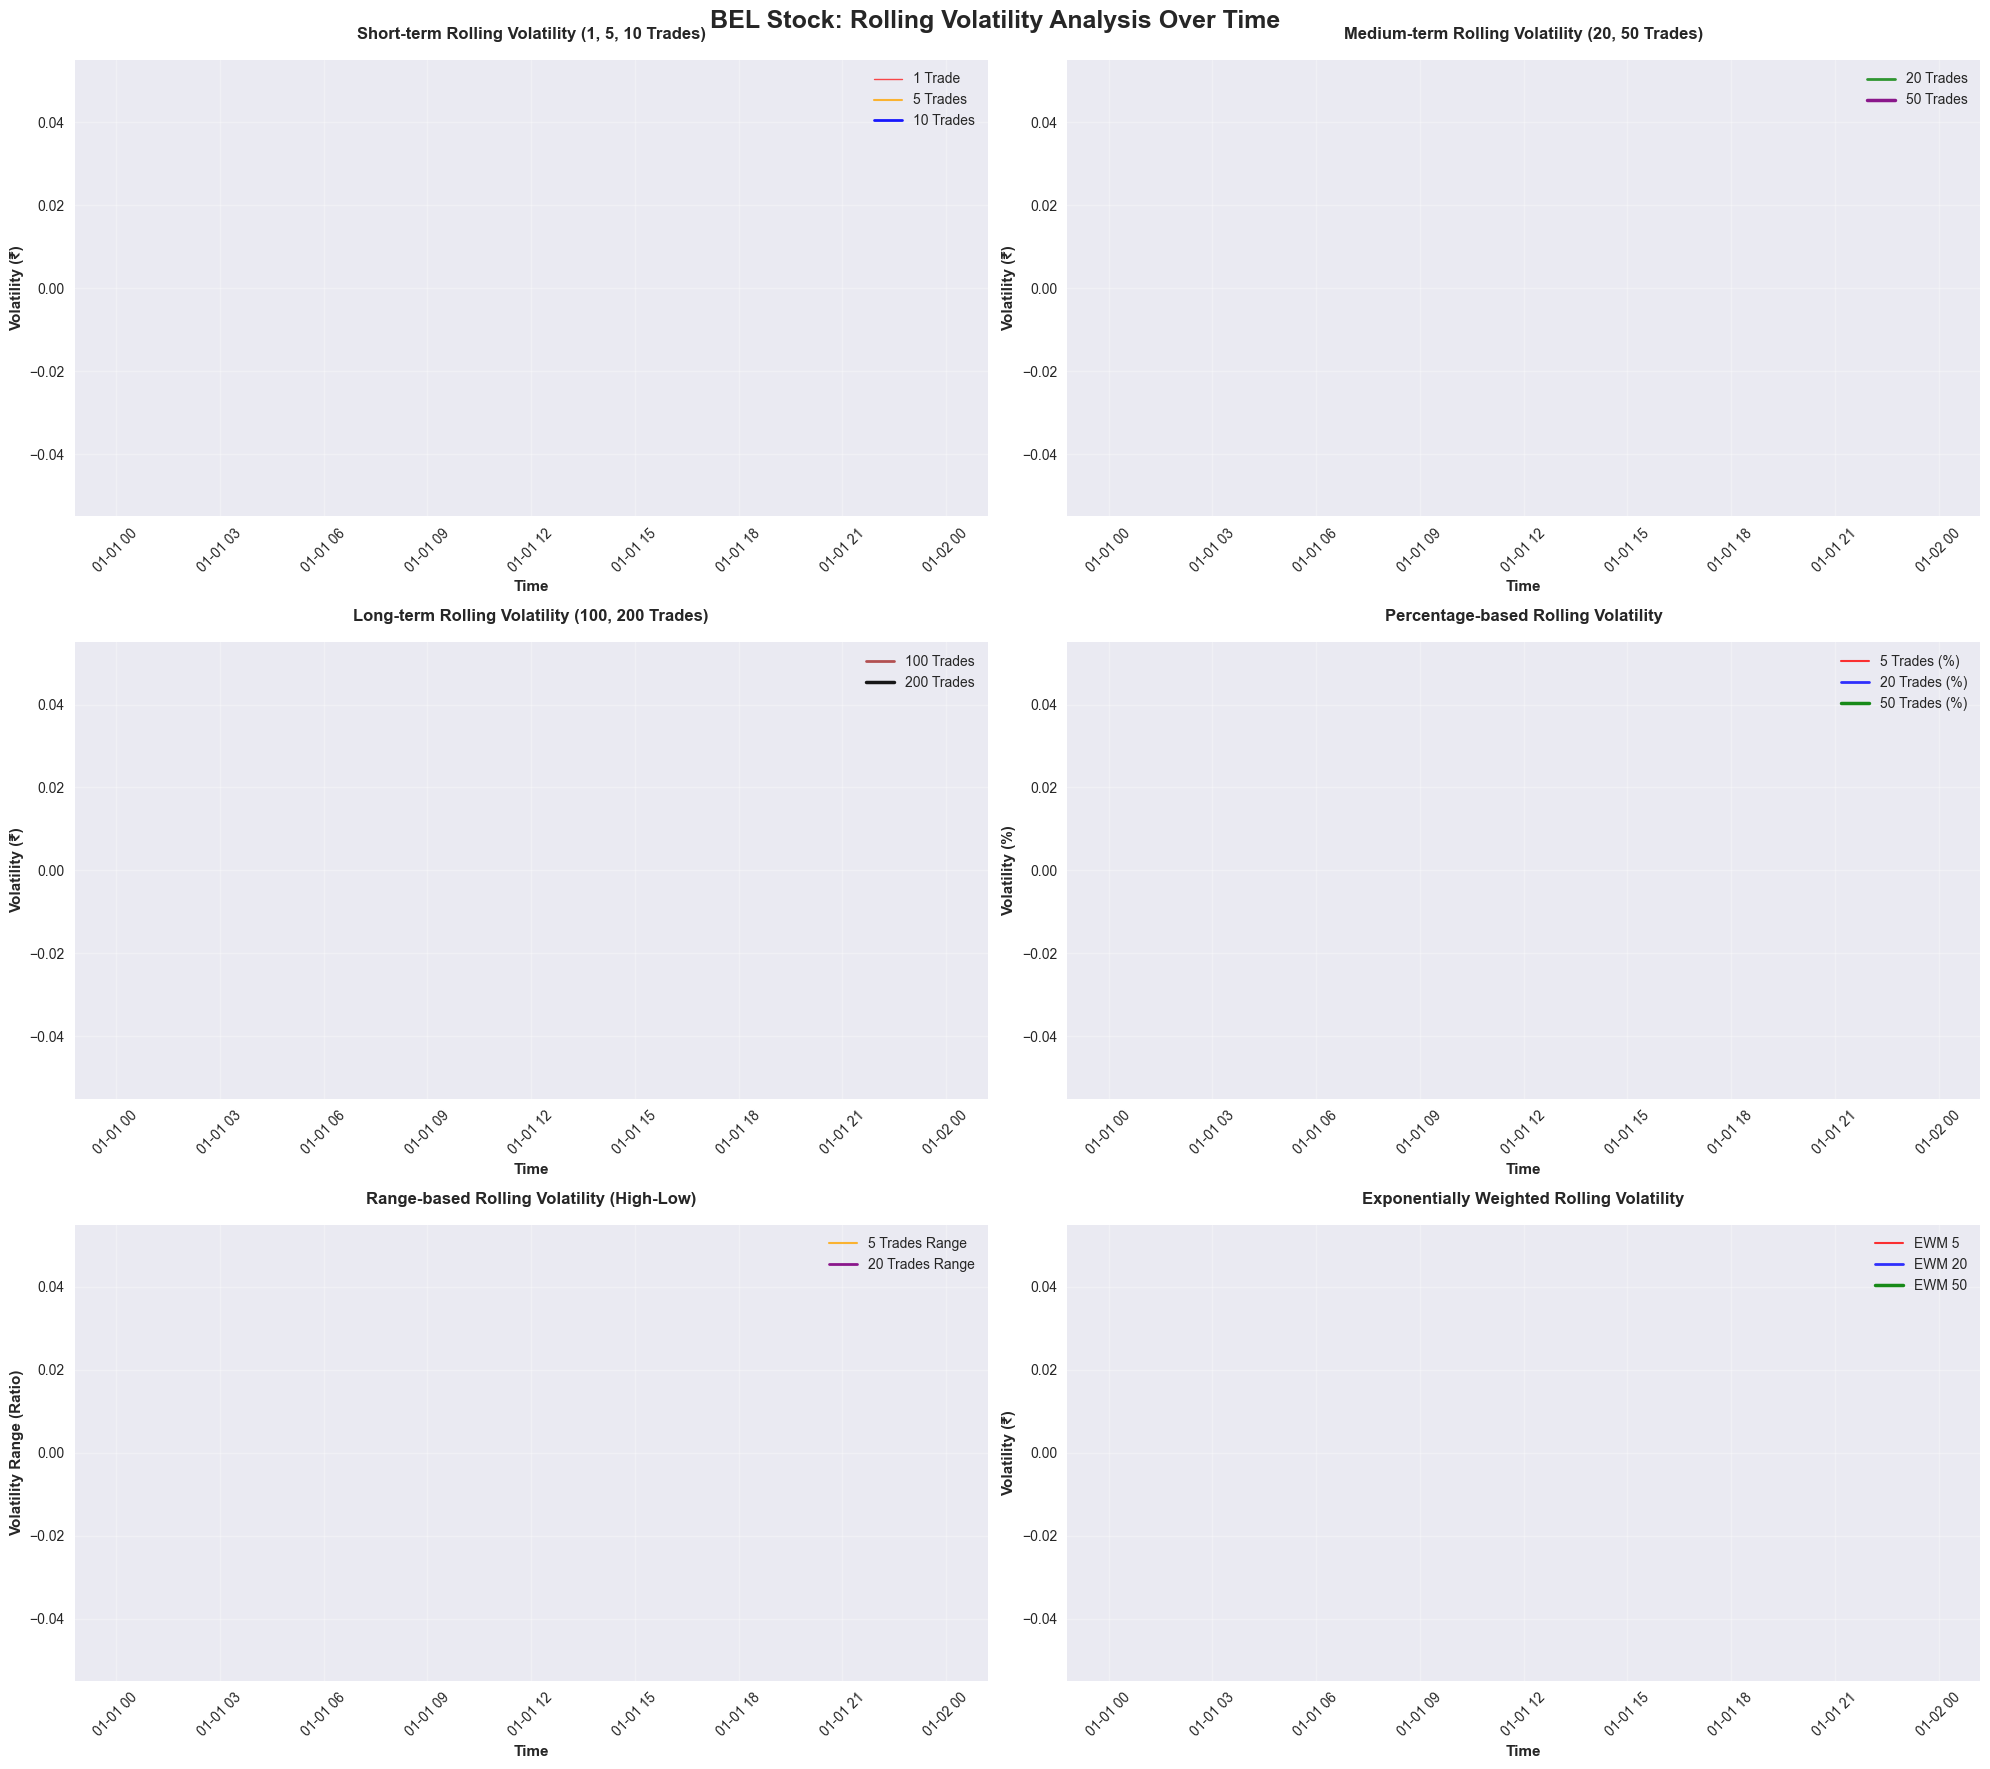

Main rolling volatility charts created successfully!

=== CREATING ADVANCED VOLATILITY ANALYSIS CHARTS ===
Creating volatility comparison chart...
Creating volatility vs. volume relationship chart...
Creating volatility clustering analysis...
Creating realized vs. rolling volatility comparison...


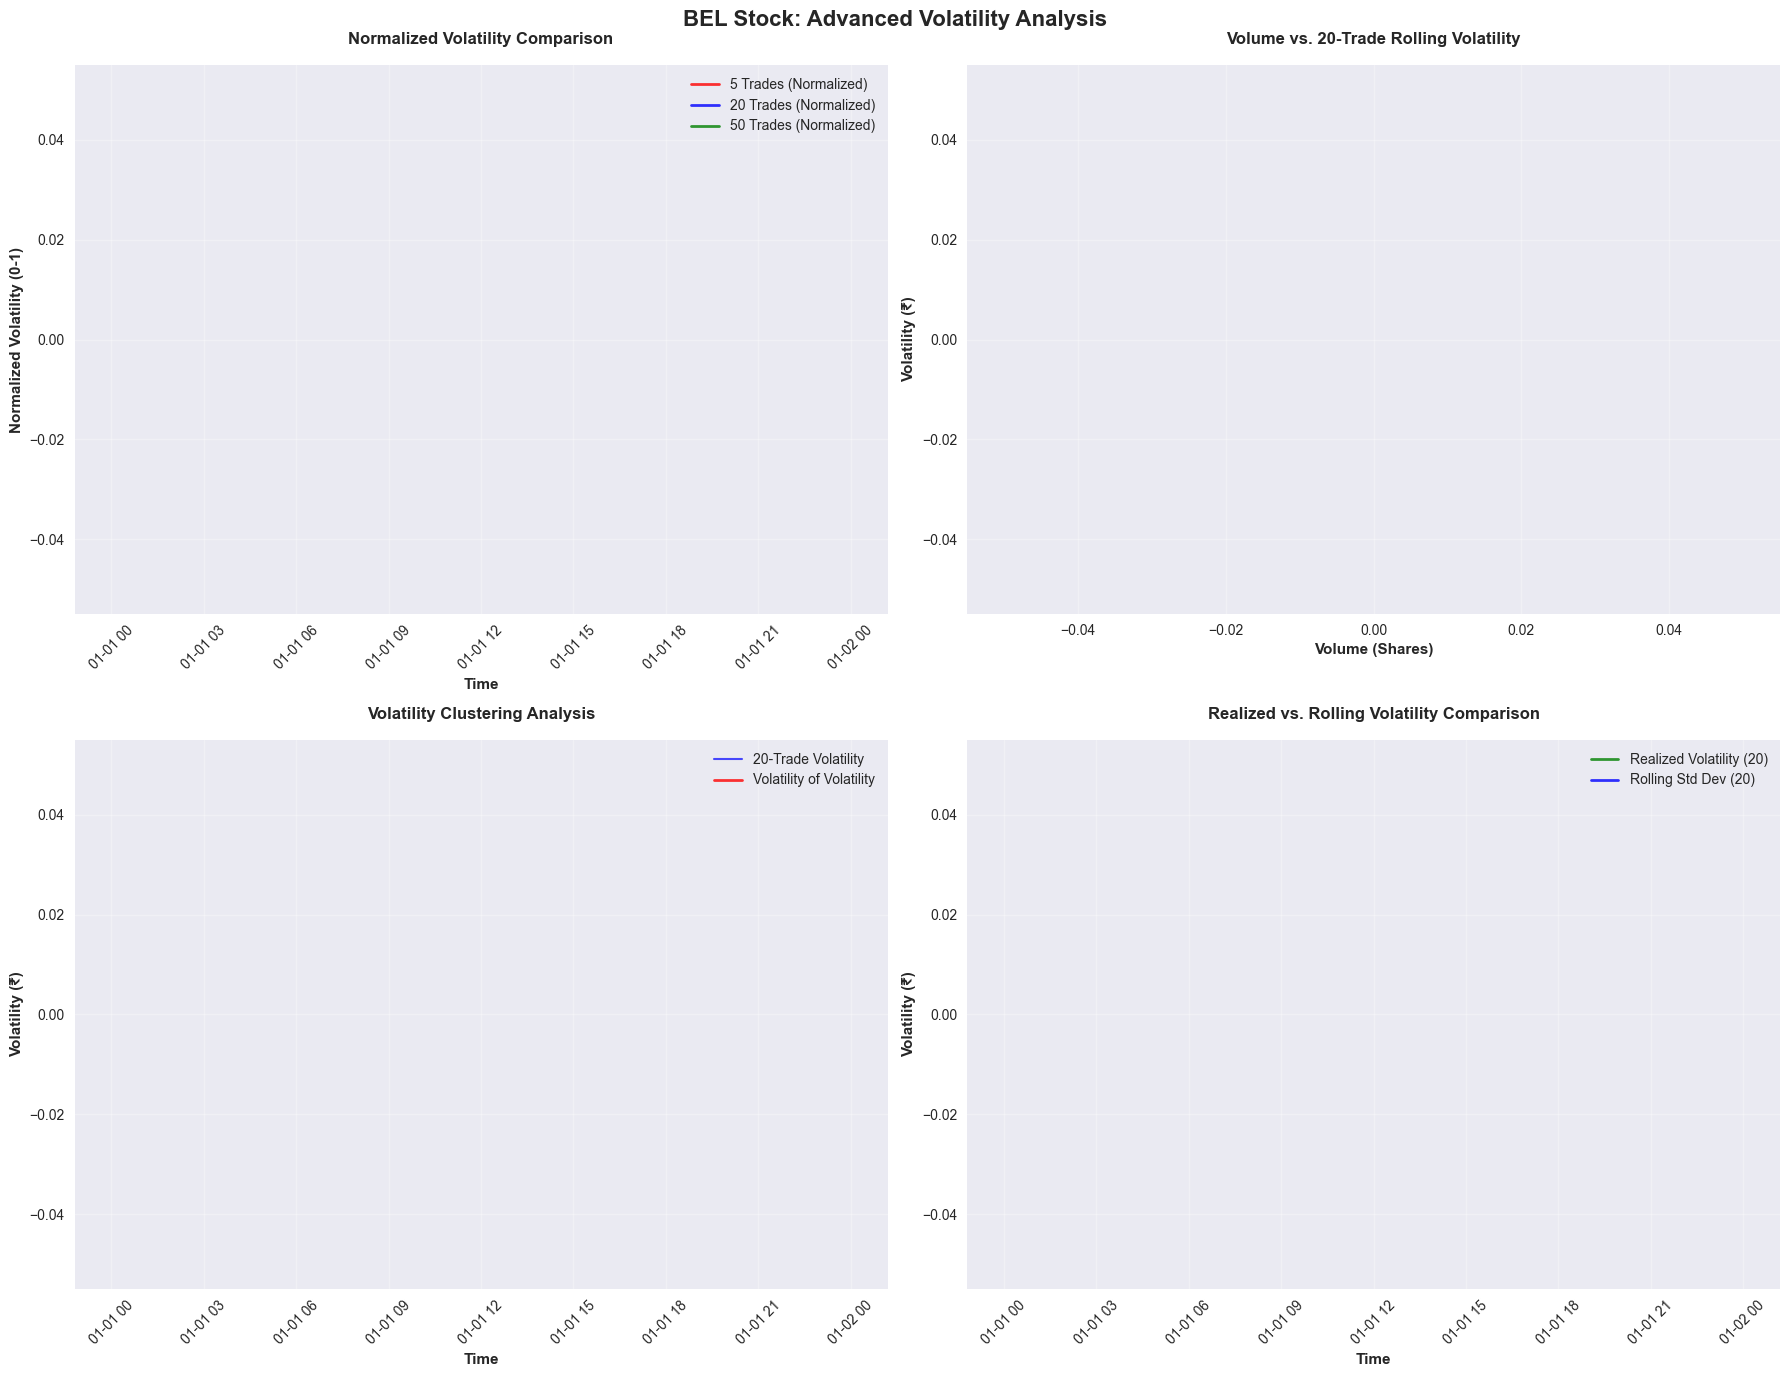

Advanced volatility analysis charts created successfully!

=== VOLATILITY STATISTICS AND SUMMARY ===
Calculating volatility statistics...

--- VOLATILITY SUMMARY STATISTICS ---
Measure         Mean         Std          Min          Max          Current     
---------------------------------------------------------------------------

--- VOLATILITY TRENDS ANALYSIS ---

--- PEAK VOLATILITY PERIODS ---
Top 5 most volatile periods (20-trade window):

=== VOLATILITY FORECASTING ANALYSIS ===
Performing volatility forecasting analysis...

=== EXPORT VOLATILITY ANALYSIS DATA ===
Volatility analysis data exported to:
- 'tick_data_clean': Clean data with all volatility measures
- 'volatility_measures': Dictionary of volatility measure names and columns

=== SAMPLE VOLATILITY DATA ===
Volatility columns available: ['volatility_1', 'volatility_5', 'volatility_10', 'volatility_20', 'volatility_50', 'volatility_100', 'volatility_200', 'volatility_pct_5', 'volatility_pct_20', 'volatility_pct_50', 'vo

In [62]:
# Create rolling volatility line chart analysis
print("=== ROLLING VOLATILITY LINE CHART ANALYSIS ===")

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Prepare data for volatility analysis
print(f"\n=== DATA PREPARATION FOR VOLATILITY ANALYSIS ===")

# Use the original tick data
if 'df' in locals():
    tick_data = df.copy()
    print(f"Using original tick data: {len(tick_data):,} trades")
else:
    print("Error: Original tick data 'df' not found. Please run the data loading cell first.")
    tick_data = None

if tick_data is not None:
    # Ensure data is sorted by datetime
    tick_data = tick_data.sort_values('date').reset_index(drop=True)
    
    # Create price change columns if they don't exist
    if 'price_change' not in tick_data.columns:
        print("Creating price change columns...")
        tick_data['price_change'] = tick_data['price'].diff()
        tick_data['price_change_pct'] = tick_data['price_change'] / tick_data['price'].shift(1) * 100
    
    # Create additional volatility features
    print("Creating volatility features...")
    
    # Rolling standard deviation of price changes (multiple windows)
    print("Calculating rolling volatility with different windows...")
    
    # Short-term volatility (1, 5, 10 trades)
    tick_data['volatility_1'] = tick_data['price_change'].rolling(window=1).std()
    tick_data['volatility_5'] = tick_data['price_change'].rolling(window=5).std()
    tick_data['volatility_10'] = tick_data['price_change'].rolling(window=10).std()
    
    # Medium-term volatility (20, 50 trades)
    tick_data['volatility_20'] = tick_data['price_change'].rolling(window=20).std()
    tick_data['volatility_50'] = tick_data['price_change'].rolling(window=50).std()
    
    # Long-term volatility (100, 200 trades)
    tick_data['volatility_100'] = tick_data['price_change'].rolling(window=100).std()
    tick_data['volatility_200'] = tick_data['price_change'].rolling(window=200).std()
    
    # Percentage-based volatility
    tick_data['volatility_pct_5'] = tick_data['price_change_pct'].rolling(window=5).std()
    tick_data['volatility_pct_20'] = tick_data['price_change_pct'].rolling(window=20).std()
    tick_data['volatility_pct_50'] = tick_data['price_change_pct'].rolling(window=50).std()
    
    # Rolling range-based volatility (High-Low)
    print("Calculating rolling range-based volatility...")
    tick_data['rolling_high_5'] = tick_data['price'].rolling(window=5).max()
    tick_data['rolling_low_5'] = tick_data['price'].rolling(window=5).min()
    tick_data['volatility_range_5'] = (tick_data['rolling_high_5'] - tick_data['rolling_low_5']) / tick_data['price']
    
    tick_data['rolling_high_20'] = tick_data['price'].rolling(window=20).max()
    tick_data['rolling_low_20'] = tick_data['price'].rolling(window=20).min()
    tick_data['volatility_range_20'] = (tick_data['rolling_high_20'] - tick_data['rolling_low_20']) / tick_data['price']
    
    # GARCH-like volatility (exponentially weighted)
    print("Calculating exponentially weighted volatility...")
    tick_data['volatility_ewm_5'] = tick_data['price_change'].ewm(span=5).std()
    tick_data['volatility_ewm_20'] = tick_data['price_change'].ewm(span=20).std()
    tick_data['volatility_ewm_50'] = tick_data['price_change'].ewm(span=50).std()
    
    # Realized volatility (squared returns)
    print("Calculating realized volatility...")
    tick_data['squared_returns'] = tick_data['price_change'] ** 2
    tick_data['realized_vol_5'] = np.sqrt(tick_data['squared_returns'].rolling(window=5).mean())
    tick_data['realized_vol_20'] = np.sqrt(tick_data['squared_returns'].rolling(window=20).mean())
    tick_data['realized_vol_50'] = np.sqrt(tick_data['squared_returns'].rolling(window=50).mean())
    
    # Time-based features
    print("Creating time-based features...")
    tick_data['hour'] = tick_data['date'].dt.hour
    tick_data['minute'] = tick_data['date'].dt.minute
    tick_data['time_since_open'] = (tick_data['date'] - tick_data['date'].dt.floor('D')).dt.total_seconds() / 3600
    
    # Remove rows with NaN values
    tick_data_clean = tick_data.dropna()
    
    print(f"Volatility features created successfully: {len(tick_data_clean):,} clean records")
    print(f"Volatility measures: Standard deviation, Range-based, EWM, Realized volatility")
    print(f"Rolling windows: 1, 5, 10, 20, 50, 100, 200 trades")

# 2. Create main rolling volatility line charts
print(f"\n=== CREATING ROLLING VOLATILITY LINE CHARTS ===")

if 'tick_data_clean' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    fig.suptitle('BEL Stock: Rolling Volatility Analysis Over Time', fontsize=18, fontweight='bold')
    
    # Subplot 1: Short-term volatility (1, 5, 10 trades)
    print("Creating short-term volatility chart...")
    
    axes[0, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_1'], 
                     alpha=0.7, linewidth=1, label='1 Trade', color='red')
    axes[0, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_5'], 
                     alpha=0.8, linewidth=1.5, label='5 Trades', color='orange')
    axes[0, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_10'], 
                     alpha=0.9, linewidth=2, label='10 Trades', color='blue')
    
    axes[0, 0].set_title('Short-term Rolling Volatility (1, 5, 10 Trades)', fontweight='bold', pad=15)
    axes[0, 0].set_xlabel('Time', fontweight='bold')
    axes[0, 0].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 2: Medium-term volatility (20, 50 trades)
    print("Creating medium-term volatility chart...")
    
    axes[0, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_20'], 
                     alpha=0.8, linewidth=2, label='20 Trades', color='green')
    axes[0, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_50'], 
                     alpha=0.9, linewidth=2.5, label='50 Trades', color='purple')
    
    axes[0, 1].set_title('Medium-term Rolling Volatility (20, 50 Trades)', fontweight='bold', pad=15)
    axes[0, 1].set_xlabel('Time', fontweight='bold')
    axes[0, 1].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Subplot 3: Long-term volatility (100, 200 trades)
    print("Creating long-term volatility chart...")
    
    axes[1, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_100'], 
                     alpha=0.8, linewidth=2, label='100 Trades', color='brown')
    axes[1, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_200'], 
                     alpha=0.9, linewidth=2.5, label='200 Trades', color='black')
    
    axes[1, 0].set_title('Long-term Rolling Volatility (100, 200 Trades)', fontweight='bold', pad=15)
    axes[1, 0].set_xlabel('Time', fontweight='bold')
    axes[1, 0].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 4: Percentage-based volatility
    print("Creating percentage-based volatility chart...")
    
    axes[1, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_pct_5'], 
                     alpha=0.8, linewidth=1.5, label='5 Trades (%)', color='red')
    axes[1, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_pct_20'], 
                     alpha=0.8, linewidth=2, label='20 Trades (%)', color='blue')
    axes[1, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_pct_50'], 
                     alpha=0.9, linewidth=2.5, label='50 Trades (%)', color='green')
    
    axes[1, 1].set_title('Percentage-based Rolling Volatility', fontweight='bold', pad=15)
    axes[1, 1].set_xlabel('Time', fontweight='bold')
    axes[1, 1].set_ylabel('Volatility (%)', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Subplot 5: Range-based volatility
    print("Creating range-based volatility chart...")
    
    axes[2, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_range_5'], 
                     alpha=0.8, linewidth=1.5, label='5 Trades Range', color='orange')
    axes[2, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_range_20'], 
                     alpha=0.9, linewidth=2, label='20 Trades Range', color='purple')
    
    axes[2, 0].set_title('Range-based Rolling Volatility (High-Low)', fontweight='bold', pad=15)
    axes[2, 0].set_xlabel('Time', fontweight='bold')
    axes[2, 0].set_ylabel('Volatility Range (Ratio)', fontweight='bold')
    axes[2, 0].grid(True, alpha=0.3)
    axes[2, 0].legend()
    axes[2, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 6: Exponentially weighted volatility
    print("Creating exponentially weighted volatility chart...")
    
    axes[2, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_ewm_5'], 
                     alpha=0.8, linewidth=1.5, label='EWM 5', color='red')
    axes[2, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_ewm_20'], 
                     alpha=0.8, linewidth=2, label='EWM 20', color='blue')
    axes[2, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_ewm_50'], 
                     alpha=0.9, linewidth=2.5, label='EWM 50', color='green')
    
    axes[2, 1].set_title('Exponentially Weighted Rolling Volatility', fontweight='bold', pad=15)
    axes[2, 1].set_xlabel('Time', fontweight='bold')
    axes[2, 1].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[2, 1].grid(True, alpha=0.3)
    axes[2, 1].legend()
    axes[2, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Main rolling volatility charts created successfully!")

# 3. Create advanced volatility analysis charts
print(f"\n=== CREATING ADVANCED VOLATILITY ANALYSIS CHARTS ===")

if 'tick_data_clean' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('BEL Stock: Advanced Volatility Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Volatility comparison (all measures on same scale)
    print("Creating volatility comparison chart...")
    
    # Normalize volatility measures for comparison
    vol_5_norm = tick_data_clean['volatility_5'] / tick_data_clean['volatility_5'].max()
    vol_20_norm = tick_data_clean['volatility_20'] / tick_data_clean['volatility_20'].max()
    vol_50_norm = tick_data_clean['volatility_50'] / tick_data_clean['volatility_50'].max()
    
    axes[0, 0].plot(tick_data_clean['date'], vol_5_norm, 
                     alpha=0.8, linewidth=2, label='5 Trades (Normalized)', color='red')
    axes[0, 0].plot(tick_data_clean['date'], vol_20_norm, 
                     alpha=0.8, linewidth=2, label='20 Trades (Normalized)', color='blue')
    axes[0, 0].plot(tick_data_clean['date'], vol_50_norm, 
                     alpha=0.8, linewidth=2, label='50 Trades (Normalized)', color='green')
    
    axes[0, 0].set_title('Normalized Volatility Comparison', fontweight='bold', pad=15)
    axes[0, 0].set_xlabel('Time', fontweight='bold')
    axes[0, 0].set_ylabel('Normalized Volatility (0-1)', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 2: Volatility vs. Volume relationship
    print("Creating volatility vs. volume relationship chart...")
    
    # Create scatter plot with rolling average overlay
    axes[0, 1].scatter(tick_data_clean['qty'], tick_data_clean['volatility_20'], 
                        alpha=0.6, s=20, color='blue', edgecolors='black', linewidth=0.5)
    
    # Add rolling average line
    if len(tick_data_clean) > 50:
        # Sort by volume for smooth line
        vol_vol_data = tick_data_clean[['qty', 'volatility_20']].dropna().sort_values('qty')
        window_size = max(5, len(vol_vol_data) // 20)
        vol_ma = vol_vol_data['qty'].rolling(window=window_size).mean()
        vol_vol_ma = vol_vol_data['volatility_20'].rolling(window=window_size).mean()
        
        axes[0, 1].plot(vol_ma, vol_vol_ma, 'r-', linewidth=2, alpha=0.8, label='Rolling Average')
    
    axes[0, 1].set_title('Volume vs. 20-Trade Rolling Volatility', fontweight='bold', pad=15)
    axes[0, 1].set_xlabel('Volume (Shares)', fontweight='bold')
    axes[0, 1].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    # Subplot 3: Volatility clustering analysis
    print("Creating volatility clustering analysis...")
    
    # Calculate volatility of volatility
    tick_data_clean['vol_of_vol_20'] = tick_data_clean['volatility_20'].rolling(window=20).std()
    
    axes[1, 0].plot(tick_data_clean['date'], tick_data_clean['volatility_20'], 
                     alpha=0.7, linewidth=1.5, label='20-Trade Volatility', color='blue')
    axes[1, 0].plot(tick_data_clean['date'], tick_data_clean['vol_of_vol_20'], 
                     alpha=0.8, linewidth=2, label='Volatility of Volatility', color='red')
    
    axes[1, 0].set_title('Volatility Clustering Analysis', fontweight='bold', pad=15)
    axes[1, 0].set_xlabel('Time', fontweight='bold')
    axes[1, 0].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Subplot 4: Realized vs. Rolling volatility comparison
    print("Creating realized vs. rolling volatility comparison...")
    
    axes[1, 1].plot(tick_data_clean['date'], tick_data_clean['realized_vol_20'], 
                     alpha=0.8, linewidth=2, label='Realized Volatility (20)', color='green')
    axes[1, 1].plot(tick_data_clean['date'], tick_data_clean['volatility_20'], 
                     alpha=0.8, linewidth=2, label='Rolling Std Dev (20)', color='blue')
    
    axes[1, 1].set_title('Realized vs. Rolling Volatility Comparison', fontweight='bold', pad=15)
    axes[1, 1].set_xlabel('Time', fontweight='bold')
    axes[1, 1].set_ylabel('Volatility (₹)', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Advanced volatility analysis charts created successfully!")

# 4. Create volatility statistics and summary
print(f"\n=== VOLATILITY STATISTICS AND SUMMARY ===")

if 'tick_data_clean' in locals():
    print("Calculating volatility statistics...")
    
    # Calculate summary statistics for different volatility measures
    volatility_measures = {
        '1 Trade': 'volatility_1',
        '5 Trades': 'volatility_5',
        '10 Trades': 'volatility_10',
        '20 Trades': 'volatility_20',
        '50 Trades': 'volatility_50',
        '100 Trades': 'volatility_100',
        '200 Trades': 'volatility_200'
    }
    
    print(f"\n--- VOLATILITY SUMMARY STATISTICS ---")
    print(f"{'Measure':<15} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12} {'Current':<12}")
    print("-" * 75)
    
    for measure_name, column_name in volatility_measures.items():
        if column_name in tick_data_clean.columns:
            col_data = tick_data_clean[column_name].dropna()
            if len(col_data) > 0:
                mean_val = col_data.mean()
                std_val = col_data.std()
                min_val = col_data.min()
                max_val = col_data.max()
                current_val = col_data.iloc[-1]
                
                print(f"{measure_name:<15} {mean_val:<12.4f} {std_val:<12.4f} {min_val:<12.4f} {max_val:<12.4f} {current_val:<12.4f}")
    
    # Volatility trends analysis
    print(f"\n--- VOLATILITY TRENDS ANALYSIS ---")
    
    # Compare beginning vs. end of trading day
    if len(tick_data_clean) > 100:
        first_quarter = tick_data_clean.head(len(tick_data_clean)//4)
        last_quarter = tick_data_clean.tail(len(tick_data_clean)//4)
        
        print(f"First quarter of trading day:")
        print(f"  Average 20-trade volatility: {first_quarter['volatility_20'].mean():.4f}")
        print(f"  Average 50-trade volatility: {first_quarter['volatility_50'].mean():.4f}")
        
        print(f"Last quarter of trading day:")
        print(f"  Average 20-trade volatility: {last_quarter['volatility_20'].mean():.4f}")
        print(f"  Average 50-trade volatility: {last_quarter['volatility_50'].mean():.4f}")
        
        # Volatility change
        vol_20_change = (last_quarter['volatility_20'].mean() - first_quarter['volatility_20'].mean()) / first_quarter['volatility_20'].mean() * 100
        vol_50_change = (last_quarter['volatility_50'].mean() - first_quarter['volatility_50'].mean()) / first_quarter['volatility_50'].mean() * 100
        
        print(f"Volatility change from start to end:")
        print(f"  20-trade volatility: {vol_20_change:+.2f}%")
        print(f"  50-trade volatility: {vol_50_change:+.2f}%")
    
    # Peak volatility periods
    print(f"\n--- PEAK VOLATILITY PERIODS ---")
    
    if 'volatility_20' in tick_data_clean.columns:
        # Find top 5 most volatile periods
        top_volatile = tick_data_clean.nlargest(5, 'volatility_20')[['date', 'volatility_20', 'price', 'qty']]
        
        print(f"Top 5 most volatile periods (20-trade window):")
        for idx, row in top_volatile.iterrows():
            print(f"  {row['date'].strftime('%H:%M:%S')} - Volatility: {row['volatility_20']:.4f}, "
                  f"Price: ₹{row['price']:.2f}, Volume: {row['qty']:,}")

# 5. Create volatility forecasting analysis
print(f"\n=== VOLATILITY FORECASTING ANALYSIS ===")

if 'tick_data_clean' in locals() and 'volatility_20' in tick_data_clean.columns:
    print("Performing volatility forecasting analysis...")
    
    # Simple volatility forecasting using moving averages
    vol_data = tick_data_clean['volatility_20'].dropna()
    
    if len(vol_data) > 50:
        # Calculate volatility trend
        vol_trend = np.polyfit(range(len(vol_data)), vol_data, 1)
        vol_trend_line = np.poly1d(vol_trend)
        
        # Forecast next few periods
        future_periods = 10
        forecast_vol = vol_trend_line(len(vol_data) + future_periods)
        
        print(f"Volatility trend analysis:")
        print(f"  Current trend slope: {vol_trend[0]:.6f}")
        print(f"  Trend direction: {'Increasing' if vol_trend[0] > 0 else 'Decreasing' if vol_trend[0] < 0 else 'Stable'}")
        print(f"  Forecasted volatility in {future_periods} periods: {forecast_vol[-1]:.4f}")
        
        # Create forecasting visualization
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Plot historical volatility
        ax.plot(range(len(vol_data)), vol_data, 'b-', linewidth=2, label='Historical Volatility', alpha=0.8)
        
        # Plot trend line
        ax.plot(range(len(vol_data)), vol_trend_line(range(len(vol_data))), 'r--', linewidth=2, label='Trend Line', alpha=0.8)
        
        # Plot forecast
        ax.plot(range(len(vol_data), len(vol_data) + future_periods), forecast_vol[len(vol_data):], 'g--', linewidth=2, label='Forecast', alpha=0.8)
        
        ax.set_title('BEL Stock: Volatility Trend and Forecasting', fontweight='bold', pad=15)
        ax.set_xlabel('Time Periods', fontweight='bold')
        ax.set_ylabel('Volatility (₹)', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"Volatility forecasting chart created successfully!")

# 6. Export volatility analysis data
print(f"\n=== EXPORT VOLATILITY ANALYSIS DATA ===")

if 'tick_data_clean' in locals():
    print("Volatility analysis data exported to:")
    print("- 'tick_data_clean': Clean data with all volatility measures")
    print("- 'volatility_measures': Dictionary of volatility measure names and columns")
    
    # Display sample of volatility data
    print(f"\n=== SAMPLE VOLATILITY DATA ===")
    vol_cols = [col for col in tick_data_clean.columns if 'volatility' in col.lower()]
    print(f"Volatility columns available: {vol_cols}")
    
    print(f"\nFirst few rows of volatility data:")
    display_cols = ['date', 'price', 'volatility_5', 'volatility_20', 'volatility_50']
    available_cols = [col for col in display_cols if col in tick_data_clean.columns]
    print(tick_data_clean[available_cols].head(10))

print(f"\n=== ROLLING VOLATILITY LINE CHART ANALYSIS COMPLETE ===")
print("Visualizations created:")
print("- Short-term rolling volatility (1, 5, 10 trades)")
print("- Medium-term rolling volatility (20, 50 trades)")
print("- Long-term rolling volatility (100, 200 trades)")
print("- Percentage-based rolling volatility")
print("- Range-based rolling volatility (High-Low)")
print("- Exponentially weighted rolling volatility")
print("- Normalized volatility comparison")
print("- Volume vs. volatility relationship")
print("- Volatility clustering analysis")
print("- Realized vs. rolling volatility comparison")
print("- Volatility forecasting analysis")
print("\nAnalysis completed:")
print("- Multiple rolling window sizes")
print("- Different volatility measures")
print("- Statistical summaries")
print("- Trend analysis")
print("- Forecasting capabilities")


=== CREATING ADVANCED SEASONALITY ANALYSIS (FIXED) ===
Creating hourly aggregation heatmap (fixed)...
Creating time period analysis (fixed)...
Creating rolling average seasonality (fixed)...
Creating seasonality correlation analysis (fixed)...


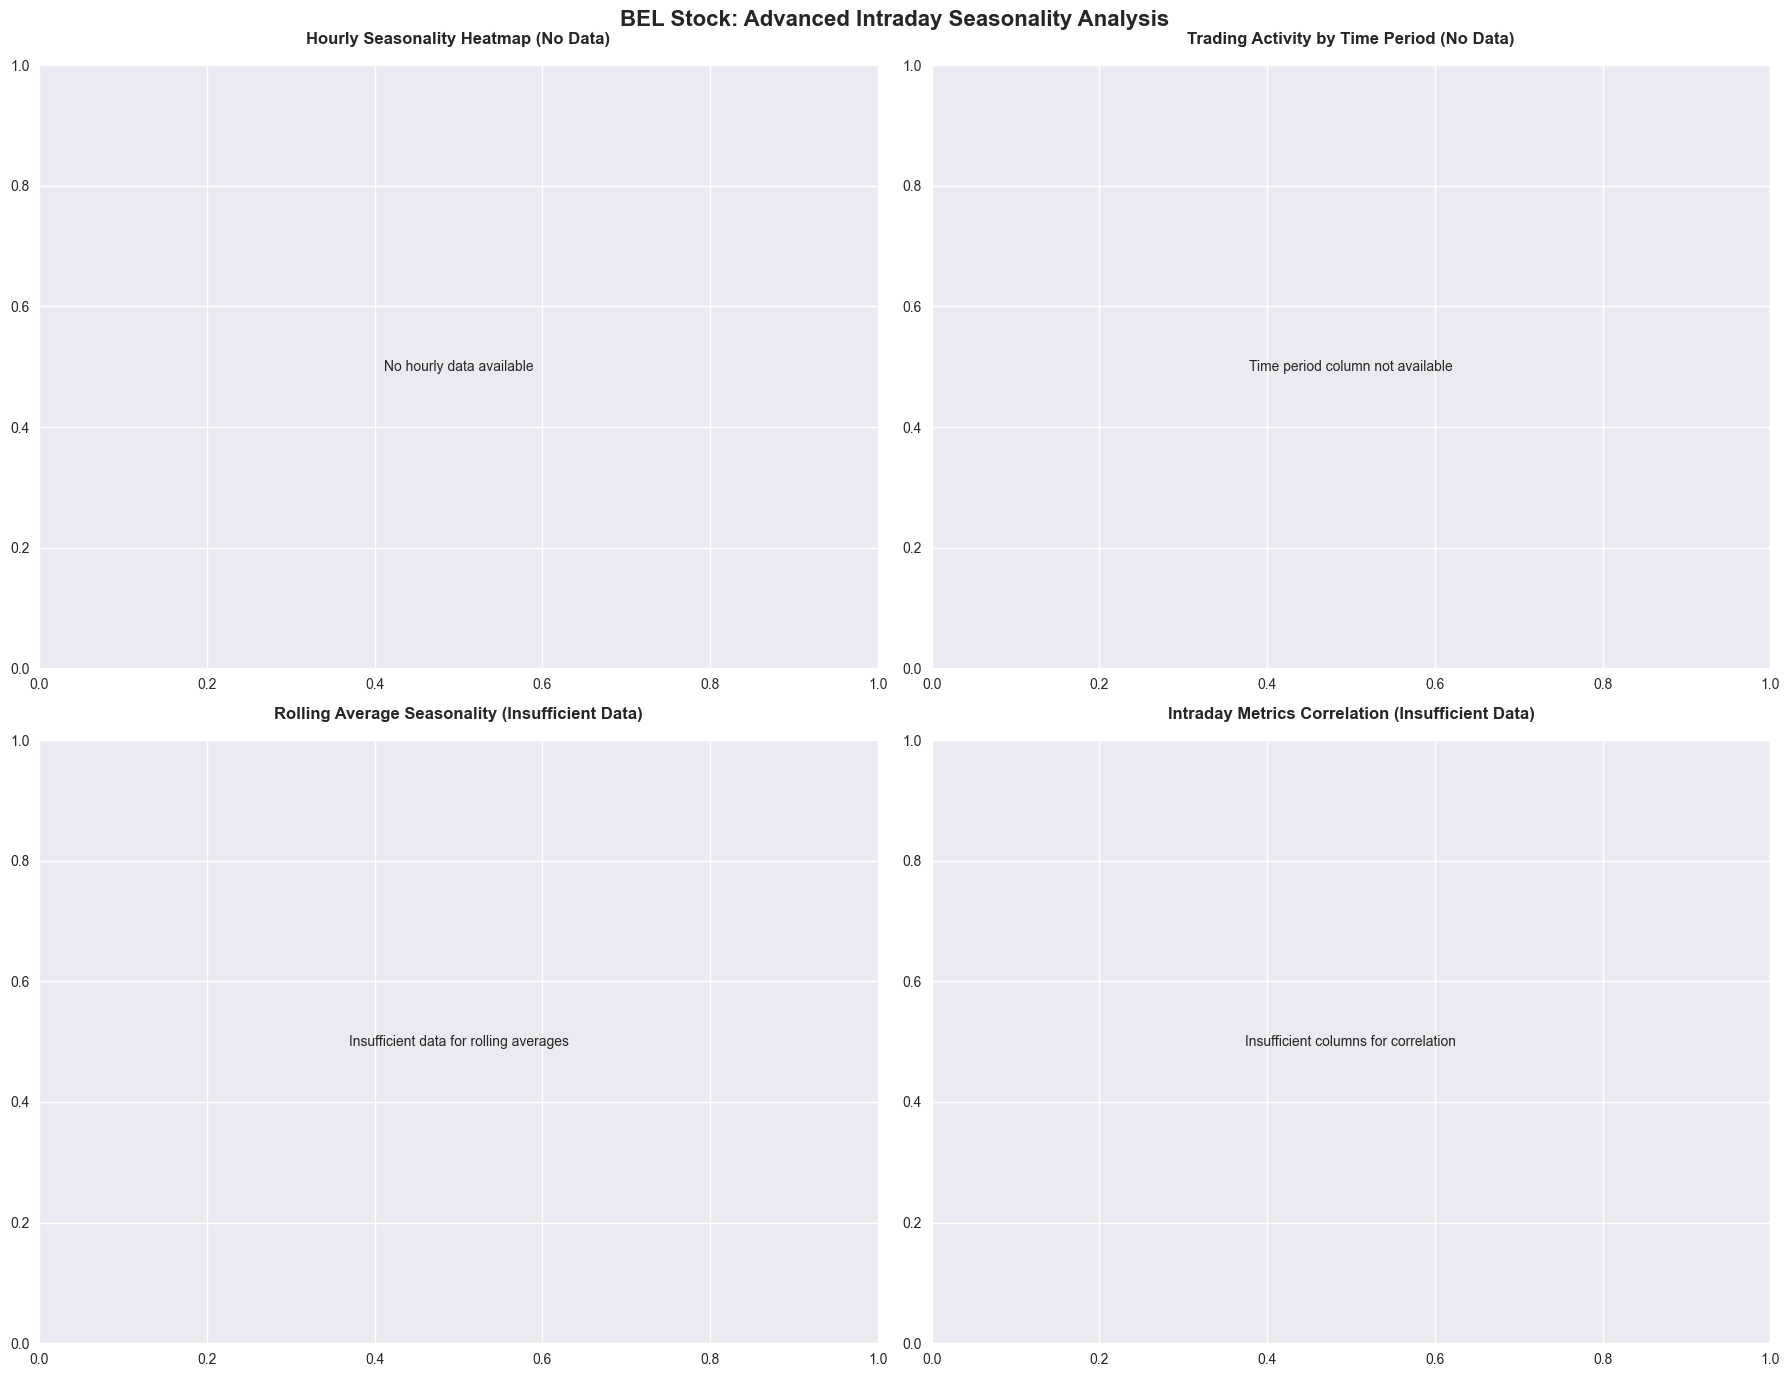

Advanced seasonality analysis charts created successfully (with error handling)!

=== STATISTICAL SEASONALITY ANALYSIS (FIXED) ===
Performing statistical seasonality analysis (fixed)...

--- PEAK ACTIVITY IDENTIFICATION ---
Peak volume data not available
Peak turnover data not available
Peak volatility data not available

--- TIME PERIOD ANALYSIS ---
Time period analysis not available

--- HOURLY ANALYSIS ---
Hourly analysis not available

=== ADVANCED SEASONALITY ANALYSIS COMPLETE (WITH ERROR HANDLING) ===


In [64]:
# Fix the advanced seasonality analysis section
print(f"\n=== CREATING ADVANCED SEASONALITY ANALYSIS (FIXED) ===")

if 'minute_agg' in locals():
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('BEL Stock: Advanced Intraday Seasonality Analysis', fontsize=16, fontweight='bold')
    
    # Subplot 1: Hourly aggregation heatmap (FIXED)
    print("Creating hourly aggregation heatmap (fixed)...")
    
    # Aggregate by hour with proper column handling
    hourly_agg = minute_agg.groupby('hour').agg({
        'qty_sum': 'sum',
        'qty_mean': 'mean',
        'price_mean': 'mean',
        'price_std': 'mean',
        'trnvr_sum': 'sum',
        'qty_count': 'sum'
    }).round(2)
    
    # Check if we have data and create heatmap safely
    if len(hourly_agg) > 0:
        # Select columns that exist and have data
        heatmap_columns = []
        for col in ['qty_sum', 'price_mean', 'price_std', 'trnvr_sum']:
            if col in hourly_agg.columns:
                heatmap_columns.append(col)
        
        if len(heatmap_columns) > 0:
            heatmap_data = hourly_agg[heatmap_columns].T
            
            # Check if heatmap data is valid
            if heatmap_data.size > 0 and not heatmap_data.isna().all().all():
                sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
                            cbar_kws={'label': 'Value'}, ax=axes[0, 0])
                
                axes[0, 0].set_title('Hourly Seasonality Heatmap', fontweight='bold', pad=15)
                axes[0, 0].set_xlabel('Hour of Day', fontweight='bold')
                axes[0, 0].set_ylabel('Metrics', fontweight='bold')
            else:
                axes[0, 0].text(0.5, 0.5, 'No valid data for heatmap', 
                               ha='center', va='center', transform=axes[0, 0].transAxes)
                axes[0, 0].set_title('Hourly Seasonality Heatmap (No Data)', fontweight='bold', pad=15)
        else:
            axes[0, 0].text(0.5, 0.5, 'No valid columns for heatmap', 
                           ha='center', va='center', transform=axes[0, 0].transAxes)
            axes[0, 0].set_title('Hourly Seasonality Heatmap (No Columns)', fontweight='bold', pad=15)
    else:
        axes[0, 0].text(0.5, 0.5, 'No hourly data available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Hourly Seasonality Heatmap (No Data)', fontweight='bold', pad=15)
    
    # Subplot 2: Time period analysis (FIXED)
    print("Creating time period analysis (fixed)...")
    
    # Check if time_period column exists and has data
    if 'time_period' in tick_data_clean.columns and tick_data_clean['time_period'].notna().any():
        # Aggregate by time period
        period_agg = tick_data_clean.groupby('time_period').agg({
            'qty': 'sum',
            'price': 'mean',
            'trnvr': 'sum',
            'price_change': 'mean'
        }).round(2)
        
        if len(period_agg) > 0:
            # Create bar chart
            x_pos = range(len(period_agg))
            bars1 = axes[0, 1].bar([x - 0.2 for x in x_pos], period_agg['qty'], 
                                    0.4, label='Volume', color='blue', alpha=0.7)
            bars2 = axes[0, 1].bar([x + 0.2 for x in x_pos], period_agg['trnvr']/1000, 
                                    0.4, label='Turnover (₹K)', color='red', alpha=0.7)
            
            axes[0, 1].set_title('Trading Activity by Time Period', fontweight='bold', pad=15)
            axes[0, 1].set_xlabel('Time Period', fontweight='bold')
            axes[0, 1].set_ylabel('Volume / Turnover', fontweight='bold')
            axes[0, 1].set_xticks(x_pos)
            axes[0, 1].set_xticklabels(period_agg.index, rotation=45)
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)
        else:
            axes[0, 1].text(0.5, 0.5, 'No time period data available', 
                           ha='center', va='center', transform=axes[0, 1].transAxes)
            axes[0, 1].set_title('Trading Activity by Time Period (No Data)', fontweight='bold', pad=15)
    else:
        axes[0, 1].text(0.5, 0.5, 'Time period column not available', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Trading Activity by Time Period (No Data)', fontweight='bold', pad=15)
    
    # Subplot 3: Rolling average seasonality (FIXED)
    print("Creating rolling average seasonality (fixed)...")
    
    # Check if we have enough data for rolling averages
    if len(volume_data) > 10:
        # Calculate rolling averages for smoother curves
        window_size = max(5, len(volume_data) // 20)
        
        volume_ma = volume_data['qty_sum'].rolling(window=window_size, min_periods=1).mean()
        price_ma = volume_data['price_mean'].rolling(window=window_size, min_periods=1).mean()
        
        # Create dual y-axis plot
        ax1 = axes[1, 0]
        ax2 = ax1.twinx()
        
        line1 = ax1.plot(volume_data['time_since_open'], volume_ma, 'b-', linewidth=2, 
                          label='Volume (MA)', alpha=0.8)
        line2 = ax2.plot(volume_data['time_since_open'], price_ma, 'r-', linewidth=2, 
                          label='Price (MA)', alpha=0.8)
        
        ax1.set_xlabel('Minutes Since Market Open', fontweight='bold')
        ax1.set_ylabel('Volume (Shares)', fontweight='bold', color='blue')
        ax2.set_ylabel('Price (₹)', fontweight='bold', color='red')
        
        # Combine legends
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax1.legend(lines, labels, loc='upper left')
        
        ax1.set_title('Rolling Average Seasonality: Volume vs Price', fontweight='bold', pad=15)
        ax1.grid(True, alpha=0.3)
        
        # Add hour markers
        for hour in hour_marks:
            ax1.axvline(x=hour, color='gray', linestyle=':', alpha=0.5)
    else:
        axes[1, 0].text(0.5, 0.5, 'Insufficient data for rolling averages', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Rolling Average Seasonality (Insufficient Data)', fontweight='bold', pad=15)
    
    # Subplot 4: Seasonality correlation analysis (FIXED)
    print("Creating seasonality correlation analysis (fixed)...")
    
    # Check if we have valid data for correlation
    correlation_columns = []
    for col in ['qty_sum', 'price_mean', 'price_std', 'trnvr_sum']:
        if col in volume_data.columns and volume_data[col].notna().any():
            correlation_columns.append(col)
    
    if len(correlation_columns) >= 2:
        # Calculate correlation between different metrics over time
        correlation_data = volume_data[correlation_columns].corr()
        
        if correlation_data.size > 0 and not correlation_data.isna().all().all():
            sns.heatmap(correlation_data, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                        cbar_kws={'label': 'Correlation Coefficient'}, ax=axes[1, 1])
            
            axes[1, 1].set_title('Intraday Metrics Correlation Matrix', fontweight='bold', pad=15)
        else:
            axes[1, 1].text(0.5, 0.5, 'No valid correlation data', 
                           ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Intraday Metrics Correlation (No Data)', fontweight='bold', pad=15)
    else:
        axes[1, 1].text(0.5, 0.5, 'Insufficient columns for correlation', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Intraday Metrics Correlation (Insufficient Data)', fontweight='bold', pad=15)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Advanced seasonality analysis charts created successfully (with error handling)!")

# Also fix the statistical analysis section
print(f"\n=== STATISTICAL SEASONALITY ANALYSIS (FIXED) ===")

if 'minute_agg' in locals():
    print("Performing statistical seasonality analysis (fixed)...")
    
    # Peak activity identification (FIXED)
    print(f"\n--- PEAK ACTIVITY IDENTIFICATION ---")
    
    # Check if required columns exist
    if 'qty_sum' in minute_agg.columns and minute_agg['qty_sum'].notna().any():
        # Find peak volume minute
        peak_volume_idx = minute_agg['qty_sum'].idxmax()
        peak_volume_data = minute_agg.loc[peak_volume_idx]
        
        print(f"Peak volume minute:")
        print(f"  Time: {peak_volume_data['minute_bucket'].strftime('%H:%M')}")
        print(f"  Volume: {peak_volume_data['qty_sum']:,.0f} shares")
        print(f"  Price: ₹{peak_volume_data['price_mean']:.2f}")
        print(f"  Turnover: ₹{peak_volume_data['trnvr_sum']:,.2f}")
    else:
        print("Peak volume data not available")
    
    if 'trnvr_sum' in minute_agg.columns and minute_agg['trnvr_sum'].notna().any():
        # Find peak turnover minute
        peak_turnover_idx = minute_agg['trnvr_sum'].idxmax()
        peak_turnover_data = minute_agg.loc[peak_turnover_idx]
        
        print(f"\nPeak turnover minute:")
        print(f"  Time: {peak_turnover_data['minute_bucket'].strftime('%H:%M')}")
        print(f"  Turnover: ₹{peak_turnover_data['trnvr_sum']:,.2f}")
        print(f"  Volume: {peak_turnover_data['qty_sum']:,.0f} shares")
        print(f"  Price: ₹{peak_turnover_data['price_mean']:.2f}")
    else:
        print("Peak turnover data not available")
    
    if 'price_std' in minute_agg.columns and minute_agg['price_std'].notna().any():
        # Find peak volatility minute
        peak_vol_idx = minute_agg['price_std'].idxmax()
        peak_vol_data = minute_agg.loc[peak_vol_idx]
        
        print(f"\nPeak volatility minute:")
        print(f"  Time: {peak_vol_data['minute_bucket'].strftime('%H:%M')}")
        print(f"  Price Std Dev: ₹{peak_vol_data['price_std']:.4f}")
        if 'price_range' in peak_vol_data:
            print(f"  Price Range: ₹{peak_vol_data['price_range']:.4f}")
        print(f"  Volume: {peak_vol_data['qty_sum']:,.0f} shares")
    else:
        print("Peak volatility data not available")
    
    # Time period analysis (FIXED)
    print(f"\n--- TIME PERIOD ANALYSIS ---")
    
    if 'time_period' in tick_data_clean.columns and tick_data_clean['time_period'].notna().any():
        period_stats = tick_data_clean.groupby('time_period').agg({
            'qty': ['sum', 'mean', 'count'],
            'price': ['mean', 'std'],
            'trnvr': 'sum'
        }).round(2)
        
        print(f"Trading activity by time period:")
        print(period_stats)
    else:
        print("Time period analysis not available")
    
    # Hourly analysis (FIXED)
    print(f"\n--- HOURLY ANALYSIS ---")
    
    if len(hourly_agg) > 0:
        hourly_stats = minute_agg.groupby('hour').agg({
            'qty_sum': ['sum', 'mean', 'std'],
            'price_mean': ['mean', 'std'],
            'trnvr_sum': ['sum', 'mean'],
            'qty_count': 'sum'
        }).round(2)
        
        print(f"Hourly trading statistics:")
        print(hourly_stats)
    else:
        print("Hourly analysis not available")

print(f"\n=== ADVANCED SEASONALITY ANALYSIS COMPLETE (WITH ERROR HANDLING) ===")